In [1]:
import pickle
from modules.transcripts import Transcripts
from torch.utils.data import DataLoader

In [2]:
from modules.model import FOMOnet
from modules.visualize import *
from modules.evaluate import *
from modules.utils import *

In [3]:
fomonet = FOMOnet(num_channels=4)
fomonet.load_state_dict(torch.load('trained_models/fomonet0.pt', map_location=torch.device('cpu')))

<All keys matched successfully>

In [4]:
trx_orfs = pickle.load(open('data/trx_orfs.pkl', 'rb'))
ensembl_trx = pickle.load(open('data/ensembl_trx.pkl', 'rb'))
inverted_ensembl_trx = {y['sequence']:x for x,y in ensembl_trx.items()}

In [5]:
#X_test, y_test = pickle.load(open('data/test_split0.pkl', 'rb'))

In [6]:
alt_dataset = pickle.load(open('data/alt_dataset.pkl', 'rb'))
X_ = [x['mapped_seq'] for x in alt_dataset.values()]
y_ = [x['mapped_cds'] for x in alt_dataset.values()]

In [7]:
preds = get_preds(fomonet, X_, y_)
#pickle.dump(preds, open('data/preds.pkl', 'wb'))
#preds = pickle.load(open('data/preds0.pkl', 'rb'))

  0%|          | 0/734 [00:00<?, ?it/s]

/mnt/c/Users/Xavier/Desktop/FOMOnet/prog/modules/evaluate.py:76: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3277.)
  X_one_hot = one_hot(X_).T


In [8]:
report = get_report(preds, ensembl_trx, inverted_ensembl_trx)
#pickle.dump(report, open('data/report.pkl', 'wb'))
#report = pickle.load(open('data/report0.pkl', 'rb'))

  0%|          | 0/734 [00:00<?, ?it/s]

In [9]:
preds = [x["out"] for x in report.values()]

In [10]:
target = [x["mapped_cds"] for x in report.values()]

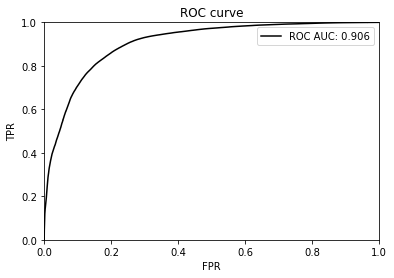

In [125]:
roc_curve(preds, target)

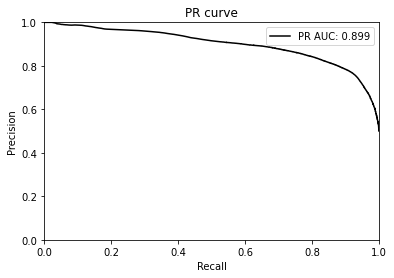

In [126]:
pr_curve(preds, target)

ENST00000472194
recall: 0.9035087823867798
iou: 0.056593406945466995
biotype: processed_transcript
IP_057513  :  {'start': 790, 'stop': 976, 'MS': 0, 'TE': 0, 'frame': 2}
IP_057517  :  {'start': 2180, 'stop': 2294, 'MS': 2, 'TE': 1, 'frame': 3}
IP_057516  :  {'start': 2338, 'stop': 2494, 'MS': 0, 'TE': 0, 'frame': 2}
IP_688074  :  {'start': 2550, 'stop': 2688, 'MS': 0, 'TE': 0, 'frame': 1}
IP_688077  :  {'start': 2909, 'stop': 3173, 'MS': 0, 'TE': 0, 'frame': 3}
IP_688076  :  {'start': 3106, 'stop': 3481, 'MS': 0, 'TE': 0, 'frame': 2}
IP_688073  :  {'start': 3138, 'stop': 3522, 'MS': 0, 'TE': 0, 'frame': 1}
IP_688075  :  {'start': 3697, 'stop': 3820, 'MS': 0, 'TE': 0, 'frame': 2}
IP_688078  :  {'start': 3899, 'stop': 3989, 'MS': 0, 'TE': 0, 'frame': 3}


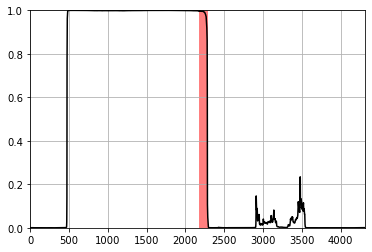

ENST00000474481
recall: 0.9210526347160339
iou: 0.1586102694272995
biotype: processed_transcript
IP_688066  :  {'start': 128, 'stop': 659, 'MS': 0, 'TE': 0, 'frame': 3}
IP_688065  :  {'start': 1078, 'stop': 1192, 'MS': 0, 'TE': 1, 'frame': 2}
IP_688060  :  {'start': 1431, 'stop': 1560, 'MS': 0, 'TE': 0, 'frame': 1}
IP_688064  :  {'start': 1870, 'stop': 2164, 'MS': 0, 'TE': 0, 'frame': 2}
IP_688061  :  {'start': 2100, 'stop': 2268, 'MS': 1, 'TE': 0, 'frame': 1}
II_688062  :  {'start': 2239, 'stop': 2407, 'MS': 0, 'TE': 5, 'frame': 2}
II_688063  :  {'start': 2449, 'stop': 2983, 'MS': 0, 'TE': 0, 'frame': 2}
IP_057517  :  {'start': 2880, 'stop': 2994, 'MS': 2, 'TE': 1, 'frame': 1}
IP_057516  :  {'start': 3038, 'stop': 3194, 'MS': 0, 'TE': 0, 'frame': 3}


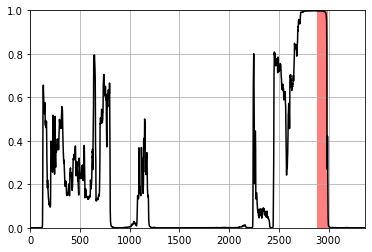

ENST00000485748
recall: 0.9210526347160339
iou: 0.08101851493120193
biotype: processed_transcript
IP_688071  :  {'start': 268, 'stop': 418, 'MS': 0, 'TE': 0, 'frame': 2}
IP_688068  :  {'start': 381, 'stop': 621, 'MS': 0, 'TE': 0, 'frame': 1}
IP_688067  :  {'start': 669, 'stop': 936, 'MS': 0, 'TE': 0, 'frame': 1}
IP_688066  :  {'start': 1212, 'stop': 1743, 'MS': 0, 'TE': 0, 'frame': 1}
II_688070  :  {'start': 1891, 'stop': 2233, 'MS': 0, 'TE': 0, 'frame': 2}
II_688069  :  {'start': 2242, 'stop': 2848, 'MS': 0, 'TE': 2, 'frame': 2}
IP_057517  :  {'start': 2745, 'stop': 2859, 'MS': 2, 'TE': 1, 'frame': 1}
IP_057516  :  {'start': 2903, 'stop': 3059, 'MS': 0, 'TE': 0, 'frame': 3}


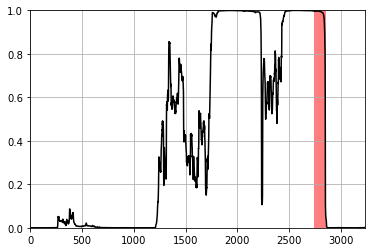

ENST00000485928
recall: 1.0
iou: 0.48689138889312744
biotype: processed_transcript
IP_062181  :  {'start': 68, 'stop': 179, 'MS': 0, 'TE': 9, 'frame': 3}
II_062182  :  {'start': 265, 'stop': 388, 'MS': 0, 'TE': 2, 'frame': 2}
IP_062175  :  {'start': 366, 'stop': 756, 'MS': 1, 'TE': 2, 'frame': 1}
IP_062179  :  {'start': 580, 'stop': 793, 'MS': 0, 'TE': 0, 'frame': 2}
IP_062173  :  {'start': 801, 'stop': 954, 'MS': 0, 'TE': 0, 'frame': 1}
IP_683251  :  {'start': 1014, 'stop': 1104, 'MS': 0, 'TE': 0, 'frame': 1}
IP_062170  :  {'start': 1462, 'stop': 1879, 'MS': 0, 'TE': 0, 'frame': 2}
IP_062169  :  {'start': 2014, 'stop': 2125, 'MS': 1, 'TE': 0, 'frame': 2}
IP_062178  :  {'start': 2031, 'stop': 2154, 'MS': 0, 'TE': 0, 'frame': 1}


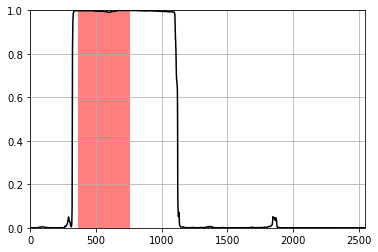

ENST00000478564
recall: 0.8503401279449463
iou: 0.8503401279449463
biotype: processed_transcript
IP_070257  :  {'start': 35, 'stop': 134, 'MS': 0, 'TE': 0, 'frame': 3}
IP_681823  :  {'start': 40, 'stop': 142, 'MS': 1, 'TE': 0, 'frame': 2}
IP_070252  :  {'start': 166, 'stop': 313, 'MS': 2, 'TE': 3, 'frame': 2}
IP_070251  :  {'start': 328, 'stop': 427, 'MS': 0, 'TE': 0, 'frame': 2}


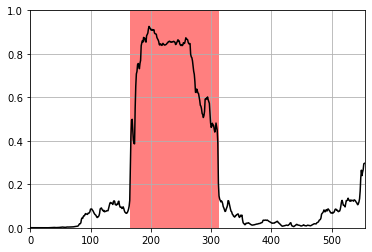

ENST00000479681
recall: 0.35789474844932556
iou: 0.35789474844932556
biotype: processed_transcript
IP_070256  :  {'start': 63, 'stop': 201, 'MS': 1, 'TE': 3, 'frame': 1}
IP_070257  :  {'start': 94, 'stop': 193, 'MS': 0, 'TE': 0, 'frame': 2}
IP_070252  :  {'start': 225, 'stop': 372, 'MS': 2, 'TE': 3, 'frame': 1}
II_681820  :  {'start': 233, 'stop': 470, 'MS': 0, 'TE': 0, 'frame': 3}
IP_681819  :  {'start': 387, 'stop': 504, 'MS': 0, 'TE': 0, 'frame': 1}


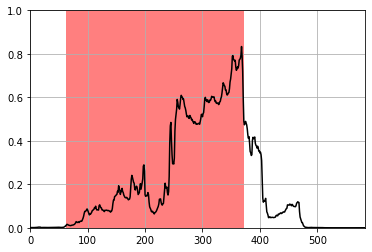

ENST00000495396
recall: 0.6528735756874084
iou: 0.2619926333427429
biotype: processed_transcript
IP_675452  :  {'start': 1, 'stop': 352, 'MS': 0, 'TE': 0, 'frame': 2}
IP_675450  :  {'start': 408, 'stop': 528, 'MS': 0, 'TE': 0, 'frame': 1}
IP_675451  :  {'start': 531, 'stop': 759, 'MS': 0, 'TE': 0, 'frame': 1}
II_675453  :  {'start': 835, 'stop': 1627, 'MS': 0, 'TE': 0, 'frame': 2}
IP_076432  :  {'start': 1340, 'stop': 1775, 'MS': 1, 'TE': 1, 'frame': 3}
IP_076416  :  {'start': 1743, 'stop': 2049, 'MS': 0, 'TE': 0, 'frame': 1}
IP_076412  :  {'start': 2214, 'stop': 2418, 'MS': 0, 'TE': 0, 'frame': 1}
IP_076428  :  {'start': 2672, 'stop': 2897, 'MS': 0, 'TE': 0, 'frame': 3}
IP_076423  :  {'start': 2827, 'stop': 2935, 'MS': 0, 'TE': 0, 'frame': 2}
IP_076425  :  {'start': 2956, 'stop': 3274, 'MS': 0, 'TE': 0, 'frame': 2}
IP_076436  :  {'start': 3065, 'stop': 3203, 'MS': 0, 'TE': 0, 'frame': 3}
IP_076413  :  {'start': 3339, 'stop': 3546, 'MS': 0, 'TE': 0, 'frame': 1}
IP_076426  :  {'start': 

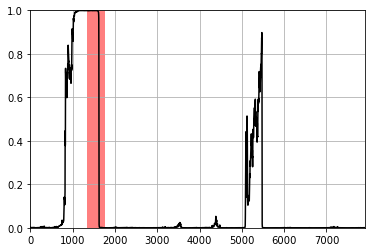

ENST00000503221
recall: 0.657471239566803
iou: 0.44204017519950867
biotype: processed_transcript
IP_675441  :  {'start': 299, 'stop': 389, 'MS': 0, 'TE': 0, 'frame': 3}
IP_675442  :  {'start': 521, 'stop': 689, 'MS': 0, 'TE': 0, 'frame': 3}
IP_675440  :  {'start': 577, 'stop': 793, 'MS': 0, 'TE': 0, 'frame': 2}
IP_675438  :  {'start': 1071, 'stop': 1278, 'MS': 0, 'TE': 0, 'frame': 1}
II_675439  :  {'start': 1165, 'stop': 1546, 'MS': 0, 'TE': 0, 'frame': 2}
IP_076432  :  {'start': 1259, 'stop': 1694, 'MS': 1, 'TE': 1, 'frame': 3}
IP_076416  :  {'start': 1662, 'stop': 1968, 'MS': 0, 'TE': 0, 'frame': 1}
IP_076412  :  {'start': 2133, 'stop': 2337, 'MS': 0, 'TE': 0, 'frame': 1}
IP_076428  :  {'start': 2591, 'stop': 2816, 'MS': 0, 'TE': 0, 'frame': 3}
IP_076423  :  {'start': 2746, 'stop': 2854, 'MS': 0, 'TE': 0, 'frame': 2}
IP_076425  :  {'start': 2875, 'stop': 3193, 'MS': 0, 'TE': 0, 'frame': 2}
IP_076436  :  {'start': 2984, 'stop': 3122, 'MS': 0, 'TE': 0, 'frame': 3}
IP_076413  :  {'start

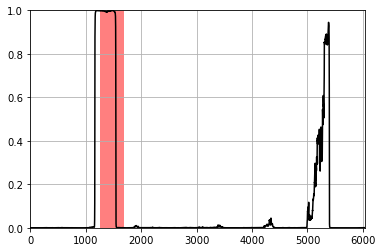

ENST00000649899
recall: 0.9759259223937988
iou: 0.21545380353927612
biotype: processed_transcript
IP_079724  :  {'start': 651, 'stop': 813, 'MS': 0, 'TE': 0, 'frame': 1}
II_079722  :  {'start': 924, 'stop': 1182, 'MS': 0, 'TE': 0, 'frame': 1}
IP_079725  :  {'start': 1428, 'stop': 1611, 'MS': 1, 'TE': 0, 'frame': 1}
IP_079723  :  {'start': 2127, 'stop': 2667, 'MS': 6, 'TE': 1, 'frame': 1}
IP_079731  :  {'start': 2611, 'stop': 2722, 'MS': 1, 'TE': 0, 'frame': 2}
IP_079721  :  {'start': 2949, 'stop': 3069, 'MS': 0, 'TE': 0, 'frame': 1}
IP_079729  :  {'start': 3460, 'stop': 3553, 'MS': 1, 'TE': 0, 'frame': 2}
IP_079730  :  {'start': 3988, 'stop': 4135, 'MS': 0, 'TE': 0, 'frame': 2}
IP_079727  :  {'start': 5617, 'stop': 5707, 'MS': 0, 'TE': 0, 'frame': 2}
IP_079726  :  {'start': 5910, 'stop': 6054, 'MS': 0, 'TE': 0, 'frame': 1}
IP_079728  :  {'start': 5956, 'stop': 6088, 'MS': 0, 'TE': 0, 'frame': 2}
IP_2393684  :  {'start': 7282, 'stop': 7384, 'MS': 0, 'TE': 0, 'frame': 2}
IP_2393683  :  {

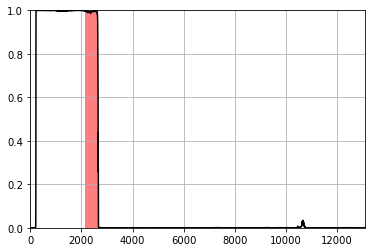

ENST00000413987
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_080593  :  {'start': 498, 'stop': 588, 'MS': 0, 'TE': 0, 'frame': 1}
IP_080590  :  {'start': 998, 'stop': 1127, 'MS': 1, 'TE': 1, 'frame': 3}
IP_080595  :  {'start': 1471, 'stop': 1582, 'MS': 0, 'TE': 0, 'frame': 2}
IP_080591  :  {'start': 1790, 'stop': 1892, 'MS': 0, 'TE': 0, 'frame': 3}
IP_080594  :  {'start': 2005, 'stop': 2161, 'MS': 0, 'TE': 0, 'frame': 2}


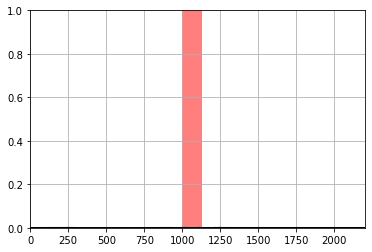

ENST00000423222
recall: 1.0
iou: 0.3274647891521454
biotype: processed_transcript
IP_082048  :  {'start': 147, 'stop': 432, 'MS': 0, 'TE': 3, 'frame': 1}
IP_082049  :  {'start': 181, 'stop': 274, 'MS': 2, 'TE': 2, 'frame': 2}
IP_082050  :  {'start': 289, 'stop': 502, 'MS': 0, 'TE': 0, 'frame': 2}
IP_082052  :  {'start': 404, 'stop': 548, 'MS': 0, 'TE': 1, 'frame': 3}
IP_668429  :  {'start': 601, 'stop': 724, 'MS': 0, 'TE': 0, 'frame': 2}
IP_668425  :  {'start': 672, 'stop': 780, 'MS': 0, 'TE': 0, 'frame': 1}
IP_668432  :  {'start': 890, 'stop': 1508, 'MS': 0, 'TE': 0, 'frame': 3}
IP_668427  :  {'start': 940, 'stop': 1120, 'MS': 0, 'TE': 0, 'frame': 2}
IP_668430  :  {'start': 1141, 'stop': 1399, 'MS': 2, 'TE': 0, 'frame': 2}
IP_668424  :  {'start': 1569, 'stop': 1752, 'MS': 0, 'TE': 0, 'frame': 1}
IP_668431  :  {'start': 1765, 'stop': 1879, 'MS': 0, 'TE': 0, 'frame': 2}
IP_668428  :  {'start': 1984, 'stop': 2110, 'MS': 0, 'TE': 0, 'frame': 2}
IP_668426  :  {'start': 2508, 'stop': 2715, 

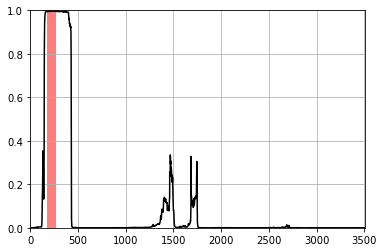

ENST00000534914
recall: 1.0
iou: 0.2460317462682724
biotype: processed_transcript
IP_668421  :  {'start': 130, 'stop': 505, 'MS': 0, 'TE': 0, 'frame': 2}
IP_082049  :  {'start': 164, 'stop': 257, 'MS': 2, 'TE': 2, 'frame': 3}
IP_668423  :  {'start': 272, 'stop': 509, 'MS': 0, 'TE': 0, 'frame': 3}
IP_668422  :  {'start': 523, 'stop': 718, 'MS': 0, 'TE': 0, 'frame': 2}
IP_668420  :  {'start': 696, 'stop': 858, 'MS': 0, 'TE': 0, 'frame': 1}


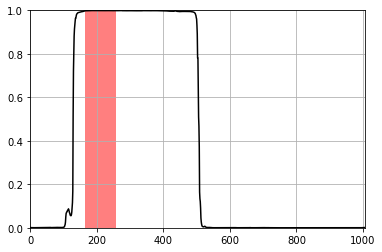

ENST00000448567
recall: 0.34408602118492126
iou: 0.27826085686683655
biotype: processed_transcript
IP_082049  :  {'start': 304, 'stop': 397, 'MS': 2, 'TE': 2, 'frame': 2}


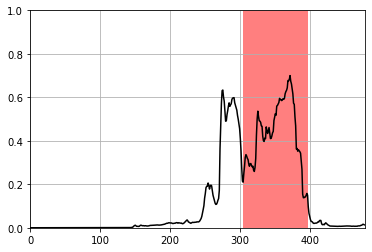

ENST00000628622
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_665819  :  {'start': 139, 'stop': 328, 'MS': 0, 'TE': 0, 'frame': 2}
IP_665814  :  {'start': 267, 'stop': 474, 'MS': 1, 'TE': 2, 'frame': 1}
IP_665818  :  {'start': 361, 'stop': 463, 'MS': 0, 'TE': 0, 'frame': 2}
IP_665824  :  {'start': 401, 'stop': 563, 'MS': 0, 'TE': 0, 'frame': 3}
IP_082308  :  {'start': 758, 'stop': 1022, 'MS': 0, 'TE': 0, 'frame': 3}
IP_665817  :  {'start': 939, 'stop': 1029, 'MS': 0, 'TE': 0, 'frame': 1}
IP_665816  :  {'start': 1032, 'stop': 1167, 'MS': 0, 'TE': 0, 'frame': 1}
IP_665822  :  {'start': 1631, 'stop': 2252, 'MS': 0, 'TE': 0, 'frame': 3}
IP_082306  :  {'start': 1944, 'stop': 2058, 'MS': 0, 'TE': 0, 'frame': 1}
IP_665815  :  {'start': 2214, 'stop': 2547, 'MS': 0, 'TE': 0, 'frame': 1}
IP_665821  :  {'start': 2290, 'stop': 2461, 'MS': 0, 'TE': 0, 'frame': 2}
IP_665820  :  {'start': 2581, 'stop': 2962, 'MS': 0, 'TE': 0, 'frame': 2}
IP_665823  :  {'start': 2963, 'stop': 3080, 'MS': 0, 'T

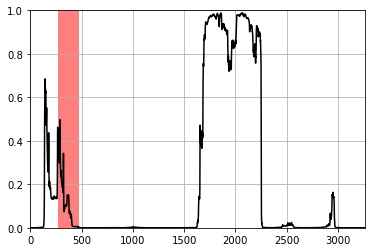

ENST00000634317
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_613793  :  {'start': 170, 'stop': 296, 'MS': 1, 'TE': 2, 'frame': 3}
IP_082132  :  {'start': 484, 'stop': 661, 'MS': 0, 'TE': 3, 'frame': 2}
IP_613798  :  {'start': 564, 'stop': 843, 'MS': 0, 'TE': 1, 'frame': 1}
IP_613799  :  {'start': 775, 'stop': 931, 'MS': 0, 'TE': 0, 'frame': 2}
IP_082330  :  {'start': 981, 'stop': 1077, 'MS': 0, 'TE': 0, 'frame': 1}
IP_613801  :  {'start': 1160, 'stop': 1472, 'MS': 0, 'TE': 0, 'frame': 3}
IP_080165  :  {'start': 1249, 'stop': 1351, 'MS': 0, 'TE': 0, 'frame': 2}
IP_613796  :  {'start': 1419, 'stop': 1548, 'MS': 0, 'TE': 0, 'frame': 1}
IP_124787  :  {'start': 1520, 'stop': 1724, 'MS': 0, 'TE': 0, 'frame': 3}
IP_124786  :  {'start': 1677, 'stop': 1791, 'MS': 0, 'TE': 1, 'frame': 1}
IP_613797  :  {'start': 1818, 'stop': 1989, 'MS': 1, 'TE': 0, 'frame': 1}
IP_613802  :  {'start': 1916, 'stop': 2039, 'MS': 0, 'TE': 0, 'frame': 3}
IP_613800  :  {'start': 1954, 'stop': 2155, 'MS': 0, '

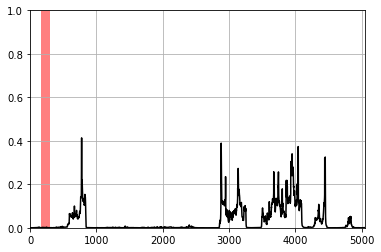

ENST00000481492
recall: 0.0
iou: 0.0
biotype: processed_transcript
II_648199  :  {'start': 293, 'stop': 629, 'MS': 0, 'TE': 0, 'frame': 3}
IP_090242  :  {'start': 912, 'stop': 1044, 'MS': 0, 'TE': 1, 'frame': 1}
IP_090244  :  {'start': 1120, 'stop': 1285, 'MS': 2, 'TE': 3, 'frame': 2}


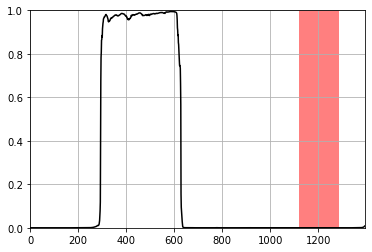

ENST00000462321
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_648198  :  {'start': 9, 'stop': 201, 'MS': 0, 'TE': 0, 'frame': 1}
IP_090242  :  {'start': 691, 'stop': 823, 'MS': 0, 'TE': 1, 'frame': 2}
IP_090244  :  {'start': 899, 'stop': 1064, 'MS': 2, 'TE': 3, 'frame': 3}
IP_090248  :  {'start': 1329, 'stop': 1470, 'MS': 0, 'TE': 1, 'frame': 1}
IP_090245  :  {'start': 1538, 'stop': 1664, 'MS': 0, 'TE': 0, 'frame': 3}


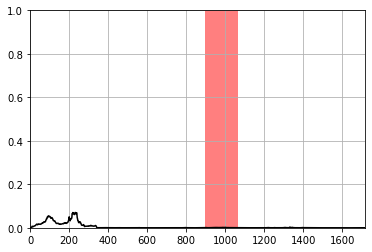

ENST00000636831
recall: 1.0
iou: 0.13201820850372314
biotype: processed_transcript
II_3419475  :  {'start': 218, 'stop': 731, 'MS': 0, 'TE': 0, 'frame': 3}
IP_091126  :  {'start': 222, 'stop': 396, 'MS': 1, 'TE': 1, 'frame': 1}
IP_3419479  :  {'start': 903, 'stop': 1116, 'MS': 0, 'TE': 0, 'frame': 1}
IP_3419480  :  {'start': 1218, 'stop': 1383, 'MS': 0, 'TE': 0, 'frame': 1}
IP_3419476  :  {'start': 1736, 'stop': 1859, 'MS': 0, 'TE': 0, 'frame': 3}
IP_3419477  :  {'start': 1967, 'stop': 2126, 'MS': 0, 'TE': 0, 'frame': 3}
IP_3419478  :  {'start': 2210, 'stop': 2384, 'MS': 0, 'TE': 0, 'frame': 3}
II_2383969  :  {'start': 2449, 'stop': 3295, 'MS': 1, 'TE': 0, 'frame': 2}
II_2383970  :  {'start': 2453, 'stop': 2702, 'MS': 0, 'TE': 0, 'frame': 3}
II_091122  :  {'start': 2804, 'stop': 2906, 'MS': 0, 'TE': 0, 'frame': 3}
IP_091105  :  {'start': 3107, 'stop': 3368, 'MS': 0, 'TE': 0, 'frame': 3}
IP_091098  :  {'start': 3401, 'stop': 3506, 'MS': 0, 'TE': 0, 'frame': 3}
IP_091108  :  {'start': 34

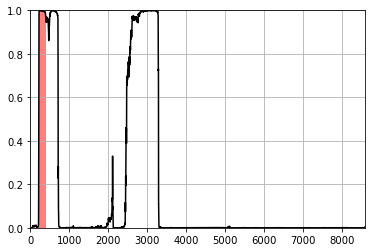

ENST00000637773
recall: 1.0
iou: 0.17846153676509857
biotype: processed_transcript
II_3419475  :  {'start': 220, 'stop': 733, 'MS': 0, 'TE': 0, 'frame': 2}
IP_091126  :  {'start': 224, 'stop': 398, 'MS': 1, 'TE': 1, 'frame': 3}
IP_3419479  :  {'start': 905, 'stop': 1118, 'MS': 0, 'TE': 0, 'frame': 3}
IP_3419480  :  {'start': 1220, 'stop': 1385, 'MS': 0, 'TE': 0, 'frame': 3}
IP_3419476  :  {'start': 1738, 'stop': 1861, 'MS': 0, 'TE': 0, 'frame': 2}
IP_3419477  :  {'start': 1969, 'stop': 2128, 'MS': 0, 'TE': 0, 'frame': 2}
IP_3419478  :  {'start': 2212, 'stop': 2386, 'MS': 0, 'TE': 0, 'frame': 2}
II_3419474  :  {'start': 2451, 'stop': 2634, 'MS': 1, 'TE': 0, 'frame': 1}
II_091122  :  {'start': 2975, 'stop': 3077, 'MS': 0, 'TE': 0, 'frame': 3}


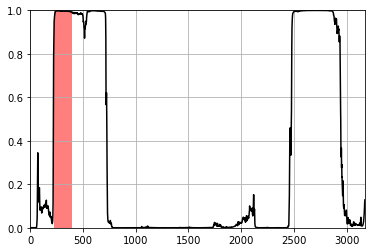

ENST00000637530
recall: 1.0
iou: 0.09375
biotype: processed_transcript
IP_091126  :  {'start': 224, 'stop': 398, 'MS': 1, 'TE': 1, 'frame': 3}
IP_647688  :  {'start': 872, 'stop': 971, 'MS': 0, 'TE': 0, 'frame': 3}
IP_647679  :  {'start': 936, 'stop': 1095, 'MS': 0, 'TE': 0, 'frame': 1}
II_647678  :  {'start': 1542, 'stop': 1635, 'MS': 0, 'TE': 0, 'frame': 1}
IP_647689  :  {'start': 1631, 'stop': 1952, 'MS': 0, 'TE': 0, 'frame': 3}
II_3385382  :  {'start': 1995, 'stop': 2976, 'MS': 0, 'TE': 0, 'frame': 1}
II_091122  :  {'start': 2485, 'stop': 2587, 'MS': 0, 'TE': 0, 'frame': 2}
IP_091105  :  {'start': 2788, 'stop': 3049, 'MS': 0, 'TE': 0, 'frame': 2}


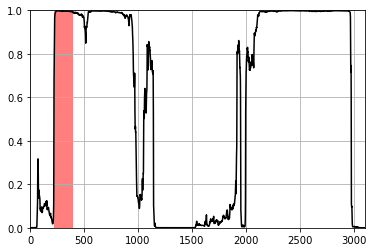

ENST00000461347
recall: 0.8035714030265808
iou: 0.11688311398029327
biotype: processed_transcript
IP_640919  :  {'start': 227, 'stop': 371, 'MS': 0, 'TE': 0, 'frame': 3}
IP_640913  :  {'start': 288, 'stop': 666, 'MS': 1, 'TE': 0, 'frame': 1}
IP_640914  :  {'start': 484, 'stop': 838, 'MS': 0, 'TE': 0, 'frame': 2}
IP_640917  :  {'start': 698, 'stop': 1013, 'MS': 0, 'TE': 0, 'frame': 3}
II_640915  :  {'start': 988, 'stop': 2113, 'MS': 0, 'TE': 1, 'frame': 2}
IP_096576  :  {'start': 1028, 'stop': 1298, 'MS': 0, 'TE': 0, 'frame': 3}
IP_096571  :  {'start': 1346, 'stop': 1466, 'MS': 0, 'TE': 0, 'frame': 3}
IP_096575  :  {'start': 1496, 'stop': 1622, 'MS': 0, 'TE': 0, 'frame': 3}
IP_096574  :  {'start': 1643, 'stop': 1883, 'MS': 1, 'TE': 0, 'frame': 3}
IP_640916  :  {'start': 2132, 'stop': 2303, 'MS': 0, 'TE': 0, 'frame': 3}
IP_640918  :  {'start': 2468, 'stop': 2558, 'MS': 0, 'TE': 0, 'frame': 3}
II_640912  :  {'start': 2631, 'stop': 3684, 'MS': 0, 'TE': 0, 'frame': 1}
IP_096573  :  {'start'

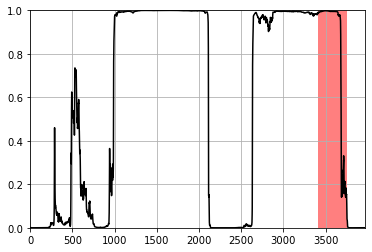

ENST00000610202
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_098912  :  {'start': 235, 'stop': 466, 'MS': 1, 'TE': 1, 'frame': 2}
IP_098909  :  {'start': 264, 'stop': 387, 'MS': 0, 'TE': 0, 'frame': 1}
IP_098911  :  {'start': 511, 'stop': 703, 'MS': 1, 'TE': 0, 'frame': 2}
IP_098913  :  {'start': 1330, 'stop': 1450, 'MS': 0, 'TE': 0, 'frame': 2}
IP_098910  :  {'start': 1416, 'stop': 1509, 'MS': 0, 'TE': 0, 'frame': 1}
IP_098914  :  {'start': 1837, 'stop': 2059, 'MS': 0, 'TE': 0, 'frame': 2}


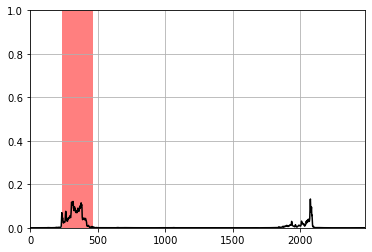

ENST00000419296
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_099004  :  {'start': 191, 'stop': 371, 'MS': 4, 'TE': 2, 'frame': 3}
IP_099006  :  {'start': 632, 'stop': 848, 'MS': 0, 'TE': 10, 'frame': 3}
IP_099003  :  {'start': 848, 'stop': 1253, 'MS': 0, 'TE': 0, 'frame': 3}
IP_099000  :  {'start': 931, 'stop': 1075, 'MS': 0, 'TE': 0, 'frame': 2}
IP_099008  :  {'start': 1395, 'stop': 1704, 'MS': 0, 'TE': 0, 'frame': 1}
IP_099005  :  {'start': 1541, 'stop': 1724, 'MS': 0, 'TE': 0, 'frame': 3}
IP_099002  :  {'start': 1792, 'stop': 1996, 'MS': 0, 'TE': 2, 'frame': 2}
IP_099007  :  {'start': 1905, 'stop': 2010, 'MS': 0, 'TE': 0, 'frame': 1}
IP_099001  :  {'start': 2140, 'stop': 2245, 'MS': 0, 'TE': 0, 'frame': 2}


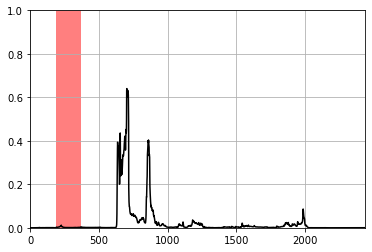

ENST00000436092
recall: 0.04700854793190956
iou: 0.04700854793190956
biotype: processed_transcript
IP_100432  :  {'start': 84, 'stop': 318, 'MS': 1, 'TE': 13, 'frame': 1}
II_632346  :  {'start': 269, 'stop': 485, 'MS': 0, 'TE': 0, 'frame': 3}
IP_632345  :  {'start': 432, 'stop': 537, 'MS': 0, 'TE': 0, 'frame': 1}


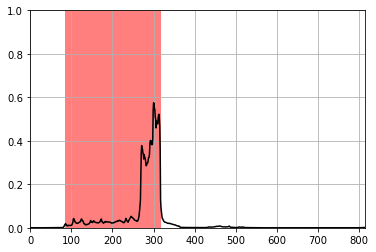

ENST00000493282
recall: 0.49494948983192444
iou: 0.14626865088939667
biotype: processed_transcript
IP_103529  :  {'start': 185, 'stop': 284, 'MS': 1, 'TE': 1, 'frame': 3}
II_629755  :  {'start': 222, 'stop': 564, 'MS': 0, 'TE': 0, 'frame': 1}
IP_103524  :  {'start': 364, 'stop': 457, 'MS': 0, 'TE': 0, 'frame': 2}


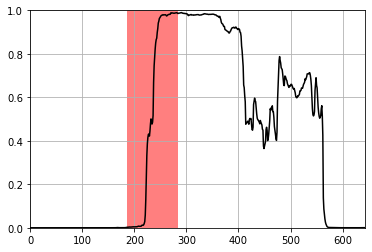

ENST00000498428
recall: 1.0
iou: 0.08275234699249268
biotype: processed_transcript
IP_106549  :  {'start': 302, 'stop': 575, 'MS': 1, 'TE': 1, 'frame': 3}
IP_106553  :  {'start': 863, 'stop': 989, 'MS': 0, 'TE': 0, 'frame': 3}
IP_106555  :  {'start': 1136, 'stop': 1244, 'MS': 0, 'TE': 0, 'frame': 3}
IP_106552  :  {'start': 1316, 'stop': 1484, 'MS': 0, 'TE': 0, 'frame': 3}
IP_106550  :  {'start': 2162, 'stop': 2264, 'MS': 0, 'TE': 0, 'frame': 3}
IP_106551  :  {'start': 2282, 'stop': 2438, 'MS': 0, 'TE': 0, 'frame': 3}


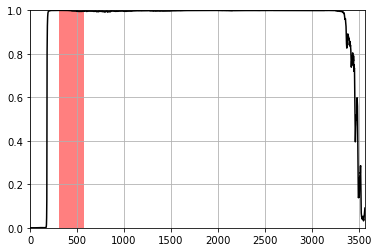

ENST00000484514
recall: 1.0
iou: 0.1786649227142334
biotype: processed_transcript
IP_633135  :  {'start': 240, 'stop': 429, 'MS': 0, 'TE': 0, 'frame': 1}
IP_633138  :  {'start': 280, 'stop': 394, 'MS': 0, 'TE': 0, 'frame': 2}
II_633139  :  {'start': 788, 'stop': 2195, 'MS': 0, 'TE': 1, 'frame': 3}
IP_106549  :  {'start': 1230, 'stop': 1503, 'MS': 1, 'TE': 1, 'frame': 1}
IP_106553  :  {'start': 1791, 'stop': 1917, 'MS': 0, 'TE': 0, 'frame': 1}
IP_633136  :  {'start': 2064, 'stop': 2211, 'MS': 0, 'TE': 0, 'frame': 1}
IP_633137  :  {'start': 2773, 'stop': 2881, 'MS': 0, 'TE': 0, 'frame': 2}


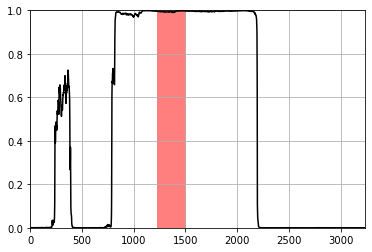

ENST00000465215
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_114205  :  {'start': 72, 'stop': 258, 'MS': 0, 'TE': 1, 'frame': 1}
IP_114211  :  {'start': 170, 'stop': 266, 'MS': 0, 'TE': 0, 'frame': 3}
IP_114209  :  {'start': 365, 'stop': 476, 'MS': 0, 'TE': 0, 'frame': 3}
IP_114210  :  {'start': 743, 'stop': 908, 'MS': 1, 'TE': 1, 'frame': 3}
IP_114207  :  {'start': 774, 'stop': 894, 'MS': 0, 'TE': 0, 'frame': 1}
IP_114208  :  {'start': 943, 'stop': 1099, 'MS': 0, 'TE': 0, 'frame': 2}
IP_114204  :  {'start': 1605, 'stop': 1740, 'MS': 1, 'TE': 0, 'frame': 1}


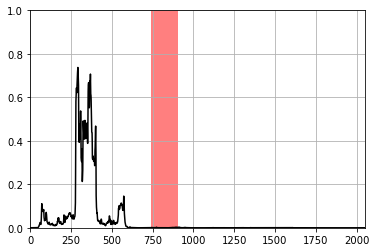

ENST00000483840
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_114211  :  {'start': 7, 'stop': 103, 'MS': 0, 'TE': 0, 'frame': 2}
IP_114209  :  {'start': 202, 'stop': 313, 'MS': 0, 'TE': 0, 'frame': 2}
IP_114210  :  {'start': 580, 'stop': 745, 'MS': 1, 'TE': 1, 'frame': 2}
IP_114207  :  {'start': 611, 'stop': 731, 'MS': 0, 'TE': 0, 'frame': 3}
IP_114208  :  {'start': 780, 'stop': 936, 'MS': 0, 'TE': 0, 'frame': 1}
IP_114204  :  {'start': 1442, 'stop': 1577, 'MS': 1, 'TE': 0, 'frame': 3}


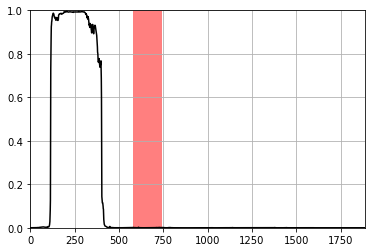

ENST00000608395
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_620684  :  {'start': 11, 'stop': 125, 'MS': 0, 'TE': 0, 'frame': 3}
IP_114679  :  {'start': 27, 'stop': 177, 'MS': 2, 'TE': 1, 'frame': 1}
IP_114678  :  {'start': 173, 'stop': 392, 'MS': 0, 'TE': 0, 'frame': 3}
IP_114660  :  {'start': 277, 'stop': 670, 'MS': 0, 'TE': 0, 'frame': 2}
IP_114652  :  {'start': 501, 'stop': 615, 'MS': 0, 'TE': 0, 'frame': 1}
IP_114666  :  {'start': 799, 'stop': 970, 'MS': 0, 'TE': 1, 'frame': 2}
IP_114669  :  {'start': 1052, 'stop': 1154, 'MS': 0, 'TE': 0, 'frame': 3}
IP_114662  :  {'start': 1177, 'stop': 1366, 'MS': 0, 'TE': 0, 'frame': 2}
IP_114667  :  {'start': 1274, 'stop': 1391, 'MS': 0, 'TE': 0, 'frame': 3}
IP_114664  :  {'start': 1636, 'stop': 1813, 'MS': 0, 'TE': 0, 'frame': 2}
IP_114649  :  {'start': 1998, 'stop': 2175, 'MS': 0, 'TE': 0, 'frame': 1}
IP_114658  :  {'start': 2293, 'stop': 2416, 'MS': 0, 'TE': 0, 'frame': 2}
IP_114672  :  {'start': 2348, 'stop': 2519, 'MS': 0, 'TE': 

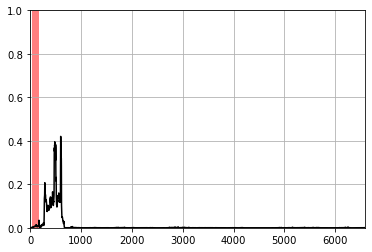

ENST00000445466
recall: 0.6384180784225464
iou: 0.6158038377761841
biotype: processed_transcript
IP_620683  :  {'start': 2, 'stop': 245, 'MS': 0, 'TE': 0, 'frame': 3}
IP_114673  :  {'start': 18, 'stop': 372, 'MS': 2, 'TE': 1, 'frame': 1}
IP_114660  :  {'start': 257, 'stop': 650, 'MS': 0, 'TE': 0, 'frame': 3}
IP_114652  :  {'start': 481, 'stop': 595, 'MS': 0, 'TE': 0, 'frame': 2}
IP_114666  :  {'start': 779, 'stop': 950, 'MS': 0, 'TE': 1, 'frame': 3}


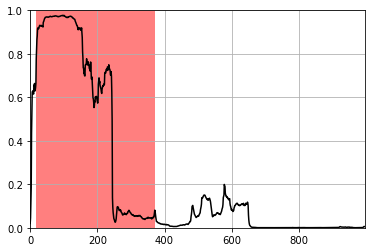

ENST00000605573
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_115000  :  {'start': 297, 'stop': 399, 'MS': 0, 'TE': 0, 'frame': 1}
IP_114997  :  {'start': 440, 'stop': 776, 'MS': 1, 'TE': 2, 'frame': 3}
IP_115003  :  {'start': 772, 'stop': 889, 'MS': 0, 'TE': 0, 'frame': 2}
IP_114998  :  {'start': 899, 'stop': 1001, 'MS': 0, 'TE': 0, 'frame': 3}
IP_114999  :  {'start': 1047, 'stop': 1149, 'MS': 0, 'TE': 0, 'frame': 1}
IP_115004  :  {'start': 1258, 'stop': 1366, 'MS': 0, 'TE': 0, 'frame': 2}
IP_115001  :  {'start': 1365, 'stop': 1458, 'MS': 1, 'TE': 0, 'frame': 1}
IP_115002  :  {'start': 1714, 'stop': 1873, 'MS': 0, 'TE': 0, 'frame': 2}


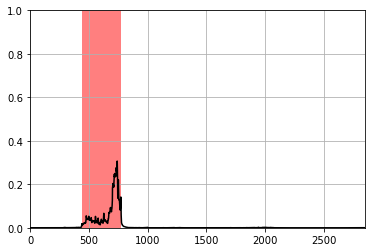

ENST00000515764
recall: 0.019607843831181526
iou: 0.019607843831181526
biotype: processed_transcript
II_619237  :  {'start': 317, 'stop': 419, 'MS': 0, 'TE': 0, 'frame': 3}
IP_117002  :  {'start': 415, 'stop': 670, 'MS': 2, 'TE': 6, 'frame': 2}


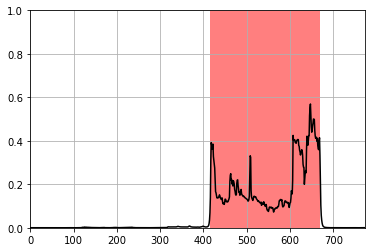

ENST00000505687
recall: 1.0
iou: 0.14153845608234406
biotype: processed_transcript
II_616882  :  {'start': 172, 'stop': 1150, 'MS': 0, 'TE': 0, 'frame': 2}
IP_120173  :  {'start': 236, 'stop': 374, 'MS': 1, 'TE': 1, 'frame': 3}
IP_120171  :  {'start': 659, 'stop': 773, 'MS': 0, 'TE': 0, 'frame': 3}
IP_616881  :  {'start': 1146, 'stop': 1290, 'MS': 0, 'TE': 0, 'frame': 1}


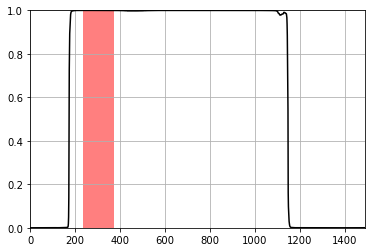

ENST00000578730
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_615058  :  {'start': 26, 'stop': 359, 'MS': 1, 'TE': 2, 'frame': 3}
IP_124082  :  {'start': 811, 'stop': 1087, 'MS': 0, 'TE': 1, 'frame': 2}
IP_124084  :  {'start': 1034, 'stop': 1316, 'MS': 0, 'TE': 0, 'frame': 3}
IP_124080  :  {'start': 1123, 'stop': 1684, 'MS': 0, 'TE': 0, 'frame': 2}
IP_124077  :  {'start': 1581, 'stop': 1947, 'MS': 0, 'TE': 0, 'frame': 1}
IP_124085  :  {'start': 1943, 'stop': 2219, 'MS': 0, 'TE': 0, 'frame': 3}
IP_615056  :  {'start': 2064, 'stop': 2499, 'MS': 0, 'TE': 0, 'frame': 1}
IP_615057  :  {'start': 2519, 'stop': 2621, 'MS': 0, 'TE': 0, 'frame': 3}


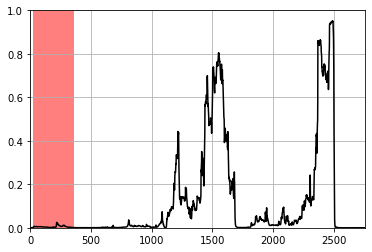

ENST00000466692
recall: 0.774193525314331
iou: 0.774193525314331
biotype: processed_transcript
II_124097  :  {'start': 45, 'stop': 141, 'MS': 0, 'TE': 0, 'frame': 1}
IP_124096  :  {'start': 119, 'stop': 491, 'MS': 1, 'TE': 1, 'frame': 3}


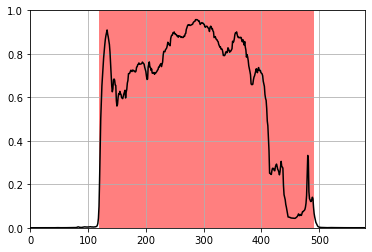

ENST00000515488
recall: 0.7416666746139526
iou: 0.33085501194000244
biotype: processed_transcript
IP_134504  :  {'start': 149, 'stop': 269, 'MS': 2, 'TE': 1, 'frame': 3}
IP_134499  :  {'start': 317, 'stop': 416, 'MS': 0, 'TE': 0, 'frame': 3}


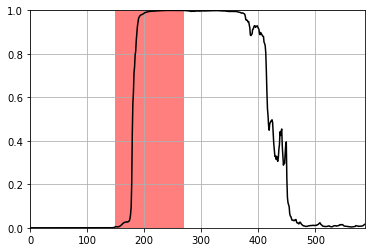

ENST00000501702
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_136221  :  {'start': 52, 'stop': 184, 'MS': 0, 'TE': 9, 'frame': 2}
IP_136219  :  {'start': 132, 'stop': 231, 'MS': 1, 'TE': 3, 'frame': 1}
IP_136220  :  {'start': 241, 'stop': 343, 'MS': 0, 'TE': 0, 'frame': 2}
IP_136222  :  {'start': 1084, 'stop': 1183, 'MS': 0, 'TE': 0, 'frame': 2}
IP_136223  :  {'start': 1387, 'stop': 1516, 'MS': 0, 'TE': 0, 'frame': 2}
IP_136226  :  {'start': 1673, 'stop': 1766, 'MS': 0, 'TE': 0, 'frame': 3}
IP_136225  :  {'start': 2098, 'stop': 2266, 'MS': 0, 'TE': 0, 'frame': 2}
IP_136224  :  {'start': 2473, 'stop': 2566, 'MS': 0, 'TE': 0, 'frame': 2}


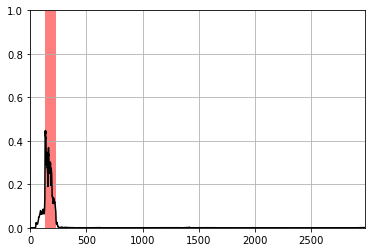

ENST00000510234
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_600459  :  {'start': 67, 'stop': 175, 'MS': 0, 'TE': 0, 'frame': 2}
IP_600456  :  {'start': 207, 'stop': 300, 'MS': 0, 'TE': 0, 'frame': 1}
IP_136560  :  {'start': 502, 'stop': 619, 'MS': 0, 'TE': 2, 'frame': 2}
IP_136561  :  {'start': 677, 'stop': 788, 'MS': 1, 'TE': 1, 'frame': 3}
IP_136559  :  {'start': 753, 'stop': 888, 'MS': 0, 'TE': 0, 'frame': 1}


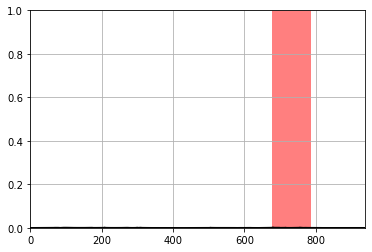

ENST00000600652
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_148234  :  {'start': 205, 'stop': 670, 'MS': 1, 'TE': 1, 'frame': 2}
IP_148233  :  {'start': 965, 'stop': 1112, 'MS': 0, 'TE': 0, 'frame': 3}
IP_148232  :  {'start': 1145, 'stop': 1283, 'MS': 0, 'TE': 0, 'frame': 3}
IP_148231  :  {'start': 1498, 'stop': 1603, 'MS': 0, 'TE': 0, 'frame': 2}
IP_148230  :  {'start': 1767, 'stop': 1899, 'MS': 0, 'TE': 0, 'frame': 1}


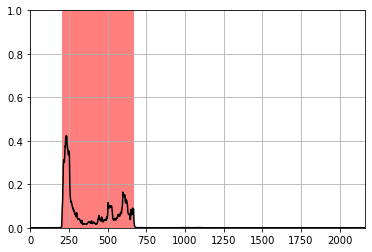

ENST00000446219
recall: 0.0
iou: 0.0
biotype: processed_transcript


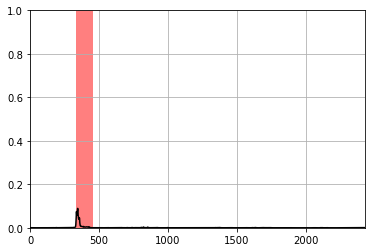

ENST00000412685
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_148314  :  {'start': 88, 'stop': 328, 'MS': 0, 'TE': 9, 'frame': 2}
IP_148328  :  {'start': 825, 'stop': 945, 'MS': 1, 'TE': 14, 'frame': 1}
IP_148320  :  {'start': 1196, 'stop': 1352, 'MS': 0, 'TE': 6, 'frame': 3}
IP_148325  :  {'start': 1296, 'stop': 1416, 'MS': 0, 'TE': 1, 'frame': 1}
IP_148330  :  {'start': 1488, 'stop': 1671, 'MS': 0, 'TE': 2, 'frame': 1}
IP_148318  :  {'start': 1832, 'stop': 1985, 'MS': 0, 'TE': 1, 'frame': 3}
IP_148329  :  {'start': 2181, 'stop': 2301, 'MS': 0, 'TE': 0, 'frame': 1}


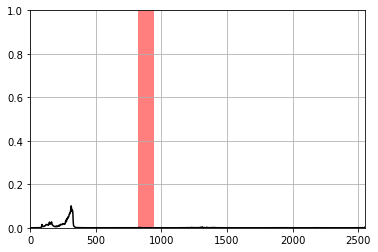

ENST00000422065
recall: 0.0833333358168602
iou: 0.0833333358168602
biotype: processed_transcript


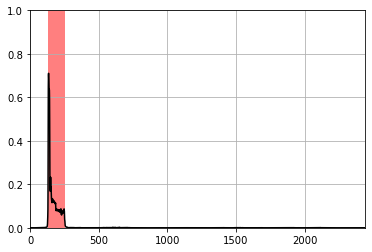

ENST00000602367
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_148673  :  {'start': 284, 'stop': 440, 'MS': 0, 'TE': 3, 'frame': 3}
IP_148668  :  {'start': 805, 'stop': 922, 'MS': 2, 'TE': 3, 'frame': 2}
IP_148676  :  {'start': 918, 'stop': 1113, 'MS': 0, 'TE': 2, 'frame': 1}
IP_148672  :  {'start': 1169, 'stop': 1289, 'MS': 0, 'TE': 0, 'frame': 3}
IP_148675  :  {'start': 1176, 'stop': 1461, 'MS': 0, 'TE': 0, 'frame': 1}
IP_148669  :  {'start': 1960, 'stop': 2086, 'MS': 1, 'TE': 1, 'frame': 2}
IP_148670  :  {'start': 2153, 'stop': 2339, 'MS': 0, 'TE': 1, 'frame': 3}
IP_148674  :  {'start': 2534, 'stop': 2669, 'MS': 0, 'TE': 0, 'frame': 3}
IP_148671  :  {'start': 2783, 'stop': 2882, 'MS': 0, 'TE': 0, 'frame': 3}
IP_148667  :  {'start': 2881, 'stop': 3007, 'MS': 0, 'TE': 0, 'frame': 2}


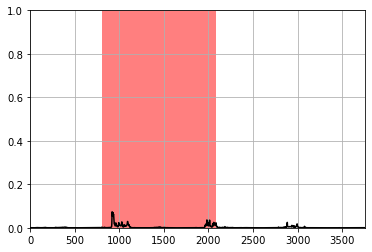

ENST00000643631
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_148673  :  {'start': 348, 'stop': 504, 'MS': 0, 'TE': 3, 'frame': 1}
IP_148668  :  {'start': 869, 'stop': 986, 'MS': 2, 'TE': 3, 'frame': 3}
IP_148676  :  {'start': 982, 'stop': 1177, 'MS': 0, 'TE': 2, 'frame': 2}
IP_148677  :  {'start': 1184, 'stop': 1295, 'MS': 0, 'TE': 2, 'frame': 3}
IP_148669  :  {'start': 1794, 'stop': 1920, 'MS': 1, 'TE': 1, 'frame': 1}
IP_148670  :  {'start': 1987, 'stop': 2173, 'MS': 0, 'TE': 1, 'frame': 2}
IP_148674  :  {'start': 2368, 'stop': 2503, 'MS': 0, 'TE': 0, 'frame': 2}
IP_148671  :  {'start': 2617, 'stop': 2716, 'MS': 0, 'TE': 0, 'frame': 2}
IP_148667  :  {'start': 2715, 'stop': 2841, 'MS': 0, 'TE': 0, 'frame': 1}


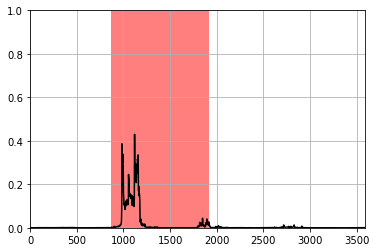

ENST00000644242
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_148668  :  {'start': 513, 'stop': 630, 'MS': 2, 'TE': 3, 'frame': 1}
IP_148676  :  {'start': 626, 'stop': 821, 'MS': 0, 'TE': 2, 'frame': 3}
IP_148672  :  {'start': 877, 'stop': 997, 'MS': 0, 'TE': 0, 'frame': 2}
IP_148675  :  {'start': 884, 'stop': 1169, 'MS': 0, 'TE': 0, 'frame': 3}
IP_148669  :  {'start': 1668, 'stop': 1794, 'MS': 1, 'TE': 1, 'frame': 1}
IP_148670  :  {'start': 1861, 'stop': 2047, 'MS': 0, 'TE': 1, 'frame': 2}
IP_148674  :  {'start': 2242, 'stop': 2377, 'MS': 0, 'TE': 0, 'frame': 2}
IP_148671  :  {'start': 2491, 'stop': 2590, 'MS': 0, 'TE': 0, 'frame': 2}
IP_148667  :  {'start': 2589, 'stop': 2715, 'MS': 0, 'TE': 0, 'frame': 1}


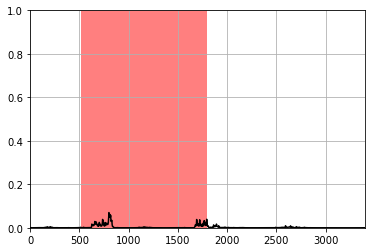

ENST00000413171
recall: 1.0
iou: 0.0806393027305603
biotype: processed_transcript
II_590540  :  {'start': 24, 'stop': 1542, 'MS': 0, 'TE': 1, 'frame': 1}
IP_149549  :  {'start': 91, 'stop': 274, 'MS': 0, 'TE': 9, 'frame': 2}
IP_590536  :  {'start': 481, 'stop': 703, 'MS': 2, 'TE': 1, 'frame': 2}
IP_590542  :  {'start': 949, 'stop': 1237, 'MS': 0, 'TE': 0, 'frame': 2}
IP_590534  :  {'start': 1067, 'stop': 1331, 'MS': 0, 'TE': 0, 'frame': 3}
II_590541  :  {'start': 1534, 'stop': 2917, 'MS': 0, 'TE': 0, 'frame': 2}
IP_149557  :  {'start': 2897, 'stop': 3068, 'MS': 0, 'TE': 0, 'frame': 3}
IP_149553  :  {'start': 3460, 'stop': 3568, 'MS': 0, 'TE': 0, 'frame': 2}
IP_149556  :  {'start': 3622, 'stop': 3730, 'MS': 0, 'TE': 0, 'frame': 2}
IP_149552  :  {'start': 4014, 'stop': 4164, 'MS': 0, 'TE': 0, 'frame': 1}
IP_149554  :  {'start': 4105, 'stop': 4294, 'MS': 0, 'TE': 0, 'frame': 2}


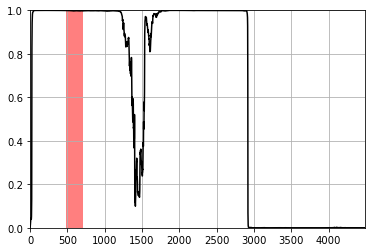

ENST00000380970
recall: 0.692307710647583
iou: 0.692307710647583
biotype: processed_transcript
IP_159955  :  {'start': 8, 'stop': 533, 'MS': 1, 'TE': 2, 'frame': 3}
IP_159944  :  {'start': 15, 'stop': 159, 'MS': 0, 'TE': 0, 'frame': 1}
IP_159947  :  {'start': 486, 'stop': 714, 'MS': 0, 'TE': 0, 'frame': 1}
IP_159951  :  {'start': 718, 'stop': 856, 'MS': 1, 'TE': 1, 'frame': 2}
IP_159946  :  {'start': 807, 'stop': 918, 'MS': 0, 'TE': 0, 'frame': 1}
IP_159952  :  {'start': 943, 'stop': 1123, 'MS': 0, 'TE': 0, 'frame': 2}
IP_159956  :  {'start': 1070, 'stop': 1166, 'MS': 0, 'TE': 0, 'frame': 3}
IP_159943  :  {'start': 1326, 'stop': 1437, 'MS': 0, 'TE': 0, 'frame': 1}
IP_159958  :  {'start': 1349, 'stop': 1451, 'MS': 0, 'TE': 0, 'frame': 3}
IP_159950  :  {'start': 1663, 'stop': 1789, 'MS': 0, 'TE': 0, 'frame': 2}
IP_159945  :  {'start': 1668, 'stop': 1776, 'MS': 0, 'TE': 0, 'frame': 1}
IP_159954  :  {'start': 2911, 'stop': 3022, 'MS': 0, 'TE': 0, 'frame': 2}
IP_159953  :  {'start': 3034, '

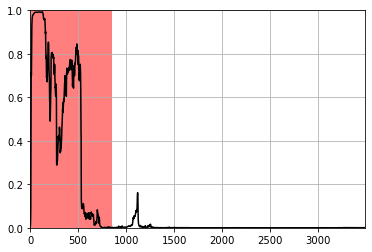

ENST00000643452
recall: 0.8770492076873779
iou: 0.8722826242446899
biotype: processed_transcript
IP_579326  :  {'start': 126, 'stop': 492, 'MS': 1, 'TE': 1, 'frame': 1}
IP_160607  :  {'start': 860, 'stop': 1070, 'MS': 0, 'TE': 0, 'frame': 3}
IP_160610  :  {'start': 903, 'stop': 1167, 'MS': 0, 'TE': 0, 'frame': 1}
IP_160606  :  {'start': 1520, 'stop': 1616, 'MS': 0, 'TE': 1, 'frame': 3}
IP_160600  :  {'start': 2020, 'stop': 2110, 'MS': 0, 'TE': 0, 'frame': 2}
IP_160596  :  {'start': 2465, 'stop': 2555, 'MS': 0, 'TE': 0, 'frame': 3}


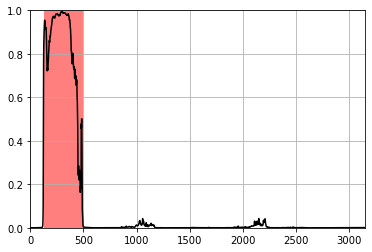

ENST00000451786
recall: 0.7185792326927185
iou: 0.7185792326927185
biotype: processed_transcript
IP_579326  :  {'start': 141, 'stop': 507, 'MS': 1, 'TE': 1, 'frame': 1}
IP_160607  :  {'start': 875, 'stop': 1085, 'MS': 0, 'TE': 0, 'frame': 3}
IP_160610  :  {'start': 918, 'stop': 1182, 'MS': 0, 'TE': 0, 'frame': 1}
IP_160606  :  {'start': 1535, 'stop': 1631, 'MS': 0, 'TE': 1, 'frame': 3}
IP_160609  :  {'start': 1786, 'stop': 1951, 'MS': 0, 'TE': 2, 'frame': 2}
IP_160608  :  {'start': 2076, 'stop': 2172, 'MS': 0, 'TE': 0, 'frame': 1}


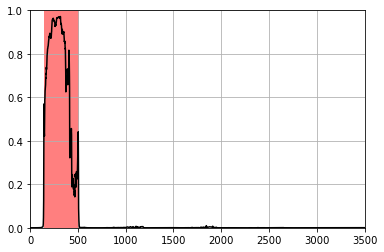

ENST00000465466
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_160651  :  {'start': 4, 'stop': 187, 'MS': 1, 'TE': 2, 'frame': 2}
IP_160650  :  {'start': 852, 'stop': 942, 'MS': 0, 'TE': 0, 'frame': 1}
IP_160652  :  {'start': 1445, 'stop': 1634, 'MS': 0, 'TE': 0, 'frame': 3}


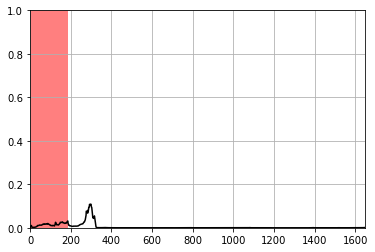

ENST00000642718
recall: 0.0
iou: 0.0
biotype: processed_transcript


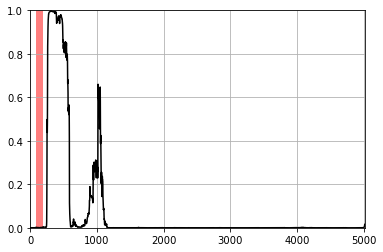

ENST00000333319
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_160812  :  {'start': 877, 'stop': 1144, 'MS': 1, 'TE': 3, 'frame': 2}
IP_160813  :  {'start': 1553, 'stop': 1673, 'MS': 0, 'TE': 3, 'frame': 3}
IP_160810  :  {'start': 2061, 'stop': 2226, 'MS': 0, 'TE': 0, 'frame': 1}


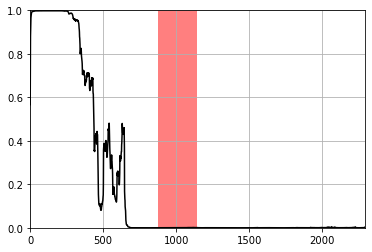

ENST00000517535
recall: 1.0
iou: 0.07254622876644135
biotype: processed_transcript
II_577292  :  {'start': 259, 'stop': 1213, 'MS': 0, 'TE': 0, 'frame': 2}
IP_162177  :  {'start': 377, 'stop': 791, 'MS': 1, 'TE': 0, 'frame': 3}
II_577293  :  {'start': 1589, 'stop': 2747, 'MS': 1, 'TE': 3, 'frame': 3}
IP_162178  :  {'start': 2028, 'stop': 2181, 'MS': 2, 'TE': 6, 'frame': 1}
IP_162179  :  {'start': 2649, 'stop': 2919, 'MS': 0, 'TE': 0, 'frame': 1}
IP_162175  :  {'start': 2756, 'stop': 3005, 'MS': 0, 'TE': 0, 'frame': 3}


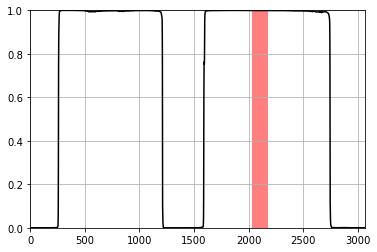

ENST00000519886
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_162871  :  {'start': 272, 'stop': 467, 'MS': 1, 'TE': 13, 'frame': 3}
IP_162862  :  {'start': 477, 'stop': 588, 'MS': 0, 'TE': 0, 'frame': 1}
IP_576916  :  {'start': 624, 'stop': 747, 'MS': 0, 'TE': 0, 'frame': 1}


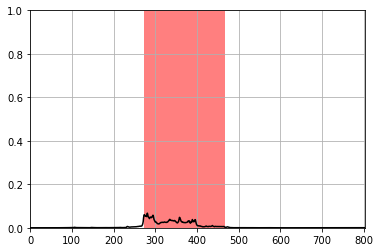

ENST00000518223
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_576914  :  {'start': 93, 'stop': 195, 'MS': 0, 'TE': 0, 'frame': 1}
II_576915  :  {'start': 107, 'stop': 296, 'MS': 0, 'TE': 0, 'frame': 3}
IP_162871  :  {'start': 366, 'stop': 561, 'MS': 1, 'TE': 13, 'frame': 1}


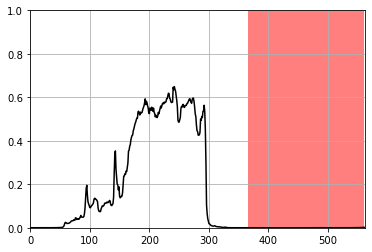

ENST00000522515
recall: 0.027272727340459824
iou: 0.027272727340459824
biotype: processed_transcript
IP_163371  :  {'start': 110, 'stop': 440, 'MS': 1, 'TE': 5, 'frame': 3}
IP_579159  :  {'start': 525, 'stop': 624, 'MS': 0, 'TE': 0, 'frame': 1}
IP_579160  :  {'start': 580, 'stop': 868, 'MS': 0, 'TE': 0, 'frame': 2}


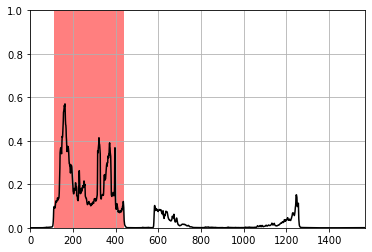

ENST00000643408
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_164062  :  {'start': 7, 'stop': 127, 'MS': 2, 'TE': 1, 'frame': 2}
IP_164064  :  {'start': 178, 'stop': 292, 'MS': 0, 'TE': 0, 'frame': 2}
II_3423529  :  {'start': 630, 'stop': 1098, 'MS': 0, 'TE': 0, 'frame': 1}


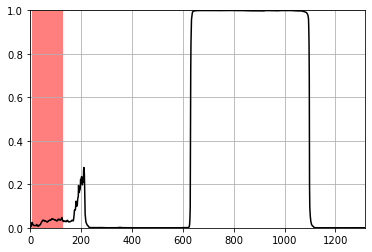

ENST00000528047
recall: 0.37800687551498413
iou: 0.12290503084659576
biotype: processed_transcript
IP_573657  :  {'start': 75, 'stop': 366, 'MS': 1, 'TE': 2, 'frame': 1}
II_573658  :  {'start': 254, 'stop': 956, 'MS': 0, 'TE': 1, 'frame': 3}
IP_168390  :  {'start': 600, 'stop': 702, 'MS': 0, 'TE': 0, 'frame': 1}
II_168392  :  {'start': 1151, 'stop': 1322, 'MS': 0, 'TE': 0, 'frame': 3}
II_573654  :  {'start': 1203, 'stop': 1416, 'MS': 0, 'TE': 1, 'frame': 1}


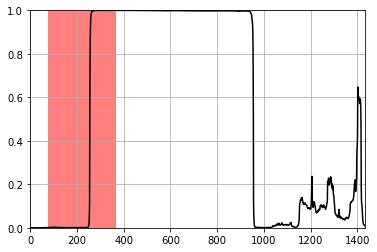

ENST00000528528
recall: 0.9952038526535034
iou: 0.9952038526535034
biotype: processed_transcript
IP_168406  :  {'start': 164, 'stop': 581, 'MS': 1, 'TE': 6, 'frame': 3}
IP_168414  :  {'start': 468, 'stop': 630, 'MS': 0, 'TE': 0, 'frame': 1}
IP_573644  :  {'start': 662, 'stop': 794, 'MS': 0, 'TE': 0, 'frame': 3}
IP_168417  :  {'start': 895, 'stop': 1003, 'MS': 0, 'TE': 0, 'frame': 2}
IP_168404  :  {'start': 911, 'stop': 1166, 'MS': 0, 'TE': 0, 'frame': 3}


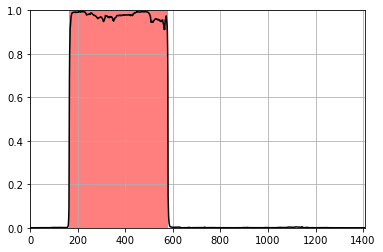

ENST00000486056
recall: 0.2698412835597992
iou: 0.04156479239463806
biotype: processed_transcript
IP_171637  :  {'start': 38, 'stop': 227, 'MS': 1, 'TE': 23, 'frame': 3}
II_567898  :  {'start': 175, 'stop': 559, 'MS': 0, 'TE': 0, 'frame': 2}
II_567897  :  {'start': 489, 'stop': 1362, 'MS': 0, 'TE': 0, 'frame': 1}
IP_171639  :  {'start': 1364, 'stop': 1478, 'MS': 0, 'TE': 0, 'frame': 3}


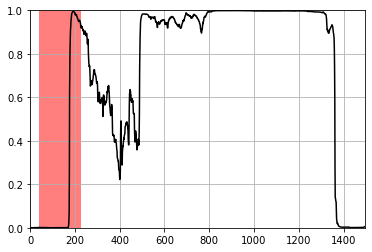

ENST00000376081
recall: 1.0
iou: 0.12774725258350372
biotype: processed_transcript
II_173176  :  {'start': 10, 'stop': 136, 'MS': 0, 'TE': 3, 'frame': 2}
II_567146  :  {'start': 147, 'stop': 861, 'MS': 0, 'TE': 0, 'frame': 1}
IP_173169  :  {'start': 232, 'stop': 325, 'MS': 1, 'TE': 1, 'frame': 2}
IP_173170  :  {'start': 811, 'stop': 910, 'MS': 0, 'TE': 0, 'frame': 2}


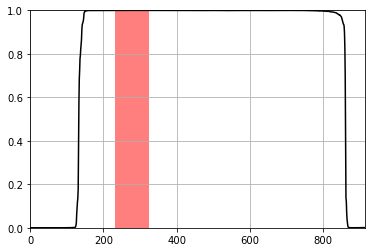

ENST00000489274
recall: 0.029304029420018196
iou: 0.02380952425301075
biotype: processed_transcript
IP_566912  :  {'start': 27, 'stop': 423, 'MS': 0, 'TE': 0, 'frame': 1}
IP_566915  :  {'start': 404, 'stop': 572, 'MS': 0, 'TE': 0, 'frame': 3}
IP_566916  :  {'start': 650, 'stop': 755, 'MS': 0, 'TE': 0, 'frame': 3}
IP_566914  :  {'start': 884, 'stop': 1010, 'MS': 0, 'TE': 0, 'frame': 3}
IP_566913  :  {'start': 948, 'stop': 1218, 'MS': 0, 'TE': 0, 'frame': 1}
IP_173702  :  {'start': 1300, 'stop': 1849, 'MS': 2, 'TE': 0, 'frame': 2}
IP_173701  :  {'start': 1374, 'stop': 1647, 'MS': 1, 'TE': 1, 'frame': 1}
IP_173704  :  {'start': 1826, 'stop': 1934, 'MS': 0, 'TE': 0, 'frame': 3}


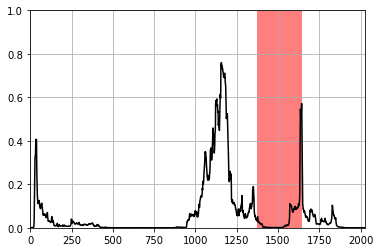

ENST00000423546
recall: 0.10858585685491562
iou: 0.06525038182735443
biotype: processed_transcript
IP_179978  :  {'start': 104, 'stop': 293, 'MS': 0, 'TE': 4, 'frame': 3}
IP_179977  :  {'start': 335, 'stop': 644, 'MS': 0, 'TE': 1, 'frame': 3}
IP_179973  :  {'start': 598, 'stop': 994, 'MS': 2, 'TE': 1, 'frame': 2}
IP_179961  :  {'start': 750, 'stop': 894, 'MS': 0, 'TE': 0, 'frame': 1}
IP_179974  :  {'start': 776, 'stop': 1388, 'MS': 0, 'TE': 0, 'frame': 3}
IP_179971  :  {'start': 1024, 'stop': 1120, 'MS': 0, 'TE': 0, 'frame': 2}
IP_179965  :  {'start': 1527, 'stop': 1668, 'MS': 0, 'TE': 0, 'frame': 1}
IP_179976  :  {'start': 1553, 'stop': 1673, 'MS': 0, 'TE': 0, 'frame': 3}
IP_179962  :  {'start': 1686, 'stop': 1782, 'MS': 0, 'TE': 0, 'frame': 1}
IP_179960  :  {'start': 1872, 'stop': 2076, 'MS': 0, 'TE': 0, 'frame': 1}
IP_179967  :  {'start': 2227, 'stop': 2524, 'MS': 0, 'TE': 0, 'frame': 2}
IP_179980  :  {'start': 2297, 'stop': 2483, 'MS': 1, 'TE': 0, 'frame': 3}
IP_179958  :  {'start'

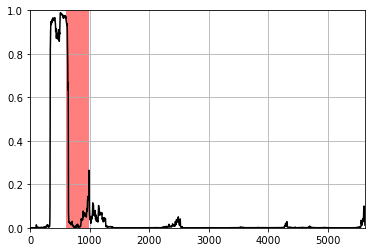

ENST00000439875
recall: 0.11363636702299118
iou: 0.06998445093631744
biotype: processed_transcript
IP_562322  :  {'start': 103, 'stop': 385, 'MS': 0, 'TE': 1, 'frame': 2}
IP_562321  :  {'start': 144, 'stop': 399, 'MS': 0, 'TE': 0, 'frame': 1}
IP_179978  :  {'start': 470, 'stop': 659, 'MS': 0, 'TE': 4, 'frame': 3}
IP_179977  :  {'start': 701, 'stop': 1010, 'MS': 0, 'TE': 1, 'frame': 3}
IP_179973  :  {'start': 964, 'stop': 1360, 'MS': 2, 'TE': 1, 'frame': 2}
IP_179961  :  {'start': 1116, 'stop': 1260, 'MS': 0, 'TE': 0, 'frame': 1}
IP_179974  :  {'start': 1142, 'stop': 1754, 'MS': 0, 'TE': 0, 'frame': 3}
IP_179971  :  {'start': 1390, 'stop': 1486, 'MS': 0, 'TE': 0, 'frame': 2}
IP_179965  :  {'start': 1893, 'stop': 2034, 'MS': 0, 'TE': 0, 'frame': 1}
IP_179976  :  {'start': 1919, 'stop': 2039, 'MS': 0, 'TE': 0, 'frame': 3}
IP_179962  :  {'start': 2052, 'stop': 2148, 'MS': 0, 'TE': 0, 'frame': 1}
IP_179960  :  {'start': 2238, 'stop': 2442, 'MS': 0, 'TE': 0, 'frame': 1}
IP_179967  :  {'start

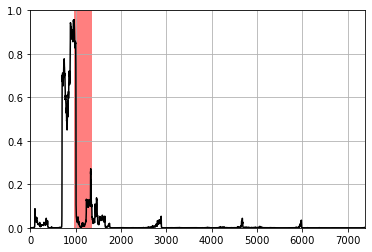

ENST00000434051
recall: 0.10606060922145844
iou: 0.06382978707551956
biotype: processed_transcript
IP_562322  :  {'start': 130, 'stop': 412, 'MS': 0, 'TE': 1, 'frame': 2}
IP_562321  :  {'start': 171, 'stop': 426, 'MS': 0, 'TE': 0, 'frame': 1}
IP_179978  :  {'start': 497, 'stop': 686, 'MS': 0, 'TE': 4, 'frame': 3}
IP_179977  :  {'start': 728, 'stop': 1037, 'MS': 0, 'TE': 1, 'frame': 3}
IP_179973  :  {'start': 991, 'stop': 1387, 'MS': 2, 'TE': 1, 'frame': 2}
IP_179961  :  {'start': 1143, 'stop': 1287, 'MS': 0, 'TE': 0, 'frame': 1}
IP_179974  :  {'start': 1169, 'stop': 1781, 'MS': 0, 'TE': 0, 'frame': 3}
IP_179971  :  {'start': 1417, 'stop': 1513, 'MS': 0, 'TE': 0, 'frame': 2}
IP_179965  :  {'start': 1920, 'stop': 2061, 'MS': 0, 'TE': 0, 'frame': 1}
IP_179976  :  {'start': 1946, 'stop': 2066, 'MS': 0, 'TE': 0, 'frame': 3}
IP_179962  :  {'start': 2079, 'stop': 2175, 'MS': 0, 'TE': 0, 'frame': 1}
IP_179960  :  {'start': 2265, 'stop': 2469, 'MS': 0, 'TE': 0, 'frame': 1}
IP_179967  :  {'start

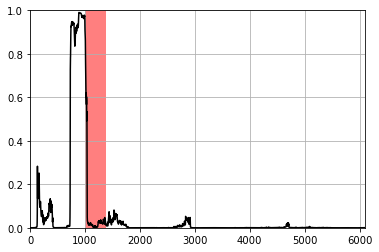

ENST00000453010
recall: 0.1111111119389534
iou: 0.06686930358409882
biotype: processed_transcript
IP_179978  :  {'start': 104, 'stop': 293, 'MS': 0, 'TE': 4, 'frame': 3}
IP_179977  :  {'start': 335, 'stop': 644, 'MS': 0, 'TE': 1, 'frame': 3}
IP_179973  :  {'start': 598, 'stop': 994, 'MS': 2, 'TE': 1, 'frame': 2}
IP_179961  :  {'start': 750, 'stop': 894, 'MS': 0, 'TE': 0, 'frame': 1}
IP_179974  :  {'start': 776, 'stop': 1388, 'MS': 0, 'TE': 0, 'frame': 3}
IP_179971  :  {'start': 1024, 'stop': 1120, 'MS': 0, 'TE': 0, 'frame': 2}
IP_179965  :  {'start': 1527, 'stop': 1668, 'MS': 0, 'TE': 0, 'frame': 1}
IP_179976  :  {'start': 1553, 'stop': 1673, 'MS': 0, 'TE': 0, 'frame': 3}
IP_179962  :  {'start': 1686, 'stop': 1782, 'MS': 0, 'TE': 0, 'frame': 1}
IP_179960  :  {'start': 1872, 'stop': 2076, 'MS': 0, 'TE': 0, 'frame': 1}
IP_179967  :  {'start': 2227, 'stop': 2524, 'MS': 0, 'TE': 0, 'frame': 2}
IP_179980  :  {'start': 2297, 'stop': 2483, 'MS': 1, 'TE': 0, 'frame': 3}
IP_179958  :  {'start':

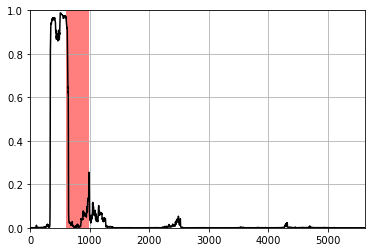

ENST00000436710
recall: 0.38818565011024475
iou: 0.2584269642829895
biotype: processed_transcript
IP_180167  :  {'start': 199, 'stop': 463, 'MS': 0, 'TE': 2, 'frame': 2}
IP_180165  :  {'start': 222, 'stop': 321, 'MS': 0, 'TE': 0, 'frame': 1}
IP_180164  :  {'start': 320, 'stop': 557, 'MS': 1, 'TE': 2, 'frame': 3}


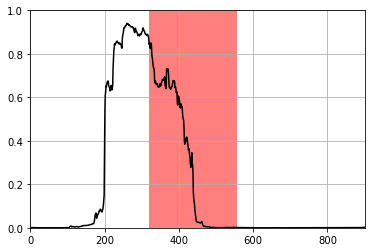

ENST00000528337
recall: 0.9433962106704712
iou: 0.9433962106704712
biotype: processed_transcript
IP_190331  :  {'start': 117, 'stop': 402, 'MS': 0, 'TE': 0, 'frame': 1}
IP_190332  :  {'start': 1102, 'stop': 1420, 'MS': 1, 'TE': 3, 'frame': 2}
IP_190326  :  {'start': 1371, 'stop': 1596, 'MS': 2, 'TE': 0, 'frame': 1}
IP_190328  :  {'start': 1905, 'stop': 2010, 'MS': 0, 'TE': 0, 'frame': 1}
IP_190338  :  {'start': 2318, 'stop': 2456, 'MS': 0, 'TE': 0, 'frame': 3}


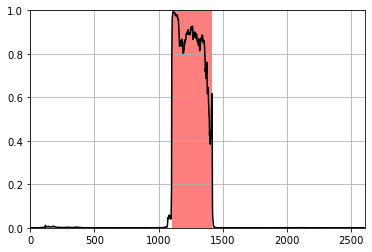

ENST00000527986
recall: 0.9622641801834106
iou: 0.9622641801834106
biotype: processed_transcript
IP_190332  :  {'start': 784, 'stop': 1102, 'MS': 1, 'TE': 3, 'frame': 2}
IP_190326  :  {'start': 1053, 'stop': 1278, 'MS': 2, 'TE': 0, 'frame': 1}
IP_190328  :  {'start': 1587, 'stop': 1692, 'MS': 0, 'TE': 0, 'frame': 1}
IP_190338  :  {'start': 2000, 'stop': 2138, 'MS': 0, 'TE': 0, 'frame': 3}


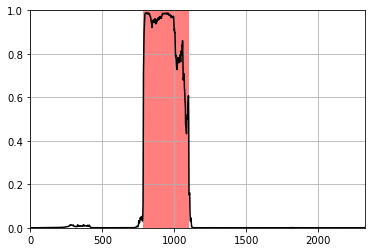

ENST00000607166
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_790389  :  {'start': 77, 'stop': 392, 'MS': 1, 'TE': 1, 'frame': 3}
IP_190378  :  {'start': 612, 'stop': 858, 'MS': 0, 'TE': 1, 'frame': 1}
IP_190381  :  {'start': 1308, 'stop': 1584, 'MS': 0, 'TE': 1, 'frame': 1}
IP_190379  :  {'start': 1608, 'stop': 1713, 'MS': 0, 'TE': 0, 'frame': 1}
IP_190382  :  {'start': 2191, 'stop': 2281, 'MS': 0, 'TE': 0, 'frame': 2}


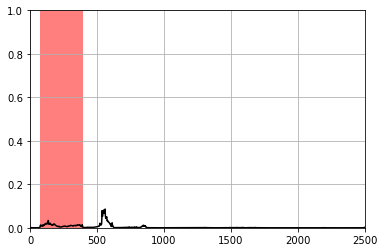

ENST00000429940
recall: 0.790123462677002
iou: 0.5524044632911682
biotype: processed_transcript
IP_190463  :  {'start': 30, 'stop': 597, 'MS': 2, 'TE': 11, 'frame': 1}
IP_190462  :  {'start': 359, 'stop': 686, 'MS': 0, 'TE': 0, 'frame': 3}
IP_190460  :  {'start': 719, 'stop': 920, 'MS': 0, 'TE': 4, 'frame': 3}
IP_190467  :  {'start': 973, 'stop': 1066, 'MS': 0, 'TE': 0, 'frame': 2}
IP_190465  :  {'start': 1213, 'stop': 1309, 'MS': 0, 'TE': 0, 'frame': 2}
IP_190469  :  {'start': 1345, 'stop': 1477, 'MS': 0, 'TE': 0, 'frame': 2}
IP_190468  :  {'start': 1522, 'stop': 1753, 'MS': 0, 'TE': 0, 'frame': 2}
IP_190464  :  {'start': 1896, 'stop': 2025, 'MS': 0, 'TE': 0, 'frame': 1}
IP_190461  :  {'start': 2021, 'stop': 2126, 'MS': 0, 'TE': 0, 'frame': 3}


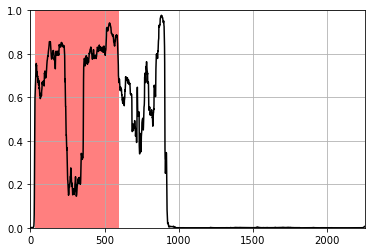

ENST00000424751
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_790951  :  {'start': 11, 'stop': 257, 'MS': 2, 'TE': 1, 'frame': 3}
IP_190462  :  {'start': 358, 'stop': 685, 'MS': 0, 'TE': 0, 'frame': 2}
IP_190460  :  {'start': 718, 'stop': 919, 'MS': 0, 'TE': 4, 'frame': 2}
IP_190467  :  {'start': 972, 'stop': 1065, 'MS': 0, 'TE': 0, 'frame': 1}
IP_190465  :  {'start': 1212, 'stop': 1308, 'MS': 0, 'TE': 0, 'frame': 1}
IP_190469  :  {'start': 1344, 'stop': 1476, 'MS': 0, 'TE': 0, 'frame': 1}
IP_190468  :  {'start': 1521, 'stop': 1752, 'MS': 0, 'TE': 0, 'frame': 1}
IP_190464  :  {'start': 1895, 'stop': 2024, 'MS': 0, 'TE': 0, 'frame': 3}
IP_190461  :  {'start': 2020, 'stop': 2125, 'MS': 0, 'TE': 0, 'frame': 2}


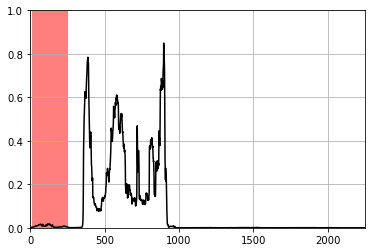

ENST00000450995
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_190641  :  {'start': 27, 'stop': 264, 'MS': 0, 'TE': 1, 'frame': 1}
IP_190644  :  {'start': 329, 'stop': 419, 'MS': 0, 'TE': 0, 'frame': 3}
IP_190642  :  {'start': 768, 'stop': 954, 'MS': 0, 'TE': 1, 'frame': 1}
IP_190640  :  {'start': 1023, 'stop': 1275, 'MS': 0, 'TE': 0, 'frame': 1}
IP_190643  :  {'start': 1378, 'stop': 1519, 'MS': 0, 'TE': 0, 'frame': 2}
IP_190645  :  {'start': 1736, 'stop': 1883, 'MS': 1, 'TE': 1, 'frame': 3}


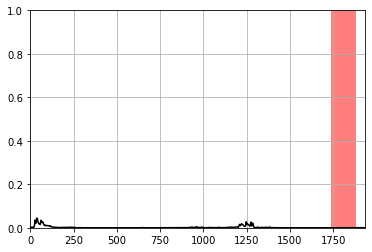

ENST00000447119
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_190652  :  {'start': 43, 'stop': 166, 'MS': 0, 'TE': 0, 'frame': 2}
IP_190653  :  {'start': 395, 'stop': 524, 'MS': 1, 'TE': 1, 'frame': 3}


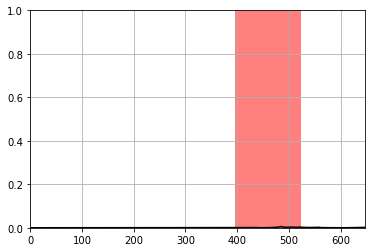

ENST00000533657
recall: 1.0
iou: 0.412563681602478
biotype: processed_transcript
IP_786689  :  {'start': 19, 'stop': 280, 'MS': 0, 'TE': 0, 'frame': 2}
II_786688  :  {'start': 405, 'stop': 990, 'MS': 0, 'TE': 0, 'frame': 1}
IP_194518  :  {'start': 727, 'stop': 970, 'MS': 1, 'TE': 1, 'frame': 2}
IP_194517  :  {'start': 1006, 'stop': 1228, 'MS': 0, 'TE': 0, 'frame': 2}
IP_194522  :  {'start': 1163, 'stop': 1349, 'MS': 0, 'TE': 0, 'frame': 3}
IP_194515  :  {'start': 1378, 'stop': 1477, 'MS': 0, 'TE': 0, 'frame': 2}
IP_194512  :  {'start': 1932, 'stop': 2022, 'MS': 0, 'TE': 0, 'frame': 1}
IP_194521  :  {'start': 1982, 'stop': 2081, 'MS': 0, 'TE': 0, 'frame': 3}
IP_194519  :  {'start': 2206, 'stop': 2314, 'MS': 0, 'TE': 0, 'frame': 2}


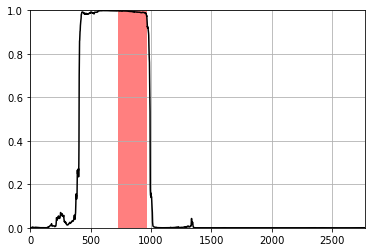

ENST00000534808
recall: 0.47736626863479614
iou: 0.41428571939468384
biotype: processed_transcript
IP_195391  :  {'start': 229, 'stop': 472, 'MS': 1, 'TE': 2, 'frame': 2}


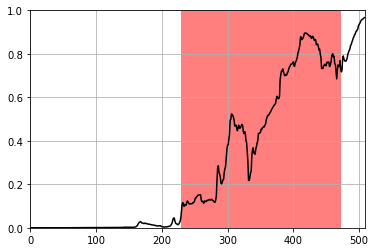

ENST00000526603
recall: 1.0
iou: 0.8073089718818665
biotype: processed_transcript
IP_195391  :  {'start': 246, 'stop': 489, 'MS': 1, 'TE': 2, 'frame': 1}


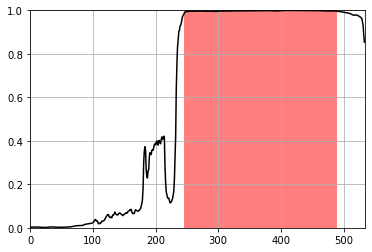

ENST00000535152
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_196478  :  {'start': 153, 'stop': 429, 'MS': 1, 'TE': 2, 'frame': 1}


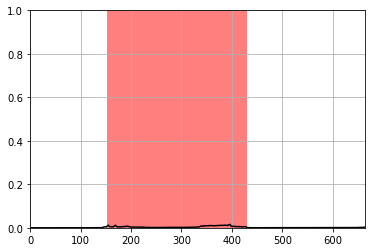

ENST00000536687
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_196478  :  {'start': 176, 'stop': 452, 'MS': 1, 'TE': 2, 'frame': 3}
II_785733  :  {'start': 554, 'stop': 746, 'MS': 0, 'TE': 0, 'frame': 3}


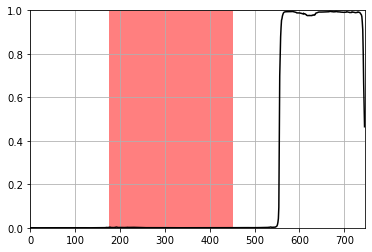

ENST00000533947
recall: 1.0
iou: 0.7257019281387329
biotype: processed_transcript
II_780380  :  {'start': 9, 'stop': 474, 'MS': 0, 'TE': 0, 'frame': 1}
IP_198511  :  {'start': 127, 'stop': 463, 'MS': 1, 'TE': 1, 'frame': 2}
IP_198521  :  {'start': 481, 'stop': 631, 'MS': 0, 'TE': 0, 'frame': 2}


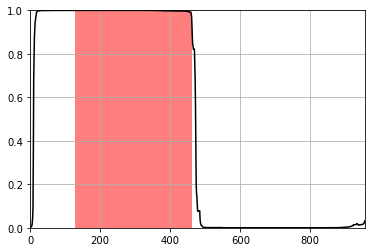

ENST00000439504
recall: 1.0
iou: 0.12629534304141998
biotype: processed_transcript
IP_199153  :  {'start': 505, 'stop': 703, 'MS': 0, 'TE': 0, 'frame': 2}
IP_779804  :  {'start': 1204, 'stop': 1420, 'MS': 0, 'TE': 0, 'frame': 2}
IP_779806  :  {'start': 1495, 'stop': 1726, 'MS': 0, 'TE': 0, 'frame': 2}
IP_779809  :  {'start': 1500, 'stop': 1590, 'MS': 0, 'TE': 0, 'frame': 1}
IP_779811  :  {'start': 1722, 'stop': 2016, 'MS': 0, 'TE': 0, 'frame': 1}
IP_199167  :  {'start': 2109, 'stop': 2310, 'MS': 0, 'TE': 0, 'frame': 1}
IP_199168  :  {'start': 2164, 'stop': 2380, 'MS': 0, 'TE': 0, 'frame': 2}
IP_199165  :  {'start': 2483, 'stop': 2576, 'MS': 0, 'TE': 0, 'frame': 3}
II_779808  :  {'start': 2544, 'stop': 2814, 'MS': 0, 'TE': 0, 'frame': 1}
IP_199155  :  {'start': 2826, 'stop': 2925, 'MS': 0, 'TE': 0, 'frame': 1}
IP_199157  :  {'start': 3117, 'stop': 3261, 'MS': 1, 'TE': 0, 'frame': 1}
IP_199152  :  {'start': 3363, 'stop': 3558, 'MS': 1, 'TE': 1, 'frame': 1}
IP_199156  :  {'start': 3744, '

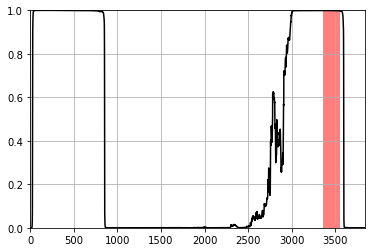

ENST00000536995
recall: 0.3692307770252228
iou: 0.10958904027938843
biotype: processed_transcript
IP_199153  :  {'start': 242, 'stop': 440, 'MS': 0, 'TE': 0, 'frame': 3}
IP_779805  :  {'start': 486, 'stop': 579, 'MS': 0, 'TE': 0, 'frame': 1}
IP_779803  :  {'start': 642, 'stop': 759, 'MS': 0, 'TE': 0, 'frame': 1}
II_779802  :  {'start': 803, 'stop': 896, 'MS': 0, 'TE': 0, 'frame': 3}
IP_779804  :  {'start': 1245, 'stop': 1461, 'MS': 0, 'TE': 0, 'frame': 1}
IP_779806  :  {'start': 1536, 'stop': 1767, 'MS': 0, 'TE': 0, 'frame': 1}
IP_779809  :  {'start': 1541, 'stop': 1631, 'MS': 0, 'TE': 0, 'frame': 3}
IP_779811  :  {'start': 1763, 'stop': 2057, 'MS': 0, 'TE': 0, 'frame': 3}
IP_199167  :  {'start': 2150, 'stop': 2351, 'MS': 0, 'TE': 0, 'frame': 3}
IP_199168  :  {'start': 2205, 'stop': 2421, 'MS': 0, 'TE': 0, 'frame': 1}
IP_199165  :  {'start': 2524, 'stop': 2617, 'MS': 0, 'TE': 0, 'frame': 2}
II_779808  :  {'start': 2585, 'stop': 2855, 'MS': 0, 'TE': 0, 'frame': 3}
IP_199155  :  {'start'

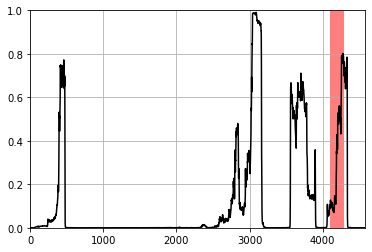

ENST00000530535
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_199958  :  {'start': 82, 'stop': 256, 'MS': 1, 'TE': 1, 'frame': 2}
II_783354  :  {'start': 447, 'stop': 1800, 'MS': 0, 'TE': 0, 'frame': 1}
IP_199955  :  {'start': 970, 'stop': 1066, 'MS': 0, 'TE': 0, 'frame': 2}
IP_199956  :  {'start': 1216, 'stop': 1594, 'MS': 0, 'TE': 0, 'frame': 2}
IP_199959  :  {'start': 1711, 'stop': 1822, 'MS': 0, 'TE': 0, 'frame': 2}
IP_199957  :  {'start': 1954, 'stop': 2083, 'MS': 0, 'TE': 0, 'frame': 2}


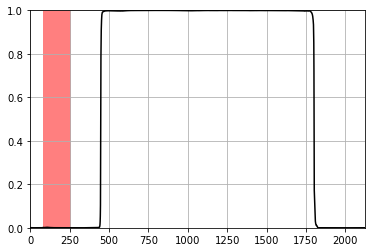

ENST00000529077
recall: 0.6904761791229248
iou: 0.07723035663366318
biotype: processed_transcript
IP_781372  :  {'start': 48, 'stop': 225, 'MS': 1, 'TE': 0, 'frame': 1}
IP_781371  :  {'start': 702, 'stop': 831, 'MS': 0, 'TE': 0, 'frame': 1}
II_781378  :  {'start': 775, 'stop': 1063, 'MS': 0, 'TE': 4, 'frame': 2}
IP_204050  :  {'start': 902, 'stop': 992, 'MS': 0, 'TE': 0, 'frame': 3}
IP_781382  :  {'start': 1130, 'stop': 1229, 'MS': 0, 'TE': 0, 'frame': 3}
IP_781380  :  {'start': 1589, 'stop': 1679, 'MS': 0, 'TE': 0, 'frame': 3}
IP_781369  :  {'start': 1593, 'stop': 2097, 'MS': 0, 'TE': 0, 'frame': 1}
IP_781376  :  {'start': 1981, 'stop': 2125, 'MS': 0, 'TE': 0, 'frame': 2}
IP_781373  :  {'start': 2199, 'stop': 2337, 'MS': 0, 'TE': 0, 'frame': 1}
IP_781381  :  {'start': 2633, 'stop': 3011, 'MS': 0, 'TE': 0, 'frame': 3}
II_781374  :  {'start': 2931, 'stop': 3753, 'MS': 0, 'TE': 0, 'frame': 1}
IP_204052  :  {'start': 3421, 'stop': 3526, 'MS': 1, 'TE': 0, 'frame': 2}
IP_781377  :  {'start'

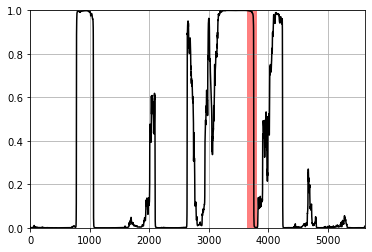

ENST00000619449
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_204856  :  {'start': 559, 'stop': 679, 'MS': 0, 'TE': 15, 'frame': 2}
IP_204848  :  {'start': 861, 'stop': 1020, 'MS': 1, 'TE': 9, 'frame': 1}
IP_204842  :  {'start': 1907, 'stop': 2030, 'MS': 0, 'TE': 0, 'frame': 3}
IP_204850  :  {'start': 1987, 'stop': 2131, 'MS': 0, 'TE': 0, 'frame': 2}
IP_204852  :  {'start': 2305, 'stop': 2404, 'MS': 0, 'TE': 0, 'frame': 2}
IP_204854  :  {'start': 2515, 'stop': 2611, 'MS': 0, 'TE': 0, 'frame': 2}
IP_204839  :  {'start': 2564, 'stop': 2732, 'MS': 0, 'TE': 0, 'frame': 3}
IP_204849  :  {'start': 3610, 'stop': 3700, 'MS': 0, 'TE': 0, 'frame': 2}
IP_204857  :  {'start': 3838, 'stop': 3931, 'MS': 0, 'TE': 0, 'frame': 2}
IP_204843  :  {'start': 3956, 'stop': 4097, 'MS': 0, 'TE': 0, 'frame': 3}
IP_204840  :  {'start': 4310, 'stop': 4451, 'MS': 1, 'TE': 0, 'frame': 3}
IP_204855  :  {'start': 4888, 'stop': 5017, 'MS': 0, 'TE': 0, 'frame': 2}


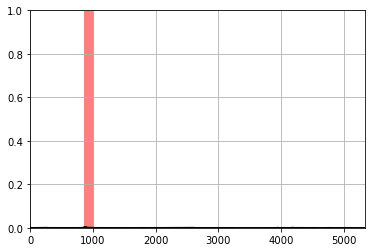

ENST00000534336
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_204844  :  {'start': 495, 'stop': 708, 'MS': 0, 'TE': 0, 'frame': 1}
IP_204853  :  {'start': 872, 'stop': 1052, 'MS': 0, 'TE': 0, 'frame': 3}
IP_204856  :  {'start': 1535, 'stop': 1655, 'MS': 0, 'TE': 15, 'frame': 3}
IP_204848  :  {'start': 1837, 'stop': 1996, 'MS': 1, 'TE': 9, 'frame': 2}
IP_204842  :  {'start': 2883, 'stop': 3006, 'MS': 0, 'TE': 0, 'frame': 1}
IP_204850  :  {'start': 2963, 'stop': 3107, 'MS': 0, 'TE': 0, 'frame': 3}
IP_204852  :  {'start': 3281, 'stop': 3380, 'MS': 0, 'TE': 0, 'frame': 3}
IP_204854  :  {'start': 3491, 'stop': 3587, 'MS': 0, 'TE': 0, 'frame': 3}
IP_204839  :  {'start': 3540, 'stop': 3708, 'MS': 0, 'TE': 0, 'frame': 1}
IP_204849  :  {'start': 4586, 'stop': 4676, 'MS': 0, 'TE': 0, 'frame': 3}
IP_204857  :  {'start': 4814, 'stop': 4907, 'MS': 0, 'TE': 0, 'frame': 3}
IP_204843  :  {'start': 4932, 'stop': 5073, 'MS': 0, 'TE': 0, 'frame': 1}
IP_204840  :  {'start': 5286, 'stop': 5427, 'MS

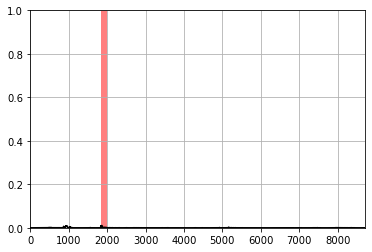

ENST00000450804
recall: 0.9100528955459595
iou: 0.8056206107139587
biotype: processed_transcript
IP_204979  :  {'start': 77, 'stop': 455, 'MS': 1, 'TE': 3, 'frame': 3}
IP_204984  :  {'start': 186, 'stop': 354, 'MS': 0, 'TE': 0, 'frame': 1}
IP_204975  :  {'start': 337, 'stop': 538, 'MS': 0, 'TE': 0, 'frame': 2}
IP_204981  :  {'start': 602, 'stop': 710, 'MS': 0, 'TE': 0, 'frame': 3}
IP_204973  :  {'start': 706, 'stop': 904, 'MS': 0, 'TE': 0, 'frame': 2}
IP_204980  :  {'start': 914, 'stop': 1253, 'MS': 0, 'TE': 0, 'frame': 3}
IP_204982  :  {'start': 1047, 'stop': 1197, 'MS': 0, 'TE': 0, 'frame': 1}
IP_204976  :  {'start': 1276, 'stop': 1387, 'MS': 0, 'TE': 0, 'frame': 2}
IP_204978  :  {'start': 1693, 'stop': 1786, 'MS': 0, 'TE': 0, 'frame': 2}
IP_204983  :  {'start': 1851, 'stop': 1944, 'MS': 1, 'TE': 0, 'frame': 1}
IP_204974  :  {'start': 2053, 'stop': 2149, 'MS': 0, 'TE': 0, 'frame': 2}


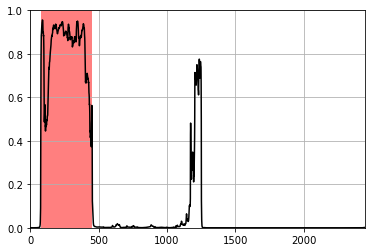

ENST00000396830
recall: 0.5655430555343628
iou: 0.21148459613323212
biotype: processed_transcript
IP_772189  :  {'start': 181, 'stop': 448, 'MS': 3, 'TE': 1, 'frame': 2}
IP_206194  :  {'start': 1180, 'stop': 1324, 'MS': 0, 'TE': 0, 'frame': 2}
IP_206193  :  {'start': 1233, 'stop': 1518, 'MS': 1, 'TE': 0, 'frame': 1}
IP_206197  :  {'start': 1325, 'stop': 1529, 'MS': 0, 'TE': 0, 'frame': 3}
IP_206195  :  {'start': 1435, 'stop': 1555, 'MS': 0, 'TE': 0, 'frame': 2}


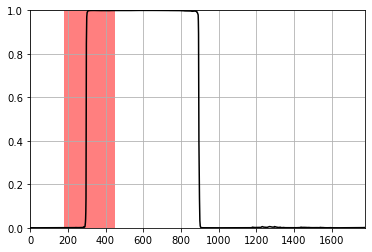

ENST00000472558
recall: 0.5655430555343628
iou: 0.21148459613323212
biotype: processed_transcript
IP_772189  :  {'start': 333, 'stop': 600, 'MS': 3, 'TE': 1, 'frame': 1}
IP_206194  :  {'start': 1329, 'stop': 1473, 'MS': 0, 'TE': 0, 'frame': 1}
IP_206193  :  {'start': 1382, 'stop': 1667, 'MS': 1, 'TE': 0, 'frame': 3}
IP_206197  :  {'start': 1474, 'stop': 1678, 'MS': 0, 'TE': 0, 'frame': 2}
IP_206195  :  {'start': 1584, 'stop': 1704, 'MS': 0, 'TE': 0, 'frame': 1}
IP_206198  :  {'start': 1768, 'stop': 1972, 'MS': 0, 'TE': 0, 'frame': 2}
IP_772196  :  {'start': 1959, 'stop': 2193, 'MS': 0, 'TE': 0, 'frame': 1}
IP_772194  :  {'start': 2183, 'stop': 2468, 'MS': 0, 'TE': 0, 'frame': 3}


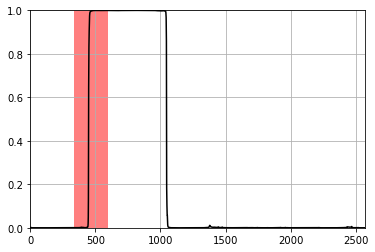

ENST00000539192
recall: 0.1461988240480423
iou: 0.1461988240480423
biotype: processed_transcript
IP_771791  :  {'start': 22, 'stop': 208, 'MS': 0, 'TE': 0, 'frame': 2}
IP_206620  :  {'start': 295, 'stop': 466, 'MS': 1, 'TE': 2, 'frame': 2}
II_771790  :  {'start': 339, 'stop': 474, 'MS': 0, 'TE': 2, 'frame': 1}


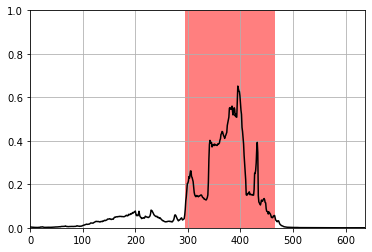

ENST00000426898
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_208861  :  {'start': 102, 'stop': 219, 'MS': 1, 'TE': 7, 'frame': 1}
II_770291  :  {'start': 354, 'stop': 1428, 'MS': 0, 'TE': 0, 'frame': 1}
IP_208857  :  {'start': 478, 'stop': 586, 'MS': 0, 'TE': 0, 'frame': 2}
IP_208858  :  {'start': 997, 'stop': 1201, 'MS': 1, 'TE': 0, 'frame': 2}
IP_208863  :  {'start': 1067, 'stop': 1232, 'MS': 0, 'TE': 0, 'frame': 3}
IP_770292  :  {'start': 1575, 'stop': 1704, 'MS': 0, 'TE': 0, 'frame': 1}


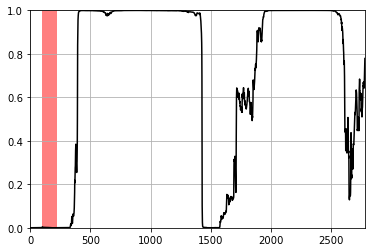

ENST00000546964
recall: 1.0
iou: 0.05708245187997818
biotype: processed_transcript
II_770086  :  {'start': 72, 'stop': 1041, 'MS': 0, 'TE': 0, 'frame': 1}
IP_209128  :  {'start': 163, 'stop': 298, 'MS': 1, 'TE': 1, 'frame': 2}
IP_770087  :  {'start': 778, 'stop': 925, 'MS': 0, 'TE': 0, 'frame': 2}
IP_770088  :  {'start': 1189, 'stop': 1288, 'MS': 1, 'TE': 0, 'frame': 2}
II_770085  :  {'start': 1269, 'stop': 2667, 'MS': 0, 'TE': 1, 'frame': 1}
IP_209124  :  {'start': 1687, 'stop': 1780, 'MS': 2, 'TE': 0, 'frame': 2}
IP_209129  :  {'start': 1870, 'stop': 2173, 'MS': 0, 'TE': 0, 'frame': 2}
IP_209126  :  {'start': 2206, 'stop': 2377, 'MS': 0, 'TE': 0, 'frame': 2}
IP_209123  :  {'start': 2413, 'stop': 2503, 'MS': 0, 'TE': 0, 'frame': 2}
IP_209125  :  {'start': 2614, 'stop': 2722, 'MS': 0, 'TE': 0, 'frame': 2}


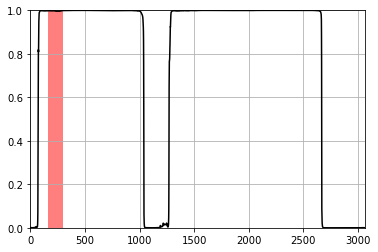

ENST00000535236
recall: 0.0
iou: 0.0
biotype: processed_transcript
II_768096  :  {'start': 130, 'stop': 652, 'MS': 0, 'TE': 0, 'frame': 2}
IP_768099  :  {'start': 248, 'stop': 398, 'MS': 0, 'TE': 0, 'frame': 3}
IP_768100  :  {'start': 707, 'stop': 818, 'MS': 0, 'TE': 0, 'frame': 3}
IP_768095  :  {'start': 712, 'stop': 856, 'MS': 0, 'TE': 0, 'frame': 2}
IP_768092  :  {'start': 1611, 'stop': 1728, 'MS': 0, 'TE': 0, 'frame': 1}
IP_768097  :  {'start': 2350, 'stop': 2482, 'MS': 0, 'TE': 0, 'frame': 2}
IP_768093  :  {'start': 2640, 'stop': 2775, 'MS': 0, 'TE': 0, 'frame': 1}
IP_768094  :  {'start': 2973, 'stop': 3072, 'MS': 1, 'TE': 1, 'frame': 1}
IP_768098  :  {'start': 3623, 'stop': 3743, 'MS': 0, 'TE': 0, 'frame': 3}
IP_216959  :  {'start': 3761, 'stop': 3878, 'MS': 0, 'TE': 0, 'frame': 3}
IP_216960  :  {'start': 4778, 'stop': 5051, 'MS': 1, 'TE': 0, 'frame': 3}
IP_216958  :  {'start': 5135, 'stop': 5231, 'MS': 0, 'TE': 0, 'frame': 3}


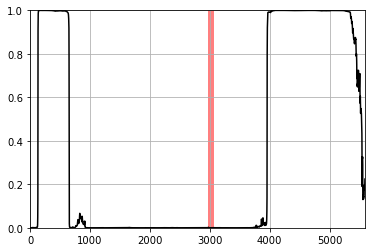

ENST00000541775
recall: 0.8912529349327087
iou: 0.8912529349327087
biotype: processed_transcript
IP_217422  :  {'start': 31, 'stop': 454, 'MS': 1, 'TE': 1, 'frame': 2}
IP_217428  :  {'start': 83, 'stop': 191, 'MS': 0, 'TE': 0, 'frame': 3}
IP_217417  :  {'start': 411, 'stop': 507, 'MS': 0, 'TE': 0, 'frame': 1}
IP_217424  :  {'start': 571, 'stop': 703, 'MS': 0, 'TE': 1, 'frame': 2}
IP_217420  :  {'start': 871, 'stop': 1006, 'MS': 0, 'TE': 0, 'frame': 2}
IP_217418  :  {'start': 1033, 'stop': 1177, 'MS': 1, 'TE': 0, 'frame': 2}
IP_217434  :  {'start': 1943, 'stop': 2123, 'MS': 0, 'TE': 0, 'frame': 3}
IP_217415  :  {'start': 1974, 'stop': 2076, 'MS': 0, 'TE': 0, 'frame': 1}
IP_217433  :  {'start': 2192, 'stop': 2357, 'MS': 0, 'TE': 0, 'frame': 3}
IP_217423  :  {'start': 2704, 'stop': 2851, 'MS': 0, 'TE': 0, 'frame': 2}
IP_217432  :  {'start': 2882, 'stop': 2975, 'MS': 0, 'TE': 0, 'frame': 3}
IP_217419  :  {'start': 2890, 'stop': 3061, 'MS': 0, 'TE': 0, 'frame': 2}
IP_217413  :  {'start': 30

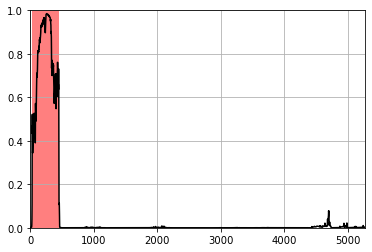

ENST00000623122
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_218064  :  {'start': 139, 'stop': 340, 'MS': 1, 'TE': 0, 'frame': 2}
IP_218061  :  {'start': 333, 'stop': 645, 'MS': 1, 'TE': 1, 'frame': 1}
IP_218058  :  {'start': 660, 'stop': 774, 'MS': 0, 'TE': 0, 'frame': 1}
IP_218065  :  {'start': 878, 'stop': 1001, 'MS': 0, 'TE': 0, 'frame': 3}
IP_218063  :  {'start': 1240, 'stop': 1381, 'MS': 0, 'TE': 0, 'frame': 2}
IP_218059  :  {'start': 1374, 'stop': 1530, 'MS': 0, 'TE': 0, 'frame': 1}
IP_218062  :  {'start': 1732, 'stop': 1843, 'MS': 0, 'TE': 0, 'frame': 2}
IP_218060  :  {'start': 2265, 'stop': 2433, 'MS': 0, 'TE': 0, 'frame': 1}


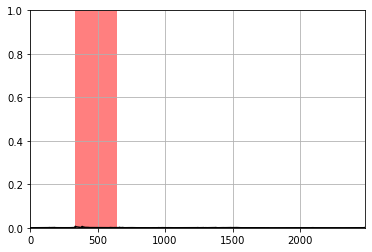

ENST00000556896
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_754793  :  {'start': 286, 'stop': 418, 'MS': 0, 'TE': 0, 'frame': 2}
IP_223677  :  {'start': 350, 'stop': 449, 'MS': 1, 'TE': 1, 'frame': 3}


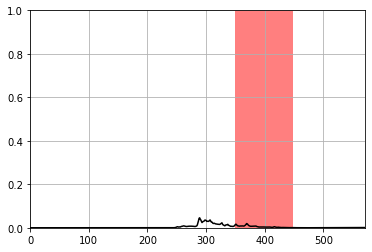

ENST00000557513
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_223677  :  {'start': 293, 'stop': 392, 'MS': 1, 'TE': 1, 'frame': 3}
IP_223679  :  {'start': 433, 'stop': 535, 'MS': 0, 'TE': 3, 'frame': 2}


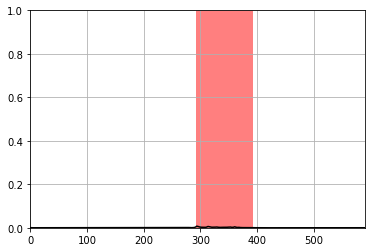

ENST00000554536
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_223678  :  {'start': 112, 'stop': 241, 'MS': 0, 'TE': 0, 'frame': 2}
IP_223677  :  {'start': 173, 'stop': 272, 'MS': 1, 'TE': 1, 'frame': 3}
IP_223679  :  {'start': 313, 'stop': 415, 'MS': 0, 'TE': 3, 'frame': 2}


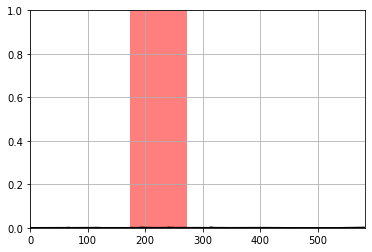

ENST00000553316
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_223678  :  {'start': 272, 'stop': 401, 'MS': 0, 'TE': 0, 'frame': 3}
IP_223677  :  {'start': 333, 'stop': 432, 'MS': 1, 'TE': 1, 'frame': 1}


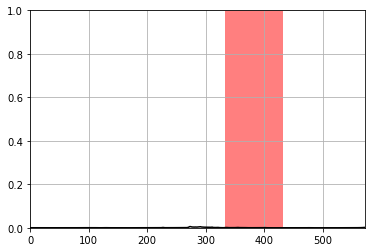

ENST00000519477
recall: 0.08496732264757156
iou: 0.032745592296123505
biotype: processed_transcript
IP_752683  :  {'start': 160, 'stop': 313, 'MS': 1, 'TE': 4, 'frame': 2}
II_229280  :  {'start': 309, 'stop': 501, 'MS': 0, 'TE': 0, 'frame': 1}


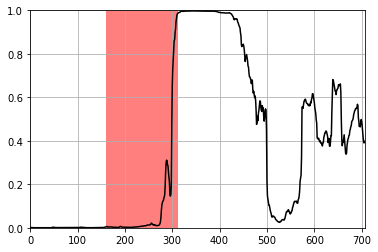

ENST00000520252
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_752685  :  {'start': 6, 'stop': 231, 'MS': 0, 'TE': 0, 'frame': 1}
IP_752683  :  {'start': 231, 'stop': 384, 'MS': 1, 'TE': 4, 'frame': 1}
II_229280  :  {'start': 380, 'stop': 572, 'MS': 0, 'TE': 0, 'frame': 3}


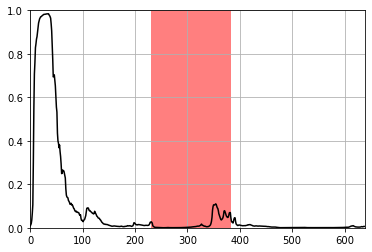

ENST00000556617
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_230105  :  {'start': 57, 'stop': 186, 'MS': 1, 'TE': 1, 'frame': 1}
IP_230106  :  {'start': 259, 'stop': 391, 'MS': 0, 'TE': 0, 'frame': 2}


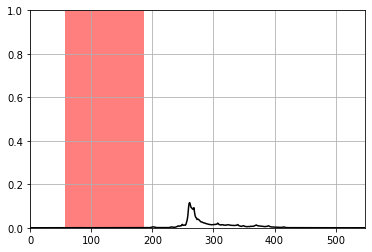

ENST00000554822
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_230565  :  {'start': 83, 'stop': 332, 'MS': 0, 'TE': 0, 'frame': 3}
IP_230562  :  {'start': 103, 'stop': 238, 'MS': 1, 'TE': 2, 'frame': 2}
IP_230561  :  {'start': 234, 'stop': 336, 'MS': 0, 'TE': 0, 'frame': 1}
IP_745340  :  {'start': 359, 'stop': 458, 'MS': 0, 'TE': 0, 'frame': 3}
IP_745339  :  {'start': 451, 'stop': 661, 'MS': 0, 'TE': 0, 'frame': 2}


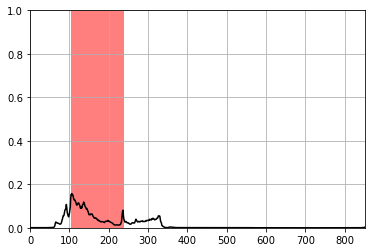

ENST00000502187
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_230565  :  {'start': 147, 'stop': 396, 'MS': 0, 'TE': 0, 'frame': 1}
IP_230562  :  {'start': 167, 'stop': 302, 'MS': 1, 'TE': 2, 'frame': 3}
IP_230561  :  {'start': 298, 'stop': 400, 'MS': 0, 'TE': 0, 'frame': 2}
IP_745340  :  {'start': 423, 'stop': 522, 'MS': 0, 'TE': 0, 'frame': 1}
IP_745347  :  {'start': 515, 'stop': 650, 'MS': 0, 'TE': 0, 'frame': 3}
IP_745341  :  {'start': 931, 'stop': 1033, 'MS': 0, 'TE': 0, 'frame': 2}
IP_745344  :  {'start': 1181, 'stop': 1358, 'MS': 0, 'TE': 0, 'frame': 3}
IP_745342  :  {'start': 1192, 'stop': 1294, 'MS': 0, 'TE': 0, 'frame': 2}
IP_745345  :  {'start': 1451, 'stop': 1715, 'MS': 1, 'TE': 0, 'frame': 3}
IP_745343  :  {'start': 1477, 'stop': 1687, 'MS': 0, 'TE': 0, 'frame': 2}
IP_745346  :  {'start': 1949, 'stop': 2063, 'MS': 0, 'TE': 0, 'frame': 3}


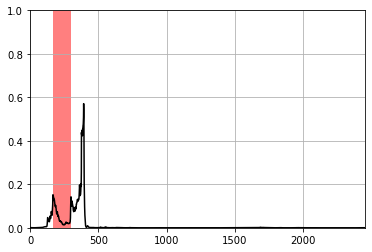

ENST00000499006
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_230565  :  {'start': 161, 'stop': 410, 'MS': 0, 'TE': 0, 'frame': 3}
IP_230562  :  {'start': 181, 'stop': 316, 'MS': 1, 'TE': 2, 'frame': 2}
IP_230561  :  {'start': 312, 'stop': 414, 'MS': 0, 'TE': 0, 'frame': 1}
IP_230564  :  {'start': 532, 'stop': 667, 'MS': 0, 'TE': 0, 'frame': 2}
IP_230560  :  {'start': 660, 'stop': 765, 'MS': 0, 'TE': 0, 'frame': 1}
IP_230563  :  {'start': 835, 'stop': 1036, 'MS': 0, 'TE': 0, 'frame': 2}


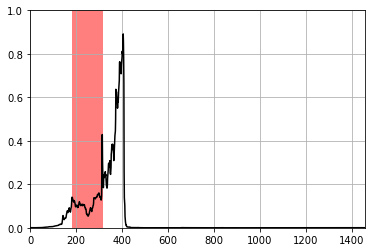

ENST00000556138
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_230565  :  {'start': 102, 'stop': 351, 'MS': 0, 'TE': 0, 'frame': 1}
IP_230562  :  {'start': 122, 'stop': 257, 'MS': 1, 'TE': 2, 'frame': 3}
IP_230561  :  {'start': 253, 'stop': 355, 'MS': 0, 'TE': 0, 'frame': 2}


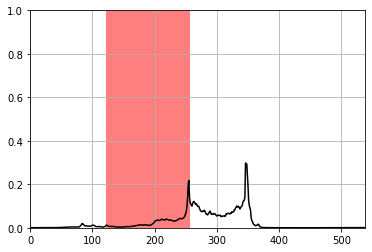

ENST00000512901
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_230565  :  {'start': 145, 'stop': 394, 'MS': 0, 'TE': 0, 'frame': 2}
IP_230562  :  {'start': 165, 'stop': 300, 'MS': 1, 'TE': 2, 'frame': 1}
IP_230561  :  {'start': 296, 'stop': 398, 'MS': 0, 'TE': 0, 'frame': 3}
IP_745341  :  {'start': 774, 'stop': 876, 'MS': 0, 'TE': 0, 'frame': 1}
IP_745344  :  {'start': 1024, 'stop': 1201, 'MS': 0, 'TE': 0, 'frame': 2}
IP_745342  :  {'start': 1035, 'stop': 1137, 'MS': 0, 'TE': 0, 'frame': 1}
IP_745345  :  {'start': 1294, 'stop': 1558, 'MS': 1, 'TE': 0, 'frame': 2}
IP_745343  :  {'start': 1320, 'stop': 1530, 'MS': 0, 'TE': 0, 'frame': 1}
IP_745346  :  {'start': 1792, 'stop': 1906, 'MS': 0, 'TE': 0, 'frame': 2}


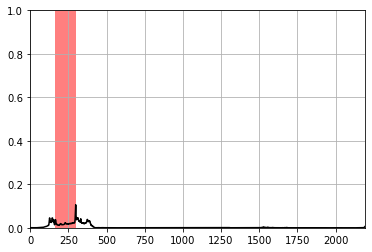

ENST00000603633
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_230760  :  {'start': 86, 'stop': 260, 'MS': 0, 'TE': 2, 'frame': 3}
IP_230761  :  {'start': 375, 'stop': 582, 'MS': 1, 'TE': 1, 'frame': 1}
IP_230756  :  {'start': 385, 'stop': 643, 'MS': 0, 'TE': 1, 'frame': 2}
IP_230757  :  {'start': 670, 'stop': 760, 'MS': 0, 'TE': 0, 'frame': 2}
IP_230759  :  {'start': 707, 'stop': 929, 'MS': 0, 'TE': 0, 'frame': 3}
IP_230763  :  {'start': 1053, 'stop': 1158, 'MS': 0, 'TE': 0, 'frame': 1}
IP_230762  :  {'start': 1170, 'stop': 1269, 'MS': 0, 'TE': 0, 'frame': 1}
IP_230755  :  {'start': 1402, 'stop': 1510, 'MS': 0, 'TE': 0, 'frame': 2}


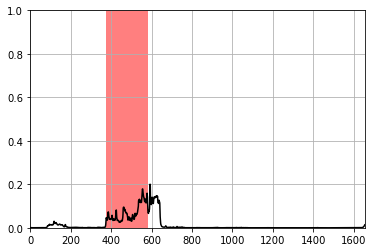

ENST00000560671
recall: 1.0
iou: 0.16756756603717804
biotype: processed_transcript
II_744208  :  {'start': 125, 'stop': 686, 'MS': 0, 'TE': 0, 'frame': 3}
IP_231414  :  {'start': 144, 'stop': 237, 'MS': 1, 'TE': 2, 'frame': 1}
IP_231413  :  {'start': 429, 'stop': 615, 'MS': 0, 'TE': 1, 'frame': 1}


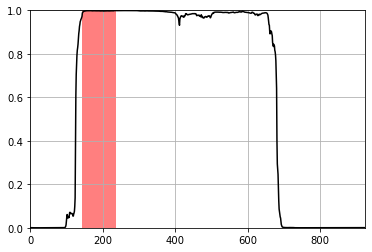

ENST00000560247
recall: 0.6881720423698425
iou: 0.3282051384449005
biotype: processed_transcript
II_744211  :  {'start': 160, 'stop': 370, 'MS': 0, 'TE': 0, 'frame': 2}
IP_231414  :  {'start': 179, 'stop': 272, 'MS': 1, 'TE': 2, 'frame': 3}
II_744210  :  {'start': 339, 'stop': 582, 'MS': 0, 'TE': 0, 'frame': 1}


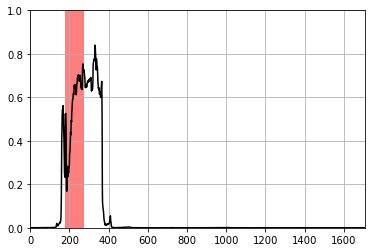

ENST00000560334
recall: 1.0
iou: 0.04918032884597778
biotype: processed_transcript
II_740123  :  {'start': 35, 'stop': 3713, 'MS': 0, 'TE': 0, 'frame': 3}
IP_236309  :  {'start': 414, 'stop': 735, 'MS': 0, 'TE': 0, 'frame': 1}
IP_236307  :  {'start': 1038, 'stop': 1128, 'MS': 0, 'TE': 0, 'frame': 1}
IP_236308  :  {'start': 2160, 'stop': 2337, 'MS': 2, 'TE': 2, 'frame': 1}
IP_236310  :  {'start': 2370, 'stop': 2484, 'MS': 0, 'TE': 0, 'frame': 1}
IP_236315  :  {'start': 2749, 'stop': 2863, 'MS': 0, 'TE': 0, 'frame': 2}
IP_236314  :  {'start': 3178, 'stop': 3280, 'MS': 0, 'TE': 0, 'frame': 2}
II_236332  :  {'start': 3364, 'stop': 3604, 'MS': 0, 'TE': 1, 'frame': 2}
IP_236330  :  {'start': 3720, 'stop': 3831, 'MS': 0, 'TE': 0, 'frame': 1}
IP_236331  :  {'start': 3919, 'stop': 4018, 'MS': 0, 'TE': 0, 'frame': 2}
IP_236334  :  {'start': 3932, 'stop': 4070, 'MS': 0, 'TE': 0, 'frame': 3}


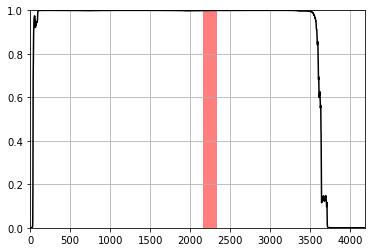

ENST00000564194
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_238652  :  {'start': 47, 'stop': 155, 'MS': 0, 'TE': 0, 'frame': 3}
IP_238654  :  {'start': 154, 'stop': 283, 'MS': 2, 'TE': 2, 'frame': 2}
IP_238653  :  {'start': 574, 'stop': 721, 'MS': 0, 'TE': 0, 'frame': 2}
IP_238649  :  {'start': 1433, 'stop': 1667, 'MS': 0, 'TE': 1, 'frame': 3}
IP_238650  :  {'start': 2003, 'stop': 2117, 'MS': 0, 'TE': 0, 'frame': 3}


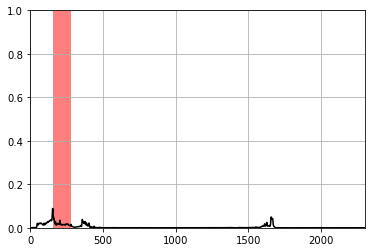

ENST00000640143
recall: 1.0
iou: 0.05343511328101158
biotype: processed_transcript


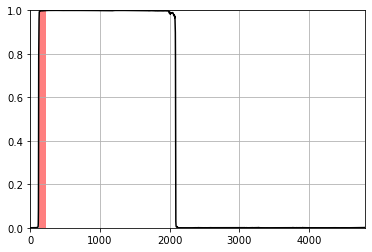

ENST00000638693
recall: 0.6095238327980042
iou: 0.15274463593959808
biotype: processed_transcript


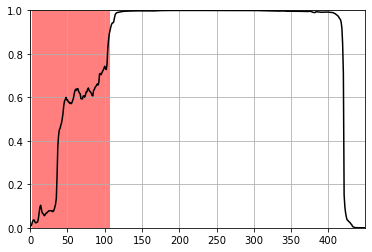

ENST00000487509
recall: 0.9961240291595459
iou: 0.5507143139839172
biotype: processed_transcript
II_733990  :  {'start': 65, 'stop': 833, 'MS': 0, 'TE': 0, 'frame': 3}
IP_243680  :  {'start': 105, 'stop': 618, 'MS': 14, 'TE': 2, 'frame': 1}
II_733983  :  {'start': 645, 'stop': 909, 'MS': 0, 'TE': 0, 'frame': 1}
IP_733991  :  {'start': 1055, 'stop': 1175, 'MS': 0, 'TE': 0, 'frame': 3}
IP_733987  :  {'start': 1171, 'stop': 1306, 'MS': 1, 'TE': 0, 'frame': 2}
IP_733989  :  {'start': 1673, 'stop': 1763, 'MS': 0, 'TE': 0, 'frame': 3}
IP_733988  :  {'start': 1762, 'stop': 1879, 'MS': 0, 'TE': 0, 'frame': 2}
IP_733981  :  {'start': 1995, 'stop': 2097, 'MS': 0, 'TE': 0, 'frame': 1}
IP_733980  :  {'start': 2280, 'stop': 2460, 'MS': 0, 'TE': 0, 'frame': 1}
IP_733978  :  {'start': 2699, 'stop': 2846, 'MS': 0, 'TE': 0, 'frame': 3}
IP_733982  :  {'start': 2937, 'stop': 3027, 'MS': 0, 'TE': 0, 'frame': 1}
IP_733986  :  {'start': 3175, 'stop': 3424, 'MS': 1, 'TE': 0, 'frame': 2}
IP_733984  :  {'start

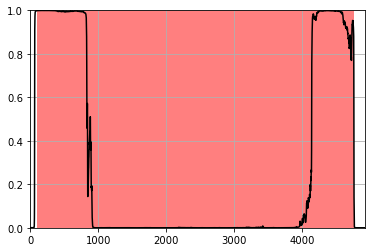

ENST00000571720
recall: 1.0
iou: 0.4928732216358185
biotype: processed_transcript
IP_728330  :  {'start': 106, 'stop': 247, 'MS': 0, 'TE': 0, 'frame': 2}
IP_728331  :  {'start': 395, 'stop': 488, 'MS': 0, 'TE': 0, 'frame': 3}
IP_728328  :  {'start': 759, 'stop': 954, 'MS': 0, 'TE': 0, 'frame': 1}
IP_245834  :  {'start': 1310, 'stop': 1967, 'MS': 2, 'TE': 2, 'frame': 3}
II_728329  :  {'start': 1963, 'stop': 2638, 'MS': 0, 'TE': 0, 'frame': 2}
IP_245832  :  {'start': 2084, 'stop': 2267, 'MS': 0, 'TE': 0, 'frame': 3}
IP_245831  :  {'start': 2300, 'stop': 2678, 'MS': 0, 'TE': 0, 'frame': 3}
IP_245836  :  {'start': 2990, 'stop': 3146, 'MS': 0, 'TE': 0, 'frame': 3}
IP_245830  :  {'start': 3211, 'stop': 3409, 'MS': 0, 'TE': 0, 'frame': 2}
IP_245826  :  {'start': 3456, 'stop': 3579, 'MS': 0, 'TE': 0, 'frame': 1}
IP_245829  :  {'start': 3742, 'stop': 3832, 'MS': 0, 'TE': 0, 'frame': 2}


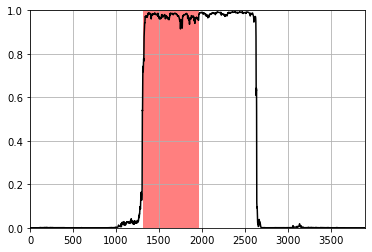

ENST00000537116
recall: 0.31481480598449707
iou: 0.18888889253139496
biotype: processed_transcript
IP_726150  :  {'start': 78, 'stop': 285, 'MS': 0, 'TE': 0, 'frame': 1}
IP_726151  :  {'start': 262, 'stop': 382, 'MS': 0, 'TE': 0, 'frame': 2}
IP_726149  :  {'start': 513, 'stop': 639, 'MS': 0, 'TE': 0, 'frame': 1}
II_726148  :  {'start': 653, 'stop': 857, 'MS': 0, 'TE': 1, 'frame': 3}
IP_247722  :  {'start': 658, 'stop': 820, 'MS': 1, 'TE': 2, 'frame': 2}
IP_247717  :  {'start': 741, 'stop': 1140, 'MS': 1, 'TE': 0, 'frame': 1}
IP_247718  :  {'start': 853, 'stop': 982, 'MS': 0, 'TE': 0, 'frame': 2}
IP_247719  :  {'start': 1000, 'stop': 1306, 'MS': 0, 'TE': 0, 'frame': 2}
IP_247723  :  {'start': 1384, 'stop': 1597, 'MS': 0, 'TE': 0, 'frame': 2}
IP_247714  :  {'start': 1506, 'stop': 1848, 'MS': 0, 'TE': 0, 'frame': 1}
IP_247721  :  {'start': 1642, 'stop': 1777, 'MS': 0, 'TE': 0, 'frame': 2}
IP_247713  :  {'start': 1745, 'stop': 1880, 'MS': 0, 'TE': 0, 'frame': 3}
IP_247712  :  {'start': 204

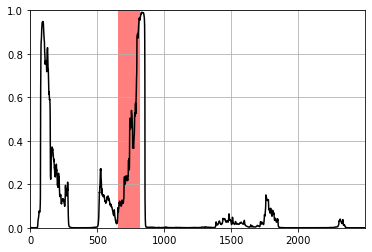

ENST00000537155
recall: 0.5432098507881165
iou: 0.27848100662231445
biotype: processed_transcript
IP_726149  :  {'start': 127, 'stop': 253, 'MS': 0, 'TE': 0, 'frame': 2}
II_726148  :  {'start': 267, 'stop': 471, 'MS': 0, 'TE': 1, 'frame': 1}
IP_247722  :  {'start': 272, 'stop': 434, 'MS': 1, 'TE': 2, 'frame': 3}
IP_247717  :  {'start': 355, 'stop': 754, 'MS': 1, 'TE': 0, 'frame': 2}
IP_247718  :  {'start': 467, 'stop': 596, 'MS': 0, 'TE': 0, 'frame': 3}


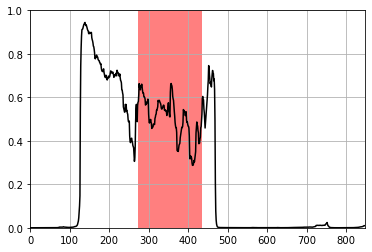

ENST00000643315
recall: 0.17094017565250397
iou: 0.17094017565250397
biotype: processed_transcript


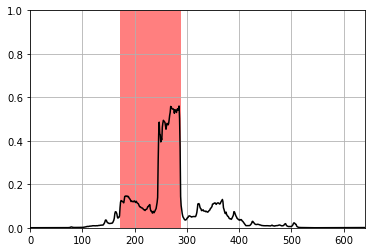

ENST00000527582
recall: 1.0
iou: 0.28200972080230713
biotype: processed_transcript
IP_251646  :  {'start': 166, 'stop': 340, 'MS': 1, 'TE': 3, 'frame': 2}


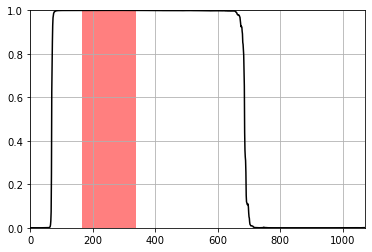

ENST00000587117
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_255959  :  {'start': 3, 'stop': 99, 'MS': 1, 'TE': 5, 'frame': 1}
II_715973  :  {'start': 107, 'stop': 371, 'MS': 0, 'TE': 0, 'frame': 3}
IP_715972  :  {'start': 213, 'stop': 363, 'MS': 0, 'TE': 0, 'frame': 1}


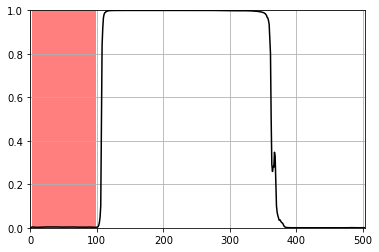

ENST00000536693
recall: 0.9751243591308594
iou: 0.5632184147834778
biotype: processed_transcript
IP_713311  :  {'start': 285, 'stop': 486, 'MS': 1, 'TE': 2, 'frame': 1}
II_259417  :  {'start': 669, 'stop': 843, 'MS': 0, 'TE': 0, 'frame': 1}


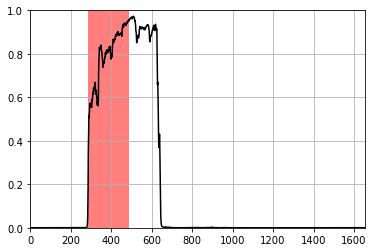

ENST00000475185
recall: 0.02222222276031971
iou: 0.02222222276031971
biotype: processed_transcript
IP_264157  :  {'start': 292, 'stop': 517, 'MS': 1, 'TE': 7, 'frame': 2}
IP_264161  :  {'start': 517, 'stop': 649, 'MS': 0, 'TE': 0, 'frame': 2}
IP_264164  :  {'start': 725, 'stop': 821, 'MS': 0, 'TE': 0, 'frame': 3}
IP_264166  :  {'start': 1011, 'stop': 1107, 'MS': 0, 'TE': 0, 'frame': 1}
IP_264162  :  {'start': 1184, 'stop': 1346, 'MS': 0, 'TE': 0, 'frame': 3}
IP_264167  :  {'start': 1263, 'stop': 1458, 'MS': 0, 'TE': 0, 'frame': 1}
IP_264160  :  {'start': 1279, 'stop': 1378, 'MS': 0, 'TE': 0, 'frame': 2}
IP_264159  :  {'start': 1468, 'stop': 1561, 'MS': 0, 'TE': 0, 'frame': 2}
IP_264165  :  {'start': 1557, 'stop': 1707, 'MS': 0, 'TE': 0, 'frame': 1}
IP_264158  :  {'start': 2176, 'stop': 2290, 'MS': 0, 'TE': 0, 'frame': 2}


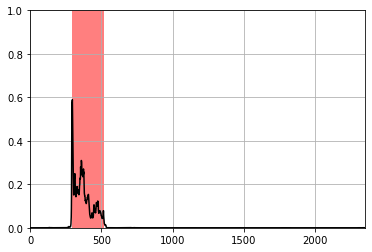

ENST00000579458
recall: 0.26217228174209595
iou: 0.26119402050971985
biotype: processed_transcript
IP_267128  :  {'start': 26, 'stop': 293, 'MS': 1, 'TE': 1, 'frame': 3}
IP_267127  :  {'start': 250, 'stop': 424, 'MS': 0, 'TE': 0, 'frame': 2}
IP_267124  :  {'start': 381, 'stop': 591, 'MS': 0, 'TE': 0, 'frame': 1}
IP_267129  :  {'start': 521, 'stop': 677, 'MS': 0, 'TE': 0, 'frame': 3}
IP_267126  :  {'start': 1273, 'stop': 1465, 'MS': 0, 'TE': 0, 'frame': 2}
IP_267125  :  {'start': 1873, 'stop': 2026, 'MS': 0, 'TE': 0, 'frame': 2}
IP_267123  :  {'start': 2436, 'stop': 2562, 'MS': 0, 'TE': 0, 'frame': 1}


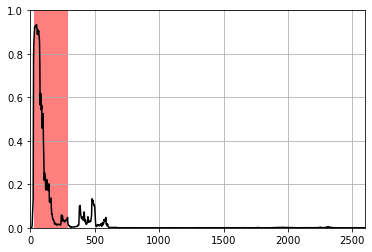

ENST00000582251
recall: 0.4635416567325592
iou: 0.2730061411857605
biotype: processed_transcript
IP_267349  :  {'start': 148, 'stop': 334, 'MS': 0, 'TE': 0, 'frame': 2}
IP_267352  :  {'start': 251, 'stop': 347, 'MS': 1, 'TE': 0, 'frame': 3}
IP_267344  :  {'start': 546, 'stop': 660, 'MS': 0, 'TE': 0, 'frame': 1}
IP_267348  :  {'start': 652, 'stop': 1072, 'MS': 1, 'TE': 0, 'frame': 2}
IP_267346  :  {'start': 786, 'stop': 978, 'MS': 1, 'TE': 1, 'frame': 1}
IP_267347  :  {'start': 1077, 'stop': 1173, 'MS': 0, 'TE': 0, 'frame': 1}
IP_267351  :  {'start': 1084, 'stop': 1177, 'MS': 0, 'TE': 0, 'frame': 2}
IP_267343  :  {'start': 1173, 'stop': 1578, 'MS': 0, 'TE': 0, 'frame': 1}
IP_267350  :  {'start': 1177, 'stop': 1402, 'MS': 0, 'TE': 0, 'frame': 2}
IP_267345  :  {'start': 1632, 'stop': 1785, 'MS': 0, 'TE': 0, 'frame': 1}


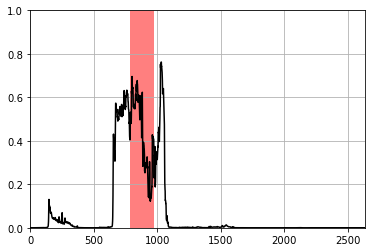

ENST00000580048
recall: 0.9590643048286438
iou: 0.9590643048286438
biotype: processed_transcript
IP_267395  :  {'start': 250, 'stop': 589, 'MS': 0, 'TE': 6, 'frame': 2}
IP_267392  :  {'start': 607, 'stop': 949, 'MS': 1, 'TE': 2, 'frame': 2}
IP_267401  :  {'start': 1074, 'stop': 1197, 'MS': 0, 'TE': 0, 'frame': 1}
IP_267400  :  {'start': 1638, 'stop': 1863, 'MS': 0, 'TE': 0, 'frame': 1}
IP_267396  :  {'start': 1975, 'stop': 2083, 'MS': 0, 'TE': 0, 'frame': 2}
IP_267398  :  {'start': 2021, 'stop': 2120, 'MS': 0, 'TE': 0, 'frame': 3}
IP_267393  :  {'start': 2104, 'stop': 2200, 'MS': 0, 'TE': 0, 'frame': 2}
IP_267403  :  {'start': 2142, 'stop': 2262, 'MS': 0, 'TE': 0, 'frame': 1}
IP_267402  :  {'start': 2271, 'stop': 2388, 'MS': 0, 'TE': 0, 'frame': 1}
IP_267399  :  {'start': 2469, 'stop': 2592, 'MS': 0, 'TE': 0, 'frame': 1}
IP_267394  :  {'start': 2755, 'stop': 3028, 'MS': 0, 'TE': 0, 'frame': 2}
IP_267397  :  {'start': 2813, 'stop': 2915, 'MS': 0, 'TE': 0, 'frame': 3}


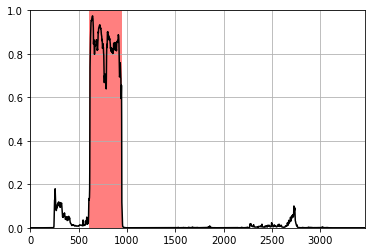

ENST00000583106
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_701187  :  {'start': 1, 'stop': 163, 'MS': 0, 'TE': 0, 'frame': 2}
IP_701188  :  {'start': 218, 'stop': 356, 'MS': 0, 'TE': 0, 'frame': 3}
IP_701186  :  {'start': 321, 'stop': 420, 'MS': 0, 'TE': 1, 'frame': 1}
IP_267439  :  {'start': 466, 'stop': 568, 'MS': 0, 'TE': 1, 'frame': 2}
IP_267437  :  {'start': 540, 'stop': 633, 'MS': 0, 'TE': 0, 'frame': 1}
IP_267434  :  {'start': 551, 'stop': 650, 'MS': 0, 'TE': 0, 'frame': 3}
IP_267438  :  {'start': 771, 'stop': 957, 'MS': 1, 'TE': 1, 'frame': 1}
IP_267435  :  {'start': 872, 'stop': 971, 'MS': 0, 'TE': 0, 'frame': 3}
IP_267440  :  {'start': 940, 'stop': 1033, 'MS': 0, 'TE': 0, 'frame': 2}
IP_267436  :  {'start': 1029, 'stop': 1149, 'MS': 0, 'TE': 0, 'frame': 1}


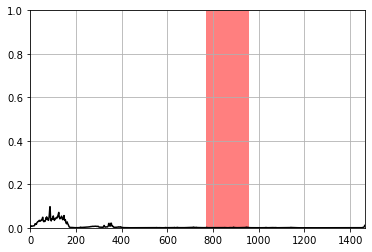

ENST00000577408
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_267439  :  {'start': 40, 'stop': 142, 'MS': 0, 'TE': 1, 'frame': 2}
IP_267437  :  {'start': 114, 'stop': 207, 'MS': 0, 'TE': 0, 'frame': 1}
IP_267434  :  {'start': 125, 'stop': 224, 'MS': 0, 'TE': 0, 'frame': 3}
IP_267438  :  {'start': 345, 'stop': 531, 'MS': 1, 'TE': 1, 'frame': 1}
IP_267435  :  {'start': 446, 'stop': 545, 'MS': 0, 'TE': 0, 'frame': 3}
IP_267440  :  {'start': 514, 'stop': 607, 'MS': 0, 'TE': 0, 'frame': 2}
IP_267436  :  {'start': 603, 'stop': 723, 'MS': 0, 'TE': 0, 'frame': 1}


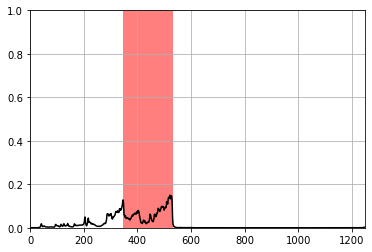

ENST00000582805
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_267439  :  {'start': 99, 'stop': 201, 'MS': 0, 'TE': 1, 'frame': 1}
IP_267437  :  {'start': 173, 'stop': 266, 'MS': 0, 'TE': 0, 'frame': 3}
IP_267434  :  {'start': 184, 'stop': 283, 'MS': 0, 'TE': 0, 'frame': 2}
IP_267438  :  {'start': 404, 'stop': 590, 'MS': 1, 'TE': 1, 'frame': 3}
IP_267435  :  {'start': 505, 'stop': 604, 'MS': 0, 'TE': 0, 'frame': 2}
IP_267440  :  {'start': 573, 'stop': 666, 'MS': 0, 'TE': 0, 'frame': 1}
IP_267436  :  {'start': 662, 'stop': 782, 'MS': 0, 'TE': 0, 'frame': 3}


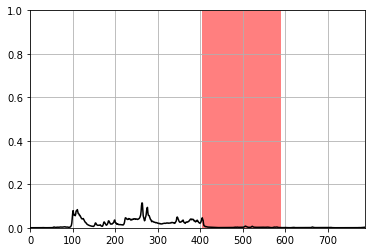

ENST00000465974
recall: 0.0
iou: 0.0
biotype: processed_transcript
II_269887  :  {'start': 166, 'stop': 256, 'MS': 0, 'TE': 0, 'frame': 2}
II_269909  :  {'start': 197, 'stop': 365, 'MS': 0, 'TE': 0, 'frame': 3}
IP_269899  :  {'start': 491, 'stop': 611, 'MS': 1, 'TE': 2, 'frame': 3}


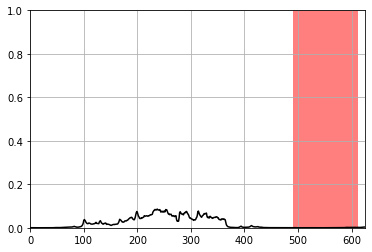

ENST00000587536
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_269915  :  {'start': 29, 'stop': 128, 'MS': 1, 'TE': 5, 'frame': 3}
IP_269916  :  {'start': 347, 'stop': 440, 'MS': 0, 'TE': 0, 'frame': 3}
IP_269919  :  {'start': 378, 'stop': 492, 'MS': 0, 'TE': 0, 'frame': 1}
IP_269914  :  {'start': 488, 'stop': 662, 'MS': 0, 'TE': 0, 'frame': 3}
IP_269918  :  {'start': 531, 'stop': 699, 'MS': 0, 'TE': 0, 'frame': 1}
IP_269917  :  {'start': 888, 'stop': 999, 'MS': 0, 'TE': 0, 'frame': 1}
IP_269921  :  {'start': 1086, 'stop': 1254, 'MS': 0, 'TE': 0, 'frame': 1}
IP_269912  :  {'start': 1099, 'stop': 1288, 'MS': 0, 'TE': 0, 'frame': 2}
IP_269913  :  {'start': 1310, 'stop': 1556, 'MS': 0, 'TE': 0, 'frame': 3}


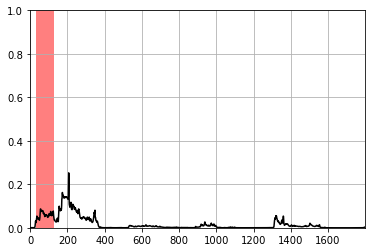

ENST00000585797
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_269915  :  {'start': 41, 'stop': 140, 'MS': 1, 'TE': 5, 'frame': 3}
II_689719  :  {'start': 142, 'stop': 286, 'MS': 0, 'TE': 0, 'frame': 2}
IP_269916  :  {'start': 282, 'stop': 375, 'MS': 0, 'TE': 0, 'frame': 1}
IP_269919  :  {'start': 313, 'stop': 427, 'MS': 0, 'TE': 0, 'frame': 2}
IP_269914  :  {'start': 423, 'stop': 597, 'MS': 0, 'TE': 0, 'frame': 1}
IP_269918  :  {'start': 466, 'stop': 634, 'MS': 0, 'TE': 0, 'frame': 2}
IP_269917  :  {'start': 823, 'stop': 934, 'MS': 0, 'TE': 0, 'frame': 2}
IP_269921  :  {'start': 1021, 'stop': 1189, 'MS': 0, 'TE': 0, 'frame': 2}
IP_269912  :  {'start': 1034, 'stop': 1223, 'MS': 0, 'TE': 0, 'frame': 3}
IP_269913  :  {'start': 1245, 'stop': 1491, 'MS': 0, 'TE': 0, 'frame': 1}


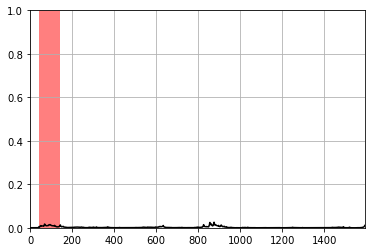

ENST00000588765
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_269915  :  {'start': 43, 'stop': 142, 'MS': 1, 'TE': 5, 'frame': 2}
II_689721  :  {'start': 50, 'stop': 188, 'MS': 0, 'TE': 0, 'frame': 3}
II_689719  :  {'start': 235, 'stop': 379, 'MS': 0, 'TE': 0, 'frame': 2}
IP_269916  :  {'start': 375, 'stop': 468, 'MS': 0, 'TE': 0, 'frame': 1}
IP_269919  :  {'start': 406, 'stop': 520, 'MS': 0, 'TE': 0, 'frame': 2}


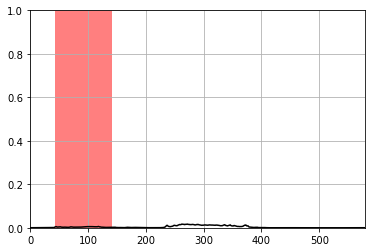

ENST00000598038
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_696900  :  {'start': 226, 'stop': 418, 'MS': 1, 'TE': 2, 'frame': 2}
IP_696903  :  {'start': 512, 'stop': 791, 'MS': 0, 'TE': 0, 'frame': 3}
IP_696901  :  {'start': 519, 'stop': 630, 'MS': 0, 'TE': 0, 'frame': 1}
IP_696902  :  {'start': 642, 'stop': 762, 'MS': 0, 'TE': 0, 'frame': 1}
II_271968  :  {'start': 1431, 'stop': 1653, 'MS': 0, 'TE': 0, 'frame': 1}
IP_271963  :  {'start': 2654, 'stop': 2813, 'MS': 0, 'TE': 0, 'frame': 3}


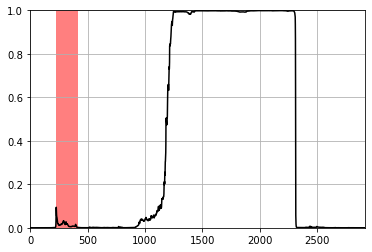

ENST00000587961
recall: 0.9963570237159729
iou: 0.6906565427780151
biotype: processed_transcript
IP_273072  :  {'start': 59, 'stop': 167, 'MS': 0, 'TE': 2, 'frame': 3}
IP_273065  :  {'start': 268, 'stop': 817, 'MS': 3, 'TE': 1, 'frame': 2}
IP_273061  :  {'start': 414, 'stop': 618, 'MS': 0, 'TE': 0, 'frame': 1}
IP_273062  :  {'start': 1272, 'stop': 1419, 'MS': 1, 'TE': 0, 'frame': 1}
IP_273070  :  {'start': 1634, 'stop': 1907, 'MS': 1, 'TE': 0, 'frame': 3}
IP_273064  :  {'start': 1708, 'stop': 1816, 'MS': 0, 'TE': 0, 'frame': 2}
IP_273073  :  {'start': 2438, 'stop': 2825, 'MS': 0, 'TE': 0, 'frame': 3}
IP_273067  :  {'start': 2846, 'stop': 2945, 'MS': 0, 'TE': 0, 'frame': 3}
IP_273063  :  {'start': 2881, 'stop': 3007, 'MS': 0, 'TE': 0, 'frame': 2}
IP_273071  :  {'start': 3392, 'stop': 3521, 'MS': 0, 'TE': 0, 'frame': 3}
IP_273066  :  {'start': 3484, 'stop': 3724, 'MS': 0, 'TE': 0, 'frame': 2}
IP_273060  :  {'start': 3720, 'stop': 3897, 'MS': 0, 'TE': 0, 'frame': 1}
IP_273069  :  {'start'

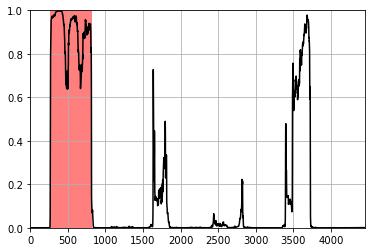

ENST00000490769
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_693732  :  {'start': 256, 'stop': 457, 'MS': 0, 'TE': 0, 'frame': 2}
IP_275761  :  {'start': 478, 'stop': 574, 'MS': 0, 'TE': 0, 'frame': 2}
IP_275757  :  {'start': 674, 'stop': 770, 'MS': 0, 'TE': 1, 'frame': 3}
IP_275759  :  {'start': 723, 'stop': 924, 'MS': 1, 'TE': 1, 'frame': 1}
IP_275756  :  {'start': 869, 'stop': 986, 'MS': 1, 'TE': 0, 'frame': 3}
IP_275762  :  {'start': 1078, 'stop': 1180, 'MS': 0, 'TE': 0, 'frame': 2}


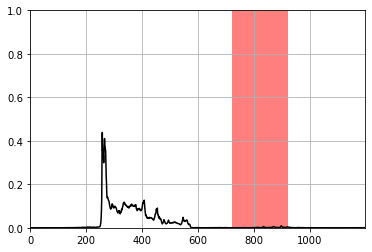

ENST00000468817
recall: 0.13636364042758942
iou: 0.018808776512742043
biotype: processed_transcript
II_665153  :  {'start': 84, 'stop': 255, 'MS': 0, 'TE': 0, 'frame': 1}
IP_282382  :  {'start': 767, 'stop': 899, 'MS': 2, 'TE': 1, 'frame': 3}
IP_282392  :  {'start': 879, 'stop': 996, 'MS': 0, 'TE': 0, 'frame': 1}
II_665157  :  {'start': 919, 'stop': 1690, 'MS': 0, 'TE': 1, 'frame': 2}
IP_282388  :  {'start': 1388, 'stop': 1526, 'MS': 0, 'TE': 0, 'frame': 3}
IP_665154  :  {'start': 1668, 'stop': 1758, 'MS': 0, 'TE': 0, 'frame': 1}
IP_665158  :  {'start': 1699, 'stop': 1918, 'MS': 0, 'TE': 0, 'frame': 2}
IP_665156  :  {'start': 2068, 'stop': 2278, 'MS': 0, 'TE': 0, 'frame': 2}
IP_665155  :  {'start': 2571, 'stop': 2697, 'MS': 0, 'TE': 0, 'frame': 1}


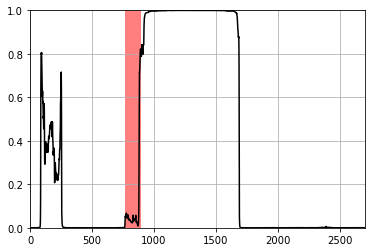

ENST00000379053
recall: 0.932659924030304
iou: 0.46476510167121887
biotype: processed_transcript
IP_287460  :  {'start': 294, 'stop': 564, 'MS': 0, 'TE': 1, 'frame': 1}
IP_287463  :  {'start': 325, 'stop': 622, 'MS': 1, 'TE': 1, 'frame': 2}
IP_287458  :  {'start': 618, 'stop': 855, 'MS': 0, 'TE': 0, 'frame': 1}
IP_287462  :  {'start': 841, 'stop': 1129, 'MS': 0, 'TE': 0, 'frame': 2}
IP_287454  :  {'start': 914, 'stop': 1073, 'MS': 0, 'TE': 0, 'frame': 3}
IP_287446  :  {'start': 1196, 'stop': 1322, 'MS': 0, 'TE': 0, 'frame': 3}
IP_287461  :  {'start': 1396, 'stop': 1666, 'MS': 0, 'TE': 0, 'frame': 2}
IP_287457  :  {'start': 1455, 'stop': 1641, 'MS': 0, 'TE': 0, 'frame': 1}
IP_287453  :  {'start': 1631, 'stop': 1961, 'MS': 0, 'TE': 0, 'frame': 3}
IP_287456  :  {'start': 1875, 'stop': 1974, 'MS': 0, 'TE': 0, 'frame': 1}
IP_287455  :  {'start': 2340, 'stop': 2454, 'MS': 0, 'TE': 0, 'frame': 1}
IP_287451  :  {'start': 2795, 'stop': 3155, 'MS': 0, 'TE': 0, 'frame': 3}
IP_287459  :  {'start':

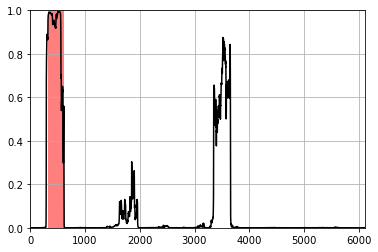

ENST00000565493
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_287852  :  {'start': 242, 'stop': 569, 'MS': 1, 'TE': 5, 'frame': 3}
IP_287854  :  {'start': 683, 'stop': 914, 'MS': 0, 'TE': 1, 'frame': 3}
IP_287856  :  {'start': 959, 'stop': 1148, 'MS': 0, 'TE': 1, 'frame': 3}
IP_287837  :  {'start': 1062, 'stop': 1152, 'MS': 0, 'TE': 0, 'frame': 1}
IP_287859  :  {'start': 1154, 'stop': 1406, 'MS': 0, 'TE': 0, 'frame': 3}
IP_287839  :  {'start': 1500, 'stop': 1599, 'MS': 0, 'TE': 0, 'frame': 1}
IP_287848  :  {'start': 1606, 'stop': 1729, 'MS': 0, 'TE': 0, 'frame': 2}
IP_287851  :  {'start': 1649, 'stop': 1799, 'MS': 0, 'TE': 0, 'frame': 3}
IP_287843  :  {'start': 1788, 'stop': 1926, 'MS': 0, 'TE': 0, 'frame': 1}
IP_287850  :  {'start': 2095, 'stop': 2290, 'MS': 0, 'TE': 0, 'frame': 2}
IP_287840  :  {'start': 2328, 'stop': 2460, 'MS': 0, 'TE': 0, 'frame': 1}
IP_287838  :  {'start': 2553, 'stop': 2658, 'MS': 0, 'TE': 0, 'frame': 1}
IP_287849  :  {'start': 2605, 'stop': 2698, 'MS': 

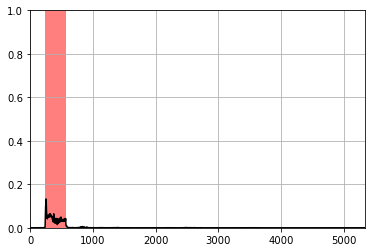

ENST00000371639
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_288023  :  {'start': 4, 'stop': 127, 'MS': 0, 'TE': 1, 'frame': 2}
IP_288028  :  {'start': 29, 'stop': 347, 'MS': 0, 'TE': 0, 'frame': 3}
IP_288020  :  {'start': 162, 'stop': 411, 'MS': 0, 'TE': 0, 'frame': 1}
IP_288021  :  {'start': 388, 'stop': 658, 'MS': 1, 'TE': 2, 'frame': 2}
IP_288025  :  {'start': 817, 'stop': 910, 'MS': 0, 'TE': 0, 'frame': 2}
IP_288026  :  {'start': 1178, 'stop': 1322, 'MS': 0, 'TE': 0, 'frame': 3}
IP_288019  :  {'start': 1791, 'stop': 1980, 'MS': 0, 'TE': 0, 'frame': 1}
IP_288024  :  {'start': 1819, 'stop': 1927, 'MS': 0, 'TE': 0, 'frame': 2}
IP_288027  :  {'start': 2120, 'stop': 2255, 'MS': 0, 'TE': 0, 'frame': 3}


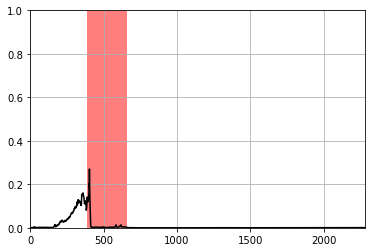

ENST00000645185
recall: 0.6296296119689941
iou: 0.5666666626930237
biotype: processed_transcript
IP_289718  :  {'start': 144, 'stop': 522, 'MS': 8, 'TE': 1, 'frame': 1}
IP_289744  :  {'start': 839, 'stop': 929, 'MS': 0, 'TE': 0, 'frame': 3}
IP_289731  :  {'start': 1030, 'stop': 1150, 'MS': 0, 'TE': 0, 'frame': 2}
IP_289719  :  {'start': 1128, 'stop': 1224, 'MS': 0, 'TE': 0, 'frame': 1}
IP_289737  :  {'start': 1315, 'stop': 1414, 'MS': 0, 'TE': 0, 'frame': 2}
IP_289746  :  {'start': 1670, 'stop': 1763, 'MS': 0, 'TE': 0, 'frame': 3}
IP_289734  :  {'start': 1744, 'stop': 1837, 'MS': 1, 'TE': 0, 'frame': 2}
IP_289725  :  {'start': 1806, 'stop': 1932, 'MS': 0, 'TE': 0, 'frame': 1}
IP_289720  :  {'start': 2235, 'stop': 2352, 'MS': 1, 'TE': 0, 'frame': 1}
IP_289736  :  {'start': 2344, 'stop': 2446, 'MS': 0, 'TE': 0, 'frame': 2}
IP_289726  :  {'start': 2877, 'stop': 3099, 'MS': 1, 'TE': 0, 'frame': 1}
IP_289742  :  {'start': 3107, 'stop': 3221, 'MS': 0, 'TE': 0, 'frame': 3}
IP_289717  :  {'sta

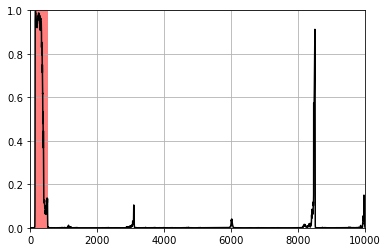

ENST00000464357
recall: 0.22727273404598236
iou: 0.0680786669254303
biotype: processed_transcript
IP_290482  :  {'start': 145, 'stop': 343, 'MS': 1, 'TE': 1, 'frame': 2}
IP_290470  :  {'start': 621, 'stop': 750, 'MS': 0, 'TE': 0, 'frame': 1}
IP_290468  :  {'start': 750, 'stop': 870, 'MS': 0, 'TE': 0, 'frame': 1}


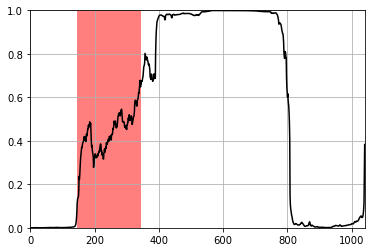

ENST00000624561
recall: 0.29931971430778503
iou: 0.15547703206539154
biotype: processed_transcript
IP_291046  :  {'start': 276, 'stop': 423, 'MS': 3, 'TE': 2, 'frame': 1}
IP_291047  :  {'start': 286, 'stop': 400, 'MS': 0, 'TE': 0, 'frame': 2}
IP_291049  :  {'start': 368, 'stop': 488, 'MS': 0, 'TE': 0, 'frame': 3}
IP_659799  :  {'start': 564, 'stop': 657, 'MS': 0, 'TE': 0, 'frame': 1}


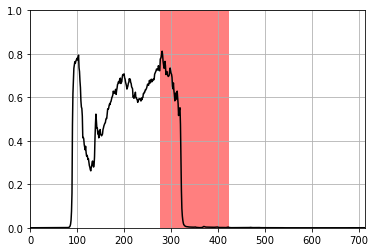

ENST00000332440
recall: 0.31292515993118286
iou: 0.16027875244617462
biotype: processed_transcript
IP_291046  :  {'start': 276, 'stop': 423, 'MS': 3, 'TE': 2, 'frame': 1}
IP_291047  :  {'start': 286, 'stop': 400, 'MS': 0, 'TE': 0, 'frame': 2}
IP_291049  :  {'start': 368, 'stop': 488, 'MS': 0, 'TE': 0, 'frame': 3}


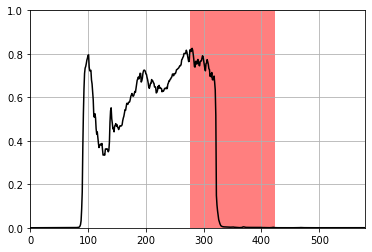

ENST00000647108
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_291148  :  {'start': 213, 'stop': 336, 'MS': 1, 'TE': 5, 'frame': 1}
IP_291141  :  {'start': 257, 'stop': 377, 'MS': 0, 'TE': 0, 'frame': 3}
IP_291145  :  {'start': 515, 'stop': 647, 'MS': 0, 'TE': 8, 'frame': 3}
IP_291136  :  {'start': 583, 'stop': 919, 'MS': 0, 'TE': 1, 'frame': 2}
IP_291152  :  {'start': 837, 'stop': 951, 'MS': 0, 'TE': 0, 'frame': 1}
IP_291142  :  {'start': 1106, 'stop': 1394, 'MS': 1, 'TE': 0, 'frame': 3}
IP_291150  :  {'start': 1635, 'stop': 1812, 'MS': 1, 'TE': 0, 'frame': 1}
IP_291139  :  {'start': 1678, 'stop': 1792, 'MS': 0, 'TE': 0, 'frame': 2}
IP_291151  :  {'start': 1914, 'stop': 2220, 'MS': 0, 'TE': 0, 'frame': 1}
IP_291140  :  {'start': 2197, 'stop': 2533, 'MS': 0, 'TE': 0, 'frame': 2}
IP_291144  :  {'start': 2471, 'stop': 2639, 'MS': 0, 'TE': 0, 'frame': 3}
IP_3431309  :  {'start': 2916, 'stop': 3411, 'MS': 0, 'TE': 0, 'frame': 1}
IP_291138  :  {'start': 3046, 'stop': 3160, 'MS': 0, '

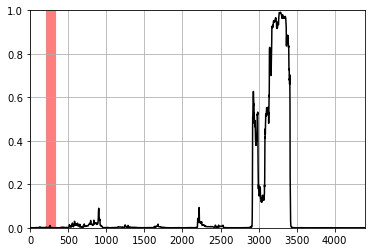

ENST00000400362
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_291148  :  {'start': 225, 'stop': 348, 'MS': 1, 'TE': 5, 'frame': 1}
IP_291141  :  {'start': 269, 'stop': 389, 'MS': 0, 'TE': 0, 'frame': 3}
IP_291145  :  {'start': 527, 'stop': 659, 'MS': 0, 'TE': 8, 'frame': 3}
IP_291136  :  {'start': 595, 'stop': 931, 'MS': 0, 'TE': 1, 'frame': 2}
IP_291152  :  {'start': 849, 'stop': 963, 'MS': 0, 'TE': 0, 'frame': 1}
IP_291142  :  {'start': 1118, 'stop': 1406, 'MS': 1, 'TE': 0, 'frame': 3}
IP_291150  :  {'start': 1647, 'stop': 1824, 'MS': 1, 'TE': 0, 'frame': 1}
IP_291139  :  {'start': 1690, 'stop': 1804, 'MS': 0, 'TE': 0, 'frame': 2}
IP_291151  :  {'start': 1926, 'stop': 2232, 'MS': 0, 'TE': 0, 'frame': 1}
IP_291140  :  {'start': 2209, 'stop': 2545, 'MS': 0, 'TE': 0, 'frame': 2}
IP_291144  :  {'start': 2483, 'stop': 2651, 'MS': 0, 'TE': 0, 'frame': 3}
IP_291157  :  {'start': 2928, 'stop': 3336, 'MS': 0, 'TE': 0, 'frame': 1}
IP_291138  :  {'start': 3058, 'stop': 3172, 'MS': 0, 'T

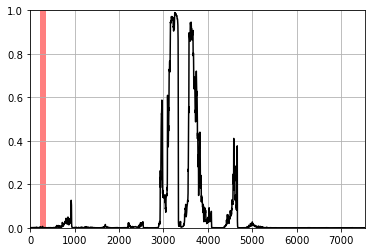

ENST00000461267
recall: 0.9895833134651184
iou: 0.4094827473163605
biotype: processed_transcript
IP_291601  :  {'start': 102, 'stop': 294, 'MS': 3, 'TE': 1, 'frame': 1}
IP_291598  :  {'start': 378, 'stop': 591, 'MS': 0, 'TE': 2, 'frame': 1}


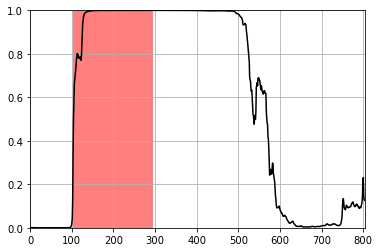

ENST00000454741
recall: 0.27147766947746277
iou: 0.1779279261827469
biotype: processed_transcript
IP_296565  :  {'start': 216, 'stop': 531, 'MS': 0, 'TE': 0, 'frame': 1}
IP_296572  :  {'start': 487, 'stop': 655, 'MS': 0, 'TE': 0, 'frame': 2}
IP_296581  :  {'start': 710, 'stop': 983, 'MS': 0, 'TE': 0, 'frame': 3}
IP_296576  :  {'start': 1001, 'stop': 1109, 'MS': 0, 'TE': 0, 'frame': 3}
IP_296561  :  {'start': 1233, 'stop': 1329, 'MS': 0, 'TE': 0, 'frame': 1}
IP_296580  :  {'start': 1238, 'stop': 1472, 'MS': 0, 'TE': 0, 'frame': 3}
IP_296567  :  {'start': 1291, 'stop': 1465, 'MS': 0, 'TE': 0, 'frame': 2}
IP_296568  :  {'start': 1624, 'stop': 1822, 'MS': 0, 'TE': 1, 'frame': 2}
IP_296575  :  {'start': 1718, 'stop': 2009, 'MS': 1, 'TE': 1, 'frame': 3}
IP_296582  :  {'start': 2240, 'stop': 2339, 'MS': 0, 'TE': 0, 'frame': 3}
IP_296574  :  {'start': 2705, 'stop': 2855, 'MS': 0, 'TE': 0, 'frame': 3}
IP_296570  :  {'start': 2860, 'stop': 2953, 'MS': 0, 'TE': 0, 'frame': 2}
IP_296560  :  {'star

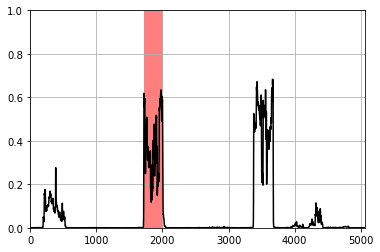

ENST00000478422
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_301843  :  {'start': 15, 'stop': 183, 'MS': 1, 'TE': 27, 'frame': 1}


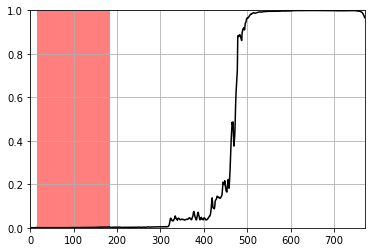

ENST00000360656
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_305924  :  {'start': 176, 'stop': 302, 'MS': 1, 'TE': 11, 'frame': 3}
IP_305923  :  {'start': 415, 'stop': 577, 'MS': 0, 'TE': 1, 'frame': 2}


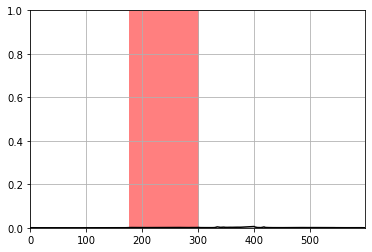

ENST00000602699
recall: 0.6161616444587708
iou: 0.10099337995052338
biotype: processed_transcript
IP_557447  :  {'start': 435, 'stop': 567, 'MS': 0, 'TE': 0, 'frame': 1}
IP_103529  :  {'start': 781, 'stop': 880, 'MS': 1, 'TE': 1, 'frame': 2}
IP_557446  :  {'start': 960, 'stop': 1053, 'MS': 0, 'TE': 0, 'frame': 1}
IP_557445  :  {'start': 1071, 'stop': 1278, 'MS': 0, 'TE': 0, 'frame': 1}
IP_557450  :  {'start': 1505, 'stop': 1664, 'MS': 0, 'TE': 0, 'frame': 3}
IP_557449  :  {'start': 1789, 'stop': 1930, 'MS': 0, 'TE': 0, 'frame': 2}
IP_103521  :  {'start': 2480, 'stop': 2576, 'MS': 0, 'TE': 0, 'frame': 3}
IP_557448  :  {'start': 2565, 'stop': 2709, 'MS': 0, 'TE': 0, 'frame': 1}


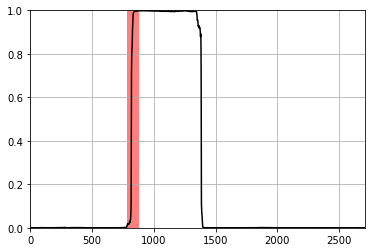

ENST00000490920
recall: 0.9485294222831726
iou: 0.7786720395088196
biotype: processed_transcript
IP_557961  :  {'start': 84, 'stop': 492, 'MS': 1, 'TE': 2, 'frame': 1}
IP_557963  :  {'start': 284, 'stop': 653, 'MS': 0, 'TE': 0, 'frame': 3}
IP_557962  :  {'start': 546, 'stop': 645, 'MS': 0, 'TE': 0, 'frame': 1}


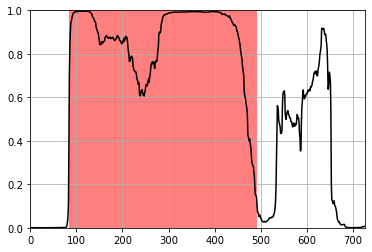

ENST00000419300
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_563226  :  {'start': 133, 'stop': 292, 'MS': 1, 'TE': 6, 'frame': 2}
IP_563210  :  {'start': 438, 'stop': 591, 'MS': 0, 'TE': 0, 'frame': 1}
IP_563209  :  {'start': 879, 'stop': 1083, 'MS': 0, 'TE': 0, 'frame': 1}
IP_563224  :  {'start': 973, 'stop': 1120, 'MS': 0, 'TE': 0, 'frame': 2}
IP_563214  :  {'start': 1467, 'stop': 1563, 'MS': 0, 'TE': 0, 'frame': 1}
IP_563228  :  {'start': 1865, 'stop': 1982, 'MS': 0, 'TE': 0, 'frame': 3}
IP_563211  :  {'start': 1884, 'stop': 2055, 'MS': 0, 'TE': 0, 'frame': 1}
IP_563225  :  {'start': 2317, 'stop': 2536, 'MS': 0, 'TE': 0, 'frame': 2}
IP_563236  :  {'start': 2633, 'stop': 3098, 'MS': 0, 'TE': 0, 'frame': 3}
IP_563220  :  {'start': 3187, 'stop': 3346, 'MS': 0, 'TE': 0, 'frame': 2}
IP_563213  :  {'start': 3747, 'stop': 3861, 'MS': 0, 'TE': 0, 'frame': 1}
IP_563217  :  {'start': 3981, 'stop': 4155, 'MS': 0, 'TE': 0, 'frame': 1}
IP_563233  :  {'start': 4235, 'stop': 4412, 'MS': 1

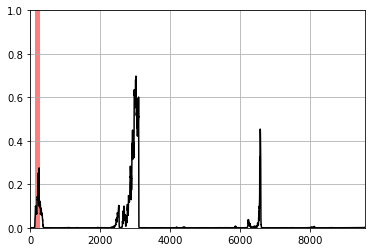

ENST00000609131
recall: 0.9901960492134094
iou: 0.6047903895378113
biotype: processed_transcript
IP_567576  :  {'start': 54, 'stop': 156, 'MS': 1, 'TE': 9, 'frame': 1}
IP_567577  :  {'start': 97, 'stop': 220, 'MS': 0, 'TE': 0, 'frame': 2}


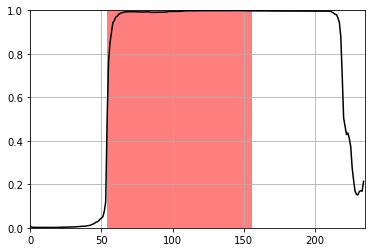

ENST00000426361
recall: 0.9993098974227905
iou: 0.6513720154762268
biotype: processed_transcript
IP_568214  :  {'start': 211, 'stop': 1660, 'MS': 1, 'TE': 1, 'frame': 2}
IP_568202  :  {'start': 500, 'stop': 611, 'MS': 1, 'TE': 0, 'frame': 3}
IP_568210  :  {'start': 842, 'stop': 1070, 'MS': 0, 'TE': 0, 'frame': 3}
IP_568208  :  {'start': 1262, 'stop': 1382, 'MS': 0, 'TE': 0, 'frame': 3}
IP_568211  :  {'start': 1439, 'stop': 1982, 'MS': 0, 'TE': 0, 'frame': 3}
IP_568216  :  {'start': 1988, 'stop': 2480, 'MS': 0, 'TE': 0, 'frame': 3}
IP_568215  :  {'start': 2272, 'stop': 2386, 'MS': 0, 'TE': 0, 'frame': 2}
IP_568218  :  {'start': 2304, 'stop': 2448, 'MS': 0, 'TE': 0, 'frame': 1}
IP_568217  :  {'start': 2492, 'stop': 2609, 'MS': 0, 'TE': 0, 'frame': 3}
IP_568220  :  {'start': 2646, 'stop': 2784, 'MS': 0, 'TE': 0, 'frame': 1}
IP_568223  :  {'start': 2857, 'stop': 2983, 'MS': 0, 'TE': 0, 'frame': 2}
IP_568221  :  {'start': 3360, 'stop': 3474, 'MS': 0, 'TE': 0, 'frame': 1}
IP_568224  :  {'sta

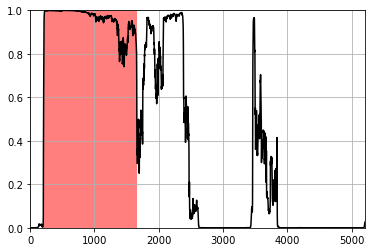

ENST00000521951
recall: 0.9977777600288391
iou: 0.9977777600288391
biotype: processed_transcript
IP_569745  :  {'start': 8, 'stop': 458, 'MS': 2, 'TE': 10, 'frame': 3}
IP_169628  :  {'start': 423, 'stop': 666, 'MS': 0, 'TE': 0, 'frame': 1}
IP_569746  :  {'start': 1082, 'stop': 1196, 'MS': 0, 'TE': 0, 'frame': 3}
IP_569744  :  {'start': 1099, 'stop': 1192, 'MS': 0, 'TE': 0, 'frame': 2}
IP_569743  :  {'start': 1131, 'stop': 1263, 'MS': 0, 'TE': 0, 'frame': 1}


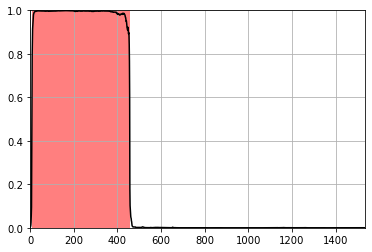

ENST00000630850
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_570024  :  {'start': 17, 'stop': 401, 'MS': 0, 'TE': 0, 'frame': 3}
IP_570015  :  {'start': 60, 'stop': 480, 'MS': 0, 'TE': 0, 'frame': 1}
IP_570017  :  {'start': 1054, 'stop': 1288, 'MS': 0, 'TE': 0, 'frame': 2}
IP_570016  :  {'start': 1335, 'stop': 1425, 'MS': 0, 'TE': 0, 'frame': 1}
IP_570020  :  {'start': 1369, 'stop': 1477, 'MS': 1, 'TE': 0, 'frame': 2}
IP_570023  :  {'start': 1496, 'stop': 1628, 'MS': 0, 'TE': 0, 'frame': 3}
IP_570018  :  {'start': 1624, 'stop': 1768, 'MS': 0, 'TE': 0, 'frame': 2}
IP_570022  :  {'start': 1934, 'stop': 2144, 'MS': 0, 'TE': 0, 'frame': 3}
IP_570019  :  {'start': 2017, 'stop': 2131, 'MS': 0, 'TE': 0, 'frame': 2}
II_570021  :  {'start': 2137, 'stop': 2272, 'MS': 0, 'TE': 0, 'frame': 2}
IP_176898  :  {'start': 2276, 'stop': 2975, 'MS': 1, 'TE': 1, 'frame': 3}
IP_176899  :  {'start': 3149, 'stop': 3431, 'MS': 0, 'TE': 0, 'frame': 3}


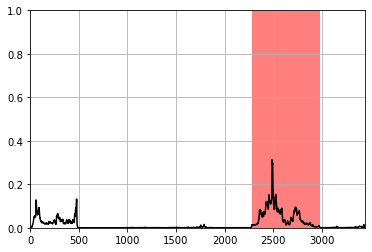

ENST00000521369
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_570906  :  {'start': 265, 'stop': 388, 'MS': 0, 'TE': 1, 'frame': 2}
IP_570909  :  {'start': 715, 'stop': 877, 'MS': 1, 'TE': 7, 'frame': 2}
IP_570911  :  {'start': 758, 'stop': 857, 'MS': 0, 'TE': 2, 'frame': 3}
IP_570907  :  {'start': 937, 'stop': 1051, 'MS': 0, 'TE': 2, 'frame': 2}
IP_570908  :  {'start': 1132, 'stop': 1237, 'MS': 0, 'TE': 0, 'frame': 2}
IP_570910  :  {'start': 1205, 'stop': 1304, 'MS': 0, 'TE': 0, 'frame': 3}


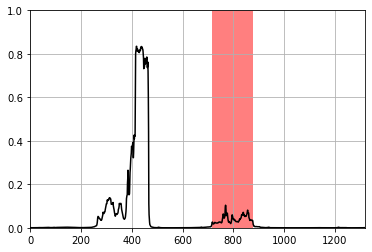

ENST00000520594
recall: 0.9865319728851318
iou: 0.9865319728851318
biotype: processed_transcript
IP_570926  :  {'start': 25, 'stop': 322, 'MS': 1, 'TE': 1, 'frame': 2}
IP_570925  :  {'start': 501, 'stop': 612, 'MS': 0, 'TE': 0, 'frame': 1}


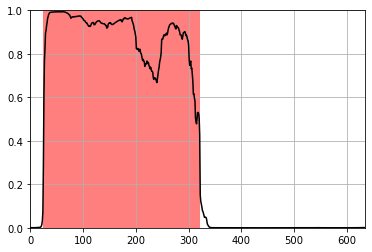

ENST00000632070
recall: 0.9942528605461121
iou: 0.9942528605461121
biotype: processed_transcript


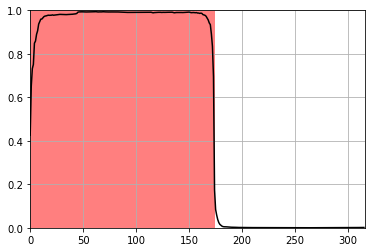

ENST00000647102
recall: 0.8715847134590149
iou: 0.8715847134590149
biotype: processed_transcript
IP_579326  :  {'start': 126, 'stop': 492, 'MS': 1, 'TE': 1, 'frame': 1}
IP_160607  :  {'start': 860, 'stop': 1070, 'MS': 0, 'TE': 0, 'frame': 3}
IP_160610  :  {'start': 903, 'stop': 1167, 'MS': 0, 'TE': 0, 'frame': 1}
IP_160606  :  {'start': 1520, 'stop': 1616, 'MS': 0, 'TE': 1, 'frame': 3}
IP_160609  :  {'start': 1647, 'stop': 1812, 'MS': 0, 'TE': 2, 'frame': 1}
IP_3423033  :  {'start': 1808, 'stop': 1946, 'MS': 0, 'TE': 0, 'frame': 3}


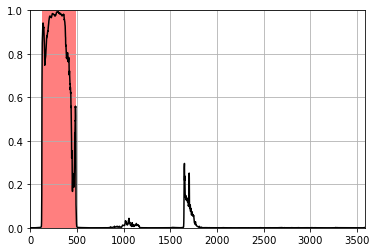

ENST00000643779
recall: 0.868852436542511
iou: 0.7832512259483337
biotype: processed_transcript
IP_579326  :  {'start': 126, 'stop': 492, 'MS': 1, 'TE': 1, 'frame': 1}
IP_160607  :  {'start': 860, 'stop': 1070, 'MS': 0, 'TE': 0, 'frame': 3}
IP_160610  :  {'start': 903, 'stop': 1167, 'MS': 0, 'TE': 0, 'frame': 1}
IP_160606  :  {'start': 1520, 'stop': 1616, 'MS': 0, 'TE': 1, 'frame': 3}
IP_160609  :  {'start': 1647, 'stop': 1812, 'MS': 0, 'TE': 2, 'frame': 1}
IP_3423048  :  {'start': 2493, 'stop': 2691, 'MS': 0, 'TE': 0, 'frame': 1}
IP_3423050  :  {'start': 2519, 'stop': 2669, 'MS': 0, 'TE': 0, 'frame': 3}
IP_3423049  :  {'start': 2668, 'stop': 2932, 'MS': 0, 'TE': 0, 'frame': 2}
IP_3423051  :  {'start': 2948, 'stop': 3038, 'MS': 0, 'TE': 0, 'frame': 3}
IP_160596  :  {'start': 3900, 'stop': 3990, 'MS': 0, 'TE': 0, 'frame': 1}
IP_160599  :  {'start': 4455, 'stop': 4725, 'MS': 1, 'TE': 0, 'frame': 1}


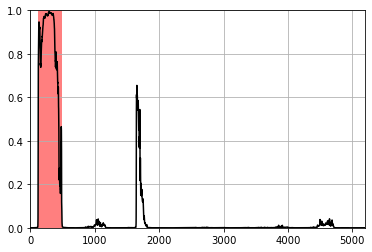

ENST00000644432
recall: 0.868852436542511
iou: 0.8617886304855347
biotype: processed_transcript
IP_579326  :  {'start': 126, 'stop': 492, 'MS': 1, 'TE': 1, 'frame': 1}
IP_160607  :  {'start': 860, 'stop': 1070, 'MS': 0, 'TE': 0, 'frame': 3}
IP_160610  :  {'start': 903, 'stop': 1167, 'MS': 0, 'TE': 0, 'frame': 1}
IP_160606  :  {'start': 1520, 'stop': 1616, 'MS': 0, 'TE': 1, 'frame': 3}
IP_160609  :  {'start': 1647, 'stop': 1812, 'MS': 0, 'TE': 2, 'frame': 1}
IP_3423046  :  {'start': 1875, 'stop': 2139, 'MS': 0, 'TE': 0, 'frame': 1}
IP_3423047  :  {'start': 2360, 'stop': 2504, 'MS': 0, 'TE': 0, 'frame': 3}
IP_3423040  :  {'start': 2493, 'stop': 2610, 'MS': 0, 'TE': 0, 'frame': 1}
IP_3423036  :  {'start': 2714, 'stop': 2810, 'MS': 0, 'TE': 0, 'frame': 3}


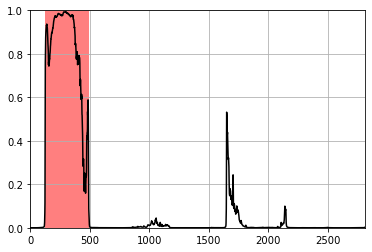

ENST00000643866
recall: 0.8661202192306519
iou: 0.8614130616188049
biotype: processed_transcript
IP_579326  :  {'start': 126, 'stop': 492, 'MS': 1, 'TE': 1, 'frame': 1}
IP_160607  :  {'start': 860, 'stop': 1070, 'MS': 0, 'TE': 0, 'frame': 3}
IP_160610  :  {'start': 903, 'stop': 1167, 'MS': 0, 'TE': 0, 'frame': 1}
IP_160606  :  {'start': 1520, 'stop': 1616, 'MS': 0, 'TE': 1, 'frame': 3}
IP_3423034  :  {'start': 1647, 'stop': 1791, 'MS': 0, 'TE': 0, 'frame': 1}
IP_2931755  :  {'start': 1873, 'stop': 2032, 'MS': 0, 'TE': 0, 'frame': 2}
IP_3423040  :  {'start': 2021, 'stop': 2138, 'MS': 0, 'TE': 0, 'frame': 3}
IP_3423036  :  {'start': 2242, 'stop': 2338, 'MS': 0, 'TE': 0, 'frame': 2}
IP_3423041  :  {'start': 2255, 'stop': 2429, 'MS': 0, 'TE': 0, 'frame': 3}
IP_3423042  :  {'start': 2432, 'stop': 2528, 'MS': 0, 'TE': 0, 'frame': 3}
IP_3423037  :  {'start': 2791, 'stop': 2887, 'MS': 0, 'TE': 0, 'frame': 2}
IP_3423043  :  {'start': 2819, 'stop': 2909, 'MS': 0, 'TE': 0, 'frame': 3}
IP_3423044 

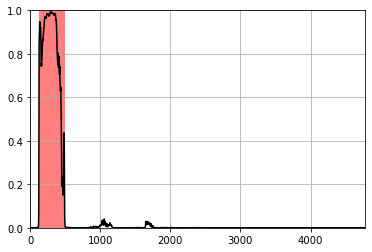

ENST00000607957
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_579511  :  {'start': 274, 'stop': 448, 'MS': 1, 'TE': 1, 'frame': 2}
IP_579515  :  {'start': 278, 'stop': 377, 'MS': 0, 'TE': 0, 'frame': 3}
IP_579513  :  {'start': 604, 'stop': 757, 'MS': 0, 'TE': 0, 'frame': 2}
IP_579512  :  {'start': 841, 'stop': 940, 'MS': 0, 'TE': 0, 'frame': 2}
IP_579514  :  {'start': 1486, 'stop': 1645, 'MS': 0, 'TE': 0, 'frame': 2}
IP_579510  :  {'start': 1767, 'stop': 1878, 'MS': 0, 'TE': 0, 'frame': 1}


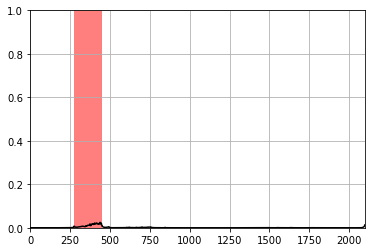

ENST00000610085
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_579942  :  {'start': 944, 'stop': 1205, 'MS': 1, 'TE': 2, 'frame': 3}
IP_579941  :  {'start': 1210, 'stop': 1312, 'MS': 0, 'TE': 0, 'frame': 2}
IP_579940  :  {'start': 1357, 'stop': 1480, 'MS': 0, 'TE': 0, 'frame': 2}
IP_579943  :  {'start': 1910, 'stop': 2006, 'MS': 1, 'TE': 0, 'frame': 3}


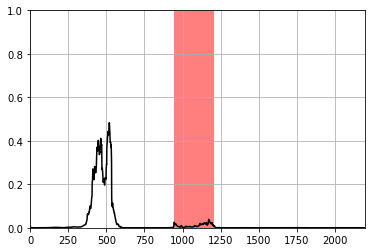

ENST00000425474
recall: 0.9971014261245728
iou: 0.9971014261245728
biotype: processed_transcript
IP_580212  :  {'start': 11, 'stop': 356, 'MS': 1, 'TE': 1, 'frame': 3}
IP_580209  :  {'start': 229, 'stop': 346, 'MS': 0, 'TE': 0, 'frame': 2}
IP_580211  :  {'start': 430, 'stop': 580, 'MS': 0, 'TE': 0, 'frame': 2}
IP_580213  :  {'start': 485, 'stop': 659, 'MS': 0, 'TE': 0, 'frame': 3}


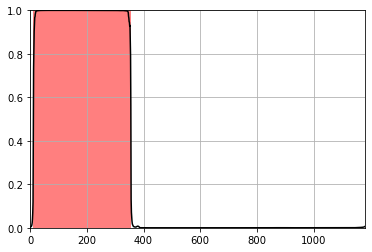

ENST00000393633
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_580765  :  {'start': 18, 'stop': 150, 'MS': 1, 'TE': 1, 'frame': 1}
IP_580764  :  {'start': 180, 'stop': 381, 'MS': 0, 'TE': 0, 'frame': 1}
IP_580767  :  {'start': 702, 'stop': 894, 'MS': 0, 'TE': 0, 'frame': 1}
IP_580757  :  {'start': 1068, 'stop': 1416, 'MS': 0, 'TE': 0, 'frame': 1}
IP_580766  :  {'start': 1881, 'stop': 2193, 'MS': 0, 'TE': 0, 'frame': 1}
IP_580769  :  {'start': 2038, 'stop': 2149, 'MS': 0, 'TE': 0, 'frame': 2}
IP_580770  :  {'start': 2063, 'stop': 2246, 'MS': 0, 'TE': 0, 'frame': 3}
IP_580768  :  {'start': 2577, 'stop': 2745, 'MS': 0, 'TE': 0, 'frame': 1}
IP_580747  :  {'start': 3400, 'stop': 3670, 'MS': 0, 'TE': 0, 'frame': 2}
IP_580750  :  {'start': 3518, 'stop': 3644, 'MS': 0, 'TE': 0, 'frame': 3}
IP_580749  :  {'start': 3703, 'stop': 3802, 'MS': 0, 'TE': 0, 'frame': 2}
IP_580762  :  {'start': 3723, 'stop': 3885, 'MS': 0, 'TE': 0, 'frame': 1}
IP_580761  :  {'start': 4071, 'stop': 4425, 'MS': 0,

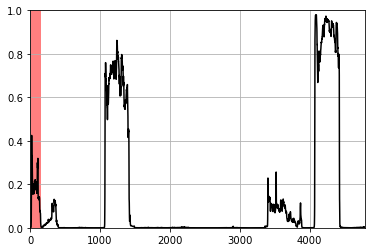

ENST00000485741
recall: 0.9868420958518982
iou: 0.20814061164855957
biotype: processed_transcript
IP_580755  :  {'start': 3, 'stop': 231, 'MS': 1, 'TE': 8, 'frame': 1}
IP_580757  :  {'start': 227, 'stop': 575, 'MS': 0, 'TE': 0, 'frame': 3}
IP_580896  :  {'start': 587, 'stop': 686, 'MS': 0, 'TE': 0, 'frame': 3}
IP_580894  :  {'start': 725, 'stop': 851, 'MS': 0, 'TE': 0, 'frame': 3}
IP_580895  :  {'start': 911, 'stop': 1010, 'MS': 0, 'TE': 0, 'frame': 3}
IP_580901  :  {'start': 1034, 'stop': 1211, 'MS': 0, 'TE': 0, 'frame': 3}
IP_580898  :  {'start': 1500, 'stop': 1629, 'MS': 0, 'TE': 0, 'frame': 1}


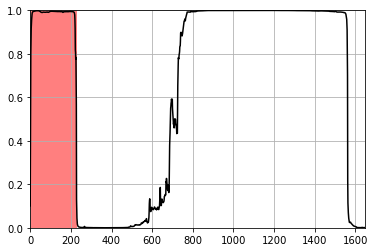

ENST00000388955
recall: 0.9912280440330505
iou: 0.1923404186964035
biotype: processed_transcript
IP_580755  :  {'start': 73, 'stop': 301, 'MS': 1, 'TE': 8, 'frame': 2}
IP_580757  :  {'start': 297, 'stop': 645, 'MS': 0, 'TE': 0, 'frame': 1}
IP_580896  :  {'start': 657, 'stop': 756, 'MS': 0, 'TE': 0, 'frame': 1}
IP_580894  :  {'start': 795, 'stop': 921, 'MS': 0, 'TE': 0, 'frame': 1}
IP_580895  :  {'start': 981, 'stop': 1080, 'MS': 0, 'TE': 0, 'frame': 1}
IP_580897  :  {'start': 1104, 'stop': 1353, 'MS': 0, 'TE': 0, 'frame': 1}
IP_580898  :  {'start': 1642, 'stop': 1771, 'MS': 0, 'TE': 0, 'frame': 2}


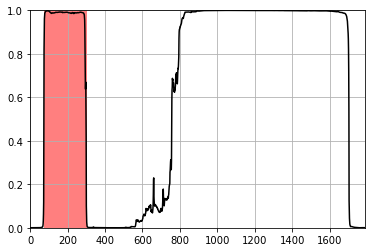

ENST00000381639
recall: 0.014285714365541935
iou: 0.007978723384439945
biotype: processed_transcript
IP_581900  :  {'start': 155, 'stop': 365, 'MS': 6, 'TE': 3, 'frame': 3}
IP_581896  :  {'start': 180, 'stop': 309, 'MS': 0, 'TE': 0, 'frame': 1}
IP_581899  :  {'start': 392, 'stop': 521, 'MS': 1, 'TE': 0, 'frame': 3}
IP_581895  :  {'start': 528, 'stop': 774, 'MS': 0, 'TE': 4, 'frame': 1}
IP_581898  :  {'start': 751, 'stop': 859, 'MS': 0, 'TE': 0, 'frame': 2}
IP_581897  :  {'start': 1026, 'stop': 1134, 'MS': 0, 'TE': 0, 'frame': 1}


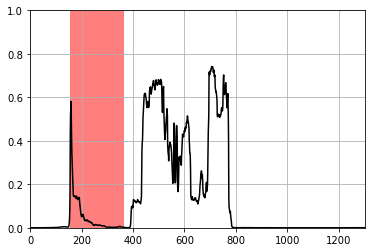

ENST00000406608
recall: 0.6176470518112183
iou: 0.5833333134651184
biotype: processed_transcript
IP_582440  :  {'start': 164, 'stop': 368, 'MS': 1, 'TE': 4, 'frame': 3}
IP_582434  :  {'start': 205, 'stop': 382, 'MS': 0, 'TE': 12, 'frame': 2}


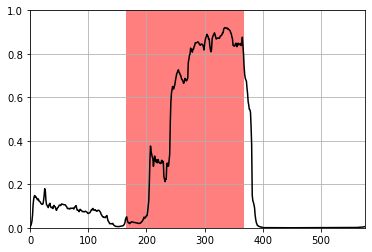

ENST00000483775
recall: 0.3333333432674408
iou: 0.10682492703199387
biotype: processed_transcript
IP_159024  :  {'start': 57, 'stop': 165, 'MS': 1, 'TE': 7, 'frame': 1}
II_583197  :  {'start': 128, 'stop': 395, 'MS': 0, 'TE': 0, 'frame': 3}


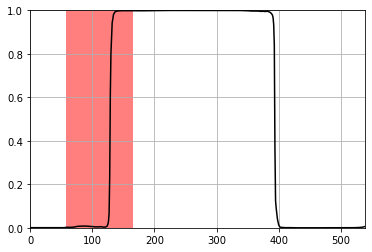

ENST00000482714
recall: 1.0
iou: 0.1968616247177124
biotype: processed_transcript
IP_152262  :  {'start': 250, 'stop': 388, 'MS': 1, 'TE': 3, 'frame': 2}
IP_152263  :  {'start': 497, 'stop': 626, 'MS': 0, 'TE': 0, 'frame': 3}
IP_585581  :  {'start': 625, 'stop': 856, 'MS': 0, 'TE': 0, 'frame': 2}
IP_585572  :  {'start': 671, 'stop': 824, 'MS': 0, 'TE': 0, 'frame': 3}
IP_585571  :  {'start': 884, 'stop': 995, 'MS': 0, 'TE': 0, 'frame': 3}


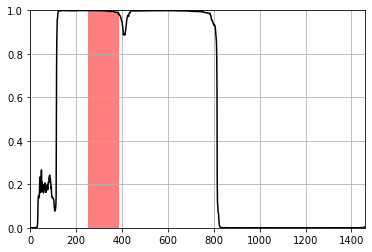

ENST00000472223
recall: 1.0
iou: 0.14435146749019623
biotype: processed_transcript
IP_152262  :  {'start': 395, 'stop': 533, 'MS': 1, 'TE': 3, 'frame': 3}
IP_152263  :  {'start': 642, 'stop': 771, 'MS': 0, 'TE': 0, 'frame': 1}
IP_585572  :  {'start': 816, 'stop': 969, 'MS': 0, 'TE': 0, 'frame': 1}


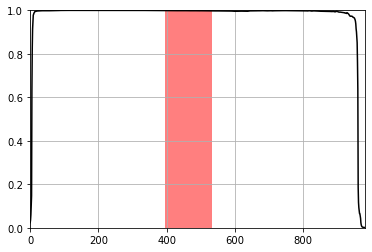

ENST00000560541
recall: 1.0
iou: 0.19731156527996063
biotype: processed_transcript
IP_589712  :  {'start': 216, 'stop': 465, 'MS': 0, 'TE': 0, 'frame': 1}
II_589713  :  {'start': 230, 'stop': 2309, 'MS': 2, 'TE': 0, 'frame': 3}
IP_155509  :  {'start': 813, 'stop': 948, 'MS': 0, 'TE': 2, 'frame': 1}
IP_155511  :  {'start': 1431, 'stop': 1524, 'MS': 0, 'TE': 0, 'frame': 1}
IP_155514  :  {'start': 1647, 'stop': 2058, 'MS': 4, 'TE': 6, 'frame': 1}
IP_155506  :  {'start': 2402, 'stop': 2537, 'MS': 2, 'TE': 0, 'frame': 3}
IP_155508  :  {'start': 2720, 'stop': 2831, 'MS': 0, 'TE': 0, 'frame': 3}
IP_155513  :  {'start': 2820, 'stop': 2946, 'MS': 0, 'TE': 0, 'frame': 1}
IP_155510  :  {'start': 3015, 'stop': 3117, 'MS': 0, 'TE': 0, 'frame': 1}


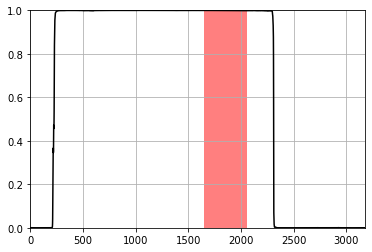

ENST00000508844
recall: 0.42424243688583374
iou: 0.3870967626571655
biotype: processed_transcript
IP_594839  :  {'start': 97, 'stop': 295, 'MS': 1, 'TE': 2, 'frame': 2}
IP_594840  :  {'start': 209, 'stop': 518, 'MS': 0, 'TE': 0, 'frame': 3}


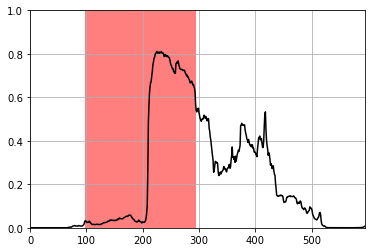

ENST00000463348
recall: 0.16393442451953888
iou: 0.036057692021131516
biotype: processed_transcript
IP_596937  :  {'start': 120, 'stop': 303, 'MS': 7, 'TE': 1, 'frame': 1}
IP_596944  :  {'start': 415, 'stop': 1063, 'MS': 5, 'TE': 0, 'frame': 2}
IP_596934  :  {'start': 741, 'stop': 888, 'MS': 0, 'TE': 0, 'frame': 1}
IP_596949  :  {'start': 1187, 'stop': 1367, 'MS': 0, 'TE': 0, 'frame': 3}
IP_596941  :  {'start': 1405, 'stop': 1561, 'MS': 0, 'TE': 0, 'frame': 2}
IP_596943  :  {'start': 1657, 'stop': 1762, 'MS': 0, 'TE': 0, 'frame': 2}
IP_596939  :  {'start': 1776, 'stop': 1896, 'MS': 0, 'TE': 0, 'frame': 1}
IP_596945  :  {'start': 2233, 'stop': 2329, 'MS': 0, 'TE': 0, 'frame': 2}
IP_596935  :  {'start': 2400, 'stop': 2553, 'MS': 0, 'TE': 0, 'frame': 1}
IP_596950  :  {'start': 2522, 'stop': 2633, 'MS': 0, 'TE': 0, 'frame': 3}
IP_596940  :  {'start': 3040, 'stop': 3280, 'MS': 0, 'TE': 0, 'frame': 2}
IP_596936  :  {'start': 3156, 'stop': 3261, 'MS': 0, 'TE': 0, 'frame': 1}
IP_596946  :  {'s

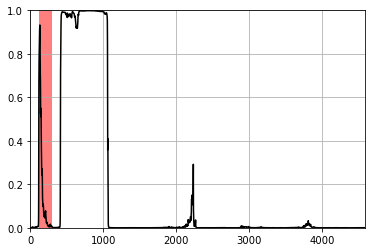

ENST00000529104
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_597259  :  {'start': 5, 'stop': 119, 'MS': 0, 'TE': 1, 'frame': 3}
IP_597256  :  {'start': 111, 'stop': 330, 'MS': 1, 'TE': 1, 'frame': 1}
IP_597260  :  {'start': 326, 'stop': 473, 'MS': 0, 'TE': 0, 'frame': 3}
IP_597254  :  {'start': 522, 'stop': 630, 'MS': 0, 'TE': 1, 'frame': 1}
IP_597255  :  {'start': 747, 'stop': 840, 'MS': 0, 'TE': 0, 'frame': 1}
IP_597261  :  {'start': 851, 'stop': 1223, 'MS': 0, 'TE': 0, 'frame': 3}
IP_597257  :  {'start': 1057, 'stop': 1315, 'MS': 0, 'TE': 0, 'frame': 2}
IP_597258  :  {'start': 1423, 'stop': 1537, 'MS': 0, 'TE': 0, 'frame': 2}


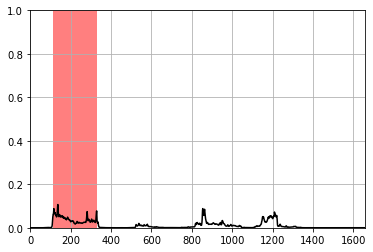

ENST00000483634
recall: 0.7916666865348816
iou: 0.23427866399288177
biotype: processed_transcript
IP_137733  :  {'start': 47, 'stop': 287, 'MS': 3, 'TE': 32, 'frame': 3}
II_601029  :  {'start': 853, 'stop': 1111, 'MS': 0, 'TE': 0, 'frame': 2}


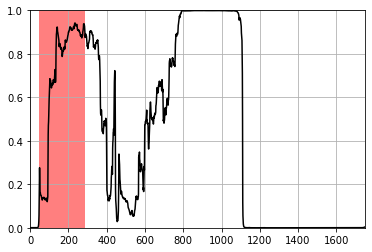

ENST00000514573
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_601757  :  {'start': 68, 'stop': 290, 'MS': 0, 'TE': 0, 'frame': 3}
IP_601756  :  {'start': 160, 'stop': 331, 'MS': 0, 'TE': 0, 'frame': 2}
IP_601755  :  {'start': 279, 'stop': 381, 'MS': 2, 'TE': 1, 'frame': 1}


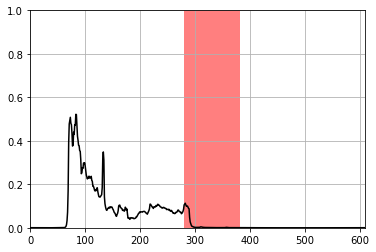

ENST00000514409
recall: 0.8055555820465088
iou: 0.8055555820465088
biotype: processed_transcript
IP_136221  :  {'start': 6, 'stop': 138, 'MS': 0, 'TE': 9, 'frame': 1}
IP_601764  :  {'start': 86, 'stop': 266, 'MS': 2, 'TE': 4, 'frame': 3}
IP_601763  :  {'start': 160, 'stop': 346, 'MS': 0, 'TE': 0, 'frame': 2}


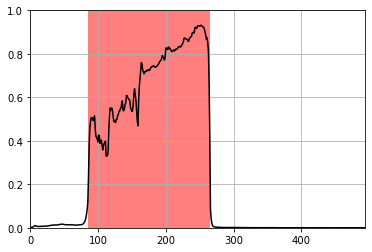

ENST00000499346
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_601749  :  {'start': 78, 'stop': 333, 'MS': 0, 'TE': 15, 'frame': 1}
IP_601764  :  {'start': 393, 'stop': 573, 'MS': 2, 'TE': 4, 'frame': 1}
IP_601763  :  {'start': 467, 'stop': 653, 'MS': 0, 'TE': 0, 'frame': 3}
IP_601765  :  {'start': 960, 'stop': 1056, 'MS': 0, 'TE': 0, 'frame': 1}
IP_601766  :  {'start': 1075, 'stop': 1177, 'MS': 0, 'TE': 0, 'frame': 2}


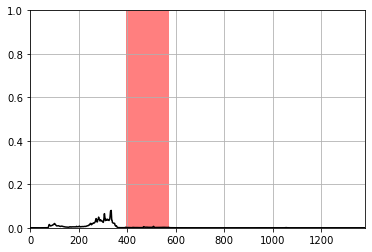

ENST00000514696
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_602802  :  {'start': 195, 'stop': 306, 'MS': 2, 'TE': 1, 'frame': 1}


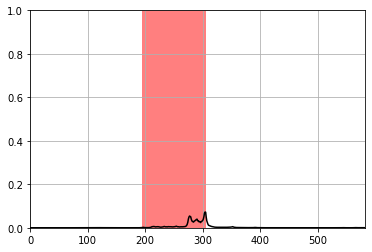

ENST00000507060
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_602799  :  {'start': 123, 'stop': 231, 'MS': 0, 'TE': 0, 'frame': 1}
IP_602802  :  {'start': 338, 'stop': 449, 'MS': 2, 'TE': 1, 'frame': 3}


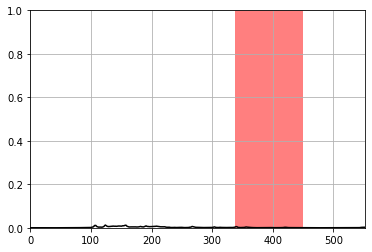

ENST00000515223
recall: 1.0
iou: 0.23649078607559204
biotype: processed_transcript
II_604406  :  {'start': 89, 'stop': 770, 'MS': 0, 'TE': 0, 'frame': 3}
IP_604403  :  {'start': 379, 'stop': 751, 'MS': 2, 'TE': 2, 'frame': 2}
IP_604402  :  {'start': 921, 'stop': 1056, 'MS': 0, 'TE': 0, 'frame': 1}
IP_604397  :  {'start': 1089, 'stop': 1179, 'MS': 0, 'TE': 0, 'frame': 1}
IP_604398  :  {'start': 1380, 'stop': 1506, 'MS': 0, 'TE': 0, 'frame': 1}
IP_604405  :  {'start': 2162, 'stop': 2255, 'MS': 0, 'TE': 0, 'frame': 3}
II_604401  :  {'start': 2568, 'stop': 2910, 'MS': 0, 'TE': 0, 'frame': 1}
IP_604375  :  {'start': 2668, 'stop': 2797, 'MS': 0, 'TE': 0, 'frame': 2}
IP_604378  :  {'start': 2800, 'stop': 3025, 'MS': 0, 'TE': 0, 'frame': 2}
IP_604381  :  {'start': 3025, 'stop': 3124, 'MS': 0, 'TE': 0, 'frame': 2}
IP_604380  :  {'start': 3136, 'stop': 3367, 'MS': 0, 'TE': 0, 'frame': 2}
IP_604400  :  {'start': 3636, 'stop': 3732, 'MS': 0, 'TE': 0, 'frame': 1}
IP_604399  :  {'start': 3768, 'stop

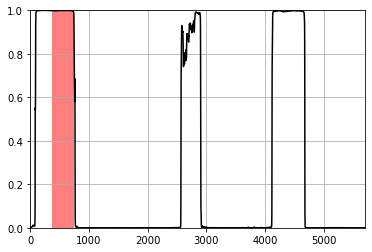

ENST00000314351
recall: 1.0
iou: 0.25664740800857544
biotype: processed_transcript
II_607396  :  {'start': 147, 'stop': 1014, 'MS': 0, 'TE': 1, 'frame': 1}
IP_607397  :  {'start': 271, 'stop': 493, 'MS': 1, 'TE': 1, 'frame': 2}
IP_127712  :  {'start': 656, 'stop': 821, 'MS': 0, 'TE': 0, 'frame': 3}
IP_127711  :  {'start': 1052, 'stop': 1178, 'MS': 0, 'TE': 1, 'frame': 3}


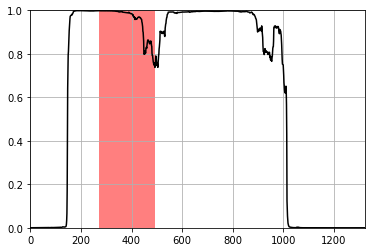

ENST00000503850
recall: 1.0
iou: 0.49146756529808044
biotype: processed_transcript
II_609289  :  {'start': 144, 'stop': 438, 'MS': 0, 'TE': 0, 'frame': 1}
IP_131505  :  {'start': 190, 'stop': 334, 'MS': 1, 'TE': 1, 'frame': 2}
IP_609290  :  {'start': 337, 'stop': 619, 'MS': 2, 'TE': 0, 'frame': 2}
IP_609291  :  {'start': 455, 'stop': 662, 'MS': 0, 'TE': 0, 'frame': 3}
IP_609286  :  {'start': 474, 'stop': 585, 'MS': 0, 'TE': 0, 'frame': 1}


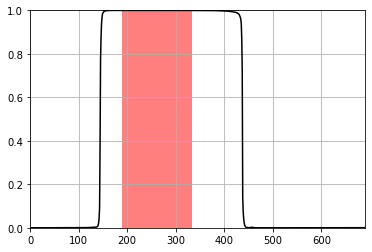

ENST00000507297
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_131378  :  {'start': 39, 'stop': 144, 'MS': 1, 'TE': 3, 'frame': 1}
II_609393  :  {'start': 242, 'stop': 473, 'MS': 0, 'TE': 3, 'frame': 3}
IP_609394  :  {'start': 912, 'stop': 1014, 'MS': 0, 'TE': 0, 'frame': 1}
IP_609401  :  {'start': 937, 'stop': 1246, 'MS': 0, 'TE': 0, 'frame': 2}
IP_609395  :  {'start': 1013, 'stop': 1148, 'MS': 0, 'TE': 0, 'frame': 3}
IP_609397  :  {'start': 1116, 'stop': 1233, 'MS': 0, 'TE': 0, 'frame': 1}
IP_609400  :  {'start': 1305, 'stop': 1398, 'MS': 0, 'TE': 0, 'frame': 1}
II_609402  :  {'start': 1777, 'stop': 2473, 'MS': 1, 'TE': 0, 'frame': 2}
II_131383  :  {'start': 2027, 'stop': 2372, 'MS': 1, 'TE': 0, 'frame': 3}
IP_131382  :  {'start': 2615, 'stop': 2957, 'MS': 0, 'TE': 0, 'frame': 3}
IP_131379  :  {'start': 2796, 'stop': 3039, 'MS': 0, 'TE': 0, 'frame': 1}


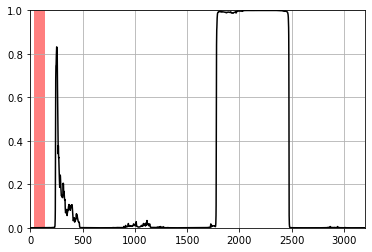

ENST00000514119
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_131378  :  {'start': 99, 'stop': 204, 'MS': 1, 'TE': 3, 'frame': 1}
II_609393  :  {'start': 302, 'stop': 533, 'MS': 0, 'TE': 3, 'frame': 3}
IP_131380  :  {'start': 916, 'stop': 1066, 'MS': 1, 'TE': 0, 'frame': 2}


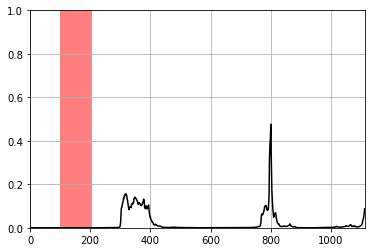

ENST00000506386
recall: 0.3478260934352875
iou: 0.3478260934352875
biotype: processed_transcript
IP_612798  :  {'start': 219, 'stop': 330, 'MS': 0, 'TE': 0, 'frame': 1}
IP_612799  :  {'start': 286, 'stop': 493, 'MS': 1, 'TE': 1, 'frame': 2}


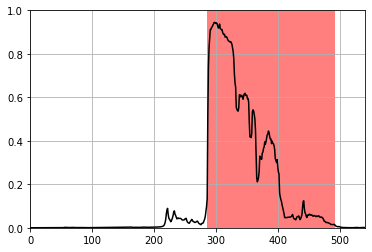

ENST00000478745
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_623370  :  {'start': 49, 'stop': 274, 'MS': 0, 'TE': 0, 'frame': 2}
IP_623373  :  {'start': 104, 'stop': 317, 'MS': 0, 'TE': 0, 'frame': 3}
IP_623372  :  {'start': 323, 'stop': 545, 'MS': 1, 'TE': 1, 'frame': 3}
IP_623371  :  {'start': 626, 'stop': 764, 'MS': 0, 'TE': 0, 'frame': 3}


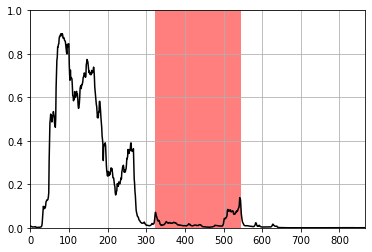

ENST00000429315
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_113824  :  {'start': 109, 'stop': 235, 'MS': 0, 'TE': 2, 'frame': 2}
IP_113819  :  {'start': 288, 'stop': 489, 'MS': 0, 'TE': 0, 'frame': 1}
IP_113816  :  {'start': 380, 'stop': 614, 'MS': 1, 'TE': 1, 'frame': 3}
IP_113820  :  {'start': 876, 'stop': 1032, 'MS': 1, 'TE': 0, 'frame': 1}
IP_113817  :  {'start': 1088, 'stop': 1271, 'MS': 0, 'TE': 0, 'frame': 3}
IP_113822  :  {'start': 1302, 'stop': 1488, 'MS': 1, 'TE': 0, 'frame': 1}
IP_113826  :  {'start': 1453, 'stop': 1627, 'MS': 0, 'TE': 0, 'frame': 2}
IP_113818  :  {'start': 1698, 'stop': 2046, 'MS': 0, 'TE': 0, 'frame': 1}
IP_113823  :  {'start': 1714, 'stop': 1822, 'MS': 0, 'TE': 0, 'frame': 2}
IP_113825  :  {'start': 1951, 'stop': 2137, 'MS': 0, 'TE': 0, 'frame': 2}
IP_624069  :  {'start': 2109, 'stop': 2487, 'MS': 1, 'TE': 0, 'frame': 1}
IP_624075  :  {'start': 2183, 'stop': 2501, 'MS': 0, 'TE': 0, 'frame': 3}
IP_624074  :  {'start': 2738, 'stop': 2900, 'MS': 0,

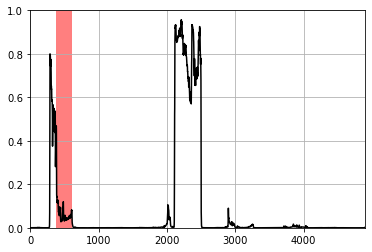

ENST00000521609
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_628087  :  {'start': 75, 'stop': 168, 'MS': 0, 'TE': 2, 'frame': 1}
IP_628088  :  {'start': 89, 'stop': 266, 'MS': 7, 'TE': 3, 'frame': 3}
IP_628091  :  {'start': 488, 'stop': 593, 'MS': 1, 'TE': 0, 'frame': 3}
IP_628096  :  {'start': 552, 'stop': 738, 'MS': 0, 'TE': 0, 'frame': 1}


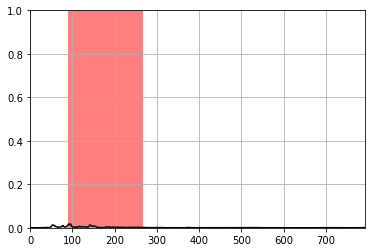

ENST00000522221
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_628087  :  {'start': 66, 'stop': 159, 'MS': 0, 'TE': 2, 'frame': 1}
IP_628088  :  {'start': 80, 'stop': 257, 'MS': 7, 'TE': 3, 'frame': 3}
IP_628091  :  {'start': 479, 'stop': 584, 'MS': 1, 'TE': 0, 'frame': 3}
IP_113548  :  {'start': 543, 'stop': 684, 'MS': 0, 'TE': 0, 'frame': 1}


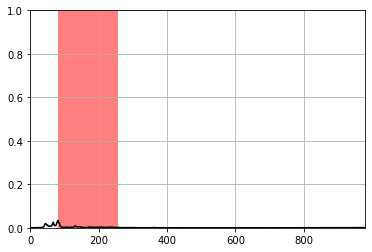

ENST00000520447
recall: 1.0
iou: 0.9125475287437439
biotype: processed_transcript
IP_628093  :  {'start': 142, 'stop': 382, 'MS': 1, 'TE': 5, 'frame': 2}
IP_113548  :  {'start': 341, 'stop': 482, 'MS': 0, 'TE': 0, 'frame': 3}
IP_113544  :  {'start': 895, 'stop': 1042, 'MS': 0, 'TE': 1, 'frame': 2}
IP_113546  :  {'start': 1016, 'stop': 1109, 'MS': 0, 'TE': 0, 'frame': 3}
IP_113542  :  {'start': 1305, 'stop': 1476, 'MS': 0, 'TE': 0, 'frame': 1}


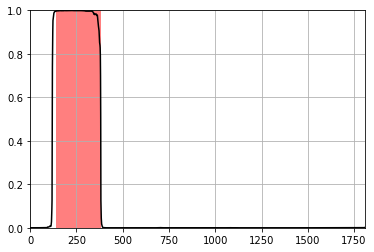

ENST00000491730
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_107660  :  {'start': 172, 'stop': 367, 'MS': 1, 'TE': 1, 'frame': 2}
II_628456  :  {'start': 467, 'stop': 1253, 'MS': 0, 'TE': 0, 'frame': 3}
II_107654  :  {'start': 987, 'stop': 1188, 'MS': 0, 'TE': 0, 'frame': 1}
IP_628455  :  {'start': 1306, 'stop': 1588, 'MS': 0, 'TE': 0, 'frame': 2}


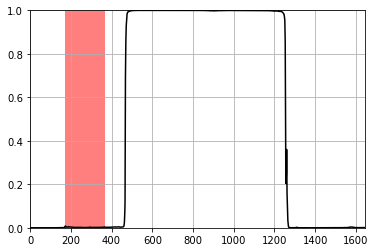

ENST00000473451
recall: 1.0
iou: 0.24401913583278656
biotype: processed_transcript
II_628945  :  {'start': 1, 'stop': 628, 'MS': 0, 'TE': 0, 'frame': 2}
IP_104606  :  {'start': 137, 'stop': 239, 'MS': 1, 'TE': 2, 'frame': 3}
IP_628946  :  {'start': 356, 'stop': 713, 'MS': 1, 'TE': 0, 'frame': 3}
IP_628944  :  {'start': 612, 'stop': 747, 'MS': 0, 'TE': 0, 'frame': 1}
IP_628947  :  {'start': 770, 'stop': 860, 'MS': 0, 'TE': 0, 'frame': 3}


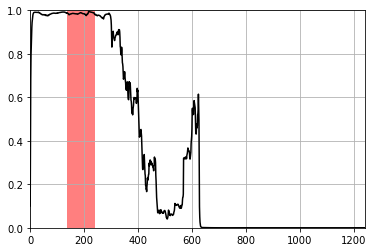

ENST00000484831
recall: 1.0
iou: 0.164682537317276
biotype: processed_transcript
II_629275  :  {'start': 7, 'stop': 868, 'MS': 0, 'TE': 0, 'frame': 2}
IP_104211  :  {'start': 161, 'stop': 410, 'MS': 1, 'TE': 4, 'frame': 3}
IP_104212  :  {'start': 925, 'stop': 1036, 'MS': 0, 'TE': 0, 'frame': 2}
II_629274  :  {'start': 1062, 'stop': 1716, 'MS': 0, 'TE': 0, 'frame': 1}
II_104225  :  {'start': 1529, 'stop': 1661, 'MS': 0, 'TE': 0, 'frame': 3}


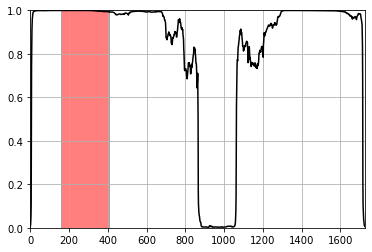

ENST00000471721
recall: 0.6161616444587708
iou: 0.24696356058120728
biotype: processed_transcript
IP_103529  :  {'start': 168, 'stop': 267, 'MS': 1, 'TE': 1, 'frame': 1}
IP_629754  :  {'start': 347, 'stop': 443, 'MS': 0, 'TE': 0, 'frame': 3}


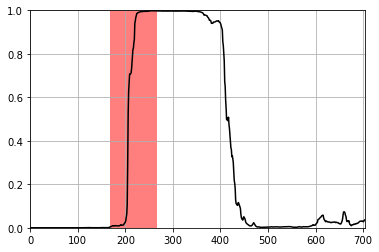

ENST00000475470
recall: 0.7096773982048035
iou: 0.15102975070476532
biotype: processed_transcript
IP_632233  :  {'start': 74, 'stop': 290, 'MS': 0, 'TE': 0, 'frame': 3}
IP_632248  :  {'start': 683, 'stop': 788, 'MS': 0, 'TE': 0, 'frame': 3}
IP_632244  :  {'start': 963, 'stop': 1077, 'MS': 3, 'TE': 0, 'frame': 1}
IP_632246  :  {'start': 1095, 'stop': 1203, 'MS': 0, 'TE': 0, 'frame': 1}
IP_632247  :  {'start': 1315, 'stop': 1423, 'MS': 0, 'TE': 0, 'frame': 2}
II_632245  :  {'start': 1386, 'stop': 1899, 'MS': 2, 'TE': 0, 'frame': 1}
IP_100486  :  {'start': 1660, 'stop': 1753, 'MS': 1, 'TE': 3, 'frame': 2}


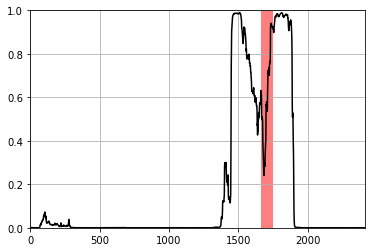

ENST00000418474
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_636020  :  {'start': 898, 'stop': 1069, 'MS': 2, 'TE': 3, 'frame': 2}
IP_636021  :  {'start': 1072, 'stop': 1177, 'MS': 0, 'TE': 1, 'frame': 2}


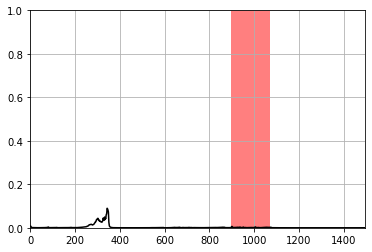

ENST00000608069
recall: 0.12745098769664764
iou: 0.12745098769664764
biotype: processed_transcript
IP_638587  :  {'start': 122, 'stop': 428, 'MS': 1, 'TE': 1, 'frame': 3}
IP_638586  :  {'start': 610, 'stop': 712, 'MS': 0, 'TE': 0, 'frame': 2}


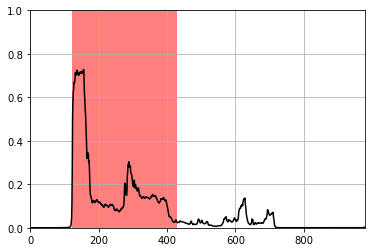

ENST00000505973
recall: 0.9300518035888672
iou: 0.9292493462562561
biotype: processed_transcript
II_641498  :  {'start': 239, 'stop': 545, 'MS': 0, 'TE': 0, 'frame': 3}
IP_641497  :  {'start': 276, 'stop': 1434, 'MS': 2, 'TE': 2, 'frame': 1}


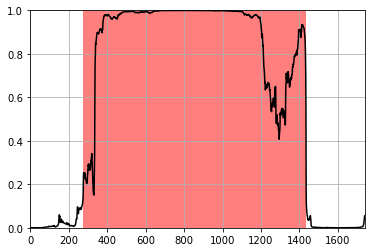

ENST00000460355
recall: 0.9919678568840027
iou: 0.7296898365020752
biotype: processed_transcript
IP_642258  :  {'start': 136, 'stop': 316, 'MS': 0, 'TE': 0, 'frame': 2}
IP_642254  :  {'start': 540, 'stop': 633, 'MS': 0, 'TE': 0, 'frame': 1}
IP_642255  :  {'start': 1104, 'stop': 1242, 'MS': 0, 'TE': 0, 'frame': 1}
IP_642257  :  {'start': 1147, 'stop': 1252, 'MS': 1, 'TE': 0, 'frame': 2}
IP_642261  :  {'start': 1235, 'stop': 1361, 'MS': 0, 'TE': 0, 'frame': 3}
IP_642260  :  {'start': 1342, 'stop': 1453, 'MS': 0, 'TE': 0, 'frame': 2}
IP_094220  :  {'start': 2365, 'stop': 2473, 'MS': 0, 'TE': 0, 'frame': 2}
IP_642256  :  {'start': 2850, 'stop': 2940, 'MS': 0, 'TE': 0, 'frame': 1}
IP_634997  :  {'start': 3039, 'stop': 3537, 'MS': 2, 'TE': 26, 'frame': 1}
IP_642259  :  {'start': 3463, 'stop': 3580, 'MS': 0, 'TE': 0, 'frame': 2}


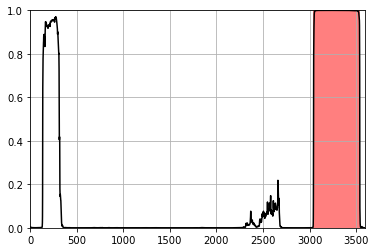

ENST00000494741
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_086851  :  {'start': 10, 'stop': 121, 'MS': 1, 'TE': 18, 'frame': 2}
II_646499  :  {'start': 129, 'stop': 360, 'MS': 0, 'TE': 0, 'frame': 1}
IP_086850  :  {'start': 404, 'stop': 692, 'MS': 0, 'TE': 0, 'frame': 3}


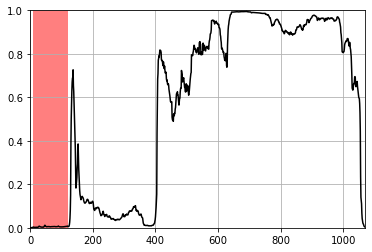

ENST00000637765
recall: 1.0
iou: 0.09959931671619415
biotype: processed_transcript
IP_091126  :  {'start': 224, 'stop': 398, 'MS': 1, 'TE': 1, 'frame': 3}
IP_647688  :  {'start': 872, 'stop': 971, 'MS': 0, 'TE': 0, 'frame': 3}
IP_647679  :  {'start': 936, 'stop': 1095, 'MS': 0, 'TE': 0, 'frame': 1}
II_647678  :  {'start': 1542, 'stop': 1635, 'MS': 0, 'TE': 0, 'frame': 1}
IP_647689  :  {'start': 1631, 'stop': 1952, 'MS': 0, 'TE': 0, 'frame': 3}
II_3419473  :  {'start': 1995, 'stop': 2880, 'MS': 0, 'TE': 0, 'frame': 1}
IP_091105  :  {'start': 2692, 'stop': 2953, 'MS': 0, 'TE': 0, 'frame': 2}


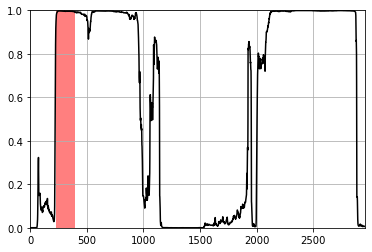

ENST00000637687
recall: 0.524904191493988
iou: 0.28016358613967896
biotype: processed_transcript


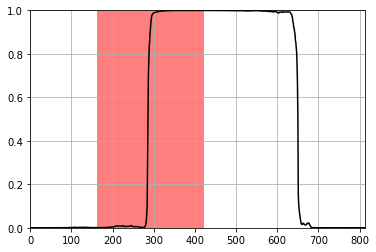

ENST00000635902
recall: 0.532567024230957
iou: 0.28600823879241943
biotype: processed_transcript


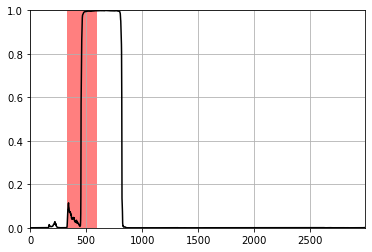

ENST00000637858
recall: 0.5287356376647949
iou: 0.2833675444126129
biotype: processed_transcript


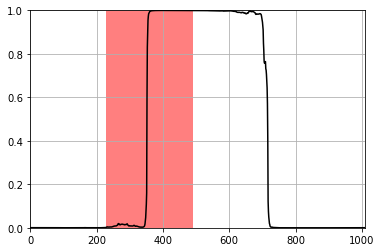

ENST00000354451
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_652665  :  {'start': 5, 'stop': 155, 'MS': 1, 'TE': 14, 'frame': 3}
IP_652660  :  {'start': 180, 'stop': 282, 'MS': 0, 'TE': 0, 'frame': 1}
IP_652663  :  {'start': 193, 'stop': 457, 'MS': 0, 'TE': 0, 'frame': 2}
IP_652666  :  {'start': 557, 'stop': 848, 'MS': 0, 'TE': 0, 'frame': 3}
IP_652662  :  {'start': 726, 'stop': 885, 'MS': 0, 'TE': 0, 'frame': 1}
IP_652664  :  {'start': 1079, 'stop': 1196, 'MS': 0, 'TE': 0, 'frame': 3}


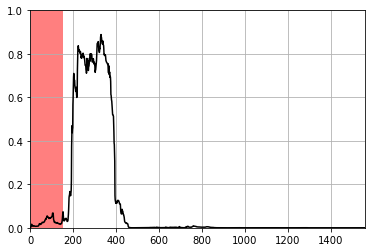

ENST00000485587
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_294028  :  {'start': 107, 'stop': 215, 'MS': 1, 'TE': 1, 'frame': 3}
IP_294033  :  {'start': 316, 'stop': 661, 'MS': 0, 'TE': 0, 'frame': 2}
IP_655303  :  {'start': 660, 'stop': 963, 'MS': 0, 'TE': 0, 'frame': 1}
IP_655313  :  {'start': 1385, 'stop': 1475, 'MS': 0, 'TE': 0, 'frame': 3}
IP_655307  :  {'start': 1885, 'stop': 1987, 'MS': 0, 'TE': 0, 'frame': 2}
IP_655304  :  {'start': 1923, 'stop': 2100, 'MS': 0, 'TE': 0, 'frame': 1}
IP_655308  :  {'start': 2215, 'stop': 2311, 'MS': 0, 'TE': 0, 'frame': 2}
IP_655314  :  {'start': 2486, 'stop': 2681, 'MS': 0, 'TE': 0, 'frame': 3}
IP_655310  :  {'start': 2798, 'stop': 2951, 'MS': 1, 'TE': 0, 'frame': 3}
II_655306  :  {'start': 2802, 'stop': 3117, 'MS': 0, 'TE': 0, 'frame': 1}
IP_655309  :  {'start': 3157, 'stop': 3322, 'MS': 0, 'TE': 0, 'frame': 2}
IP_294035  :  {'start': 3359, 'stop': 3503, 'MS': 0, 'TE': 0, 'frame': 3}
IP_655312  :  {'start': 4289, 'stop': 4415, 'MS': 0

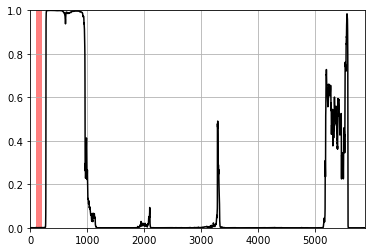

ENST00000427147
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_291526  :  {'start': 145, 'stop': 253, 'MS': 1, 'TE': 11, 'frame': 2}
IP_291527  :  {'start': 170, 'stop': 326, 'MS': 0, 'TE': 0, 'frame': 3}
II_656368  :  {'start': 366, 'stop': 786, 'MS': 0, 'TE': 0, 'frame': 1}
IP_656367  :  {'start': 518, 'stop': 767, 'MS': 1, 'TE': 0, 'frame': 3}


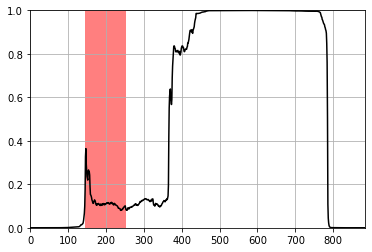

ENST00000425458
recall: 0.7685185074806213
iou: 0.12968750298023224
biotype: processed_transcript
IP_291526  :  {'start': 33, 'stop': 141, 'MS': 1, 'TE': 11, 'frame': 1}
IP_291527  :  {'start': 58, 'stop': 214, 'MS': 0, 'TE': 0, 'frame': 2}
II_656368  :  {'start': 254, 'stop': 674, 'MS': 0, 'TE': 0, 'frame': 3}
IP_656367  :  {'start': 406, 'stop': 655, 'MS': 1, 'TE': 0, 'frame': 2}


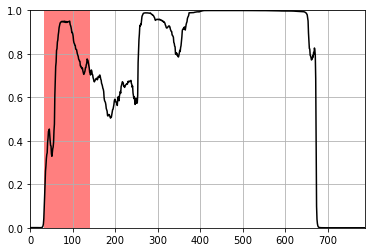

ENST00000618859
recall: 0.7685185074806213
iou: 0.12989045679569244
biotype: processed_transcript
IP_291526  :  {'start': 33, 'stop': 141, 'MS': 1, 'TE': 11, 'frame': 1}
IP_291527  :  {'start': 58, 'stop': 214, 'MS': 0, 'TE': 0, 'frame': 2}
II_656368  :  {'start': 254, 'stop': 674, 'MS': 0, 'TE': 0, 'frame': 3}
IP_656367  :  {'start': 406, 'stop': 655, 'MS': 1, 'TE': 0, 'frame': 2}


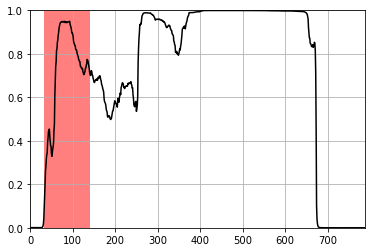

ENST00000467228
recall: 0.9599999785423279
iou: 0.5403376817703247
biotype: processed_transcript
IP_291352  :  {'start': 92, 'stop': 392, 'MS': 2, 'TE': 1, 'frame': 3}
IP_659208  :  {'start': 977, 'stop': 1127, 'MS': 0, 'TE': 0, 'frame': 3}
IP_659209  :  {'start': 1214, 'stop': 1349, 'MS': 0, 'TE': 0, 'frame': 3}
IP_659207  :  {'start': 1288, 'stop': 1480, 'MS': 0, 'TE': 0, 'frame': 2}
II_659211  :  {'start': 1589, 'stop': 1925, 'MS': 0, 'TE': 0, 'frame': 3}
IP_659205  :  {'start': 1713, 'stop': 1878, 'MS': 0, 'TE': 0, 'frame': 1}
IP_659204  :  {'start': 2064, 'stop': 2364, 'MS': 0, 'TE': 0, 'frame': 1}
IP_659206  :  {'start': 2098, 'stop': 2269, 'MS': 1, 'TE': 0, 'frame': 2}
IP_659210  :  {'start': 2156, 'stop': 2282, 'MS': 0, 'TE': 0, 'frame': 3}


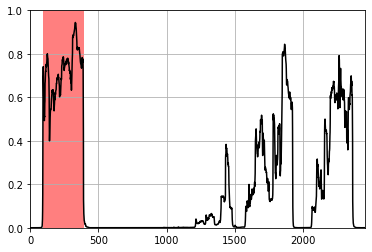

ENST00000441095
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_659340  :  {'start': 45, 'stop': 174, 'MS': 1, 'TE': 1, 'frame': 1}
IP_659337  :  {'start': 288, 'stop': 396, 'MS': 0, 'TE': 1, 'frame': 1}
IP_659335  :  {'start': 328, 'stop': 613, 'MS': 0, 'TE': 0, 'frame': 2}
IP_659336  :  {'start': 479, 'stop': 608, 'MS': 0, 'TE': 0, 'frame': 3}
IP_659341  :  {'start': 609, 'stop': 789, 'MS': 0, 'TE': 0, 'frame': 1}
IP_659367  :  {'start': 848, 'stop': 965, 'MS': 0, 'TE': 0, 'frame': 3}
IP_659363  :  {'start': 977, 'stop': 1118, 'MS': 0, 'TE': 0, 'frame': 3}
IP_659356  :  {'start': 1375, 'stop': 1498, 'MS': 0, 'TE': 0, 'frame': 2}
IP_659339  :  {'start': 1413, 'stop': 1524, 'MS': 0, 'TE': 0, 'frame': 1}
IP_659360  :  {'start': 1775, 'stop': 2159, 'MS': 0, 'TE': 0, 'frame': 3}
IP_659354  :  {'start': 1813, 'stop': 1948, 'MS': 0, 'TE': 0, 'frame': 2}
IP_659349  :  {'start': 1893, 'stop': 2325, 'MS': 0, 'TE': 0, 'frame': 1}
IP_659366  :  {'start': 2321, 'stop': 2417, 'MS': 0, 'TE': 

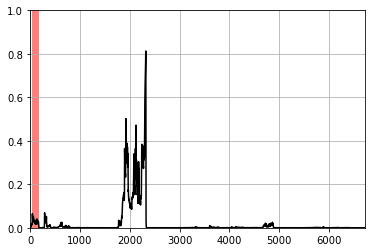

ENST00000485067
recall: 0.5306122303009033
iou: 0.13109244406223297
biotype: processed_transcript
IP_661269  :  {'start': 82, 'stop': 358, 'MS': 1, 'TE': 0, 'frame': 2}
IP_661271  :  {'start': 134, 'stop': 338, 'MS': 0, 'TE': 0, 'frame': 3}
IP_661267  :  {'start': 228, 'stop': 381, 'MS': 0, 'TE': 0, 'frame': 1}
IP_661273  :  {'start': 383, 'stop': 485, 'MS': 0, 'TE': 0, 'frame': 3}
IP_661270  :  {'start': 974, 'stop': 1064, 'MS': 0, 'TE': 0, 'frame': 3}
IP_661268  :  {'start': 1227, 'stop': 1356, 'MS': 0, 'TE': 0, 'frame': 1}
II_661272  :  {'start': 1637, 'stop': 1958, 'MS': 0, 'TE': 0, 'frame': 3}
IP_288717  :  {'start': 1770, 'stop': 1917, 'MS': 1, 'TE': 1, 'frame': 1}
IP_288718  :  {'start': 1941, 'stop': 2034, 'MS': 0, 'TE': 0, 'frame': 1}


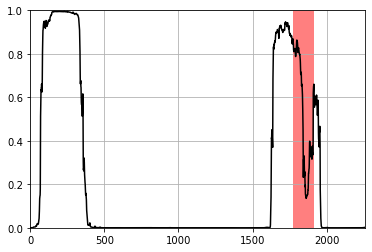

ENST00000486875
recall: 1.0
iou: 0.3041474521160126
biotype: processed_transcript
II_665151  :  {'start': 45, 'stop': 480, 'MS': 0, 'TE': 0, 'frame': 1}
IP_282382  :  {'start': 127, 'stop': 259, 'MS': 2, 'TE': 1, 'frame': 2}
IP_665152  :  {'start': 239, 'stop': 362, 'MS': 0, 'TE': 0, 'frame': 3}


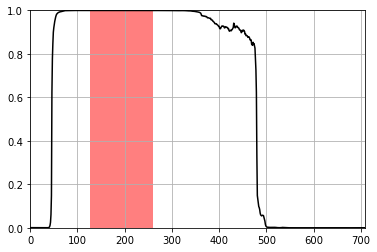

ENST00000448264
recall: 0.04285714402794838
iou: 0.03765690326690674
biotype: processed_transcript
IP_666946  :  {'start': 8, 'stop': 119, 'MS': 1, 'TE': 1, 'frame': 3}
IP_666942  :  {'start': 132, 'stop': 231, 'MS': 1, 'TE': 3, 'frame': 1}
IP_666943  :  {'start': 220, 'stop': 502, 'MS': 0, 'TE': 0, 'frame': 2}
IP_666949  :  {'start': 419, 'stop': 524, 'MS': 0, 'TE': 1, 'frame': 3}
IP_666947  :  {'start': 785, 'stop': 890, 'MS': 0, 'TE': 0, 'frame': 3}
IP_666948  :  {'start': 911, 'stop': 1109, 'MS': 1, 'TE': 0, 'frame': 3}
IP_666944  :  {'start': 1030, 'stop': 1180, 'MS': 0, 'TE': 0, 'frame': 2}
IP_666945  :  {'start': 1372, 'stop': 1492, 'MS': 0, 'TE': 0, 'frame': 2}


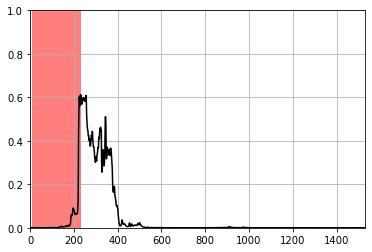

ENST00000456105
recall: 0.1878787875175476
iou: 0.10097719728946686
biotype: processed_transcript
IP_667079  :  {'start': 373, 'stop': 538, 'MS': 12, 'TE': 1, 'frame': 2}
IP_667082  :  {'start': 407, 'stop': 614, 'MS': 16, 'TE': 0, 'frame': 3}
IP_667080  :  {'start': 610, 'stop': 703, 'MS': 0, 'TE': 0, 'frame': 2}
IP_667083  :  {'start': 726, 'stop': 834, 'MS': 0, 'TE': 0, 'frame': 1}
IP_667081  :  {'start': 919, 'stop': 1147, 'MS': 1, 'TE': 0, 'frame': 2}
IP_667084  :  {'start': 1104, 'stop': 1461, 'MS': 0, 'TE': 0, 'frame': 1}
IP_667086  :  {'start': 1396, 'stop': 1540, 'MS': 0, 'TE': 0, 'frame': 2}
IP_667085  :  {'start': 1689, 'stop': 1902, 'MS': 0, 'TE': 0, 'frame': 1}
IP_667087  :  {'start': 2035, 'stop': 2230, 'MS': 0, 'TE': 0, 'frame': 2}


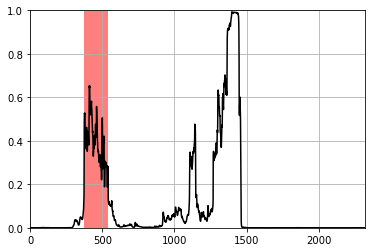

ENST00000476232
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_668060  :  {'start': 261, 'stop': 420, 'MS': 1, 'TE': 3, 'frame': 1}
IP_668065  :  {'start': 298, 'stop': 442, 'MS': 0, 'TE': 0, 'frame': 2}
IP_668062  :  {'start': 445, 'stop': 676, 'MS': 0, 'TE': 0, 'frame': 2}
IP_668069  :  {'start': 590, 'stop': 761, 'MS': 0, 'TE': 0, 'frame': 3}
IP_668066  :  {'start': 775, 'stop': 976, 'MS': 0, 'TE': 0, 'frame': 2}
IP_668067  :  {'start': 1472, 'stop': 1712, 'MS': 0, 'TE': 0, 'frame': 3}
IP_668064  :  {'start': 1990, 'stop': 2149, 'MS': 0, 'TE': 0, 'frame': 2}
IP_668061  :  {'start': 2037, 'stop': 2163, 'MS': 0, 'TE': 0, 'frame': 1}
IP_668059  :  {'start': 2343, 'stop': 2433, 'MS': 0, 'TE': 0, 'frame': 1}
IP_668063  :  {'start': 2494, 'stop': 2611, 'MS': 0, 'TE': 0, 'frame': 2}
IP_668068  :  {'start': 2705, 'stop': 2903, 'MS': 0, 'TE': 0, 'frame': 3}


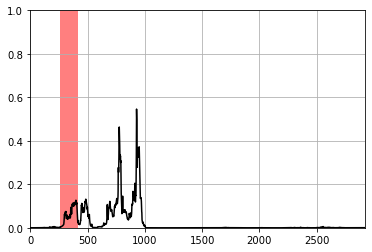

ENST00000459805
recall: 1.0
iou: 0.350054532289505
biotype: processed_transcript
IP_669208  :  {'start': 50, 'stop': 173, 'MS': 0, 'TE': 0, 'frame': 3}
IP_669206  :  {'start': 461, 'stop': 659, 'MS': 1, 'TE': 0, 'frame': 3}
IP_669196  :  {'start': 664, 'stop': 832, 'MS': 0, 'TE': 0, 'frame': 2}
IP_669199  :  {'start': 774, 'stop': 876, 'MS': 0, 'TE': 0, 'frame': 1}
IP_669209  :  {'start': 1067, 'stop': 1349, 'MS': 2, 'TE': 0, 'frame': 3}
IP_669207  :  {'start': 1394, 'stop': 1565, 'MS': 0, 'TE': 0, 'frame': 3}
IP_669205  :  {'start': 1773, 'stop': 2094, 'MS': 2, 'TE': 1, 'frame': 1}
IP_669190  :  {'start': 2056, 'stop': 2167, 'MS': 0, 'TE': 0, 'frame': 2}
IP_669193  :  {'start': 2126, 'stop': 2375, 'MS': 1, 'TE': 0, 'frame': 3}
IP_071411  :  {'start': 2280, 'stop': 2481, 'MS': 0, 'TE': 0, 'frame': 1}
IP_071412  :  {'start': 2616, 'stop': 2706, 'MS': 0, 'TE': 0, 'frame': 1}


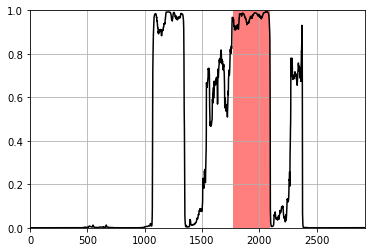

ENST00000440377
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_669462  :  {'start': 28, 'stop': 145, 'MS': 0, 'TE': 2, 'frame': 2}
IP_069479  :  {'start': 429, 'stop': 648, 'MS': 1, 'TE': 3, 'frame': 1}
IP_669461  :  {'start': 1164, 'stop': 1347, 'MS': 0, 'TE': 1, 'frame': 1}


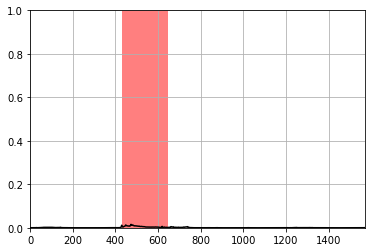

ENST00000488745
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_671206  :  {'start': 474, 'stop': 567, 'MS': 0, 'TE': 0, 'frame': 1}
IP_671205  :  {'start': 711, 'stop': 819, 'MS': 0, 'TE': 0, 'frame': 1}
IP_080598  :  {'start': 971, 'stop': 1073, 'MS': 1, 'TE': 2, 'frame': 3}
IP_080601  :  {'start': 1174, 'stop': 1333, 'MS': 0, 'TE': 0, 'frame': 2}


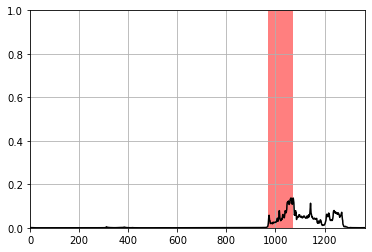

ENST00000648127
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_671206  :  {'start': 477, 'stop': 570, 'MS': 0, 'TE': 0, 'frame': 1}
IP_671205  :  {'start': 714, 'stop': 822, 'MS': 0, 'TE': 0, 'frame': 1}
IP_080600  :  {'start': 1244, 'stop': 1394, 'MS': 0, 'TE': 8, 'frame': 3}
IP_080598  :  {'start': 1474, 'stop': 1576, 'MS': 1, 'TE': 2, 'frame': 2}
IP_080601  :  {'start': 1677, 'stop': 1836, 'MS': 0, 'TE': 0, 'frame': 1}


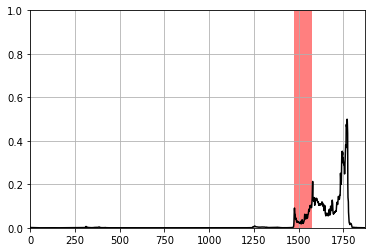

ENST00000635081
recall: 0.9344262480735779
iou: 0.37665197253227234
biotype: processed_transcript
IP_671758  :  {'start': 63, 'stop': 339, 'MS': 2, 'TE': 0, 'frame': 1}
IP_671756  :  {'start': 121, 'stop': 487, 'MS': 19, 'TE': 2, 'frame': 2}
II_671761  :  {'start': 1081, 'stop': 1417, 'MS': 1, 'TE': 0, 'frame': 2}


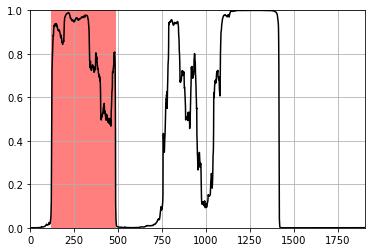

ENST00000362058
recall: 0.8224043846130371
iou: 0.6044176816940308
biotype: processed_transcript
IP_671758  :  {'start': 74, 'stop': 350, 'MS': 2, 'TE': 0, 'frame': 3}
IP_671756  :  {'start': 132, 'stop': 498, 'MS': 19, 'TE': 2, 'frame': 1}
IP_671757  :  {'start': 1228, 'stop': 1381, 'MS': 0, 'TE': 0, 'frame': 2}
IP_671760  :  {'start': 1349, 'stop': 1460, 'MS': 0, 'TE': 0, 'frame': 3}
IP_671759  :  {'start': 1559, 'stop': 1721, 'MS': 0, 'TE': 0, 'frame': 3}


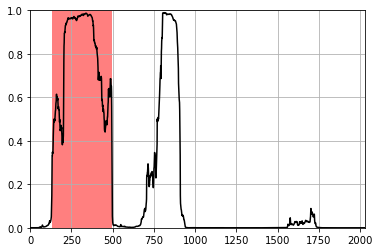

ENST00000472448
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_672294  :  {'start': 5, 'stop': 161, 'MS': 0, 'TE': 0, 'frame': 3}
IP_672292  :  {'start': 84, 'stop': 231, 'MS': 1, 'TE': 1, 'frame': 1}
IP_672293  :  {'start': 322, 'stop': 514, 'MS': 0, 'TE': 1, 'frame': 2}


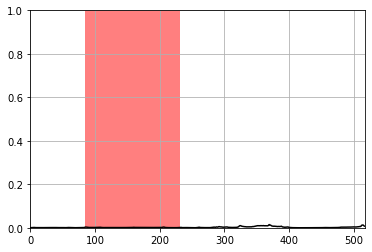

ENST00000638952
recall: 1.0
iou: 0.2114330530166626
biotype: processed_transcript
II_3436387  :  {'start': 231, 'stop': 1116, 'MS': 0, 'TE': 0, 'frame': 1}
IP_079724  :  {'start': 658, 'stop': 820, 'MS': 0, 'TE': 0, 'frame': 2}
IP_673672  :  {'start': 988, 'stop': 1138, 'MS': 0, 'TE': 0, 'frame': 2}
IP_673671  :  {'start': 1147, 'stop': 1264, 'MS': 0, 'TE': 0, 'frame': 2}
IP_3418036  :  {'start': 1925, 'stop': 2066, 'MS': 0, 'TE': 0, 'frame': 3}
IP_079725  :  {'start': 3478, 'stop': 3661, 'MS': 1, 'TE': 0, 'frame': 2}
IP_079723  :  {'start': 4177, 'stop': 4717, 'MS': 6, 'TE': 1, 'frame': 2}
IP_079731  :  {'start': 4661, 'stop': 4772, 'MS': 1, 'TE': 0, 'frame': 3}
IP_079721  :  {'start': 4999, 'stop': 5119, 'MS': 0, 'TE': 0, 'frame': 2}
IP_079729  :  {'start': 5510, 'stop': 5603, 'MS': 1, 'TE': 0, 'frame': 3}


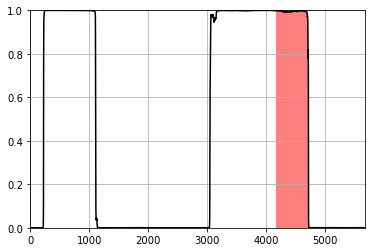

ENST00000476241
recall: 1.0
iou: 0.2161729335784912
biotype: processed_transcript
II_673670  :  {'start': 185, 'stop': 1013, 'MS': 0, 'TE': 0, 'frame': 3}
IP_079724  :  {'start': 612, 'stop': 774, 'MS': 0, 'TE': 0, 'frame': 1}
IP_673672  :  {'start': 885, 'stop': 1035, 'MS': 0, 'TE': 0, 'frame': 1}
IP_673671  :  {'start': 1044, 'stop': 1161, 'MS': 0, 'TE': 0, 'frame': 1}
IP_3418036  :  {'start': 1822, 'stop': 1963, 'MS': 0, 'TE': 0, 'frame': 2}
IP_079725  :  {'start': 3375, 'stop': 3558, 'MS': 1, 'TE': 0, 'frame': 1}
IP_079723  :  {'start': 4074, 'stop': 4614, 'MS': 6, 'TE': 1, 'frame': 1}
IP_079731  :  {'start': 4558, 'stop': 4669, 'MS': 1, 'TE': 0, 'frame': 2}


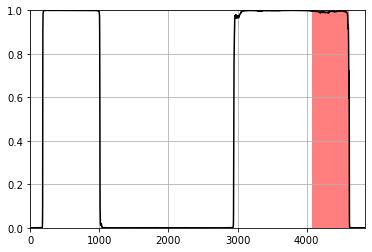

ENST00000479589
recall: 0.28691983222961426
iou: 0.28691983222961426
biotype: processed_transcript
II_674964  :  {'start': 21, 'stop': 234, 'MS': 0, 'TE': 2, 'frame': 1}
II_674963  :  {'start': 266, 'stop': 479, 'MS': 0, 'TE': 1, 'frame': 3}
IP_077426  :  {'start': 294, 'stop': 531, 'MS': 2, 'TE': 2, 'frame': 1}
IP_077424  :  {'start': 596, 'stop': 689, 'MS': 0, 'TE': 0, 'frame': 3}


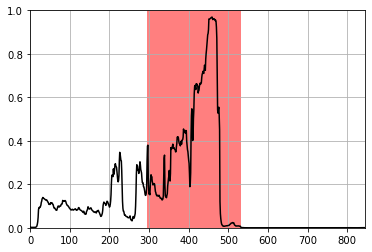

ENST00000462880
recall: 0.0
iou: 0.0
biotype: processed_transcript
II_678064  :  {'start': 30, 'stop': 192, 'MS': 0, 'TE': 1, 'frame': 1}
IP_070724  :  {'start': 188, 'stop': 302, 'MS': 1, 'TE': 2, 'frame': 3}
IP_070723  :  {'start': 730, 'stop': 835, 'MS': 0, 'TE': 0, 'frame': 2}


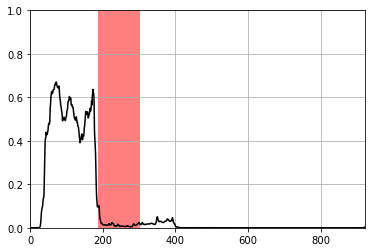

ENST00000489020
recall: 0.0
iou: 0.0
biotype: processed_transcript
II_684497  :  {'start': 242, 'stop': 350, 'MS': 3, 'TE': 1, 'frame': 3}
IP_060053  :  {'start': 415, 'stop': 577, 'MS': 4, 'TE': 2, 'frame': 2}


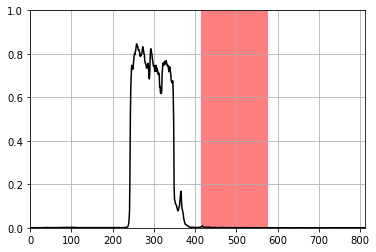

ENST00000480661
recall: 0.4615384638309479
iou: 0.4137931168079376
biotype: processed_transcript
IP_686227  :  {'start': 8, 'stop': 320, 'MS': 8, 'TE': 2, 'frame': 3}
IP_686223  :  {'start': 898, 'stop': 1075, 'MS': 0, 'TE': 0, 'frame': 2}
IP_686225  :  {'start': 1454, 'stop': 1550, 'MS': 0, 'TE': 0, 'frame': 3}
IP_686222  :  {'start': 1569, 'stop': 1731, 'MS': 0, 'TE': 0, 'frame': 1}
IP_686224  :  {'start': 1591, 'stop': 1699, 'MS': 0, 'TE': 0, 'frame': 2}
IP_686226  :  {'start': 1727, 'stop': 1823, 'MS': 0, 'TE': 0, 'frame': 3}


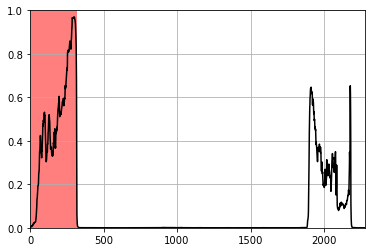

ENST00000485984
recall: 0.3096774220466614
iou: 0.09600000083446503
biotype: processed_transcript
IP_686430  :  {'start': 213, 'stop': 369, 'MS': 0, 'TE': 0, 'frame': 1}
IP_686433  :  {'start': 227, 'stop': 461, 'MS': 0, 'TE': 0, 'frame': 3}
II_686431  :  {'start': 532, 'stop': 922, 'MS': 0, 'TE': 0, 'frame': 2}
IP_686432  :  {'start': 1153, 'stop': 1381, 'MS': 0, 'TE': 0, 'frame': 2}
II_686434  :  {'start': 1322, 'stop': 1814, 'MS': 0, 'TE': 0, 'frame': 3}
IP_057938  :  {'start': 1671, 'stop': 2136, 'MS': 1, 'TE': 1, 'frame': 1}
IP_057939  :  {'start': 1714, 'stop': 1882, 'MS': 0, 'TE': 0, 'frame': 2}
IP_057941  :  {'start': 1988, 'stop': 2306, 'MS': 0, 'TE': 0, 'frame': 3}


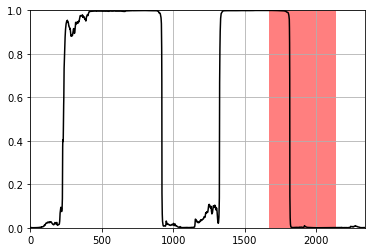

ENST00000597230
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_688463  :  {'start': 101, 'stop': 284, 'MS': 1, 'TE': 14, 'frame': 3}
IP_688456  :  {'start': 324, 'stop': 525, 'MS': 0, 'TE': 6, 'frame': 1}
IP_688461  :  {'start': 364, 'stop': 466, 'MS': 1, 'TE': 0, 'frame': 2}
IP_688462  :  {'start': 673, 'stop': 889, 'MS': 0, 'TE': 0, 'frame': 2}
IP_688458  :  {'start': 925, 'stop': 1030, 'MS': 0, 'TE': 0, 'frame': 2}
IP_688464  :  {'start': 1049, 'stop': 1196, 'MS': 0, 'TE': 0, 'frame': 3}
IP_688457  :  {'start': 1128, 'stop': 1710, 'MS': 0, 'TE': 0, 'frame': 1}
IP_688459  :  {'start': 1672, 'stop': 1807, 'MS': 1, 'TE': 0, 'frame': 2}
IP_688460  :  {'start': 2311, 'stop': 2416, 'MS': 0, 'TE': 0, 'frame': 2}
IP_688455  :  {'start': 2412, 'stop': 2634, 'MS': 0, 'TE': 0, 'frame': 1}


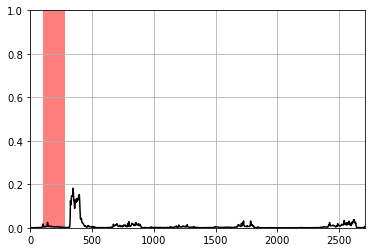

ENST00000594345
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_696900  :  {'start': 258, 'stop': 450, 'MS': 1, 'TE': 2, 'frame': 1}


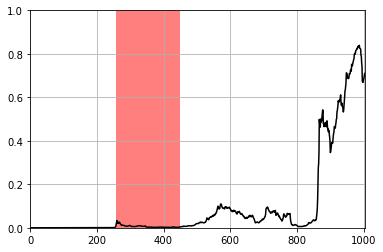

ENST00000595951
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_696900  :  {'start': 222, 'stop': 414, 'MS': 1, 'TE': 2, 'frame': 1}


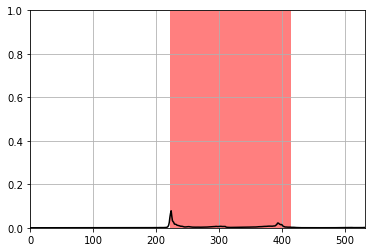

ENST00000595381
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_696900  :  {'start': 172, 'stop': 364, 'MS': 1, 'TE': 2, 'frame': 2}


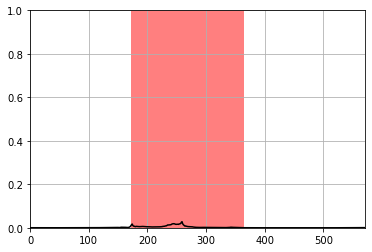

ENST00000598532
recall: 0.0
iou: 0.0
biotype: processed_transcript
II_696905  :  {'start': 4, 'stop': 238, 'MS': 0, 'TE': 0, 'frame': 2}
IP_696904  :  {'start': 33, 'stop': 231, 'MS': 0, 'TE': 0, 'frame': 1}
IP_696900  :  {'start': 253, 'stop': 445, 'MS': 1, 'TE': 2, 'frame': 2}


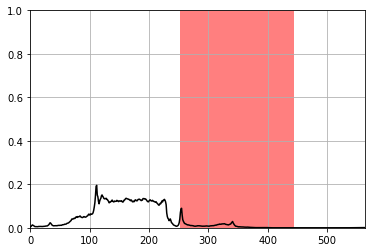

ENST00000587156
recall: 1.0
iou: 0.35583940148353577
biotype: processed_transcript
II_697247  :  {'start': 5, 'stop': 554, 'MS': 0, 'TE': 0, 'frame': 3}
IP_271667  :  {'start': 162, 'stop': 357, 'MS': 1, 'TE': 18, 'frame': 1}
IP_271668  :  {'start': 187, 'stop': 325, 'MS': 0, 'TE': 0, 'frame': 2}
IP_697246  :  {'start': 381, 'stop': 513, 'MS': 0, 'TE': 0, 'frame': 1}


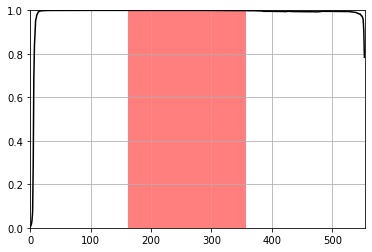

ENST00000590633
recall: 1.0
iou: 0.2468007355928421
biotype: processed_transcript
II_697902  :  {'start': 9, 'stop': 558, 'MS': 0, 'TE': 1, 'frame': 1}
IP_270886  :  {'start': 250, 'stop': 385, 'MS': 1, 'TE': 1, 'frame': 2}


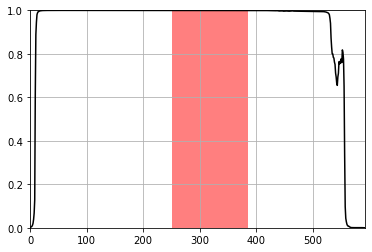

ENST00000591649
recall: 0.9982638955116272
iou: 0.9712837934494019
biotype: processed_transcript
IP_698591  :  {'start': 3, 'stop': 192, 'MS': 0, 'TE': 0, 'frame': 1}
IP_698592  :  {'start': 849, 'stop': 972, 'MS': 0, 'TE': 0, 'frame': 1}
IP_698593  :  {'start': 1114, 'stop': 1225, 'MS': 0, 'TE': 0, 'frame': 2}
IP_698594  :  {'start': 1451, 'stop': 2027, 'MS': 10, 'TE': 1, 'frame': 3}


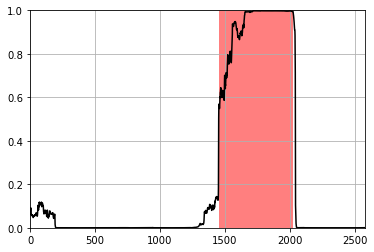

ENST00000587928
recall: 1.0
iou: 0.18646810948848724
biotype: processed_transcript
II_698598  :  {'start': 274, 'stop': 1600, 'MS': 0, 'TE': 0, 'frame': 2}
II_270234  :  {'start': 879, 'stop': 1041, 'MS': 0, 'TE': 0, 'frame': 1}
II_698597  :  {'start': 1924, 'stop': 3058, 'MS': 0, 'TE': 9, 'frame': 2}
IP_270232  :  {'start': 2219, 'stop': 2435, 'MS': 0, 'TE': 0, 'frame': 3}
IP_270229  :  {'start': 2738, 'stop': 2948, 'MS': 1, 'TE': 0, 'frame': 3}
II_698599  :  {'start': 2948, 'stop': 3695, 'MS': 1, 'TE': 0, 'frame': 3}
IP_698594  :  {'start': 3102, 'stop': 3678, 'MS': 10, 'TE': 1, 'frame': 1}


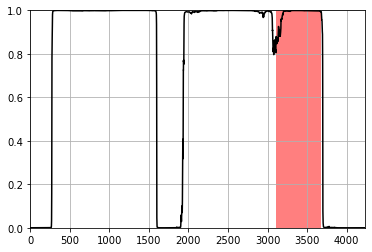

ENST00000495503
recall: 0.0
iou: 0.0
biotype: processed_transcript
II_269887  :  {'start': 129, 'stop': 219, 'MS': 0, 'TE': 0, 'frame': 1}
II_698926  :  {'start': 160, 'stop': 451, 'MS': 0, 'TE': 0, 'frame': 2}
IP_269899  :  {'start': 577, 'stop': 697, 'MS': 1, 'TE': 2, 'frame': 2}
IP_269900  :  {'start': 730, 'stop': 877, 'MS': 0, 'TE': 0, 'frame': 2}


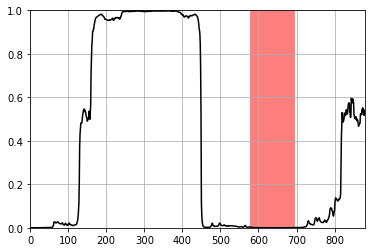

ENST00000468058
recall: 1.0
iou: 0.24207492172718048
biotype: processed_transcript
II_699190  :  {'start': 65, 'stop': 641, 'MS': 0, 'TE': 0, 'frame': 3}
IP_269493  :  {'start': 213, 'stop': 366, 'MS': 0, 'TE': 0, 'frame': 1}
II_699189  :  {'start': 570, 'stop': 1455, 'MS': 0, 'TE': 0, 'frame': 1}
IP_269497  :  {'start': 1090, 'stop': 1426, 'MS': 1, 'TE': 1, 'frame': 2}


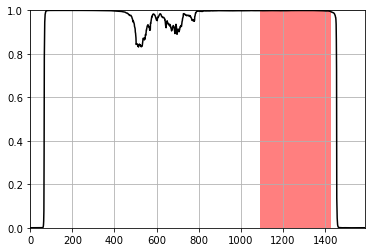

ENST00000587411
recall: 0.523809552192688
iou: 0.051683634519577026
biotype: processed_transcript
IP_699566  :  {'start': 167, 'stop': 395, 'MS': 0, 'TE': 0, 'frame': 3}
IP_699560  :  {'start': 312, 'stop': 465, 'MS': 0, 'TE': 0, 'frame': 1}
IP_699564  :  {'start': 382, 'stop': 505, 'MS': 0, 'TE': 0, 'frame': 2}
IP_699563  :  {'start': 685, 'stop': 940, 'MS': 0, 'TE': 0, 'frame': 2}
IP_269023  :  {'start': 975, 'stop': 1101, 'MS': 1, 'TE': 1, 'frame': 1}
IP_699558  :  {'start': 1122, 'stop': 1428, 'MS': 0, 'TE': 0, 'frame': 1}
II_699565  :  {'start': 1145, 'stop': 1811, 'MS': 0, 'TE': 0, 'frame': 3}
IP_699561  :  {'start': 1465, 'stop': 1615, 'MS': 0, 'TE': 0, 'frame': 2}
IP_699559  :  {'start': 1767, 'stop': 1968, 'MS': 0, 'TE': 0, 'frame': 1}
II_699562  :  {'start': 2008, 'stop': 2437, 'MS': 1, 'TE': 0, 'frame': 2}
IP_269021  :  {'start': 2057, 'stop': 2360, 'MS': 0, 'TE': 0, 'frame': 3}


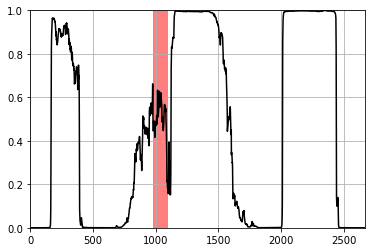

ENST00000587084
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_273181  :  {'start': 24, 'stop': 153, 'MS': 1, 'TE': 2, 'frame': 1}
IP_273176  :  {'start': 2140, 'stop': 2287, 'MS': 0, 'TE': 0, 'frame': 2}
IP_699801  :  {'start': 2449, 'stop': 2545, 'MS': 1, 'TE': 0, 'frame': 2}
IP_699799  :  {'start': 2760, 'stop': 2895, 'MS': 0, 'TE': 0, 'frame': 1}
IP_699797  :  {'start': 3276, 'stop': 3369, 'MS': 1, 'TE': 0, 'frame': 1}
IP_699800  :  {'start': 3817, 'stop': 3991, 'MS': 0, 'TE': 0, 'frame': 2}
IP_699803  :  {'start': 3866, 'stop': 4061, 'MS': 0, 'TE': 0, 'frame': 3}
IP_699802  :  {'start': 4661, 'stop': 4760, 'MS': 0, 'TE': 0, 'frame': 3}


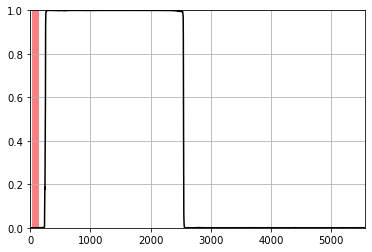

ENST00000601678
recall: 0.6124660968780518
iou: 0.4923747181892395
biotype: processed_transcript
IP_700905  :  {'start': 87, 'stop': 456, 'MS': 1, 'TE': 3, 'frame': 1}
II_700907  :  {'start': 229, 'stop': 547, 'MS': 0, 'TE': 1, 'frame': 2}
IP_700909  :  {'start': 692, 'stop': 824, 'MS': 0, 'TE': 0, 'frame': 3}
IP_700906  :  {'start': 718, 'stop': 814, 'MS': 0, 'TE': 0, 'frame': 2}
IP_700904  :  {'start': 948, 'stop': 1185, 'MS': 0, 'TE': 0, 'frame': 1}
IP_700903  :  {'start': 1266, 'stop': 1398, 'MS': 0, 'TE': 0, 'frame': 1}
IP_700908  :  {'start': 1328, 'stop': 1460, 'MS': 0, 'TE': 0, 'frame': 3}


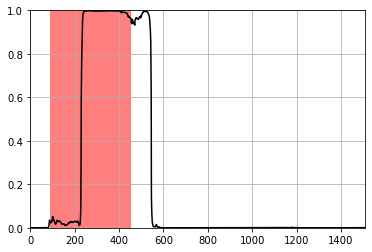

ENST00000578833
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_701185  :  {'start': 4, 'stop': 139, 'MS': 1, 'TE': 2, 'frame': 2}
IP_701184  :  {'start': 166, 'stop': 274, 'MS': 0, 'TE': 1, 'frame': 2}


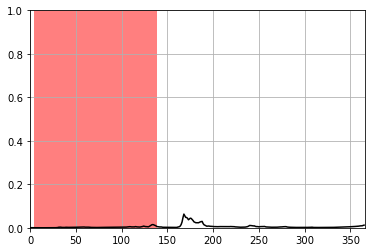

ENST00000581139
recall: 0.997732400894165
iou: 0.997732400894165
biotype: processed_transcript
IP_703778  :  {'start': 263, 'stop': 404, 'MS': 0, 'TE': 0, 'frame': 3}
IP_703775  :  {'start': 354, 'stop': 795, 'MS': 1, 'TE': 1, 'frame': 1}
IP_703777  :  {'start': 766, 'stop': 1006, 'MS': 0, 'TE': 1, 'frame': 2}
IP_703779  :  {'start': 995, 'stop': 1085, 'MS': 0, 'TE': 0, 'frame': 3}
IP_703776  :  {'start': 1011, 'stop': 1119, 'MS': 0, 'TE': 0, 'frame': 1}


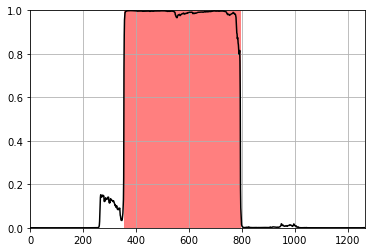

ENST00000571901
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_708532  :  {'start': 352, 'stop': 454, 'MS': 1, 'TE': 4, 'frame': 2}
IP_708533  :  {'start': 416, 'stop': 512, 'MS': 0, 'TE': 0, 'frame': 3}
IP_708530  :  {'start': 512, 'stop': 614, 'MS': 0, 'TE': 0, 'frame': 3}


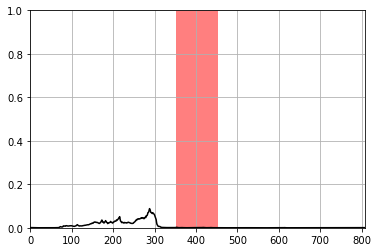

ENST00000590513
recall: 0.6261261105537415
iou: 0.3390243947505951
biotype: processed_transcript
IP_708729  :  {'start': 254, 'stop': 476, 'MS': 2, 'TE': 5, 'frame': 3}
IP_708728  :  {'start': 1186, 'stop': 1927, 'MS': 0, 'TE': 3, 'frame': 2}
IP_708730  :  {'start': 1559, 'stop': 1724, 'MS': 0, 'TE': 0, 'frame': 3}
IP_708727  :  {'start': 1983, 'stop': 2163, 'MS': 0, 'TE': 0, 'frame': 1}


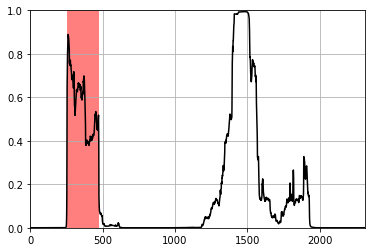

ENST00000592381
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_710054  :  {'start': 328, 'stop': 442, 'MS': 1, 'TE': 9, 'frame': 2}
IP_710053  :  {'start': 414, 'stop': 561, 'MS': 0, 'TE': 7, 'frame': 1}
IP_710055  :  {'start': 815, 'stop': 923, 'MS': 0, 'TE': 0, 'frame': 3}
IP_710052  :  {'start': 849, 'stop': 969, 'MS': 0, 'TE': 0, 'frame': 1}
IP_710056  :  {'start': 1049, 'stop': 1184, 'MS': 0, 'TE': 0, 'frame': 3}


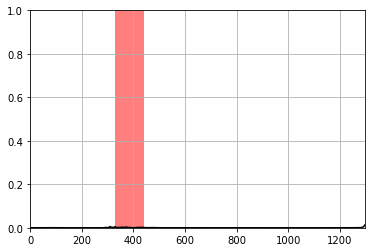

ENST00000581085
recall: 0.7911646366119385
iou: 0.046407539397478104
biotype: processed_transcript
IP_260154  :  {'start': 147, 'stop': 396, 'MS': 8, 'TE': 15, 'frame': 1}
II_712773  :  {'start': 217, 'stop': 2413, 'MS': 0, 'TE': 0, 'frame': 2}
IP_260145  :  {'start': 626, 'stop': 782, 'MS': 0, 'TE': 0, 'frame': 3}
IP_260148  :  {'start': 830, 'stop': 968, 'MS': 0, 'TE': 0, 'frame': 3}
II_260146  :  {'start': 1064, 'stop': 1175, 'MS': 0, 'TE': 0, 'frame': 3}
IP_260150  :  {'start': 1175, 'stop': 1265, 'MS': 0, 'TE': 0, 'frame': 3}
IP_260147  :  {'start': 1661, 'stop': 1769, 'MS': 0, 'TE': 0, 'frame': 3}
IP_260149  :  {'start': 2000, 'stop': 2210, 'MS': 0, 'TE': 0, 'frame': 3}
IP_712762  :  {'start': 2402, 'stop': 2660, 'MS': 0, 'TE': 0, 'frame': 3}
IP_712766  :  {'start': 2467, 'stop': 2563, 'MS': 0, 'TE': 0, 'frame': 2}
IP_712764  :  {'start': 2511, 'stop': 2736, 'MS': 0, 'TE': 0, 'frame': 1}
II_712774  :  {'start': 2702, 'stop': 4676, 'MS': 0, 'TE': 0, 'frame': 3}
IP_260144  :  {'sta

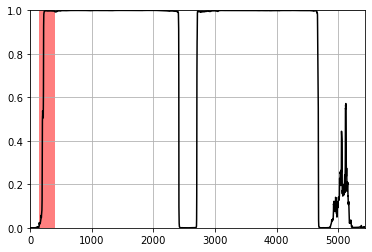

ENST00000589825
recall: 1.0
iou: 0.24590164422988892
biotype: processed_transcript
II_715574  :  {'start': 81, 'stop': 576, 'MS': 0, 'TE': 0, 'frame': 1}
IP_256464  :  {'start': 97, 'stop': 217, 'MS': 1, 'TE': 1, 'frame': 2}
IP_256455  :  {'start': 223, 'stop': 322, 'MS': 0, 'TE': 0, 'frame': 2}


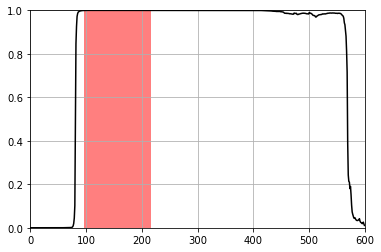

ENST00000633110
recall: 0.05982905998826027
iou: 0.046204619109630585
biotype: processed_transcript


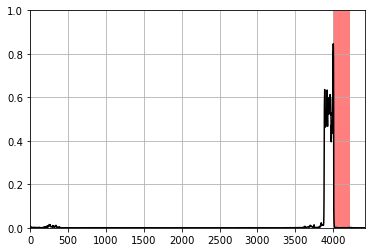

ENST00000568776
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_723226  :  {'start': 309, 'stop': 486, 'MS': 0, 'TE': 2, 'frame': 1}
IP_723228  :  {'start': 505, 'stop': 622, 'MS': 0, 'TE': 0, 'frame': 2}
IP_723224  :  {'start': 678, 'stop': 894, 'MS': 1, 'TE': 1, 'frame': 1}
IP_723225  :  {'start': 1044, 'stop': 1176, 'MS': 1, 'TE': 0, 'frame': 1}
IP_723227  :  {'start': 1329, 'stop': 1470, 'MS': 0, 'TE': 0, 'frame': 1}


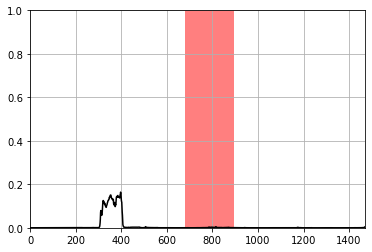

ENST00000563863
recall: 0.07547169923782349
iou: 0.0714285746216774
biotype: processed_transcript
IP_725702  :  {'start': 329, 'stop': 488, 'MS': 1, 'TE': 2, 'frame': 3}
IP_725704  :  {'start': 733, 'stop': 1036, 'MS': 0, 'TE': 0, 'frame': 2}
IP_725703  :  {'start': 1467, 'stop': 1596, 'MS': 1, 'TE': 0, 'frame': 1}
IP_725705  :  {'start': 1580, 'stop': 1709, 'MS': 0, 'TE': 0, 'frame': 3}


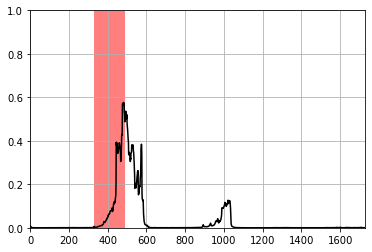

ENST00000563837
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_725702  :  {'start': 329, 'stop': 488, 'MS': 1, 'TE': 2, 'frame': 3}


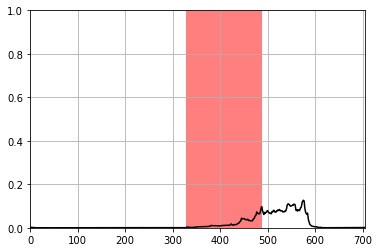

ENST00000565069
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_725702  :  {'start': 171, 'stop': 330, 'MS': 1, 'TE': 2, 'frame': 1}


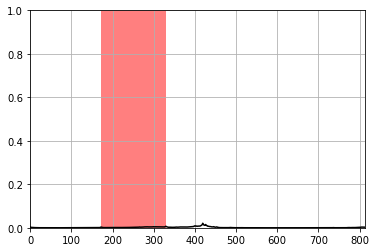

ENST00000562570
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_725706  :  {'start': 487, 'stop': 1192, 'MS': 0, 'TE': 0, 'frame': 2}
IP_725707  :  {'start': 1589, 'stop': 1679, 'MS': 0, 'TE': 0, 'frame': 3}
IP_725702  :  {'start': 1820, 'stop': 1979, 'MS': 1, 'TE': 2, 'frame': 3}
IP_725704  :  {'start': 2224, 'stop': 2527, 'MS': 0, 'TE': 0, 'frame': 2}
IP_725703  :  {'start': 2958, 'stop': 3087, 'MS': 1, 'TE': 0, 'frame': 1}
IP_725705  :  {'start': 3071, 'stop': 3200, 'MS': 0, 'TE': 0, 'frame': 3}


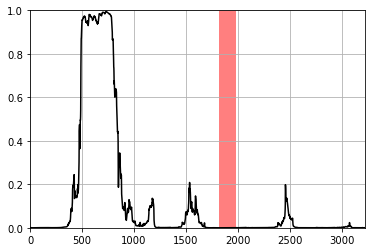

ENST00000622160
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_725752  :  {'start': 789, 'stop': 1122, 'MS': 1, 'TE': 0, 'frame': 1}
IP_725756  :  {'start': 809, 'stop': 938, 'MS': 0, 'TE': 0, 'frame': 3}
IP_725754  :  {'start': 1015, 'stop': 1306, 'MS': 1, 'TE': 1, 'frame': 2}
IP_725755  :  {'start': 1043, 'stop': 1337, 'MS': 0, 'TE': 0, 'frame': 3}
IP_725753  :  {'start': 1191, 'stop': 1353, 'MS': 0, 'TE': 0, 'frame': 1}
IP_725757  :  {'start': 1718, 'stop': 2138, 'MS': 0, 'TE': 0, 'frame': 3}


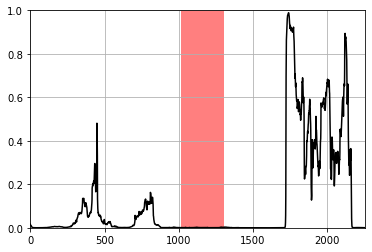

ENST00000493683
recall: 0.7885802388191223
iou: 0.14837397634983063
biotype: processed_transcript
IP_243496  :  {'start': 307, 'stop': 535, 'MS': 1, 'TE': 0, 'frame': 2}
IP_243498  :  {'start': 2197, 'stop': 2308, 'MS': 0, 'TE': 0, 'frame': 2}
IP_734115  :  {'start': 2518, 'stop': 2632, 'MS': 1, 'TE': 0, 'frame': 2}
IP_734116  :  {'start': 2558, 'stop': 2651, 'MS': 0, 'TE': 0, 'frame': 3}
IP_243494  :  {'start': 3041, 'stop': 3395, 'MS': 1, 'TE': 0, 'frame': 3}
IP_243492  :  {'start': 3577, 'stop': 3790, 'MS': 0, 'TE': 0, 'frame': 2}
IP_243495  :  {'start': 4469, 'stop': 5117, 'MS': 10, 'TE': 6, 'frame': 3}


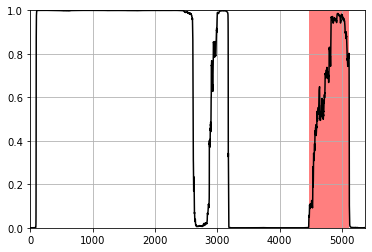

ENST00000564140
recall: 0.9968553185462952
iou: 0.9968553185462952
biotype: processed_transcript
IP_737297  :  {'start': 171, 'stop': 489, 'MS': 58, 'TE': 3, 'frame': 1}
IP_232817  :  {'start': 271, 'stop': 364, 'MS': 0, 'TE': 0, 'frame': 2}


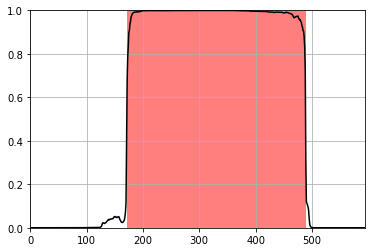

ENST00000560197
recall: 0.05970149114727974
iou: 0.05970149114727974
biotype: processed_transcript
IP_738568  :  {'start': 61, 'stop': 262, 'MS': 1, 'TE': 3, 'frame': 2}
IP_738569  :  {'start': 428, 'stop': 653, 'MS': 0, 'TE': 3, 'frame': 3}
IP_738567  :  {'start': 772, 'stop': 862, 'MS': 0, 'TE': 0, 'frame': 2}
IP_738570  :  {'start': 902, 'stop': 1034, 'MS': 1, 'TE': 0, 'frame': 3}
IP_738565  :  {'start': 987, 'stop': 1137, 'MS': 0, 'TE': 0, 'frame': 1}
IP_738566  :  {'start': 1194, 'stop': 1284, 'MS': 0, 'TE': 0, 'frame': 1}


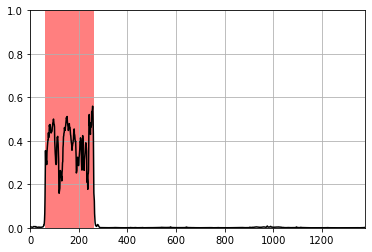

ENST00000553404
recall: 0.0
iou: 0.0
biotype: processed_transcript
II_750398  :  {'start': 3, 'stop': 168, 'MS': 1, 'TE': 0, 'frame': 1}
IP_750399  :  {'start': 352, 'stop': 478, 'MS': 0, 'TE': 0, 'frame': 2}
II_750400  :  {'start': 782, 'stop': 878, 'MS': 0, 'TE': 0, 'frame': 3}
IP_227160  :  {'start': 896, 'stop': 1118, 'MS': 1, 'TE': 1, 'frame': 3}
IP_227162  :  {'start': 1755, 'stop': 1851, 'MS': 0, 'TE': 0, 'frame': 1}
IP_227161  :  {'start': 2043, 'stop': 2154, 'MS': 0, 'TE': 0, 'frame': 1}


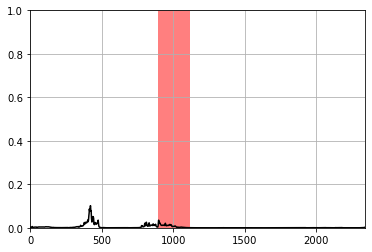

ENST00000553755
recall: 0.42990654706954956
iou: 0.42990654706954956
biotype: processed_transcript
IP_225518  :  {'start': 49, 'stop': 370, 'MS': 1, 'TE': 1, 'frame': 2}
IP_225515  :  {'start': 89, 'stop': 383, 'MS': 0, 'TE': 0, 'frame': 3}
IP_751380  :  {'start': 484, 'stop': 628, 'MS': 0, 'TE': 0, 'frame': 2}


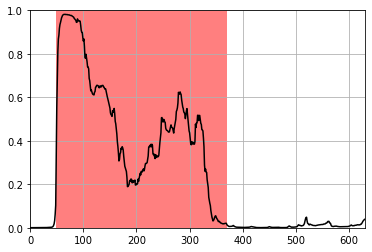

ENST00000539688
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_751789  :  {'start': 302, 'stop': 752, 'MS': 1, 'TE': 1, 'frame': 3}
IP_751788  :  {'start': 1113, 'stop': 1266, 'MS': 0, 'TE': 0, 'frame': 1}


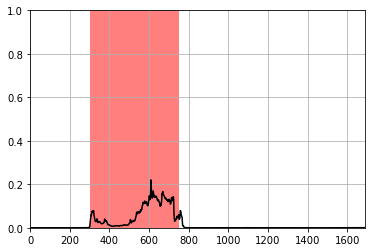

ENST00000458001
recall: 0.9942528605461121
iou: 0.6275695562362671
biotype: processed_transcript
IP_753795  :  {'start': 1060, 'stop': 1279, 'MS': 0, 'TE': 0, 'frame': 2}
IP_753790  :  {'start': 1113, 'stop': 1212, 'MS': 0, 'TE': 0, 'frame': 1}
IP_753800  :  {'start': 1208, 'stop': 1403, 'MS': 0, 'TE': 0, 'frame': 3}
IP_753793  :  {'start': 1809, 'stop': 2247, 'MS': 0, 'TE': 0, 'frame': 1}
IP_753798  :  {'start': 2446, 'stop': 2722, 'MS': 0, 'TE': 0, 'frame': 2}
IP_753794  :  {'start': 2520, 'stop': 2619, 'MS': 1, 'TE': 0, 'frame': 1}
IP_753801  :  {'start': 2825, 'stop': 3623, 'MS': 0, 'TE': 0, 'frame': 3}
IP_753797  :  {'start': 2848, 'stop': 3748, 'MS': 0, 'TE': 0, 'frame': 2}
IP_753792  :  {'start': 2907, 'stop': 3696, 'MS': 0, 'TE': 0, 'frame': 1}
IP_753789  :  {'start': 4009, 'stop': 4312, 'MS': 0, 'TE': 1, 'frame': 2}
IP_753786  :  {'start': 4244, 'stop': 4619, 'MS': 0, 'TE': 0, 'frame': 3}
IP_753787  :  {'start': 4722, 'stop': 5244, 'MS': 1, 'TE': 1, 'frame': 1}
IP_753788  :  {

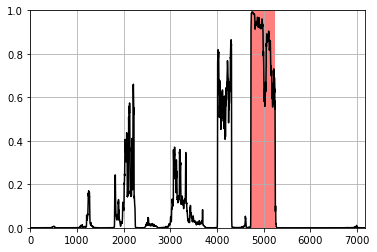

ENST00000611082
recall: 0.9482758641242981
iou: 0.6007281541824341
biotype: processed_transcript
IP_753789  :  {'start': 95, 'stop': 398, 'MS': 0, 'TE': 1, 'frame': 3}
IP_753786  :  {'start': 330, 'stop': 705, 'MS': 0, 'TE': 0, 'frame': 1}
IP_753787  :  {'start': 808, 'stop': 1330, 'MS': 1, 'TE': 1, 'frame': 2}
IP_753788  :  {'start': 1085, 'stop': 1301, 'MS': 0, 'TE': 0, 'frame': 3}


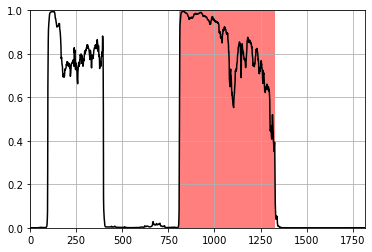

ENST00000613809
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_754340  :  {'start': 131, 'stop': 275, 'MS': 0, 'TE': 0, 'frame': 3}
IP_754335  :  {'start': 139, 'stop': 268, 'MS': 1, 'TE': 1, 'frame': 2}
IP_754337  :  {'start': 391, 'stop': 562, 'MS': 0, 'TE': 1, 'frame': 2}
IP_754332  :  {'start': 873, 'stop': 999, 'MS': 0, 'TE': 1, 'frame': 1}
IP_754341  :  {'start': 1055, 'stop': 1196, 'MS': 0, 'TE': 0, 'frame': 3}
IP_754338  :  {'start': 1588, 'stop': 1774, 'MS': 0, 'TE': 0, 'frame': 2}
IP_754331  :  {'start': 1623, 'stop': 1809, 'MS': 0, 'TE': 0, 'frame': 1}
IP_754342  :  {'start': 1952, 'stop': 2048, 'MS': 0, 'TE': 0, 'frame': 3}
IP_754339  :  {'start': 2054, 'stop': 2189, 'MS': 0, 'TE': 0, 'frame': 3}
IP_754333  :  {'start': 2481, 'stop': 2637, 'MS': 0, 'TE': 0, 'frame': 1}
IP_754334  :  {'start': 2695, 'stop': 2959, 'MS': 0, 'TE': 0, 'frame': 2}
IP_754330  :  {'start': 2709, 'stop': 2805, 'MS': 0, 'TE': 0, 'frame': 1}
IP_754329  :  {'start': 3177, 'stop': 3297, 'MS': 0, 

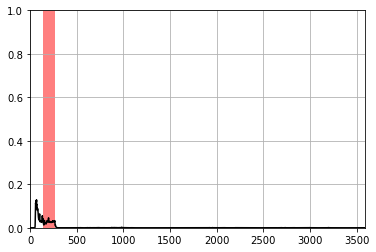

ENST00000542980
recall: 0.3020833432674408
iou: 0.24166665971279144
biotype: processed_transcript
IP_758825  :  {'start': 174, 'stop': 381, 'MS': 0, 'TE': 2, 'frame': 1}
IP_758822  :  {'start': 322, 'stop': 514, 'MS': 1, 'TE': 3, 'frame': 2}
IP_758824  :  {'start': 479, 'stop': 575, 'MS': 0, 'TE': 0, 'frame': 3}
IP_758823  :  {'start': 982, 'stop': 1114, 'MS': 0, 'TE': 0, 'frame': 2}


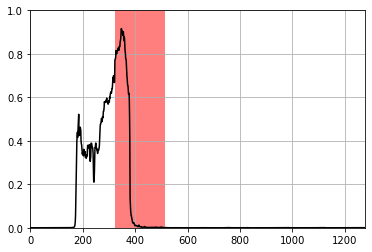

ENST00000512133
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_758957  :  {'start': 10, 'stop': 100, 'MS': 0, 'TE': 0, 'frame': 2}
IP_758963  :  {'start': 119, 'stop': 284, 'MS': 0, 'TE': 0, 'frame': 3}
IP_758956  :  {'start': 274, 'stop': 604, 'MS': 0, 'TE': 0, 'frame': 2}
IP_758955  :  {'start': 285, 'stop': 588, 'MS': 0, 'TE': 0, 'frame': 1}
IP_758962  :  {'start': 338, 'stop': 524, 'MS': 0, 'TE': 0, 'frame': 3}
IP_758960  :  {'start': 649, 'stop': 790, 'MS': 1, 'TE': 0, 'frame': 2}
IP_758953  :  {'start': 1131, 'stop': 1500, 'MS': 0, 'TE': 0, 'frame': 1}
IP_758959  :  {'start': 1204, 'stop': 1321, 'MS': 0, 'TE': 0, 'frame': 2}
IP_758958  :  {'start': 1336, 'stop': 1441, 'MS': 0, 'TE': 0, 'frame': 2}
IP_218378  :  {'start': 1388, 'stop': 1490, 'MS': 0, 'TE': 0, 'frame': 3}
IP_758964  :  {'start': 1601, 'stop': 1709, 'MS': 2, 'TE': 1, 'frame': 3}
IP_758961  :  {'start': 1621, 'stop': 1729, 'MS': 0, 'TE': 0, 'frame': 2}
IP_758954  :  {'start': 1641, 'stop': 1737, 'MS': 0, 'TE':

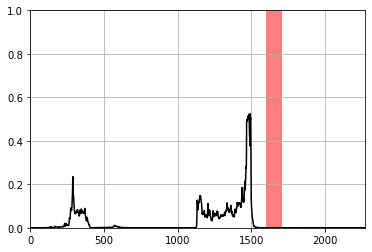

ENST00000540866
recall: 0.9247311949729919
iou: 0.14650766551494598
biotype: processed_transcript
IP_759488  :  {'start': 8, 'stop': 116, 'MS': 0, 'TE': 0, 'frame': 3}
IP_759482  :  {'start': 372, 'stop': 633, 'MS': 0, 'TE': 0, 'frame': 1}
IP_759484  :  {'start': 400, 'stop': 526, 'MS': 0, 'TE': 0, 'frame': 2}
IP_759492  :  {'start': 665, 'stop': 941, 'MS': 0, 'TE': 0, 'frame': 3}
IP_759483  :  {'start': 693, 'stop': 852, 'MS': 0, 'TE': 0, 'frame': 1}
IP_759485  :  {'start': 925, 'stop': 1204, 'MS': 0, 'TE': 0, 'frame': 2}
IP_759486  :  {'start': 1303, 'stop': 1450, 'MS': 0, 'TE': 0, 'frame': 2}
II_759489  :  {'start': 1895, 'stop': 2204, 'MS': 0, 'TE': 0, 'frame': 3}
IP_216461  :  {'start': 2343, 'stop': 2898, 'MS': 0, 'TE': 0, 'frame': 1}
II_759490  :  {'start': 2429, 'stop': 2528, 'MS': 0, 'TE': 0, 'frame': 3}
IP_216463  :  {'start': 2659, 'stop': 2875, 'MS': 1, 'TE': 0, 'frame': 2}
IP_216466  :  {'start': 3283, 'stop': 3511, 'MS': 0, 'TE': 0, 'frame': 2}
II_216467  :  {'start': 338

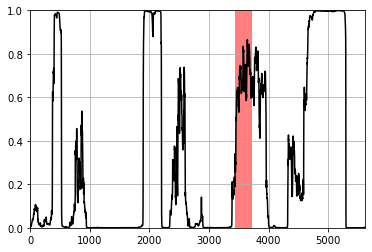

ENST00000609803
recall: 0.9862259030342102
iou: 0.9808219075202942
biotype: processed_transcript
IP_217678  :  {'start': 65, 'stop': 428, 'MS': 1, 'TE': 5, 'frame': 3}
IP_217679  :  {'start': 1469, 'stop': 1565, 'MS': 0, 'TE': 2, 'frame': 3}
IP_761995  :  {'start': 2444, 'stop': 2552, 'MS': 0, 'TE': 0, 'frame': 3}
IP_761987  :  {'start': 3138, 'stop': 3246, 'MS': 0, 'TE': 0, 'frame': 1}
IP_761988  :  {'start': 5022, 'stop': 5118, 'MS': 0, 'TE': 0, 'frame': 1}
IP_761992  :  {'start': 5128, 'stop': 5227, 'MS': 0, 'TE': 0, 'frame': 2}
IP_761997  :  {'start': 5360, 'stop': 5555, 'MS': 1, 'TE': 0, 'frame': 3}
IP_761986  :  {'start': 5679, 'stop': 5769, 'MS': 1, 'TE': 0, 'frame': 1}
IP_761991  :  {'start': 5860, 'stop': 6028, 'MS': 0, 'TE': 0, 'frame': 2}
IP_761989  :  {'start': 6192, 'stop': 6363, 'MS': 0, 'TE': 0, 'frame': 1}
IP_761996  :  {'start': 6302, 'stop': 6419, 'MS': 0, 'TE': 0, 'frame': 3}
IP_761993  :  {'start': 7349, 'stop': 7451, 'MS': 0, 'TE': 0, 'frame': 3}
IP_761990  :  {'st

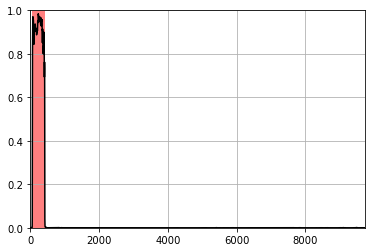

ENST00000619086
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_762332  :  {'start': 141, 'stop': 309, 'MS': 1, 'TE': 1, 'frame': 1}
IP_762336  :  {'start': 313, 'stop': 403, 'MS': 0, 'TE': 0, 'frame': 2}
IP_762334  :  {'start': 579, 'stop': 726, 'MS': 0, 'TE': 1, 'frame': 1}
IP_762331  :  {'start': 936, 'stop': 1035, 'MS': 0, 'TE': 1, 'frame': 1}
IP_762338  :  {'start': 950, 'stop': 1079, 'MS': 0, 'TE': 0, 'frame': 3}
IP_762333  :  {'start': 1176, 'stop': 1281, 'MS': 0, 'TE': 0, 'frame': 1}
IP_762335  :  {'start': 1570, 'stop': 1675, 'MS': 0, 'TE': 1, 'frame': 2}
IP_762337  :  {'start': 1984, 'stop': 2080, 'MS': 0, 'TE': 0, 'frame': 2}


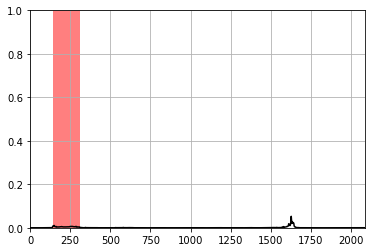

ENST00000382215
recall: 0.013468013145029545
iou: 0.013468013145029545
biotype: processed_transcript
IP_763358  :  {'start': 250, 'stop': 547, 'MS': 1, 'TE': 3, 'frame': 2}
IP_217420  :  {'start': 715, 'stop': 850, 'MS': 0, 'TE': 0, 'frame': 2}
IP_217418  :  {'start': 877, 'stop': 1021, 'MS': 1, 'TE': 0, 'frame': 2}
IP_217421  :  {'start': 1425, 'stop': 1539, 'MS': 1, 'TE': 0, 'frame': 1}
IP_763359  :  {'start': 1489, 'stop': 1705, 'MS': 0, 'TE': 0, 'frame': 2}
IP_763360  :  {'start': 1535, 'stop': 1688, 'MS': 0, 'TE': 0, 'frame': 3}
IP_763361  :  {'start': 1709, 'stop': 1907, 'MS': 0, 'TE': 0, 'frame': 3}


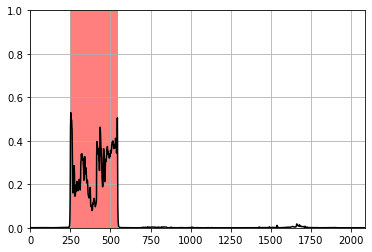

ENST00000536704
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_767671  :  {'start': 259, 'stop': 382, 'MS': 1, 'TE': 1, 'frame': 2}


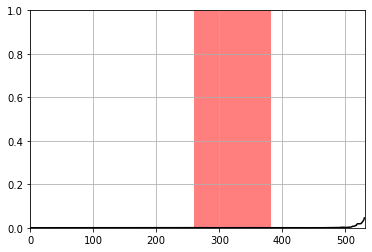

ENST00000540927
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_767671  :  {'start': 177, 'stop': 300, 'MS': 1, 'TE': 1, 'frame': 1}
IP_767673  :  {'start': 335, 'stop': 425, 'MS': 0, 'TE': 0, 'frame': 3}
II_767672  :  {'start': 484, 'stop': 586, 'MS': 1, 'TE': 0, 'frame': 2}


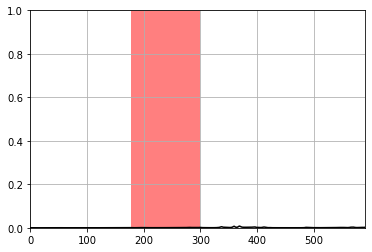

ENST00000543271
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_767671  :  {'start': 259, 'stop': 382, 'MS': 1, 'TE': 1, 'frame': 2}


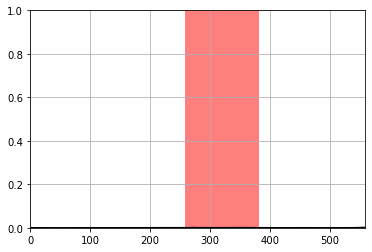

ENST00000540469
recall: 0.0
iou: 0.0
biotype: processed_transcript
II_768096  :  {'start': 149, 'stop': 671, 'MS': 0, 'TE': 0, 'frame': 3}
IP_768099  :  {'start': 267, 'stop': 417, 'MS': 0, 'TE': 0, 'frame': 1}
IP_768100  :  {'start': 726, 'stop': 837, 'MS': 0, 'TE': 0, 'frame': 1}
IP_768095  :  {'start': 731, 'stop': 875, 'MS': 0, 'TE': 0, 'frame': 3}
IP_768092  :  {'start': 1630, 'stop': 1747, 'MS': 0, 'TE': 0, 'frame': 2}
IP_768097  :  {'start': 2369, 'stop': 2501, 'MS': 0, 'TE': 0, 'frame': 3}
IP_768093  :  {'start': 2659, 'stop': 2794, 'MS': 0, 'TE': 0, 'frame': 2}
IP_768094  :  {'start': 2992, 'stop': 3091, 'MS': 1, 'TE': 1, 'frame': 2}
IP_216959  :  {'start': 3152, 'stop': 3269, 'MS': 0, 'TE': 0, 'frame': 3}


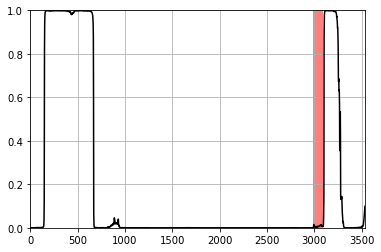

ENST00000551098
recall: 1.0
iou: 0.7652581930160522
biotype: processed_transcript
II_769970  :  {'start': 55, 'stop': 697, 'MS': 0, 'TE': 2, 'frame': 2}
IP_209284  :  {'start': 89, 'stop': 578, 'MS': 1, 'TE': 6, 'frame': 3}
IP_769971  :  {'start': 920, 'stop': 1025, 'MS': 2, 'TE': 0, 'frame': 3}


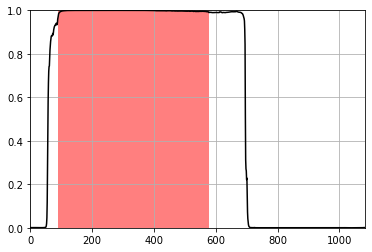

ENST00000548720
recall: 1.0
iou: 0.42721518874168396
biotype: processed_transcript
II_770084  :  {'start': 67, 'stop': 385, 'MS': 0, 'TE': 0, 'frame': 2}
IP_209128  :  {'start': 158, 'stop': 293, 'MS': 1, 'TE': 1, 'frame': 3}
IP_770083  :  {'start': 306, 'stop': 465, 'MS': 0, 'TE': 0, 'frame': 1}


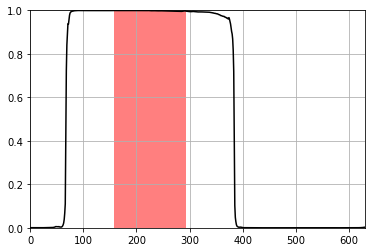

ENST00000542123
recall: 0.0
iou: 0.0
biotype: processed_transcript
II_771398  :  {'start': 10, 'stop': 589, 'MS': 0, 'TE': 1, 'frame': 2}
IP_771400  :  {'start': 107, 'stop': 197, 'MS': 0, 'TE': 0, 'frame': 3}
IP_771396  :  {'start': 664, 'stop': 760, 'MS': 0, 'TE': 0, 'frame': 2}
II_771401  :  {'start': 1169, 'stop': 1379, 'MS': 0, 'TE': 0, 'frame': 3}
IP_771397  :  {'start': 1363, 'stop': 1459, 'MS': 0, 'TE': 0, 'frame': 2}
IP_771399  :  {'start': 1469, 'stop': 1622, 'MS': 0, 'TE': 0, 'frame': 3}
II_771395  :  {'start': 2082, 'stop': 2262, 'MS': 0, 'TE': 0, 'frame': 1}
IP_207222  :  {'start': 2143, 'stop': 2242, 'MS': 0, 'TE': 0, 'frame': 2}
IP_207217  :  {'start': 2270, 'stop': 2384, 'MS': 0, 'TE': 0, 'frame': 3}
IP_207218  :  {'start': 2313, 'stop': 2475, 'MS': 3, 'TE': 1, 'frame': 1}
IP_207219  :  {'start': 2490, 'stop': 2622, 'MS': 0, 'TE': 0, 'frame': 1}


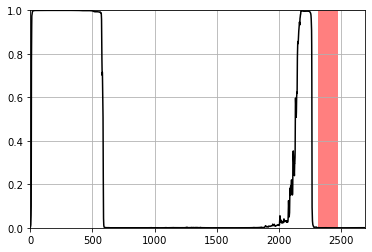

ENST00000551318
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_210328  :  {'start': 78, 'stop': 171, 'MS': 0, 'TE': 19, 'frame': 1}
IP_773207  :  {'start': 194, 'stop': 419, 'MS': 1, 'TE': 1, 'frame': 3}


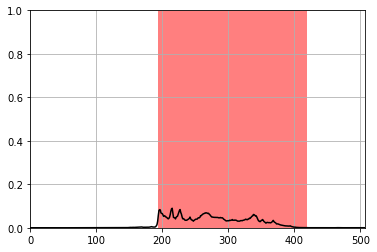

ENST00000534819
recall: 1.0
iou: 0.9582309722900391
biotype: processed_transcript
IP_775498  :  {'start': 1026, 'stop': 1140, 'MS': 0, 'TE': 0, 'frame': 1}
IP_775497  :  {'start': 1046, 'stop': 1436, 'MS': 81, 'TE': 1, 'frame': 3}
IP_775499  :  {'start': 1374, 'stop': 1551, 'MS': 0, 'TE': 0, 'frame': 1}
IP_775500  :  {'start': 1773, 'stop': 1965, 'MS': 0, 'TE': 0, 'frame': 1}
IP_775501  :  {'start': 2194, 'stop': 2341, 'MS': 0, 'TE': 0, 'frame': 2}


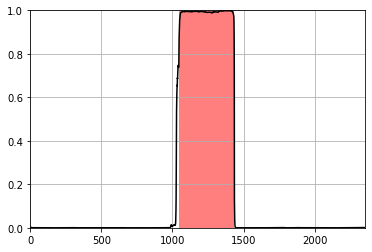

ENST00000529482
recall: 0.970588207244873
iou: 0.21382290124893188
biotype: processed_transcript
IP_777644  :  {'start': 74, 'stop': 176, 'MS': 1, 'TE': 1, 'frame': 3}
IP_777649  :  {'start': 184, 'stop': 541, 'MS': 0, 'TE': 0, 'frame': 2}
IP_777647  :  {'start': 212, 'stop': 380, 'MS': 0, 'TE': 0, 'frame': 3}
IP_777634  :  {'start': 591, 'stop': 687, 'MS': 0, 'TE': 1, 'frame': 1}
IP_777639  :  {'start': 721, 'stop': 838, 'MS': 0, 'TE': 2, 'frame': 2}
IP_777638  :  {'start': 901, 'stop': 1048, 'MS': 0, 'TE': 0, 'frame': 2}
IP_777651  :  {'start': 1398, 'stop': 1551, 'MS': 0, 'TE': 0, 'frame': 1}
IP_777655  :  {'start': 1532, 'stop': 1628, 'MS': 0, 'TE': 0, 'frame': 3}
IP_777654  :  {'start': 1661, 'stop': 1877, 'MS': 0, 'TE': 0, 'frame': 3}
IP_777652  :  {'start': 1779, 'stop': 1977, 'MS': 0, 'TE': 0, 'frame': 1}
IP_777653  :  {'start': 1879, 'stop': 2134, 'MS': 0, 'TE': 0, 'frame': 2}
IP_240924  :  {'start': 1988, 'stop': 2084, 'MS': 0, 'TE': 0, 'frame': 3}
IP_777636  :  {'start': 212

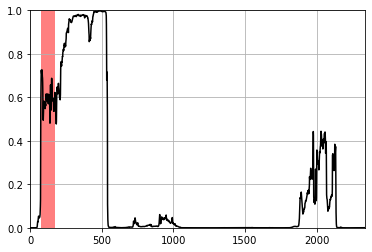

ENST00000530366
recall: 0.9901960492134094
iou: 0.4611872136592865
biotype: processed_transcript
IP_777644  :  {'start': 42, 'stop': 144, 'MS': 1, 'TE': 1, 'frame': 1}
IP_777646  :  {'start': 152, 'stop': 263, 'MS': 0, 'TE': 0, 'frame': 3}
IP_777645  :  {'start': 180, 'stop': 354, 'MS': 0, 'TE': 0, 'frame': 1}


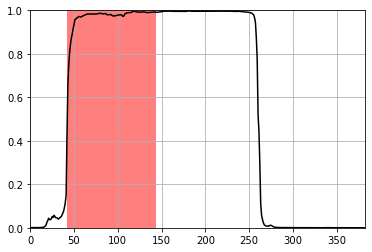

ENST00000526284
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_777644  :  {'start': 57, 'stop': 159, 'MS': 1, 'TE': 1, 'frame': 1}
IP_777649  :  {'start': 167, 'stop': 524, 'MS': 0, 'TE': 0, 'frame': 3}
IP_777647  :  {'start': 195, 'stop': 363, 'MS': 0, 'TE': 0, 'frame': 1}
IP_777650  :  {'start': 917, 'stop': 1061, 'MS': 0, 'TE': 0, 'frame': 3}
IP_777648  :  {'start': 997, 'stop': 1219, 'MS': 0, 'TE': 0, 'frame': 2}


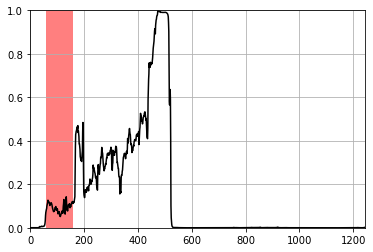

ENST00000530937
recall: 0.0
iou: 0.0
biotype: processed_transcript
II_777861  :  {'start': 29, 'stop': 209, 'MS': 0, 'TE': 0, 'frame': 3}
IP_202798  :  {'start': 298, 'stop': 433, 'MS': 1, 'TE': 1, 'frame': 2}


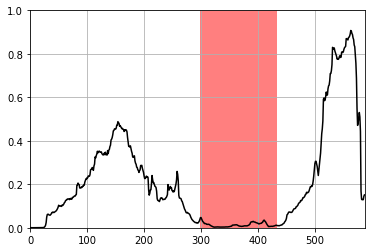

ENST00000526303
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_201434  :  {'start': 85, 'stop': 193, 'MS': 1, 'TE': 14, 'frame': 2}
IP_201427  :  {'start': 161, 'stop': 407, 'MS': 0, 'TE': 1, 'frame': 3}
II_779153  :  {'start': 393, 'stop': 651, 'MS': 0, 'TE': 0, 'frame': 1}


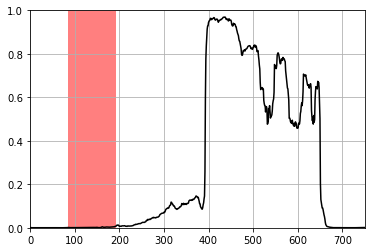

ENST00000602923
recall: 0.9977169036865234
iou: 0.9954441785812378
biotype: processed_transcript
IP_3425842  :  {'start': 113, 'stop': 284, 'MS': 1, 'TE': 0, 'frame': 3}
IP_3425841  :  {'start': 142, 'stop': 289, 'MS': 0, 'TE': 0, 'frame': 2}
IP_3425840  :  {'start': 201, 'stop': 312, 'MS': 0, 'TE': 0, 'frame': 1}
IP_781237  :  {'start': 563, 'stop': 1001, 'MS': 1, 'TE': 2, 'frame': 3}
IP_134165  :  {'start': 621, 'stop': 735, 'MS': 0, 'TE': 0, 'frame': 1}
IP_781236  :  {'start': 795, 'stop': 891, 'MS': 0, 'TE': 0, 'frame': 1}


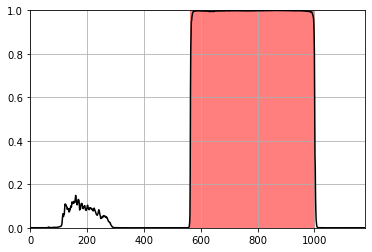

ENST00000528702
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_786122  :  {'start': 252, 'stop': 420, 'MS': 2, 'TE': 2, 'frame': 1}
II_786124  :  {'start': 461, 'stop': 923, 'MS': 0, 'TE': 0, 'frame': 3}
IP_786123  :  {'start': 684, 'stop': 846, 'MS': 0, 'TE': 0, 'frame': 1}
IP_786121  :  {'start': 847, 'stop': 937, 'MS': 0, 'TE': 0, 'frame': 2}
IP_786125  :  {'start': 995, 'stop': 1166, 'MS': 0, 'TE': 0, 'frame': 3}


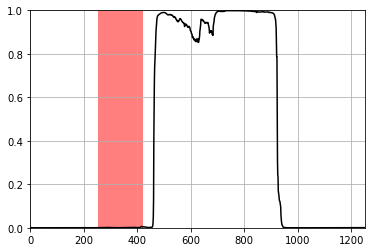

ENST00000531668
recall: 0.991769552230835
iou: 0.934108555316925
biotype: processed_transcript
II_786687  :  {'start': 191, 'stop': 458, 'MS': 0, 'TE': 0, 'frame': 3}
IP_194518  :  {'start': 195, 'stop': 438, 'MS': 1, 'TE': 1, 'frame': 1}


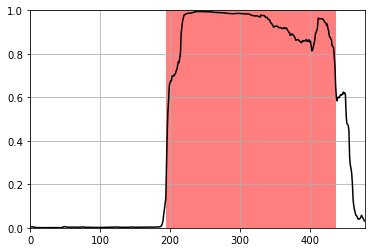

ENST00000442133
recall: 0.2641509473323822
iou: 0.2641509473323822
biotype: processed_transcript
IP_190669  :  {'start': 83, 'stop': 179, 'MS': 0, 'TE': 3, 'frame': 3}
IP_789086  :  {'start': 342, 'stop': 660, 'MS': 1, 'TE': 2, 'frame': 1}
IP_789087  :  {'start': 1140, 'stop': 1287, 'MS': 0, 'TE': 0, 'frame': 1}
IP_789085  :  {'start': 2370, 'stop': 2562, 'MS': 0, 'TE': 0, 'frame': 1}


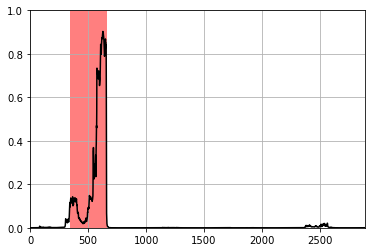

ENST00000447424
recall: 0.7655677795410156
iou: 0.7655677795410156
biotype: processed_transcript
IP_789760  :  {'start': 95, 'stop': 188, 'MS': 0, 'TE': 0, 'frame': 3}
IP_789756  :  {'start': 160, 'stop': 289, 'MS': 0, 'TE': 0, 'frame': 2}
IP_789759  :  {'start': 219, 'stop': 492, 'MS': 1, 'TE': 2, 'frame': 1}


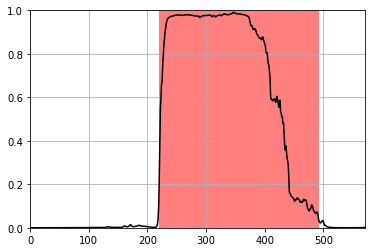

ENST00000490659
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_186496  :  {'start': 128, 'stop': 227, 'MS': 1, 'TE': 1, 'frame': 3}
II_795112  :  {'start': 307, 'stop': 637, 'MS': 0, 'TE': 0, 'frame': 2}
II_795114  :  {'start': 431, 'stop': 560, 'MS': 0, 'TE': 0, 'frame': 3}
IP_795113  :  {'start': 661, 'stop': 766, 'MS': 0, 'TE': 0, 'frame': 2}


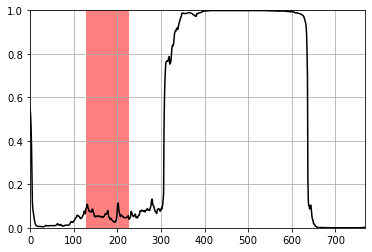

ENST00000371206
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_186496  :  {'start': 130, 'stop': 229, 'MS': 1, 'TE': 1, 'frame': 2}
II_795115  :  {'start': 309, 'stop': 885, 'MS': 0, 'TE': 0, 'frame': 1}
II_186503  :  {'start': 433, 'stop': 580, 'MS': 0, 'TE': 0, 'frame': 2}
IP_795117  :  {'start': 586, 'stop': 808, 'MS': 0, 'TE': 0, 'frame': 2}
IP_795116  :  {'start': 988, 'stop': 1255, 'MS': 0, 'TE': 0, 'frame': 2}


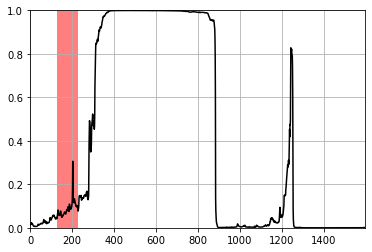

ENST00000645302
recall: 0.8823529481887817
iou: 0.1614060252904892
biotype: processed_transcript
IP_2311813  :  {'start': 310, 'stop': 403, 'MS': 0, 'TE': 0, 'frame': 2}
IP_2311811  :  {'start': 1069, 'stop': 1234, 'MS': 0, 'TE': 0, 'frame': 2}
IP_2311815  :  {'start': 1142, 'stop': 1292, 'MS': 0, 'TE': 0, 'frame': 3}
IP_2311812  :  {'start': 1513, 'stop': 1684, 'MS': 0, 'TE': 0, 'frame': 2}
IP_2311810  :  {'start': 1578, 'stop': 1758, 'MS': 0, 'TE': 0, 'frame': 1}
IP_3425672  :  {'start': 1900, 'stop': 2041, 'MS': 0, 'TE': 0, 'frame': 2}
IP_3202962  :  {'start': 2350, 'stop': 2659, 'MS': 0, 'TE': 0, 'frame': 2}
IP_3202960  :  {'start': 2465, 'stop': 2576, 'MS': 0, 'TE': 0, 'frame': 3}
IP_3202963  :  {'start': 2890, 'stop': 3037, 'MS': 0, 'TE': 0, 'frame': 2}
IP_3202961  :  {'start': 2897, 'stop': 2993, 'MS': 0, 'TE': 0, 'frame': 3}
IP_3425673  :  {'start': 3241, 'stop': 3391, 'MS': 0, 'TE': 0, 'frame': 2}
II_3426211  :  {'start': 4819, 'stop': 6217, 'MS': 0, 'TE': 0, 'frame': 2}
IP_20

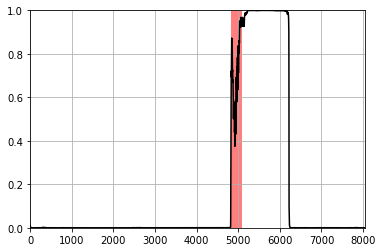

ENST00000607876
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_2351023  :  {'start': 442, 'stop': 646, 'MS': 0, 'TE': 0, 'frame': 2}
IP_2351025  :  {'start': 473, 'stop': 617, 'MS': 1, 'TE': 1, 'frame': 3}
IP_2351032  :  {'start': 738, 'stop': 843, 'MS': 0, 'TE': 0, 'frame': 1}
IP_2351031  :  {'start': 1122, 'stop': 1419, 'MS': 0, 'TE': 0, 'frame': 1}
IP_2351024  :  {'start': 1357, 'stop': 1489, 'MS': 0, 'TE': 0, 'frame': 2}
IP_2351030  :  {'start': 1485, 'stop': 1653, 'MS': 0, 'TE': 0, 'frame': 1}
IP_2351022  :  {'start': 1855, 'stop': 1969, 'MS': 0, 'TE': 0, 'frame': 2}
IP_2351028  :  {'start': 2036, 'stop': 2126, 'MS': 0, 'TE': 0, 'frame': 3}
IP_2351026  :  {'start': 2630, 'stop': 2855, 'MS': 0, 'TE': 0, 'frame': 3}
IP_2351021  :  {'start': 2857, 'stop': 3106, 'MS': 0, 'TE': 0, 'frame': 2}
IP_2351027  :  {'start': 3122, 'stop': 3290, 'MS': 0, 'TE': 0, 'frame': 3}
IP_2351029  :  {'start': 3323, 'stop': 3956, 'MS': 0, 'TE': 0, 'frame': 3}
IP_590640  :  {'start': 3526, 'stop': 3

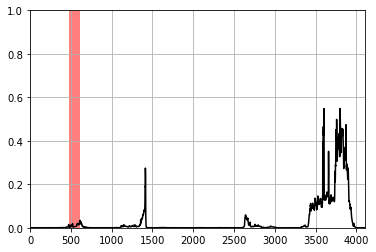

ENST00000639456
recall: 0.9931972622871399
iou: 0.35138386487960815
biotype: processed_transcript
IP_3418488  :  {'start': 77, 'stop': 302, 'MS': 2, 'TE': 0, 'frame': 3}
IP_3418487  :  {'start': 433, 'stop': 727, 'MS': 18, 'TE': 1, 'frame': 2}
II_671761  :  {'start': 1321, 'stop': 1657, 'MS': 1, 'TE': 0, 'frame': 2}
IP_3380865  :  {'start': 1771, 'stop': 1897, 'MS': 1, 'TE': 0, 'frame': 2}
IP_3380864  :  {'start': 2132, 'stop': 2249, 'MS': 0, 'TE': 0, 'frame': 3}
IP_2906552  :  {'start': 2304, 'stop': 2406, 'MS': 0, 'TE': 0, 'frame': 1}
IP_2906556  :  {'start': 2386, 'stop': 2485, 'MS': 0, 'TE': 0, 'frame': 2}
IP_2906549  :  {'start': 2390, 'stop': 2507, 'MS': 0, 'TE': 0, 'frame': 3}


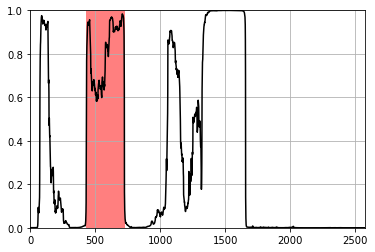

ENST00000649681
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_082316  :  {'start': 55, 'stop': 184, 'MS': 2, 'TE': 2, 'frame': 2}
IP_3417194  :  {'start': 152, 'stop': 404, 'MS': 0, 'TE': 0, 'frame': 3}
IP_3417188  :  {'start': 496, 'stop': 616, 'MS': 0, 'TE': 0, 'frame': 2}
IP_3417185  :  {'start': 747, 'stop': 846, 'MS': 0, 'TE': 0, 'frame': 1}
IP_3417189  :  {'start': 1120, 'stop': 1270, 'MS': 1, 'TE': 0, 'frame': 2}
IP_3417186  :  {'start': 1977, 'stop': 2112, 'MS': 0, 'TE': 0, 'frame': 1}
IP_3417190  :  {'start': 2956, 'stop': 3097, 'MS': 0, 'TE': 0, 'frame': 2}
IP_3417191  :  {'start': 3277, 'stop': 3565, 'MS': 0, 'TE': 0, 'frame': 2}
IP_3417192  :  {'start': 3757, 'stop': 3865, 'MS': 0, 'TE': 0, 'frame': 2}
IP_3417195  :  {'start': 3782, 'stop': 3893, 'MS': 0, 'TE': 0, 'frame': 3}
IP_3417193  :  {'start': 3925, 'stop': 4048, 'MS': 0, 'TE': 0, 'frame': 2}
IP_3417187  :  {'start': 4302, 'stop': 4470, 'MS': 0, 'TE': 0, 'frame': 1}
IP_082320  :  {'start': 4426, 'stop': 4843,

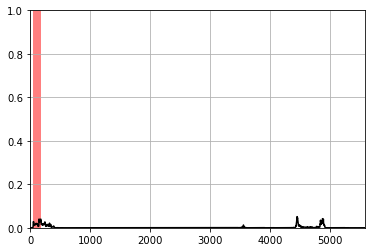

ENST00000650250
recall: 0.9907407164573669
iou: 0.663223147392273
biotype: processed_transcript
IP_578448  :  {'start': 59, 'stop': 278, 'MS': 0, 'TE': 0, 'frame': 3}
IP_578447  :  {'start': 300, 'stop': 426, 'MS': 0, 'TE': 0, 'frame': 1}
IP_3423096  :  {'start': 313, 'stop': 535, 'MS': 0, 'TE': 0, 'frame': 2}
IP_3423098  :  {'start': 935, 'stop': 1259, 'MS': 1, 'TE': 1, 'frame': 3}
IP_3423095  :  {'start': 1698, 'stop': 1833, 'MS': 0, 'TE': 0, 'frame': 1}
IP_3423099  :  {'start': 1784, 'stop': 1943, 'MS': 0, 'TE': 0, 'frame': 3}
IP_3423100  :  {'start': 2111, 'stop': 2210, 'MS': 0, 'TE': 0, 'frame': 3}
IP_3423097  :  {'start': 2392, 'stop': 2524, 'MS': 0, 'TE': 0, 'frame': 2}
IP_3423101  :  {'start': 2657, 'stop': 2783, 'MS': 0, 'TE': 0, 'frame': 3}


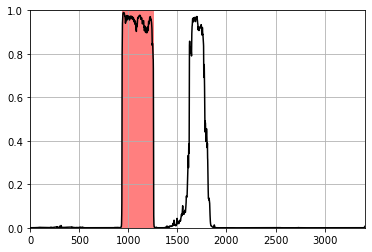

ENST00000566078
recall: 1.0
iou: 0.18471337854862213
biotype: processed_transcript
II_3435172  :  {'start': 6, 'stop': 969, 'MS': 0, 'TE': 0, 'frame': 1}
IP_245476  :  {'start': 16, 'stop': 190, 'MS': 1, 'TE': 4, 'frame': 2}
IP_3435173  :  {'start': 993, 'stop': 1104, 'MS': 0, 'TE': 0, 'frame': 1}


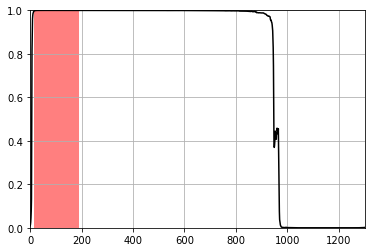

ENST00000648241
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_082316  :  {'start': 70, 'stop': 199, 'MS': 2, 'TE': 2, 'frame': 2}
IP_3436149  :  {'start': 167, 'stop': 308, 'MS': 0, 'TE': 0, 'frame': 3}
IP_082320  :  {'start': 311, 'stop': 728, 'MS': 0, 'TE': 1, 'frame': 3}
IP_082319  :  {'start': 998, 'stop': 1136, 'MS': 0, 'TE': 1, 'frame': 3}
IP_082317  :  {'start': 1300, 'stop': 1402, 'MS': 0, 'TE': 0, 'frame': 2}


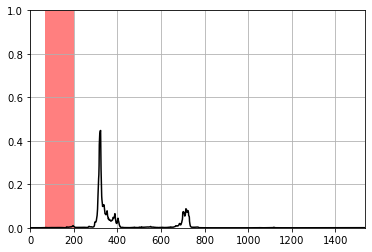

ENST00000366525
recall: 1.0
iou: 0.34220531582832336
biotype: processed_transcript
II_3436388  :  {'start': 198, 'stop': 351, 'MS': 0, 'TE': 0, 'frame': 1}
IP_3436390  :  {'start': 286, 'stop': 379, 'MS': 0, 'TE': 0, 'frame': 2}
II_3436391  :  {'start': 451, 'stop': 628, 'MS': 0, 'TE': 0, 'frame': 2}
II_3436389  :  {'start': 549, 'stop': 2091, 'MS': 0, 'TE': 0, 'frame': 1}
IP_079725  :  {'start': 874, 'stop': 1057, 'MS': 1, 'TE': 0, 'frame': 2}
IP_079723  :  {'start': 1573, 'stop': 2113, 'MS': 6, 'TE': 1, 'frame': 2}
IP_079731  :  {'start': 2057, 'stop': 2168, 'MS': 1, 'TE': 0, 'frame': 3}
IP_079721  :  {'start': 2395, 'stop': 2515, 'MS': 0, 'TE': 0, 'frame': 2}


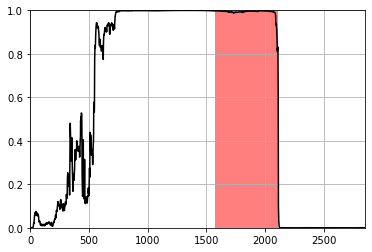

ENST00000484270
recall: 1.0
iou: 0.16650716960430145
biotype: processed_transcript
II_683484  :  {'start': 102, 'stop': 1146, 'MS': 0, 'TE': 0, 'frame': 1}
IP_061811  :  {'start': 910, 'stop': 1084, 'MS': 1, 'TE': 1, 'frame': 2}
IP_683485  :  {'start': 1132, 'stop': 1249, 'MS': 0, 'TE': 0, 'frame': 2}


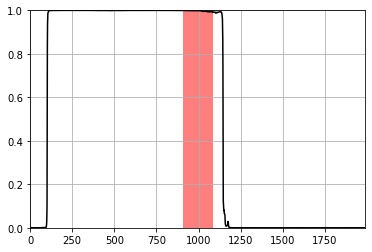

ENST00000493212
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_068428  :  {'start': 323, 'stop': 467, 'MS': 1, 'TE': 1, 'frame': 3}
IP_068426  :  {'start': 659, 'stop': 800, 'MS': 0, 'TE': 2, 'frame': 3}
II_068432  :  {'start': 786, 'stop': 924, 'MS': 0, 'TE': 0, 'frame': 1}
IP_068430  :  {'start': 796, 'stop': 901, 'MS': 0, 'TE': 1, 'frame': 2}


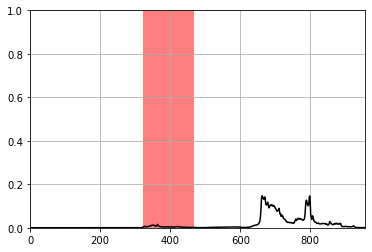

ENST00000486969
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_077126  :  {'start': 262, 'stop': 388, 'MS': 1, 'TE': 2, 'frame': 2}
IP_675134  :  {'start': 714, 'stop': 891, 'MS': 0, 'TE': 0, 'frame': 1}


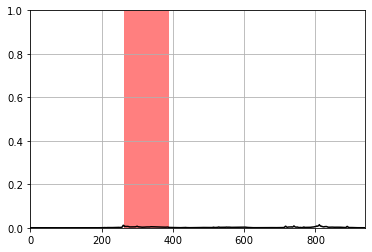

ENST00000473798
recall: 0.9146341681480408
iou: 0.9146341681480408
biotype: processed_transcript
IP_080225  :  {'start': 130, 'stop': 247, 'MS': 0, 'TE': 1, 'frame': 2}
IP_080226  :  {'start': 331, 'stop': 823, 'MS': 1, 'TE': 1, 'frame': 2}
IP_080224  :  {'start': 1152, 'stop': 1248, 'MS': 0, 'TE': 0, 'frame': 1}


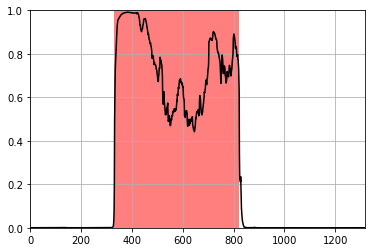

ENST00000392688
recall: 0.5696969628334045
iou: 0.5696969628334045
biotype: processed_transcript
IP_081537  :  {'start': 208, 'stop': 538, 'MS': 1, 'TE': 1, 'frame': 2}
IP_081531  :  {'start': 669, 'stop': 783, 'MS': 0, 'TE': 0, 'frame': 1}
IP_081530  :  {'start': 909, 'stop': 1092, 'MS': 0, 'TE': 0, 'frame': 1}
IP_081538  :  {'start': 1202, 'stop': 1334, 'MS': 0, 'TE': 1, 'frame': 3}
IP_081534  :  {'start': 1512, 'stop': 1653, 'MS': 0, 'TE': 0, 'frame': 1}
IP_081533  :  {'start': 1698, 'stop': 1836, 'MS': 0, 'TE': 0, 'frame': 1}
IP_081539  :  {'start': 2366, 'stop': 2537, 'MS': 0, 'TE': 0, 'frame': 3}
IP_081535  :  {'start': 2572, 'stop': 2665, 'MS': 0, 'TE': 0, 'frame': 2}


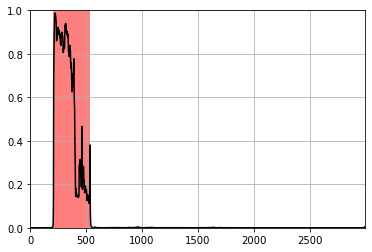

ENST00000495820
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_643171  :  {'start': 293, 'stop': 425, 'MS': 1, 'TE': 2, 'frame': 3}
IP_093005  :  {'start': 446, 'stop': 536, 'MS': 0, 'TE': 0, 'frame': 3}
IP_093014  :  {'start': 563, 'stop': 668, 'MS': 0, 'TE': 0, 'frame': 3}
IP_093015  :  {'start': 692, 'stop': 788, 'MS': 0, 'TE': 0, 'frame': 3}


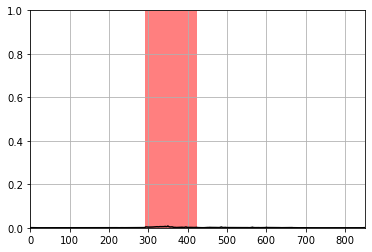

ENST00000491074
recall: 1.0
iou: 0.07205882668495178
biotype: processed_transcript
IP_093059  :  {'start': 641, 'stop': 788, 'MS': 1, 'TE': 2, 'frame': 3}
IP_643119  :  {'start': 1421, 'stop': 1538, 'MS': 0, 'TE': 0, 'frame': 3}
IP_643118  :  {'start': 1591, 'stop': 1714, 'MS': 0, 'TE': 0, 'frame': 2}
IP_643116  :  {'start': 1765, 'stop': 1867, 'MS': 0, 'TE': 0, 'frame': 2}
IP_093056  :  {'start': 2505, 'stop': 2664, 'MS': 0, 'TE': 0, 'frame': 1}
II_643115  :  {'start': 2676, 'stop': 3630, 'MS': 0, 'TE': 0, 'frame': 1}
IP_093045  :  {'start': 3038, 'stop': 3146, 'MS': 1, 'TE': 0, 'frame': 3}
IP_093055  :  {'start': 3439, 'stop': 3538, 'MS': 0, 'TE': 0, 'frame': 2}


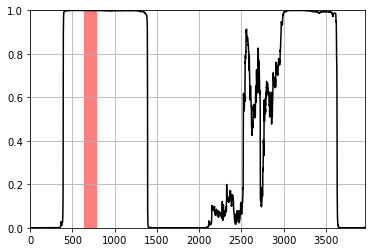

ENST00000498160
recall: 0.40437158942222595
iou: 0.40437158942222595
biotype: processed_transcript
IP_095357  :  {'start': 367, 'stop': 550, 'MS': 1, 'TE': 6, 'frame': 2}


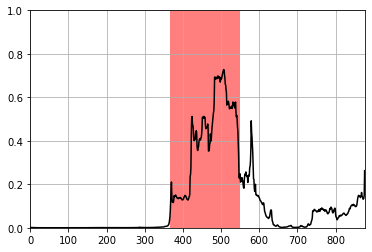

ENST00000494067
recall: 0.994535505771637
iou: 0.7027027010917664
biotype: processed_transcript
IP_095357  :  {'start': 103, 'stop': 286, 'MS': 1, 'TE': 6, 'frame': 2}


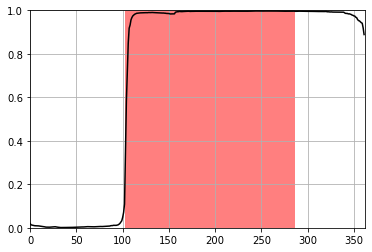

ENST00000429952
recall: 0.18421052396297455
iou: 0.123046875
biotype: processed_transcript
IP_098529  :  {'start': 400, 'stop': 742, 'MS': 1, 'TE': 1, 'frame': 2}
IP_098526  :  {'start': 585, 'stop': 1041, 'MS': 0, 'TE': 0, 'frame': 1}
IP_098527  :  {'start': 1284, 'stop': 1428, 'MS': 0, 'TE': 0, 'frame': 1}
IP_098528  :  {'start': 1657, 'stop': 1750, 'MS': 0, 'TE': 0, 'frame': 2}
IP_098524  :  {'start': 1679, 'stop': 1811, 'MS': 0, 'TE': 0, 'frame': 3}


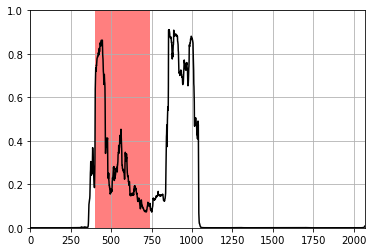

ENST00000423477
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_098640  :  {'start': 238, 'stop': 337, 'MS': 1, 'TE': 5, 'frame': 2}
IP_098639  :  {'start': 522, 'stop': 789, 'MS': 0, 'TE': 0, 'frame': 1}
IP_098633  :  {'start': 728, 'stop': 872, 'MS': 0, 'TE': 0, 'frame': 3}
IP_098636  :  {'start': 914, 'stop': 1004, 'MS': 0, 'TE': 0, 'frame': 3}
IP_098638  :  {'start': 1104, 'stop': 1200, 'MS': 0, 'TE': 0, 'frame': 1}
IP_098642  :  {'start': 1162, 'stop': 1258, 'MS': 0, 'TE': 0, 'frame': 2}


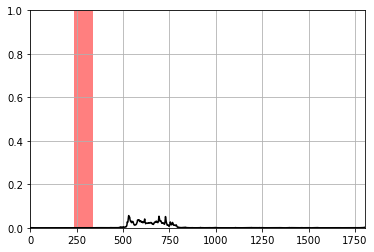

ENST00000607836
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_099347  :  {'start': 183, 'stop': 288, 'MS': 1, 'TE': 2, 'frame': 1}
IP_099346  :  {'start': 911, 'stop': 1127, 'MS': 0, 'TE': 0, 'frame': 3}
IP_099348  :  {'start': 1110, 'stop': 1200, 'MS': 0, 'TE': 0, 'frame': 1}
IP_099349  :  {'start': 1413, 'stop': 1512, 'MS': 0, 'TE': 0, 'frame': 1}
IP_099345  :  {'start': 1757, 'stop': 1934, 'MS': 0, 'TE': 0, 'frame': 3}


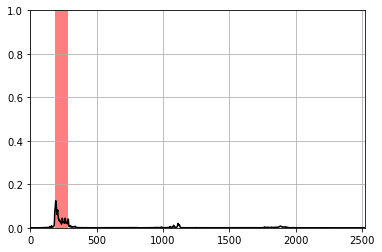

ENST00000428005
recall: 1.0
iou: 0.1846652328968048
biotype: processed_transcript
II_631492  :  {'start': 294, 'stop': 1221, 'MS': 0, 'TE': 0, 'frame': 1}
IP_101677  :  {'start': 547, 'stop': 718, 'MS': 1, 'TE': 1, 'frame': 2}
IP_631493  :  {'start': 1057, 'stop': 1180, 'MS': 0, 'TE': 0, 'frame': 2}


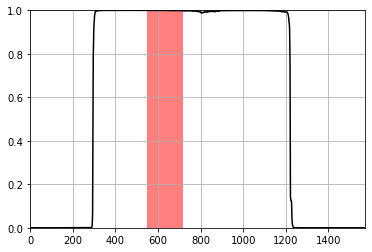

ENST00000493381
recall: 0.04325699806213379
iou: 0.02390998601913452
biotype: processed_transcript
II_629149  :  {'start': 27, 'stop': 348, 'MS': 0, 'TE': 0, 'frame': 1}
IP_104391  :  {'start': 418, 'stop': 811, 'MS': 1, 'TE': 29, 'frame': 2}


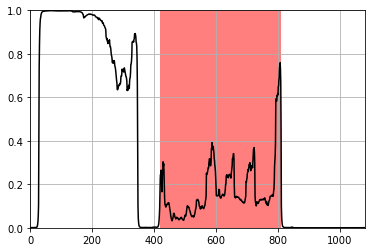

ENST00000467069
recall: 0.7896825671195984
iou: 0.7896825671195984
biotype: processed_transcript
IP_113547  :  {'start': 76, 'stop': 166, 'MS': 0, 'TE': 0, 'frame': 2}
IP_113543  :  {'start': 90, 'stop': 342, 'MS': 8, 'TE': 8, 'frame': 1}
IP_628092  :  {'start': 301, 'stop': 409, 'MS': 0, 'TE': 0, 'frame': 2}
IP_113544  :  {'start': 362, 'stop': 509, 'MS': 0, 'TE': 1, 'frame': 3}
IP_113546  :  {'start': 483, 'stop': 576, 'MS': 0, 'TE': 0, 'frame': 1}


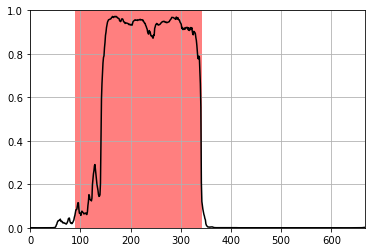

ENST00000521267
recall: 0.095238097012043
iou: 0.095238097012043
biotype: processed_transcript
IP_113547  :  {'start': 128, 'stop': 218, 'MS': 0, 'TE': 0, 'frame': 3}
IP_113543  :  {'start': 142, 'stop': 394, 'MS': 8, 'TE': 8, 'frame': 2}
IP_628092  :  {'start': 353, 'stop': 461, 'MS': 0, 'TE': 0, 'frame': 3}
IP_113544  :  {'start': 414, 'stop': 561, 'MS': 0, 'TE': 1, 'frame': 1}
IP_113546  :  {'start': 535, 'stop': 628, 'MS': 0, 'TE': 0, 'frame': 2}


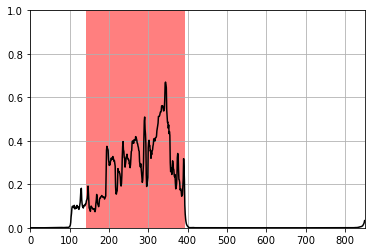

ENST00000522525
recall: 0.3730158805847168
iou: 0.37154150009155273
biotype: processed_transcript
IP_113547  :  {'start': 140, 'stop': 230, 'MS': 0, 'TE': 0, 'frame': 3}
IP_113543  :  {'start': 154, 'stop': 406, 'MS': 8, 'TE': 8, 'frame': 2}
IP_113548  :  {'start': 365, 'stop': 506, 'MS': 0, 'TE': 0, 'frame': 3}
IP_113544  :  {'start': 919, 'stop': 1066, 'MS': 0, 'TE': 1, 'frame': 2}
IP_113546  :  {'start': 1040, 'stop': 1133, 'MS': 0, 'TE': 0, 'frame': 3}
IP_113542  :  {'start': 1329, 'stop': 1500, 'MS': 0, 'TE': 0, 'frame': 1}


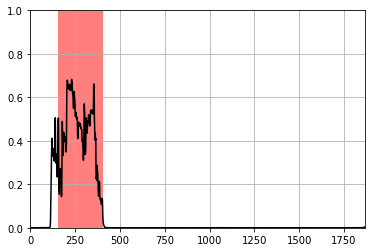

ENST00000519238
recall: 1.0
iou: 0.2628650963306427
biotype: processed_transcript
IP_609939  :  {'start': 92, 'stop': 428, 'MS': 0, 'TE': 0, 'frame': 3}
II_609940  :  {'start': 644, 'stop': 1241, 'MS': 0, 'TE': 1, 'frame': 3}
IP_130723  :  {'start': 1041, 'stop': 1230, 'MS': 1, 'TE': 1, 'frame': 1}


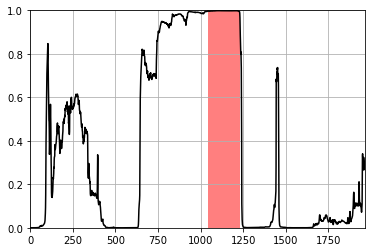

ENST00000508930
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_135265  :  {'start': 49, 'stop': 220, 'MS': 1, 'TE': 15, 'frame': 2}
IP_135266  :  {'start': 140, 'stop': 251, 'MS': 0, 'TE': 0, 'frame': 3}
II_604409  :  {'start': 710, 'stop': 1901, 'MS': 0, 'TE': 0, 'frame': 3}
IP_135264  :  {'start': 1255, 'stop': 1687, 'MS': 2, 'TE': 0, 'frame': 2}
IP_604407  :  {'start': 1725, 'stop': 2079, 'MS': 0, 'TE': 0, 'frame': 1}
IP_135263  :  {'start': 2480, 'stop': 2621, 'MS': 0, 'TE': 0, 'frame': 3}


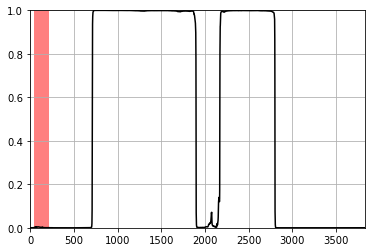

ENST00000462494
recall: 0.0
iou: 0.0
biotype: processed_transcript
II_590134  :  {'start': 84, 'stop': 642, 'MS': 0, 'TE': 0, 'frame': 1}
IP_150054  :  {'start': 88, 'stop': 214, 'MS': 0, 'TE': 0, 'frame': 2}
II_150058  :  {'start': 891, 'stop': 1653, 'MS': 0, 'TE': 0, 'frame': 1}
IP_150056  :  {'start': 1279, 'stop': 1375, 'MS': 0, 'TE': 0, 'frame': 2}
IP_150055  :  {'start': 1717, 'stop': 2059, 'MS': 1, 'TE': 4, 'frame': 2}
IP_150053  :  {'start': 1728, 'stop': 1896, 'MS': 1, 'TE': 0, 'frame': 1}
IP_150057  :  {'start': 2042, 'stop': 2147, 'MS': 0, 'TE': 0, 'frame': 3}
IP_150051  :  {'start': 2097, 'stop': 2232, 'MS': 0, 'TE': 0, 'frame': 1}


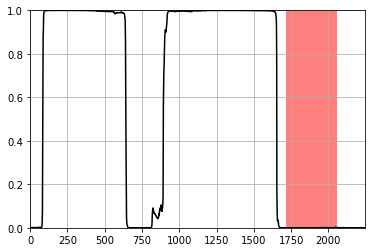

ENST00000558836
recall: 1.0
iou: 0.21631579101085663
biotype: processed_transcript
IP_589711  :  {'start': 23, 'stop': 119, 'MS': 0, 'TE': 0, 'frame': 3}
II_589710  :  {'start': 241, 'stop': 2143, 'MS': 0, 'TE': 0, 'frame': 2}
IP_155509  :  {'start': 647, 'stop': 782, 'MS': 0, 'TE': 2, 'frame': 3}
IP_155511  :  {'start': 1265, 'stop': 1358, 'MS': 0, 'TE': 0, 'frame': 3}
IP_155514  :  {'start': 1481, 'stop': 1892, 'MS': 4, 'TE': 6, 'frame': 3}
IP_155506  :  {'start': 2236, 'stop': 2371, 'MS': 2, 'TE': 0, 'frame': 2}
IP_155508  :  {'start': 2554, 'stop': 2665, 'MS': 0, 'TE': 0, 'frame': 2}
IP_155513  :  {'start': 2654, 'stop': 2780, 'MS': 0, 'TE': 0, 'frame': 3}
IP_155510  :  {'start': 2849, 'stop': 2951, 'MS': 0, 'TE': 0, 'frame': 3}


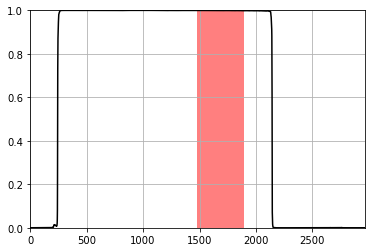

ENST00000529041
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_164825  :  {'start': 29, 'stop': 173, 'MS': 1, 'TE': 3, 'frame': 3}
IP_164824  :  {'start': 169, 'stop': 271, 'MS': 0, 'TE': 4, 'frame': 2}
IP_164808  :  {'start': 345, 'stop': 435, 'MS': 0, 'TE': 0, 'frame': 1}


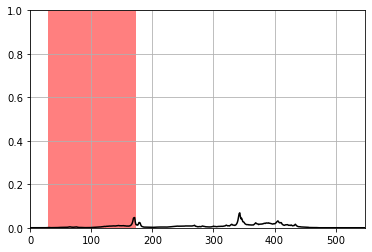

ENST00000531473
recall: 1.0
iou: 0.21739129722118378
biotype: processed_transcript
IP_574036  :  {'start': 119, 'stop': 506, 'MS': 0, 'TE': 0, 'frame': 3}
IP_167979  :  {'start': 273, 'stop': 423, 'MS': 1, 'TE': 0, 'frame': 1}
IP_574035  :  {'start': 676, 'stop': 826, 'MS': 0, 'TE': 0, 'frame': 2}
II_574034  :  {'start': 792, 'stop': 1278, 'MS': 0, 'TE': 4, 'frame': 1}
IP_167974  :  {'start': 877, 'stop': 1072, 'MS': 1, 'TE': 1, 'frame': 2}
IP_167975  :  {'start': 1665, 'stop': 1830, 'MS': 0, 'TE': 0, 'frame': 1}
II_574037  :  {'start': 1748, 'stop': 1928, 'MS': 0, 'TE': 1, 'frame': 3}


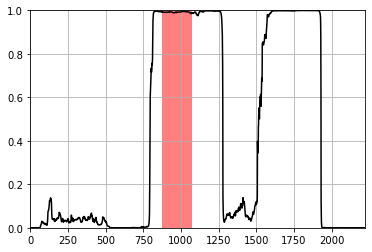

ENST00000397703
recall: 0.995726466178894
iou: 0.995726466178894
biotype: processed_transcript
IP_168806  :  {'start': 67, 'stop': 160, 'MS': 0, 'TE': 3, 'frame': 2}
IP_168807  :  {'start': 685, 'stop': 1153, 'MS': 3, 'TE': 2, 'frame': 2}


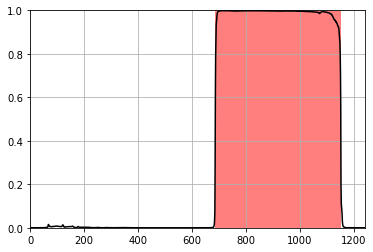

ENST00000457356
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_169225  :  {'start': 855, 'stop': 1032, 'MS': 0, 'TE': 0, 'frame': 1}
IP_169229  :  {'start': 952, 'stop': 1084, 'MS': 0, 'TE': 0, 'frame': 2}
IP_169236  :  {'start': 1601, 'stop': 1724, 'MS': 1, 'TE': 2, 'frame': 3}
IP_169227  :  {'start': 1744, 'stop': 1855, 'MS': 0, 'TE': 0, 'frame': 2}
IP_169228  :  {'start': 1864, 'stop': 1975, 'MS': 0, 'TE': 0, 'frame': 2}
IP_169223  :  {'start': 2700, 'stop': 2829, 'MS': 0, 'TE': 0, 'frame': 1}
IP_169230  :  {'start': 2920, 'stop': 3025, 'MS': 0, 'TE': 0, 'frame': 2}
IP_169231  :  {'start': 3046, 'stop': 3136, 'MS': 0, 'TE': 0, 'frame': 2}
IP_169235  :  {'start': 3353, 'stop': 3497, 'MS': 0, 'TE': 0, 'frame': 3}
IP_169237  :  {'start': 3812, 'stop': 3920, 'MS': 0, 'TE': 0, 'frame': 3}
IP_169232  :  {'start': 3926, 'stop': 4016, 'MS': 0, 'TE': 0, 'frame': 3}
IP_169226  :  {'start': 3936, 'stop': 4149, 'MS': 0, 'TE': 0, 'frame': 1}


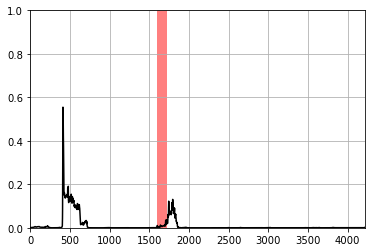

ENST00000444125
recall: 0.9963768124580383
iou: 0.9927797913551331
biotype: processed_transcript
IP_180168  :  {'start': 98, 'stop': 374, 'MS': 1, 'TE': 4, 'frame': 3}


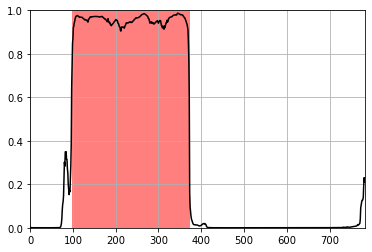

ENST00000546446
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_791977  :  {'start': 13, 'stop': 139, 'MS': 0, 'TE': 0, 'frame': 2}
II_188750  :  {'start': 558, 'stop': 654, 'MS': 0, 'TE': 2, 'frame': 1}
IP_188754  :  {'start': 710, 'stop': 983, 'MS': 1, 'TE': 1, 'frame': 3}
IP_188752  :  {'start': 751, 'stop': 967, 'MS': 2, 'TE': 0, 'frame': 2}
IP_188749  :  {'start': 930, 'stop': 1158, 'MS': 0, 'TE': 0, 'frame': 1}


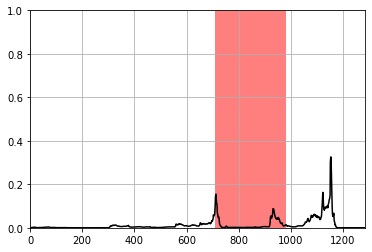

ENST00000534299
recall: 0.046783626079559326
iou: 0.021276595070958138
biotype: processed_transcript
IP_193928  :  {'start': 168, 'stop': 276, 'MS': 0, 'TE': 0, 'frame': 1}
IP_193909  :  {'start': 275, 'stop': 446, 'MS': 1, 'TE': 2, 'frame': 3}


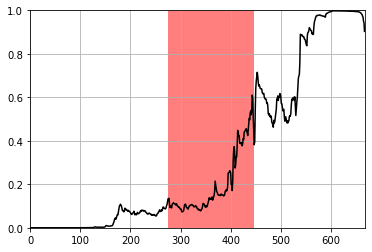

ENST00000534803
recall: 1.0
iou: 0.17268623411655426
biotype: processed_transcript
II_786601  :  {'start': 12, 'stop': 900, 'MS': 0, 'TE': 0, 'frame': 1}
IP_194702  :  {'start': 100, 'stop': 253, 'MS': 1, 'TE': 1, 'frame': 2}
IP_194695  :  {'start': 547, 'stop': 643, 'MS': 4, 'TE': 0, 'frame': 2}
IP_786602  :  {'start': 673, 'stop': 838, 'MS': 0, 'TE': 0, 'frame': 2}


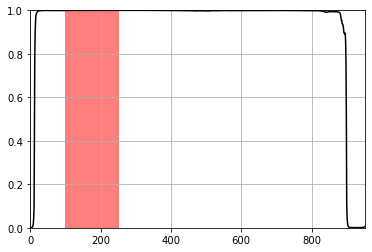

ENST00000529121
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_196467  :  {'start': 5, 'stop': 125, 'MS': 0, 'TE': 0, 'frame': 3}
IP_196466  :  {'start': 277, 'stop': 481, 'MS': 1, 'TE': 2, 'frame': 2}
IP_785778  :  {'start': 1266, 'stop': 1386, 'MS': 0, 'TE': 0, 'frame': 1}


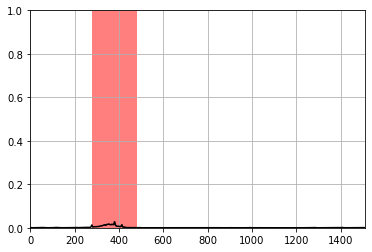

ENST00000530213
recall: 0.4779874086380005
iou: 0.13511110842227936
biotype: processed_transcript
IP_197563  :  {'start': 159, 'stop': 477, 'MS': 1, 'TE': 3, 'frame': 1}
IP_197565  :  {'start': 184, 'stop': 295, 'MS': 0, 'TE': 0, 'frame': 2}
II_782409  :  {'start': 323, 'stop': 1043, 'MS': 0, 'TE': 0, 'frame': 3}
IP_197564  :  {'start': 1043, 'stop': 1316, 'MS': 0, 'TE': 3, 'frame': 3}
II_782408  :  {'start': 1216, 'stop': 1462, 'MS': 0, 'TE': 1, 'frame': 2}


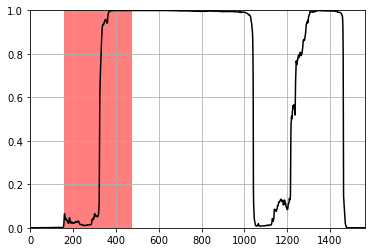

ENST00000528109
recall: 0.48427674174308777
iou: 0.12399356067180634
biotype: processed_transcript
IP_197563  :  {'start': 176, 'stop': 494, 'MS': 1, 'TE': 3, 'frame': 3}
IP_197565  :  {'start': 201, 'stop': 312, 'MS': 0, 'TE': 0, 'frame': 1}
IP_197564  :  {'start': 998, 'stop': 1271, 'MS': 0, 'TE': 3, 'frame': 3}


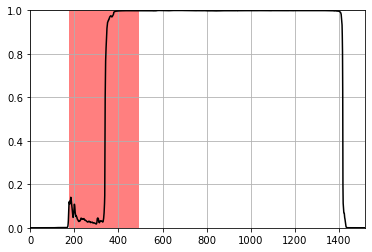

ENST00000529544
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_198067  :  {'start': 1, 'stop': 214, 'MS': 1, 'TE': 2, 'frame': 2}


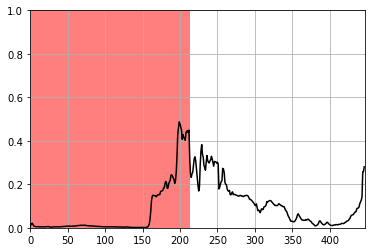

ENST00000649843
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_3426238  :  {'start': 182, 'stop': 308, 'MS': 0, 'TE': 0, 'frame': 3}
IP_205156  :  {'start': 304, 'stop': 499, 'MS': 1, 'TE': 1, 'frame': 2}
IP_205157  :  {'start': 856, 'stop': 1069, 'MS': 0, 'TE': 0, 'frame': 2}


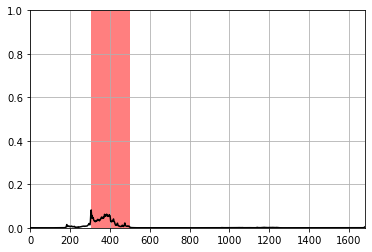

ENST00000500537
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_205156  :  {'start': 302, 'stop': 497, 'MS': 1, 'TE': 1, 'frame': 3}
IP_205157  :  {'start': 854, 'stop': 1067, 'MS': 0, 'TE': 0, 'frame': 3}
IP_205155  :  {'start': 1685, 'stop': 1817, 'MS': 0, 'TE': 0, 'frame': 3}


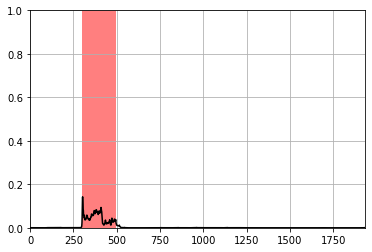

ENST00000545038
recall: 0.0
iou: 0.0
biotype: processed_transcript
II_771405  :  {'start': 14, 'stop': 782, 'MS': 0, 'TE': 0, 'frame': 3}
IP_207221  :  {'start': 111, 'stop': 264, 'MS': 0, 'TE': 1, 'frame': 1}
IP_771396  :  {'start': 857, 'stop': 953, 'MS': 0, 'TE': 0, 'frame': 3}
II_771404  :  {'start': 1362, 'stop': 1932, 'MS': 0, 'TE': 0, 'frame': 1}
IP_207222  :  {'start': 1813, 'stop': 1912, 'MS': 0, 'TE': 0, 'frame': 2}
IP_207217  :  {'start': 1940, 'stop': 2054, 'MS': 0, 'TE': 0, 'frame': 3}
IP_207218  :  {'start': 1983, 'stop': 2145, 'MS': 3, 'TE': 1, 'frame': 1}
IP_207219  :  {'start': 2160, 'stop': 2292, 'MS': 0, 'TE': 0, 'frame': 1}


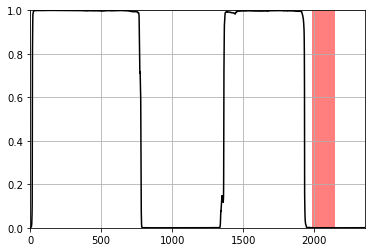

ENST00000538888
recall: 1.0
iou: 0.3435754179954529
biotype: processed_transcript
IP_216536  :  {'start': 170, 'stop': 293, 'MS': 1, 'TE': 1, 'frame': 3}


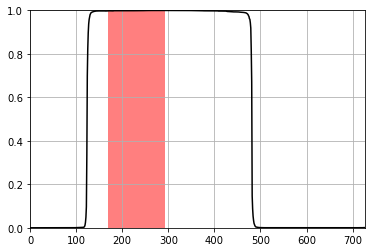

ENST00000425637
recall: 1.0
iou: 0.3435754179954529
biotype: processed_transcript
IP_216536  :  {'start': 170, 'stop': 293, 'MS': 1, 'TE': 1, 'frame': 3}
IP_768579  :  {'start': 761, 'stop': 887, 'MS': 0, 'TE': 0, 'frame': 3}
IP_768576  :  {'start': 819, 'stop': 960, 'MS': 0, 'TE': 0, 'frame': 1}
IP_768578  :  {'start': 1009, 'stop': 1384, 'MS': 0, 'TE': 0, 'frame': 2}


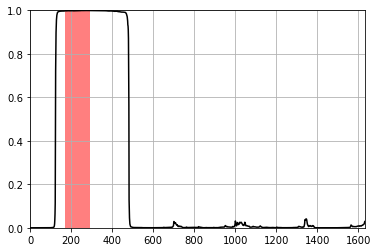

ENST00000508564
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_217850  :  {'start': 109, 'stop': 496, 'MS': 1, 'TE': 12, 'frame': 2}
IP_217852  :  {'start': 296, 'stop': 461, 'MS': 0, 'TE': 0, 'frame': 3}
IP_217849  :  {'start': 729, 'stop': 864, 'MS': 0, 'TE': 0, 'frame': 1}
IP_217851  :  {'start': 842, 'stop': 1031, 'MS': 0, 'TE': 0, 'frame': 3}
IP_217848  :  {'start': 984, 'stop': 1146, 'MS': 0, 'TE': 0, 'frame': 1}


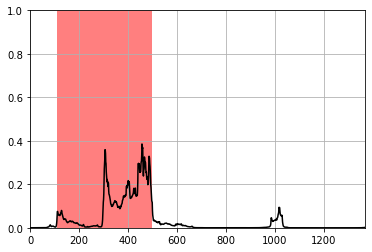

ENST00000500741
recall: 0.7435897588729858
iou: 0.6137565970420837
biotype: processed_transcript
IP_218239  :  {'start': 4, 'stop': 160, 'MS': 1, 'TE': 2, 'frame': 2}
IP_218235  :  {'start': 36, 'stop': 195, 'MS': 0, 'TE': 5, 'frame': 1}
IP_218237  :  {'start': 265, 'stop': 418, 'MS': 0, 'TE': 5, 'frame': 2}
IP_218234  :  {'start': 855, 'stop': 1116, 'MS': 0, 'TE': 3, 'frame': 1}
IP_218236  :  {'start': 1455, 'stop': 1578, 'MS': 0, 'TE': 0, 'frame': 1}
IP_218238  :  {'start': 1501, 'stop': 1627, 'MS': 0, 'TE': 0, 'frame': 2}
IP_218240  :  {'start': 1633, 'stop': 1756, 'MS': 0, 'TE': 0, 'frame': 2}


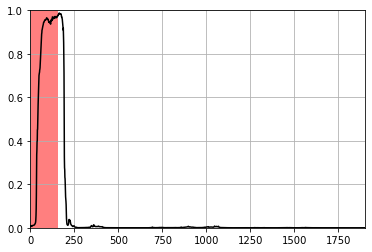

ENST00000645875
recall: 0.9040880799293518
iou: 0.5
biotype: processed_transcript


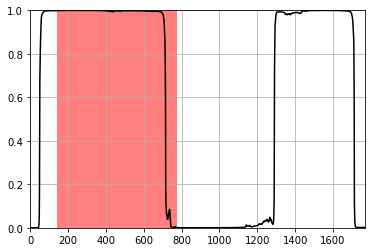

ENST00000529902
recall: 1.0
iou: 0.37386706471443176
biotype: processed_transcript
IP_225007  :  {'start': 184, 'stop': 355, 'MS': 0, 'TE': 0, 'frame': 2}
IP_225015  :  {'start': 198, 'stop': 414, 'MS': 0, 'TE': 0, 'frame': 1}
IP_225009  :  {'start': 439, 'stop': 550, 'MS': 0, 'TE': 0, 'frame': 2}
IP_747637  :  {'start': 720, 'stop': 1236, 'MS': 0, 'TE': 0, 'frame': 1}
IP_747640  :  {'start': 817, 'stop': 1105, 'MS': 0, 'TE': 0, 'frame': 2}
IP_747641  :  {'start': 1396, 'stop': 1522, 'MS': 0, 'TE': 0, 'frame': 2}
IP_747639  :  {'start': 1849, 'stop': 2062, 'MS': 0, 'TE': 0, 'frame': 2}
IP_747644  :  {'start': 2495, 'stop': 2618, 'MS': 0, 'TE': 0, 'frame': 3}
IP_747638  :  {'start': 2499, 'stop': 2631, 'MS': 0, 'TE': 0, 'frame': 1}
IP_747645  :  {'start': 3284, 'stop': 3779, 'MS': 1, 'TE': 1, 'frame': 3}
IP_747635  :  {'start': 3297, 'stop': 3483, 'MS': 0, 'TE': 0, 'frame': 1}
IP_747636  :  {'start': 3570, 'stop': 3690, 'MS': 0, 'TE': 0, 'frame': 1}
IP_747634  :  {'start': 3762, 'stop':

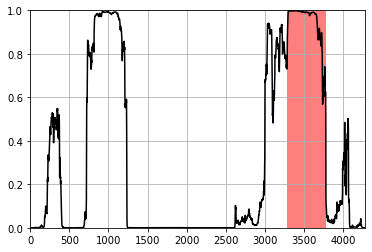

ENST00000557625
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_230105  :  {'start': 25, 'stop': 154, 'MS': 1, 'TE': 1, 'frame': 2}
IP_230108  :  {'start': 186, 'stop': 366, 'MS': 0, 'TE': 0, 'frame': 1}
IP_230107  :  {'start': 199, 'stop': 310, 'MS': 0, 'TE': 0, 'frame': 2}


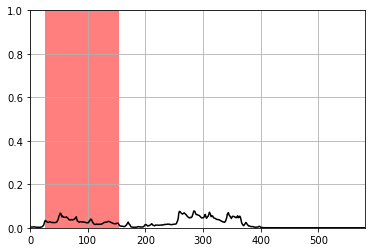

ENST00000560255
recall: 0.20987653732299805
iou: 0.1683168262243271
biotype: processed_transcript
IP_238759  :  {'start': 591, 'stop': 834, 'MS': 1, 'TE': 8, 'frame': 1}
IP_238760  :  {'start': 896, 'stop': 1010, 'MS': 0, 'TE': 0, 'frame': 3}
IP_238758  :  {'start': 1419, 'stop': 1530, 'MS': 0, 'TE': 0, 'frame': 1}
IP_736914  :  {'start': 2206, 'stop': 2530, 'MS': 0, 'TE': 0, 'frame': 2}
IP_736915  :  {'start': 3464, 'stop': 3566, 'MS': 0, 'TE': 0, 'frame': 3}
IP_736913  :  {'start': 3607, 'stop': 3808, 'MS': 0, 'TE': 0, 'frame': 2}
IP_736916  :  {'start': 4094, 'stop': 4208, 'MS': 0, 'TE': 0, 'frame': 3}


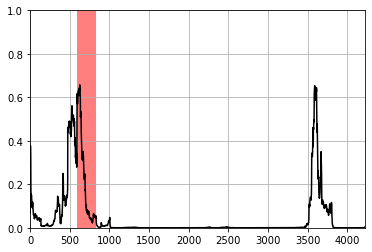

ENST00000576894
recall: 0.426086962223053
iou: 0.16819222271442413
biotype: processed_transcript
II_732135  :  {'start': 216, 'stop': 570, 'MS': 0, 'TE': 2, 'frame': 1}
IP_732137  :  {'start': 422, 'stop': 767, 'MS': 1, 'TE': 2, 'frame': 3}
IP_732134  :  {'start': 588, 'stop': 714, 'MS': 0, 'TE': 0, 'frame': 1}
IP_732136  :  {'start': 856, 'stop': 1261, 'MS': 0, 'TE': 0, 'frame': 2}
IP_240222  :  {'start': 1476, 'stop': 1608, 'MS': 0, 'TE': 0, 'frame': 1}
IP_240221  :  {'start': 1637, 'stop': 1751, 'MS': 0, 'TE': 0, 'frame': 3}
IP_240224  :  {'start': 1975, 'stop': 2152, 'MS': 2, 'TE': 0, 'frame': 2}


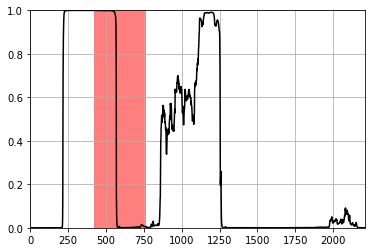

ENST00000483853
recall: 0.07662834972143173
iou: 0.07662834972143173
biotype: processed_transcript
II_733973  :  {'start': 382, 'stop': 658, 'MS': 0, 'TE': 0, 'frame': 2}
IP_243685  :  {'start': 401, 'stop': 662, 'MS': 2, 'TE': 3, 'frame': 3}


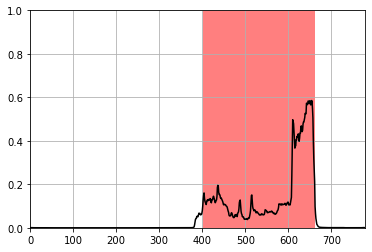

ENST00000569760
recall: 0.984674334526062
iou: 0.6283618807792664
biotype: processed_transcript
II_733974  :  {'start': 64, 'stop': 472, 'MS': 0, 'TE': 0, 'frame': 2}
IP_733975  :  {'start': 80, 'stop': 200, 'MS': 0, 'TE': 0, 'frame': 3}
IP_243685  :  {'start': 215, 'stop': 476, 'MS': 2, 'TE': 3, 'frame': 3}


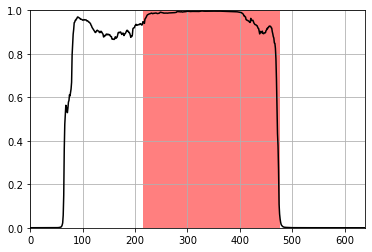

ENST00000565210
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_244984  :  {'start': 71, 'stop': 227, 'MS': 1, 'TE': 8, 'frame': 3}
IP_729229  :  {'start': 306, 'stop': 450, 'MS': 0, 'TE': 0, 'frame': 1}


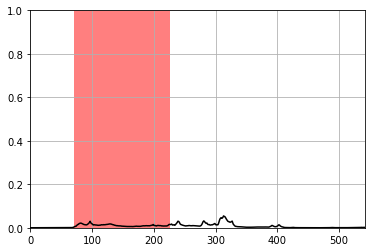

ENST00000566097
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_728041  :  {'start': 10, 'stop': 142, 'MS': 0, 'TE': 0, 'frame': 2}
IP_246151  :  {'start': 389, 'stop': 497, 'MS': 1, 'TE': 5, 'frame': 3}
IP_246157  :  {'start': 609, 'stop': 813, 'MS': 0, 'TE': 4, 'frame': 1}


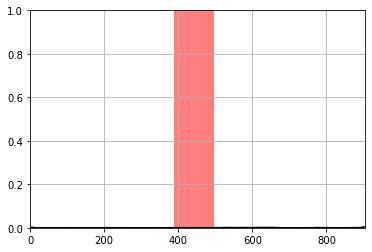

ENST00000534209
recall: 0.406862735748291
iou: 0.162109375
biotype: processed_transcript
IP_247016  :  {'start': 214, 'stop': 418, 'MS': 1, 'TE': 2, 'frame': 2}
IP_247017  :  {'start': 260, 'stop': 449, 'MS': 0, 'TE': 0, 'frame': 3}
IP_247008  :  {'start': 706, 'stop': 868, 'MS': 0, 'TE': 0, 'frame': 2}


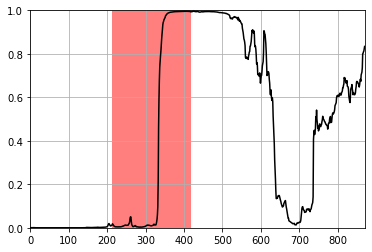

ENST00000581166
recall: 0.0
iou: 0.0
biotype: processed_transcript
II_717730  :  {'start': 32, 'stop': 212, 'MS': 0, 'TE': 0, 'frame': 3}
II_717729  :  {'start': 180, 'stop': 330, 'MS': 0, 'TE': 0, 'frame': 1}
IP_258240  :  {'start': 400, 'stop': 547, 'MS': 0, 'TE': 0, 'frame': 2}
IP_258239  :  {'start': 559, 'stop': 850, 'MS': 1, 'TE': 3, 'frame': 2}
IP_258237  :  {'start': 963, 'stop': 1119, 'MS': 0, 'TE': 0, 'frame': 1}


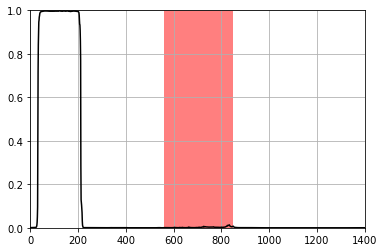

ENST00000429755
recall: 0.9220778942108154
iou: 0.9220778942108154
biotype: processed_transcript
IP_262614  :  {'start': 53, 'stop': 143, 'MS': 0, 'TE': 0, 'frame': 3}
IP_262613  :  {'start': 129, 'stop': 360, 'MS': 1, 'TE': 3, 'frame': 1}


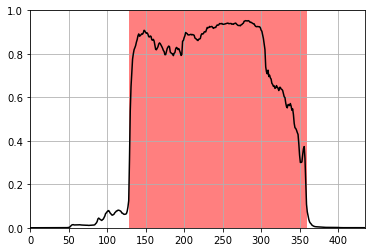

ENST00000573134
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_263310  :  {'start': 223, 'stop': 328, 'MS': 1, 'TE': 5, 'frame': 2}
II_706304  :  {'start': 397, 'stop': 1234, 'MS': 0, 'TE': 0, 'frame': 2}
IP_263314  :  {'start': 485, 'stop': 698, 'MS': 0, 'TE': 2, 'frame': 3}
IP_263312  :  {'start': 752, 'stop': 869, 'MS': 0, 'TE': 0, 'frame': 3}
IP_263313  :  {'start': 1031, 'stop': 1139, 'MS': 0, 'TE': 0, 'frame': 3}
IP_706305  :  {'start': 2318, 'stop': 2507, 'MS': 0, 'TE': 0, 'frame': 3}
IP_263315  :  {'start': 3601, 'stop': 3736, 'MS': 0, 'TE': 0, 'frame': 2}
IP_263318  :  {'start': 3722, 'stop': 3821, 'MS': 0, 'TE': 0, 'frame': 3}
IP_263319  :  {'start': 3974, 'stop': 4079, 'MS': 0, 'TE': 0, 'frame': 3}
IP_263317  :  {'start': 4280, 'stop': 4388, 'MS': 0, 'TE': 0, 'frame': 3}
IP_263311  :  {'start': 4743, 'stop': 4881, 'MS': 0, 'TE': 0, 'frame': 1}


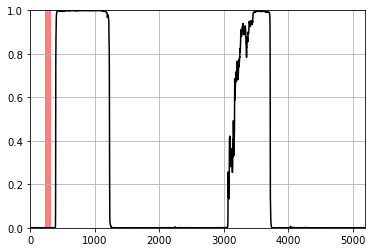

ENST00000540578
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_263618  :  {'start': 36, 'stop': 135, 'MS': 1, 'TE': 13, 'frame': 1}
II_706082  :  {'start': 212, 'stop': 1205, 'MS': 12, 'TE': 0, 'frame': 3}
IP_263621  :  {'start': 423, 'stop': 642, 'MS': 0, 'TE': 0, 'frame': 1}


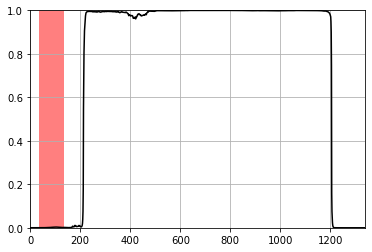

ENST00000540216
recall: 0.6103895902633667
iou: 0.2996811866760254
biotype: processed_transcript
IP_271095  :  {'start': 0, 'stop': 462, 'MS': 1, 'TE': 1, 'frame': 1}
II_697720  :  {'start': 484, 'stop': 964, 'MS': 0, 'TE': 1, 'frame': 2}
IP_271099  :  {'start': 542, 'stop': 752, 'MS': 1, 'TE': 0, 'frame': 3}
IP_271094  :  {'start': 753, 'stop': 867, 'MS': 0, 'TE': 0, 'frame': 1}


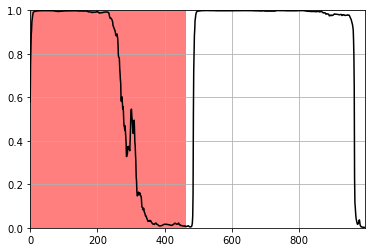

ENST00000588788
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_273467  :  {'start': 132, 'stop': 267, 'MS': 1, 'TE': 6, 'frame': 1}
IP_273476  :  {'start': 658, 'stop': 754, 'MS': 0, 'TE': 0, 'frame': 2}
IP_696568  :  {'start': 917, 'stop': 1163, 'MS': 0, 'TE': 0, 'frame': 3}
II_696567  :  {'start': 963, 'stop': 1101, 'MS': 0, 'TE': 1, 'frame': 1}
IP_696569  :  {'start': 1169, 'stop': 1286, 'MS': 0, 'TE': 0, 'frame': 3}
IP_696566  :  {'start': 1200, 'stop': 1386, 'MS': 0, 'TE': 0, 'frame': 1}


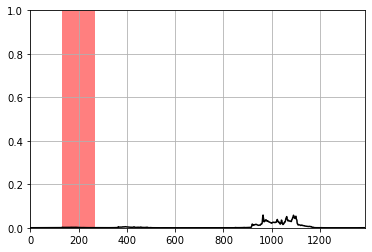

ENST00000433317
recall: 0.17525772750377655
iou: 0.06196840852499008
biotype: processed_transcript
IP_651500  :  {'start': 19, 'stop': 601, 'MS': 0, 'TE': 0, 'frame': 2}
IP_651501  :  {'start': 92, 'stop': 410, 'MS': 0, 'TE': 0, 'frame': 3}
IP_651498  :  {'start': 96, 'stop': 297, 'MS': 0, 'TE': 0, 'frame': 1}
IP_296565  :  {'start': 434, 'stop': 749, 'MS': 0, 'TE': 0, 'frame': 3}
IP_296572  :  {'start': 705, 'stop': 873, 'MS': 0, 'TE': 0, 'frame': 1}
IP_651499  :  {'start': 897, 'stop': 1104, 'MS': 0, 'TE': 0, 'frame': 1}
IP_296576  :  {'start': 973, 'stop': 1081, 'MS': 0, 'TE': 0, 'frame': 2}
IP_296561  :  {'start': 1205, 'stop': 1301, 'MS': 0, 'TE': 0, 'frame': 3}
IP_296580  :  {'start': 1210, 'stop': 1444, 'MS': 0, 'TE': 0, 'frame': 2}
IP_296567  :  {'start': 1263, 'stop': 1437, 'MS': 0, 'TE': 0, 'frame': 1}
IP_296568  :  {'start': 1596, 'stop': 1794, 'MS': 0, 'TE': 1, 'frame': 1}
IP_296575  :  {'start': 1690, 'stop': 1981, 'MS': 1, 'TE': 1, 'frame': 2}
IP_296582  :  {'start': 2212

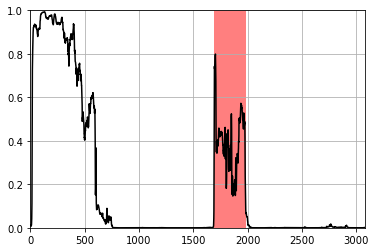

ENST00000416202
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_296872  :  {'start': 285, 'stop': 441, 'MS': 1, 'TE': 6, 'frame': 1}


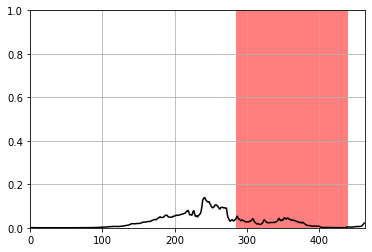

ENST00000451166
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_650586  :  {'start': 31, 'stop': 226, 'MS': 0, 'TE': 0, 'frame': 2}
IP_650585  :  {'start': 426, 'stop': 597, 'MS': 0, 'TE': 0, 'frame': 1}
IP_296872  :  {'start': 698, 'stop': 854, 'MS': 1, 'TE': 6, 'frame': 3}


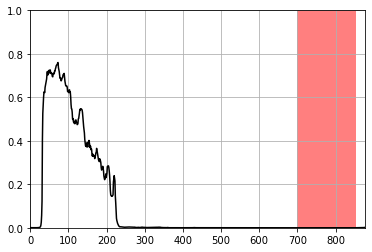

ENST00000445441
recall: 0.9871794581413269
iou: 0.9871794581413269
biotype: processed_transcript
IP_296872  :  {'start': 108, 'stop': 264, 'MS': 1, 'TE': 6, 'frame': 1}


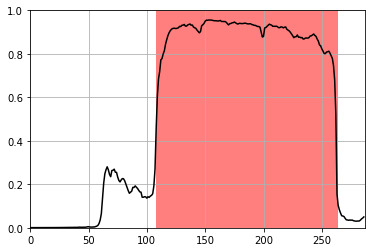

ENST00000486121
recall: 0.9578543901443481
iou: 0.44014084339141846
biotype: processed_transcript
IP_301935  :  {'start': 30, 'stop': 291, 'MS': 1, 'TE': 11, 'frame': 1}
II_559908  :  {'start': 53, 'stop': 599, 'MS': 0, 'TE': 0, 'frame': 3}
IP_301934  :  {'start': 330, 'stop': 423, 'MS': 0, 'TE': 0, 'frame': 1}


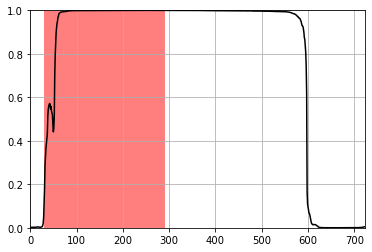

ENST00000479445
recall: 0.9885057210922241
iou: 0.48224300146102905
biotype: processed_transcript
IP_301935  :  {'start': 84, 'stop': 345, 'MS': 1, 'TE': 11, 'frame': 1}
II_559907  :  {'start': 107, 'stop': 620, 'MS': 6, 'TE': 2, 'frame': 3}
IP_301934  :  {'start': 384, 'stop': 477, 'MS': 0, 'TE': 0, 'frame': 1}
IP_559906  :  {'start': 492, 'stop': 588, 'MS': 1, 'TE': 0, 'frame': 1}


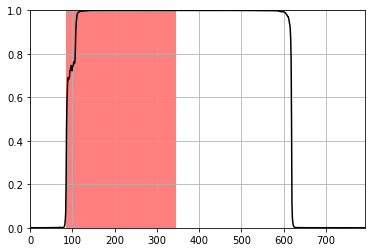

ENST00000598036
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_556612  :  {'start': 35, 'stop': 176, 'MS': 0, 'TE': 0, 'frame': 3}
IP_556611  :  {'start': 105, 'stop': 216, 'MS': 1, 'TE': 2, 'frame': 1}
IP_304455  :  {'start': 567, 'stop': 693, 'MS': 0, 'TE': 0, 'frame': 1}


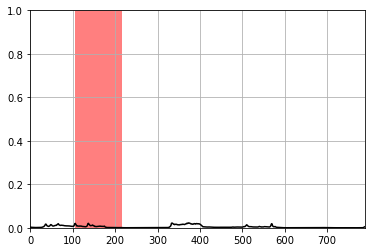

ENST00000617158
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_556612  :  {'start': 35, 'stop': 176, 'MS': 0, 'TE': 0, 'frame': 3}
IP_556611  :  {'start': 105, 'stop': 216, 'MS': 1, 'TE': 2, 'frame': 1}
IP_304455  :  {'start': 567, 'stop': 693, 'MS': 0, 'TE': 0, 'frame': 1}


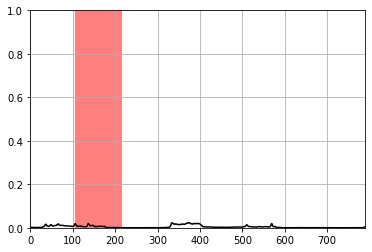

ENST00000433624
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_305932  :  {'start': 442, 'stop': 571, 'MS': 1, 'TE': 1, 'frame': 2}
IP_305933  :  {'start': 578, 'stop': 695, 'MS': 0, 'TE': 0, 'frame': 3}
IP_305934  :  {'start': 855, 'stop': 969, 'MS': 0, 'TE': 0, 'frame': 1}
IP_305930  :  {'start': 1227, 'stop': 1527, 'MS': 0, 'TE': 0, 'frame': 1}
IP_305931  :  {'start': 1516, 'stop': 1645, 'MS': 0, 'TE': 0, 'frame': 2}


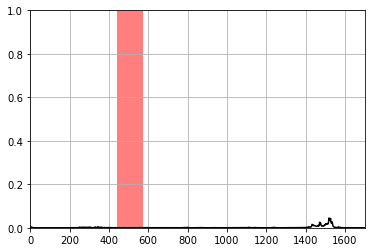

ENST00000412436
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_305932  :  {'start': 69, 'stop': 198, 'MS': 1, 'TE': 1, 'frame': 1}
IP_305933  :  {'start': 205, 'stop': 322, 'MS': 0, 'TE': 0, 'frame': 2}
IP_305929  :  {'start': 482, 'stop': 596, 'MS': 0, 'TE': 0, 'frame': 3}
IP_305930  :  {'start': 854, 'stop': 1154, 'MS': 0, 'TE': 0, 'frame': 3}
IP_305931  :  {'start': 1143, 'stop': 1272, 'MS': 0, 'TE': 0, 'frame': 1}


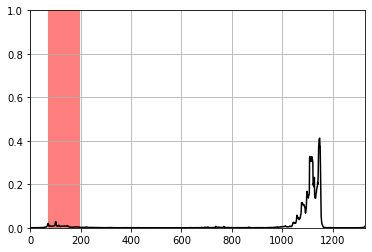

ENST00000604104
recall: 0.9153005480766296
iou: 0.9153005480766296
biotype: processed_transcript
IP_562864  :  {'start': 532, 'stop': 898, 'MS': 1, 'TE': 1, 'frame': 2}
IP_562865  :  {'start': 740, 'stop': 962, 'MS': 0, 'TE': 0, 'frame': 3}
IP_562863  :  {'start': 1026, 'stop': 1368, 'MS': 0, 'TE': 0, 'frame': 1}


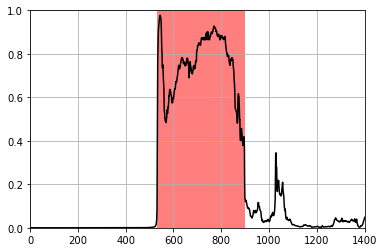

ENST00000433644
recall: 0.9954338073730469
iou: 0.9954338073730469
biotype: processed_transcript
IP_562871  :  {'start': 35, 'stop': 473, 'MS': 1, 'TE': 2, 'frame': 3}
IP_562866  :  {'start': 285, 'stop': 447, 'MS': 0, 'TE': 0, 'frame': 1}
IP_562869  :  {'start': 469, 'stop': 583, 'MS': 0, 'TE': 0, 'frame': 2}
IP_562872  :  {'start': 512, 'stop': 692, 'MS': 0, 'TE': 0, 'frame': 3}
IP_562870  :  {'start': 820, 'stop': 925, 'MS': 0, 'TE': 0, 'frame': 2}
IP_562868  :  {'start': 837, 'stop': 969, 'MS': 0, 'TE': 0, 'frame': 1}
IP_562867  :  {'start': 1140, 'stop': 1287, 'MS': 0, 'TE': 0, 'frame': 1}


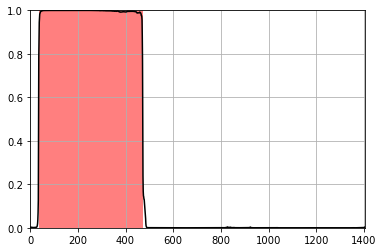

ENST00000524181
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_568336  :  {'start': 0, 'stop': 210, 'MS': 1, 'TE': 2, 'frame': 1}
IP_568337  :  {'start': 353, 'stop': 542, 'MS': 0, 'TE': 1, 'frame': 3}
II_568335  :  {'start': 576, 'stop': 780, 'MS': 0, 'TE': 0, 'frame': 1}
IP_568334  :  {'start': 781, 'stop': 892, 'MS': 0, 'TE': 1, 'frame': 2}
IP_568332  :  {'start': 858, 'stop': 957, 'MS': 1, 'TE': 0, 'frame': 1}


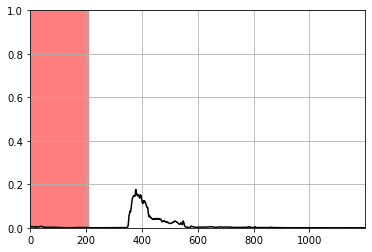

ENST00000523225
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_576254  :  {'start': 88, 'stop': 187, 'MS': 0, 'TE': 0, 'frame': 2}
IP_576253  :  {'start': 174, 'stop': 288, 'MS': 0, 'TE': 0, 'frame': 1}
IP_168600  :  {'start': 482, 'stop': 638, 'MS': 2, 'TE': 4, 'frame': 3}


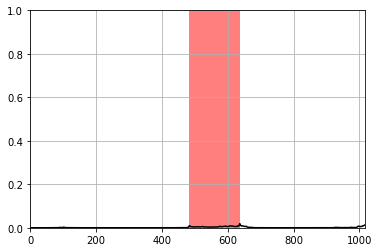

ENST00000492883
recall: 1.0
iou: 0.2967741787433624
biotype: processed_transcript
II_585579  :  {'start': 33, 'stop': 579, 'MS': 0, 'TE': 0, 'frame': 1}
IP_152262  :  {'start': 340, 'stop': 478, 'MS': 1, 'TE': 3, 'frame': 2}
IP_585578  :  {'start': 578, 'stop': 788, 'MS': 0, 'TE': 0, 'frame': 3}
IP_585564  :  {'start': 688, 'stop': 925, 'MS': 0, 'TE': 0, 'frame': 2}


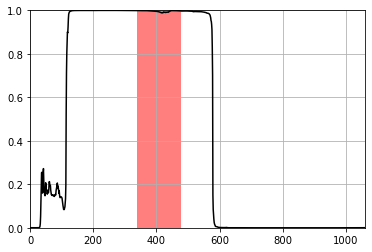

ENST00000432311
recall: 0.025641025975346565
iou: 0.006269592326134443
biotype: processed_transcript
IP_150531  :  {'start': 0, 'stop': 156, 'MS': 1, 'TE': 14, 'frame': 1}
IP_150530  :  {'start': 456, 'stop': 552, 'MS': 1, 'TE': 0, 'frame': 1}
IP_589792  :  {'start': 594, 'stop': 705, 'MS': 0, 'TE': 0, 'frame': 1}


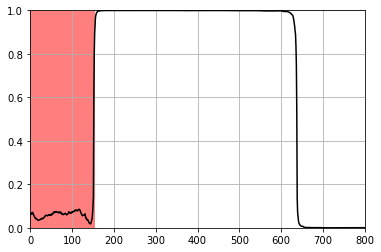

ENST00000501652
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_601761  :  {'start': 415, 'stop': 538, 'MS': 0, 'TE': 4, 'frame': 2}
IP_601755  :  {'start': 486, 'stop': 588, 'MS': 2, 'TE': 1, 'frame': 1}
IP_601762  :  {'start': 872, 'stop': 1013, 'MS': 0, 'TE': 1, 'frame': 3}
IP_601760  :  {'start': 1473, 'stop': 1581, 'MS': 0, 'TE': 0, 'frame': 1}


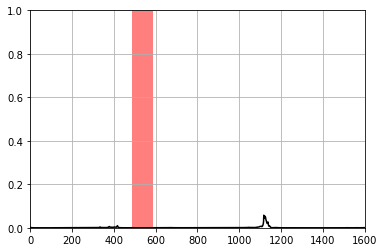

ENST00000506165
recall: 1.0
iou: 0.6575342416763306
biotype: processed_transcript
II_609285  :  {'start': 129, 'stop': 357, 'MS': 0, 'TE': 0, 'frame': 1}
IP_131505  :  {'start': 175, 'stop': 319, 'MS': 1, 'TE': 1, 'frame': 2}


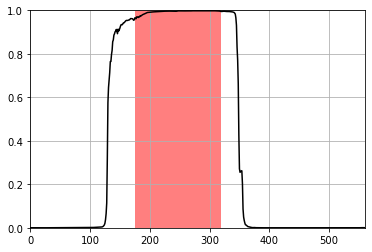

ENST00000635323
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_613793  :  {'start': 160, 'stop': 286, 'MS': 1, 'TE': 2, 'frame': 2}
IP_613794  :  {'start': 449, 'stop': 602, 'MS': 0, 'TE': 0, 'frame': 3}


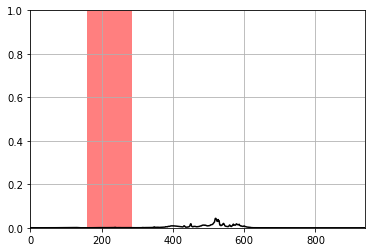

ENST00000510460
recall: 0.6212121248245239
iou: 0.2407045066356659
biotype: processed_transcript
IP_117572  :  {'start': 51, 'stop': 249, 'MS': 1, 'TE': 4, 'frame': 1}
II_618064  :  {'start': 125, 'stop': 563, 'MS': 0, 'TE': 0, 'frame': 3}
IP_618063  :  {'start': 537, 'stop': 684, 'MS': 0, 'TE': 0, 'frame': 1}


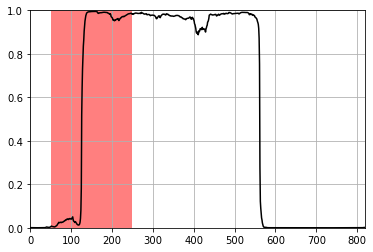

ENST00000453671
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_619934  :  {'start': 35, 'stop': 248, 'MS': 2, 'TE': 0, 'frame': 3}
IP_115072  :  {'start': 720, 'stop': 816, 'MS': 1, 'TE': 1, 'frame': 1}
IP_115073  :  {'start': 784, 'stop': 958, 'MS': 0, 'TE': 2, 'frame': 2}
IP_115071  :  {'start': 911, 'stop': 1025, 'MS': 0, 'TE': 0, 'frame': 3}


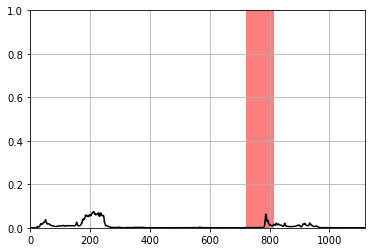

ENST00000612691
recall: 1.0
iou: 0.6619216799736023
biotype: processed_transcript
II_620988  :  {'start': 112, 'stop': 388, 'MS': 0, 'TE': 0, 'frame': 2}
IP_620989  :  {'start': 125, 'stop': 311, 'MS': 2, 'TE': 1, 'frame': 3}
IP_620987  :  {'start': 453, 'stop': 648, 'MS': 1, 'TE': 0, 'frame': 1}


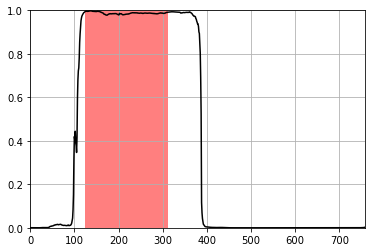

ENST00000463719
recall: 0.37710437178611755
iou: 0.19649122655391693
biotype: processed_transcript
IP_113095  :  {'start': 6, 'stop': 303, 'MS': 3, 'TE': 1, 'frame': 1}
II_625394  :  {'start': 190, 'stop': 577, 'MS': 0, 'TE': 1, 'frame': 2}
IP_625395  :  {'start': 935, 'stop': 1148, 'MS': 1, 'TE': 0, 'frame': 3}


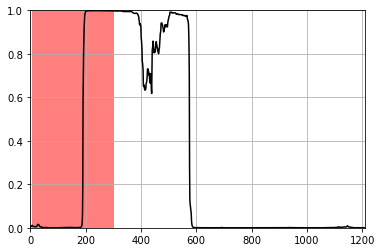

ENST00000466663
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_626466  :  {'start': 58, 'stop': 193, 'MS': 0, 'TE': 0, 'frame': 2}
IP_626467  :  {'start': 95, 'stop': 221, 'MS': 0, 'TE': 0, 'frame': 3}
IP_111789  :  {'start': 217, 'stop': 331, 'MS': 1, 'TE': 5, 'frame': 2}


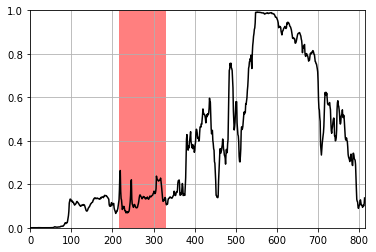

ENST00000472200
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_626974  :  {'start': 86, 'stop': 281, 'MS': 0, 'TE': 0, 'frame': 3}
IP_626969  :  {'start': 177, 'stop': 366, 'MS': 0, 'TE': 0, 'frame': 1}
IP_626970  :  {'start': 1002, 'stop': 1104, 'MS': 0, 'TE': 0, 'frame': 1}
IP_626977  :  {'start': 1055, 'stop': 1358, 'MS': 3, 'TE': 1, 'frame': 3}
IP_626975  :  {'start': 1418, 'stop': 1511, 'MS': 0, 'TE': 0, 'frame': 3}
IP_626978  :  {'start': 1652, 'stop': 1796, 'MS': 0, 'TE': 0, 'frame': 3}
IP_626971  :  {'start': 1930, 'stop': 2149, 'MS': 0, 'TE': 0, 'frame': 2}
IP_626973  :  {'start': 2164, 'stop': 2257, 'MS': 0, 'TE': 0, 'frame': 2}
IP_626966  :  {'start': 2178, 'stop': 2289, 'MS': 0, 'TE': 0, 'frame': 1}
IP_626976  :  {'start': 2285, 'stop': 2399, 'MS': 0, 'TE': 0, 'frame': 3}
IP_626967  :  {'start': 2340, 'stop': 2457, 'MS': 0, 'TE': 0, 'frame': 1}
IP_626972  :  {'start': 2395, 'stop': 2491, 'MS': 0, 'TE': 0, 'frame': 2}
IP_626968  :  {'start': 2487, 'stop': 2622, 'MS': 

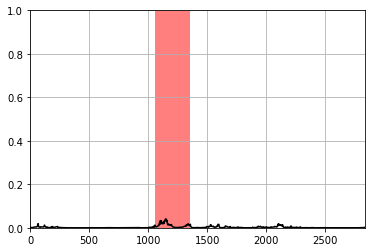

ENST00000519043
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_113547  :  {'start': 128, 'stop': 218, 'MS': 0, 'TE': 0, 'frame': 3}
IP_113543  :  {'start': 142, 'stop': 394, 'MS': 8, 'TE': 8, 'frame': 2}
IP_628095  :  {'start': 353, 'stop': 443, 'MS': 0, 'TE': 0, 'frame': 3}
IP_628097  :  {'start': 836, 'stop': 929, 'MS': 0, 'TE': 0, 'frame': 3}


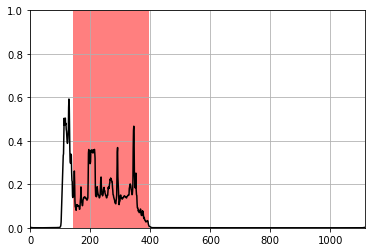

ENST00000555502
recall: 0.40833333134651184
iou: 0.17253521084785461
biotype: processed_transcript
IP_634642  :  {'start': 86, 'stop': 242, 'MS': 0, 'TE': 0, 'frame': 3}
IP_634641  :  {'start': 559, 'stop': 667, 'MS': 0, 'TE': 0, 'frame': 2}
IP_634639  :  {'start': 675, 'stop': 822, 'MS': 1, 'TE': 0, 'frame': 1}
IP_634640  :  {'start': 834, 'stop': 954, 'MS': 1, 'TE': 4, 'frame': 1}
IP_634633  :  {'start': 922, 'stop': 1090, 'MS': 0, 'TE': 0, 'frame': 2}


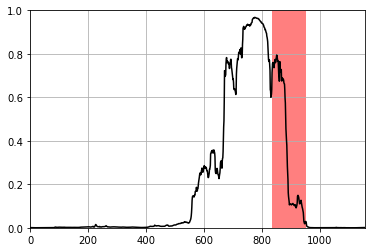

ENST00000435984
recall: 1.0
iou: 0.9948979616165161
biotype: processed_transcript
IP_638251  :  {'start': 72, 'stop': 267, 'MS': 1, 'TE': 1, 'frame': 1}
IP_638252  :  {'start': 202, 'stop': 319, 'MS': 0, 'TE': 0, 'frame': 2}


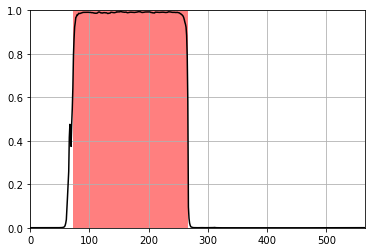

ENST00000478153
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_642014  :  {'start': 165, 'stop': 327, 'MS': 1, 'TE': 3, 'frame': 1}
II_642021  :  {'start': 514, 'stop': 661, 'MS': 0, 'TE': 0, 'frame': 2}


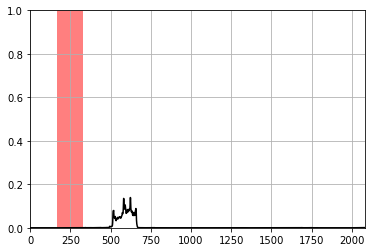

ENST00000359681
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_642014  :  {'start': 123, 'stop': 285, 'MS': 1, 'TE': 3, 'frame': 1}


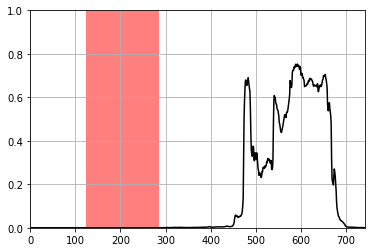

ENST00000475249
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_643171  :  {'start': 38, 'stop': 170, 'MS': 1, 'TE': 2, 'frame': 3}
IP_093005  :  {'start': 191, 'stop': 281, 'MS': 0, 'TE': 0, 'frame': 3}
IP_093009  :  {'start': 460, 'stop': 583, 'MS': 0, 'TE': 0, 'frame': 2}


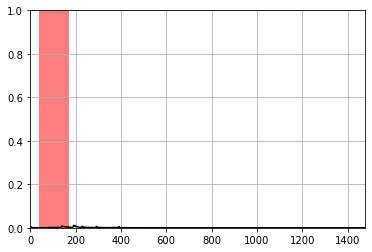

ENST00000464264
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_643171  :  {'start': 10, 'stop': 142, 'MS': 1, 'TE': 2, 'frame': 2}
IP_093005  :  {'start': 224, 'stop': 314, 'MS': 0, 'TE': 0, 'frame': 3}


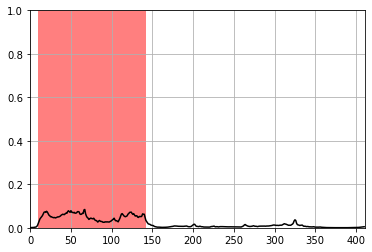

ENST00000464003
recall: 0.4020833373069763
iou: 0.3304794430732727
biotype: processed_transcript
II_646191  :  {'start': 429, 'stop': 729, 'MS': 0, 'TE': 1, 'frame': 1}
IP_646194  :  {'start': 535, 'stop': 1015, 'MS': 1, 'TE': 1, 'frame': 2}
IP_646192  :  {'start': 798, 'stop': 1035, 'MS': 0, 'TE': 0, 'frame': 1}
IP_646193  :  {'start': 1098, 'stop': 1242, 'MS': 0, 'TE': 0, 'frame': 1}


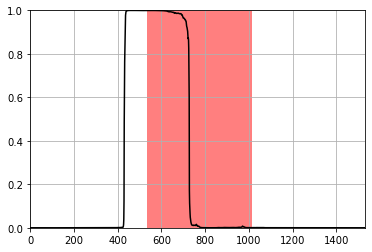

ENST00000479293
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_646711  :  {'start': 97, 'stop': 310, 'MS': 0, 'TE': 1, 'frame': 2}
IP_646714  :  {'start': 873, 'stop': 1020, 'MS': 1, 'TE': 1, 'frame': 1}
II_646713  :  {'start': 971, 'stop': 1103, 'MS': 0, 'TE': 0, 'frame': 3}


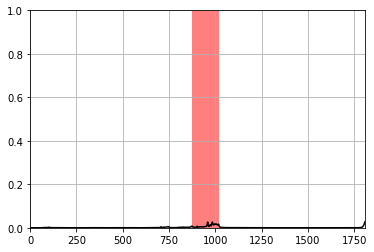

ENST00000416579
recall: 1.0
iou: 0.4651162922382355
biotype: processed_transcript
II_646717  :  {'start': 23, 'stop': 668, 'MS': 0, 'TE': 0, 'frame': 3}
IP_086573  :  {'start': 84, 'stop': 384, 'MS': 2, 'TE': 1, 'frame': 1}
II_086568  :  {'start': 453, 'stop': 648, 'MS': 0, 'TE': 0, 'frame': 1}
IP_646716  :  {'start': 691, 'stop': 877, 'MS': 0, 'TE': 0, 'frame': 2}
IP_646715  :  {'start': 711, 'stop': 828, 'MS': 0, 'TE': 0, 'frame': 1}


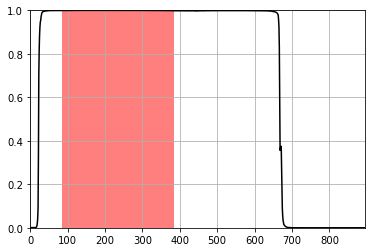

ENST00000418066
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_646970  :  {'start': 56, 'stop': 197, 'MS': 1, 'TE': 1, 'frame': 3}
IP_646969  :  {'start': 253, 'stop': 394, 'MS': 0, 'TE': 0, 'frame': 2}
IP_646968  :  {'start': 531, 'stop': 639, 'MS': 0, 'TE': 1, 'frame': 1}


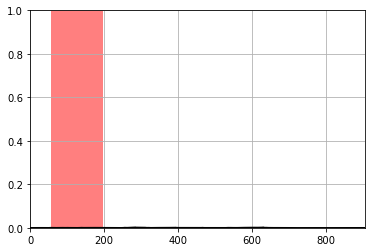

ENST00000458080
recall: 0.1912568360567093
iou: 0.1912568360567093
biotype: processed_transcript
IP_651494  :  {'start': 17, 'stop': 200, 'MS': 1, 'TE': 2, 'frame': 3}
IP_651493  :  {'start': 283, 'stop': 373, 'MS': 2, 'TE': 0, 'frame': 2}


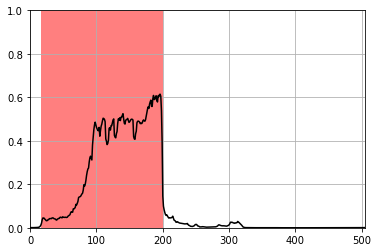

ENST00000475662
recall: 0.02469135820865631
iou: 0.01066666655242443
biotype: processed_transcript
II_652378  :  {'start': 61, 'stop': 280, 'MS': 0, 'TE': 0, 'frame': 2}
IP_083728  :  {'start': 303, 'stop': 465, 'MS': 1, 'TE': 7, 'frame': 1}
IP_083729  :  {'start': 1008, 'stop': 1098, 'MS': 1, 'TE': 0, 'frame': 1}


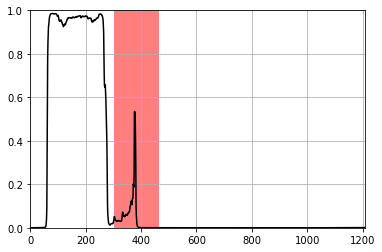

ENST00000609706
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_655156  :  {'start': 481, 'stop': 691, 'MS': 1, 'TE': 1, 'frame': 2}
IP_655157  :  {'start': 1009, 'stop': 1108, 'MS': 0, 'TE': 0, 'frame': 2}


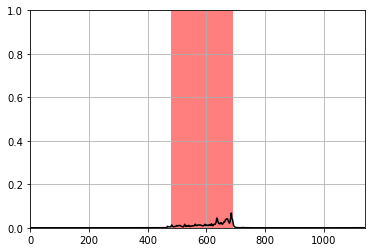

ENST00000623409
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_661702  :  {'start': 44, 'stop': 149, 'MS': 0, 'TE': 0, 'frame': 3}
IP_661701  :  {'start': 310, 'stop': 445, 'MS': 1, 'TE': 1, 'frame': 2}


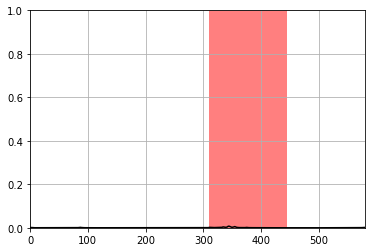

ENST00000453568
recall: 0.9729729890823364
iou: 0.9729729890823364
biotype: processed_transcript
IP_665852  :  {'start': 56, 'stop': 167, 'MS': 1, 'TE': 1, 'frame': 3}


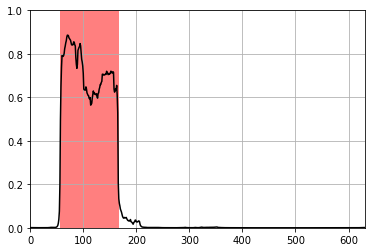

ENST00000451213
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_670467  :  {'start': 121, 'stop': 244, 'MS': 0, 'TE': 0, 'frame': 2}
IP_670466  :  {'start': 592, 'stop': 685, 'MS': 0, 'TE': 0, 'frame': 2}
IP_670468  :  {'start': 620, 'stop': 725, 'MS': 0, 'TE': 0, 'frame': 3}
IP_081178  :  {'start': 1254, 'stop': 1515, 'MS': 1, 'TE': 12, 'frame': 1}


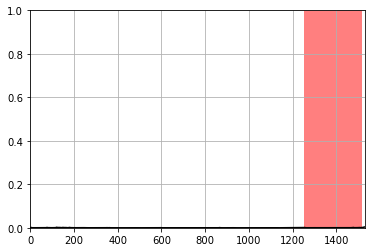

ENST00000562878
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_671772  :  {'start': 95, 'stop': 230, 'MS': 1, 'TE': 3, 'frame': 3}
IP_671771  :  {'start': 401, 'stop': 560, 'MS': 0, 'TE': 1, 'frame': 3}
IP_671770  :  {'start': 855, 'stop': 978, 'MS': 0, 'TE': 0, 'frame': 1}


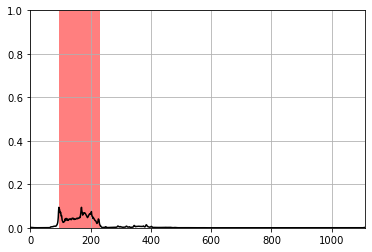

ENST00000496038
recall: 0.36403509974479675
iou: 0.17945945262908936
biotype: processed_transcript
IP_677177  :  {'start': 186, 'stop': 546, 'MS': 0, 'TE': 0, 'frame': 1}
IP_677179  :  {'start': 310, 'stop': 433, 'MS': 0, 'TE': 0, 'frame': 2}
IP_677181  :  {'start': 452, 'stop': 737, 'MS': 0, 'TE': 0, 'frame': 3}
IP_677180  :  {'start': 1015, 'stop': 1303, 'MS': 2, 'TE': 0, 'frame': 2}
II_677178  :  {'start': 1095, 'stop': 1473, 'MS': 0, 'TE': 1, 'frame': 1}
IP_071981  :  {'start': 1307, 'stop': 1763, 'MS': 1, 'TE': 1, 'frame': 3}


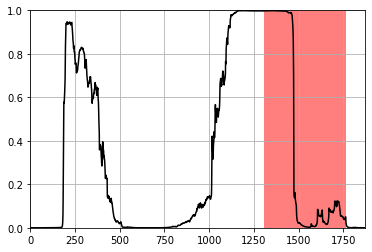

ENST00000478558
recall: 0.9912280440330505
iou: 0.37049180269241333
biotype: processed_transcript
II_678063  :  {'start': 17, 'stop': 209, 'MS': 0, 'TE': 0, 'frame': 3}
II_678062  :  {'start': 609, 'stop': 942, 'MS': 0, 'TE': 0, 'frame': 1}
IP_070724  :  {'start': 736, 'stop': 850, 'MS': 1, 'TE': 2, 'frame': 2}


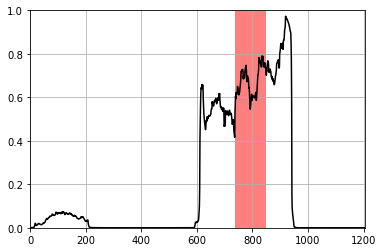

ENST00000474959
recall: 0.0
iou: 0.0
biotype: processed_transcript
II_678063  :  {'start': 32, 'stop': 224, 'MS': 0, 'TE': 0, 'frame': 3}
IP_070724  :  {'start': 488, 'stop': 602, 'MS': 1, 'TE': 2, 'frame': 3}


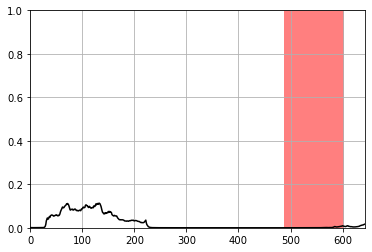

ENST00000498272
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_681578  :  {'start': 2, 'stop': 173, 'MS': 1, 'TE': 4, 'frame': 3}
II_681576  :  {'start': 214, 'stop': 328, 'MS': 0, 'TE': 0, 'frame': 2}
IP_065069  :  {'start': 783, 'stop': 888, 'MS': 0, 'TE': 0, 'frame': 1}
IP_065063  :  {'start': 790, 'stop': 937, 'MS': 0, 'TE': 0, 'frame': 2}
II_681577  :  {'start': 980, 'stop': 1325, 'MS': 0, 'TE': 0, 'frame': 3}
IP_681575  :  {'start': 1176, 'stop': 1350, 'MS': 0, 'TE': 0, 'frame': 1}
IP_681579  :  {'start': 1832, 'stop': 1922, 'MS': 0, 'TE': 0, 'frame': 3}
IP_681574  :  {'start': 1878, 'stop': 1989, 'MS': 0, 'TE': 0, 'frame': 1}


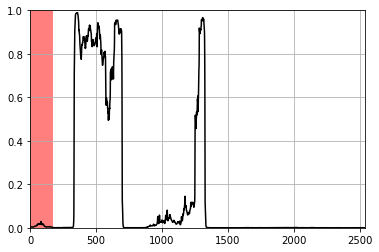

ENST00000478749
recall: 0.1111111119389534
iou: 0.026132404804229736
biotype: processed_transcript
IP_685115  :  {'start': 67, 'stop': 160, 'MS': 0, 'TE': 0, 'frame': 2}
IP_059017  :  {'start': 205, 'stop': 340, 'MS': 2, 'TE': 1, 'frame': 2}
IP_059018  :  {'start': 269, 'stop': 371, 'MS': 0, 'TE': 0, 'frame': 3}


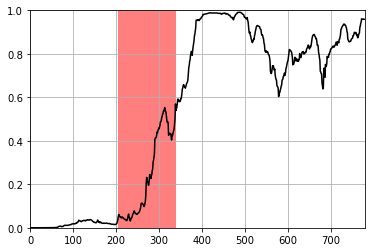

ENST00000493504
recall: 0.1773049682378769
iou: 0.0746268630027771
biotype: processed_transcript
IP_688365  :  {'start': 137, 'stop': 293, 'MS': 0, 'TE': 10, 'frame': 3}
IP_688367  :  {'start': 512, 'stop': 653, 'MS': 1, 'TE': 11, 'frame': 3}
IP_688364  :  {'start': 766, 'stop': 910, 'MS': 0, 'TE': 4, 'frame': 2}
IP_688360  :  {'start': 906, 'stop': 1494, 'MS': 0, 'TE': 0, 'frame': 1}
IP_688361  :  {'start': 1623, 'stop': 1818, 'MS': 0, 'TE': 0, 'frame': 1}
IP_688366  :  {'start': 2003, 'stop': 2423, 'MS': 0, 'TE': 0, 'frame': 3}
IP_688359  :  {'start': 2130, 'stop': 2334, 'MS': 0, 'TE': 0, 'frame': 1}
IP_688363  :  {'start': 2257, 'stop': 2365, 'MS': 0, 'TE': 0, 'frame': 2}
IP_688362  :  {'start': 2364, 'stop': 2475, 'MS': 0, 'TE': 0, 'frame': 1}
IP_688368  :  {'start': 2471, 'stop': 2600, 'MS': 0, 'TE': 0, 'frame': 3}
IP_688369  :  {'start': 2747, 'stop': 2864, 'MS': 0, 'TE': 0, 'frame': 3}


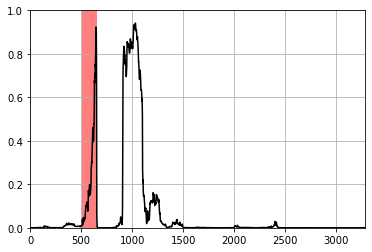

ENST00000473164
recall: 0.039603959769010544
iou: 0.018018018454313278
biotype: processed_transcript
IP_688370  :  {'start': 70, 'stop': 373, 'MS': 1, 'TE': 1, 'frame': 2}
IP_688372  :  {'start': 227, 'stop': 578, 'MS': 0, 'TE': 1, 'frame': 3}
IP_688371  :  {'start': 457, 'stop': 823, 'MS': 0, 'TE': 0, 'frame': 2}


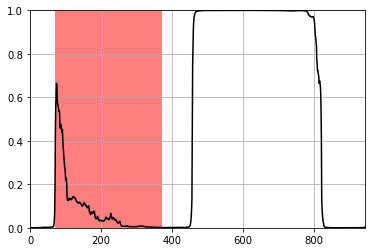

ENST00000487264
recall: 0.9405684471130371
iou: 0.4859813153743744
biotype: processed_transcript
IP_688373  :  {'start': 81, 'stop': 468, 'MS': 1, 'TE': 1, 'frame': 1}
IP_688374  :  {'start': 238, 'stop': 391, 'MS': 0, 'TE': 0, 'frame': 2}
IP_688375  :  {'start': 397, 'stop': 511, 'MS': 0, 'TE': 0, 'frame': 2}
IP_688371  :  {'start': 595, 'stop': 961, 'MS': 0, 'TE': 0, 'frame': 2}


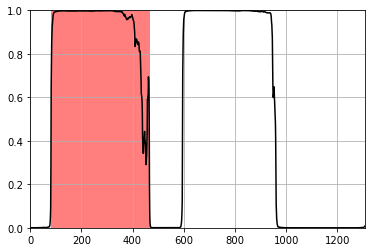

ENST00000586614
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_269915  :  {'start': 41, 'stop': 140, 'MS': 1, 'TE': 5, 'frame': 3}
IP_689720  :  {'start': 48, 'stop': 423, 'MS': 0, 'TE': 0, 'frame': 1}
II_689719  :  {'start': 310, 'stop': 454, 'MS': 0, 'TE': 0, 'frame': 2}
IP_269916  :  {'start': 450, 'stop': 543, 'MS': 0, 'TE': 0, 'frame': 1}


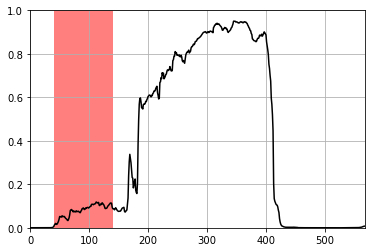

ENST00000601451
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_275206  :  {'start': 115, 'stop': 277, 'MS': 1, 'TE': 1, 'frame': 2}
II_694022  :  {'start': 302, 'stop': 803, 'MS': 0, 'TE': 2, 'frame': 3}
IP_694018  :  {'start': 714, 'stop': 975, 'MS': 1, 'TE': 0, 'frame': 1}
IP_694019  :  {'start': 1000, 'stop': 1141, 'MS': 2, 'TE': 0, 'frame': 2}
IP_694017  :  {'start': 1335, 'stop': 1449, 'MS': 0, 'TE': 0, 'frame': 1}
IP_694020  :  {'start': 1435, 'stop': 1564, 'MS': 0, 'TE': 0, 'frame': 2}
IP_694021  :  {'start': 1463, 'stop': 1568, 'MS': 0, 'TE': 0, 'frame': 3}


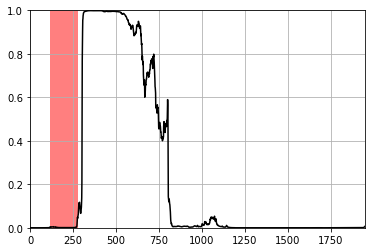

ENST00000534729
recall: 0.9851852059364319
iou: 0.7687861323356628
biotype: processed_transcript
IP_694991  :  {'start': 111, 'stop': 246, 'MS': 1, 'TE': 2, 'frame': 1}
II_694990  :  {'start': 227, 'stop': 326, 'MS': 0, 'TE': 0, 'frame': 3}


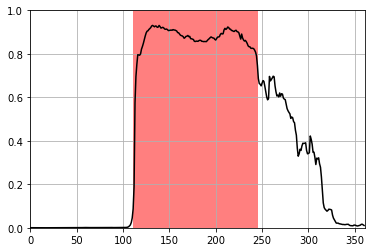

ENST00000432005
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_694991  :  {'start': 81, 'stop': 216, 'MS': 1, 'TE': 2, 'frame': 1}
II_694992  :  {'start': 197, 'stop': 338, 'MS': 0, 'TE': 0, 'frame': 3}


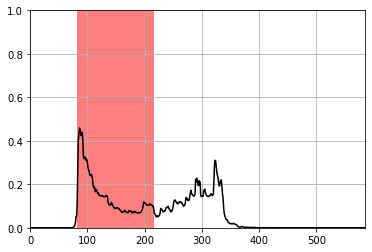

ENST00000525851
recall: 0.9407407641410828
iou: 0.9407407641410828
biotype: processed_transcript
IP_694991  :  {'start': 127, 'stop': 262, 'MS': 1, 'TE': 2, 'frame': 2}
II_694990  :  {'start': 243, 'stop': 342, 'MS': 0, 'TE': 0, 'frame': 1}


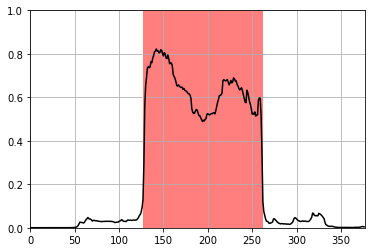

ENST00000448136
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_708240  :  {'start': 22, 'stop': 118, 'MS': 0, 'TE': 0, 'frame': 2}
IP_708242  :  {'start': 74, 'stop': 245, 'MS': 0, 'TE': 0, 'frame': 3}
IP_708238  :  {'start': 219, 'stop': 327, 'MS': 0, 'TE': 0, 'frame': 1}
IP_708239  :  {'start': 789, 'stop': 879, 'MS': 1, 'TE': 0, 'frame': 1}
IP_708241  :  {'start': 820, 'stop': 910, 'MS': 1, 'TE': 0, 'frame': 2}
IP_708237  :  {'start': 1050, 'stop': 1167, 'MS': 0, 'TE': 0, 'frame': 1}
IP_262964  :  {'start': 1263, 'stop': 1431, 'MS': 0, 'TE': 3, 'frame': 1}
IP_262965  :  {'start': 1366, 'stop': 1546, 'MS': 1, 'TE': 24, 'frame': 2}
IP_262963  :  {'start': 2856, 'stop': 2970, 'MS': 0, 'TE': 4, 'frame': 1}
IP_262962  :  {'start': 3393, 'stop': 3501, 'MS': 1, 'TE': 0, 'frame': 1}


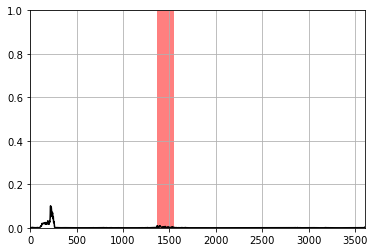

ENST00000425159
recall: 1.0
iou: 0.996835470199585
biotype: processed_transcript
IP_708507  :  {'start': 33, 'stop': 348, 'MS': 1, 'TE': 1, 'frame': 1}
IP_708508  :  {'start': 208, 'stop': 361, 'MS': 0, 'TE': 0, 'frame': 2}
IP_708509  :  {'start': 378, 'stop': 519, 'MS': 0, 'TE': 0, 'frame': 1}
IP_708520  :  {'start': 515, 'stop': 689, 'MS': 0, 'TE': 0, 'frame': 3}
IP_708519  :  {'start': 520, 'stop': 622, 'MS': 0, 'TE': 0, 'frame': 2}
IP_708518  :  {'start': 639, 'stop': 858, 'MS': 0, 'TE': 0, 'frame': 1}


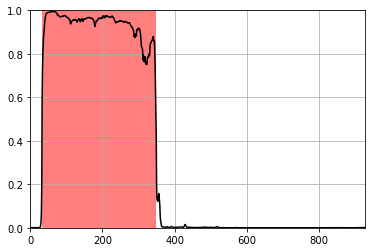

ENST00000592887
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_711908  :  {'start': 30, 'stop': 144, 'MS': 0, 'TE': 0, 'frame': 1}
IP_260982  :  {'start': 281, 'stop': 401, 'MS': 1, 'TE': 7, 'frame': 3}


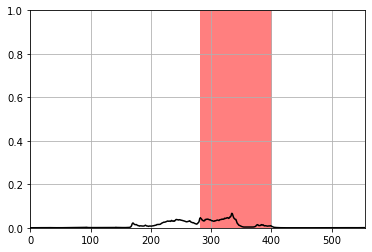

ENST00000562298
recall: 0.45704466104507446
iou: 0.45704466104507446
biotype: processed_transcript
IP_721543  :  {'start': 54, 'stop': 153, 'MS': 0, 'TE': 0, 'frame': 1}
IP_721544  :  {'start': 106, 'stop': 211, 'MS': 0, 'TE': 0, 'frame': 2}
IP_249026  :  {'start': 217, 'stop': 799, 'MS': 1, 'TE': 2, 'frame': 2}


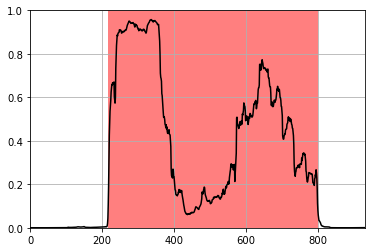

ENST00000570080
recall: 0.991769552230835
iou: 0.991769552230835
biotype: processed_transcript
IP_724435  :  {'start': 94, 'stop': 337, 'MS': 1, 'TE': 9, 'frame': 2}


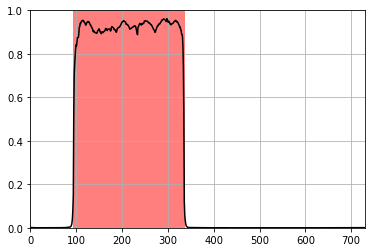

ENST00000575701
recall: 0.42898550629615784
iou: 0.2690909206867218
biotype: processed_transcript
II_732135  :  {'start': 216, 'stop': 570, 'MS': 0, 'TE': 2, 'frame': 1}
IP_732137  :  {'start': 422, 'stop': 767, 'MS': 1, 'TE': 2, 'frame': 3}
IP_732134  :  {'start': 588, 'stop': 714, 'MS': 0, 'TE': 0, 'frame': 1}


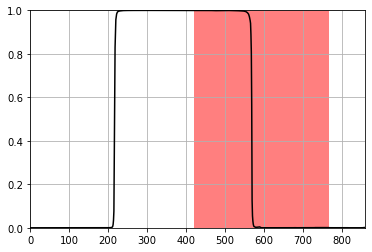

ENST00000558194
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_741587  :  {'start': 348, 'stop': 459, 'MS': 0, 'TE': 0, 'frame': 1}
IP_741601  :  {'start': 476, 'stop': 584, 'MS': 0, 'TE': 0, 'frame': 3}
IP_741596  :  {'start': 635, 'stop': 731, 'MS': 0, 'TE': 0, 'frame': 3}
IP_741588  :  {'start': 690, 'stop': 789, 'MS': 0, 'TE': 0, 'frame': 1}
IP_741598  :  {'start': 1145, 'stop': 1292, 'MS': 0, 'TE': 0, 'frame': 3}
IP_741591  :  {'start': 1288, 'stop': 1429, 'MS': 0, 'TE': 0, 'frame': 2}
IP_741600  :  {'start': 1991, 'stop': 2120, 'MS': 0, 'TE': 0, 'frame': 3}
IP_741593  :  {'start': 2512, 'stop': 2611, 'MS': 0, 'TE': 0, 'frame': 2}
IP_741590  :  {'start': 2761, 'stop': 2875, 'MS': 0, 'TE': 0, 'frame': 2}
IP_741595  :  {'start': 2816, 'stop': 2912, 'MS': 1, 'TE': 0, 'frame': 3}
IP_741594  :  {'start': 2908, 'stop': 3157, 'MS': 0, 'TE': 0, 'frame': 2}
IP_741589  :  {'start': 2991, 'stop': 3129, 'MS': 0, 'TE': 0, 'frame': 1}
IP_741592  :  {'start': 3556, 'stop': 3664, 'MS': 0, 

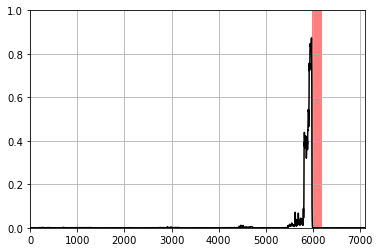

ENST00000560563
recall: 0.9930555820465088
iou: 0.9930555820465088
biotype: processed_transcript
IP_744117  :  {'start': 30, 'stop': 318, 'MS': 1, 'TE': 1, 'frame': 1}
IP_744118  :  {'start': 157, 'stop': 379, 'MS': 1, 'TE': 0, 'frame': 2}


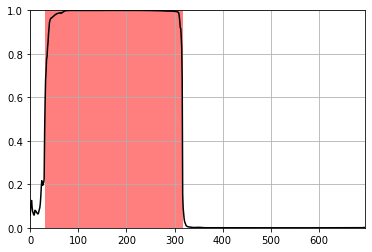

ENST00000553505
recall: 1.0
iou: 0.16003184020519257
biotype: processed_transcript
IP_223941  :  {'start': 351, 'stop': 543, 'MS': 0, 'TE': 0, 'frame': 1}
II_753263  :  {'start': 562, 'stop': 1816, 'MS': 0, 'TE': 0, 'frame': 2}
IP_223940  :  {'start': 635, 'stop': 836, 'MS': 1, 'TE': 1, 'frame': 3}
IP_753265  :  {'start': 1981, 'stop': 2074, 'MS': 0, 'TE': 0, 'frame': 2}
IP_753262  :  {'start': 2064, 'stop': 2160, 'MS': 0, 'TE': 0, 'frame': 1}
IP_753264  :  {'start': 2320, 'stop': 2422, 'MS': 0, 'TE': 0, 'frame': 2}


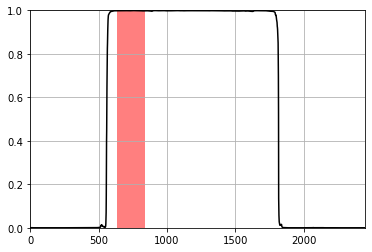

ENST00000510317
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_761118  :  {'start': 190, 'stop': 337, 'MS': 1, 'TE': 2, 'frame': 2}
IP_761119  :  {'start': 401, 'stop': 533, 'MS': 0, 'TE': 1, 'frame': 3}


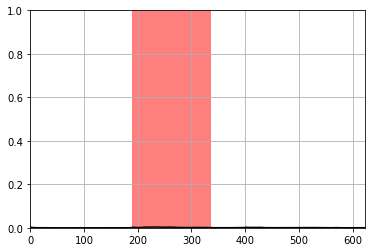

ENST00000552576
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_761741  :  {'start': 820, 'stop': 1030, 'MS': 2, 'TE': 4, 'frame': 2}
IP_761742  :  {'start': 1058, 'stop': 1169, 'MS': 0, 'TE': 0, 'frame': 3}
IP_761740  :  {'start': 1305, 'stop': 1422, 'MS': 0, 'TE': 0, 'frame': 1}


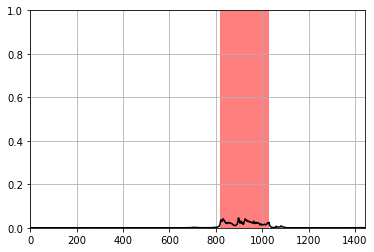

ENST00000412023
recall: 0.9788359999656677
iou: 0.29695025086402893
biotype: processed_transcript
IP_763378  :  {'start': 300, 'stop': 489, 'MS': 2, 'TE': 9, 'frame': 1}
IP_763381  :  {'start': 751, 'stop': 1099, 'MS': 0, 'TE': 0, 'frame': 2}
IP_763377  :  {'start': 884, 'stop': 1319, 'MS': 0, 'TE': 0, 'frame': 3}


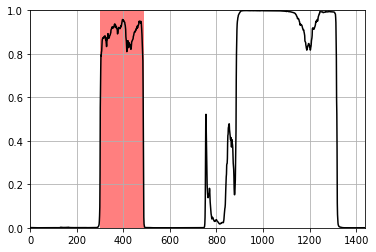

ENST00000449039
recall: 0.010582010261714458
iou: 0.005319148767739534
biotype: processed_transcript
IP_763378  :  {'start': 7, 'stop': 196, 'MS': 2, 'TE': 9, 'frame': 2}


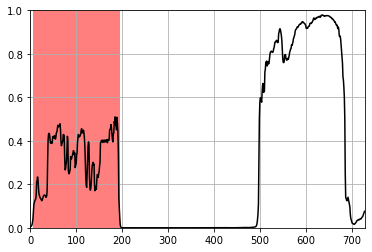

ENST00000421824
recall: 0.7037037014961243
iou: 0.7037037014961243
biotype: processed_transcript
IP_763378  :  {'start': 33, 'stop': 222, 'MS': 2, 'TE': 9, 'frame': 1}


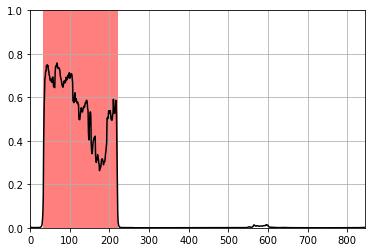

ENST00000546404
recall: 0.1666666716337204
iou: 0.05917159840464592
biotype: processed_transcript
IP_764724  :  {'start': 65, 'stop': 422, 'MS': 0, 'TE': 0, 'frame': 3}
IP_764722  :  {'start': 84, 'stop': 204, 'MS': 1, 'TE': 1, 'frame': 1}
II_764723  :  {'start': 193, 'stop': 442, 'MS': 0, 'TE': 0, 'frame': 2}
IP_764721  :  {'start': 384, 'stop': 543, 'MS': 0, 'TE': 0, 'frame': 1}


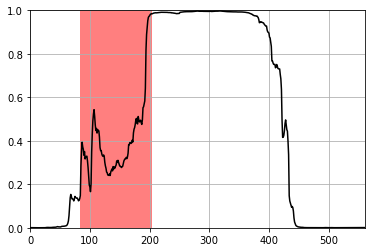

ENST00000553182
recall: 1.0
iou: 0.7320359349250793
biotype: processed_transcript
II_769972  :  {'start': 58, 'stop': 730, 'MS': 0, 'TE': 0, 'frame': 2}
IP_209284  :  {'start': 92, 'stop': 581, 'MS': 1, 'TE': 6, 'frame': 3}


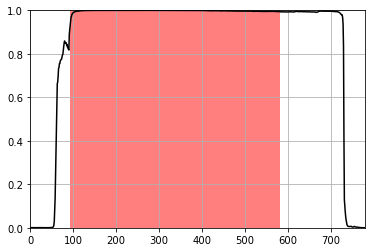

ENST00000530002
recall: 0.6666666865348816
iou: 0.6078431606292725
biotype: processed_transcript
IP_773980  :  {'start': 48, 'stop': 420, 'MS': 1, 'TE': 1, 'frame': 1}
IP_773981  :  {'start': 175, 'stop': 523, 'MS': 0, 'TE': 0, 'frame': 2}
IP_773982  :  {'start': 329, 'stop': 440, 'MS': 0, 'TE': 0, 'frame': 3}


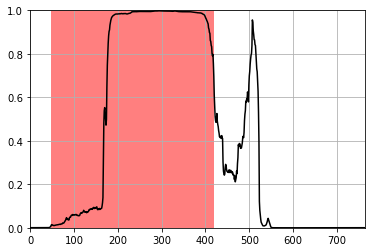

ENST00000525586
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_202807  :  {'start': 332, 'stop': 443, 'MS': 0, 'TE': 1, 'frame': 3}
IP_202798  :  {'start': 591, 'stop': 726, 'MS': 1, 'TE': 1, 'frame': 1}
IP_777867  :  {'start': 1694, 'stop': 1925, 'MS': 0, 'TE': 0, 'frame': 3}
IP_777864  :  {'start': 1915, 'stop': 2038, 'MS': 0, 'TE': 0, 'frame': 2}
IP_202796  :  {'start': 2778, 'stop': 2940, 'MS': 1, 'TE': 0, 'frame': 1}
IP_777865  :  {'start': 3448, 'stop': 3604, 'MS': 1, 'TE': 0, 'frame': 2}
II_777868  :  {'start': 3731, 'stop': 4082, 'MS': 0, 'TE': 0, 'frame': 3}
IP_202799  :  {'start': 4408, 'stop': 4672, 'MS': 2, 'TE': 0, 'frame': 2}


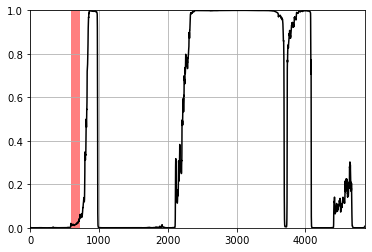

ENST00000539856
recall: 1.0
iou: 0.39058172702789307
biotype: processed_transcript
II_779472  :  {'start': 83, 'stop': 446, 'MS': 0, 'TE': 0, 'frame': 3}
IP_200793  :  {'start': 228, 'stop': 369, 'MS': 3, 'TE': 4, 'frame': 1}
IP_779473  :  {'start': 512, 'stop': 626, 'MS': 0, 'TE': 0, 'frame': 3}
IP_779474  :  {'start': 659, 'stop': 755, 'MS': 0, 'TE': 0, 'frame': 3}


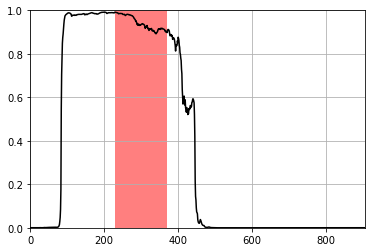

ENST00000530166
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_198559  :  {'start': 145, 'stop': 331, 'MS': 0, 'TE': 24, 'frame': 2}
IP_780359  :  {'start': 186, 'stop': 387, 'MS': 0, 'TE': 0, 'frame': 1}
IP_780360  :  {'start': 200, 'stop': 374, 'MS': 1, 'TE': 2, 'frame': 3}


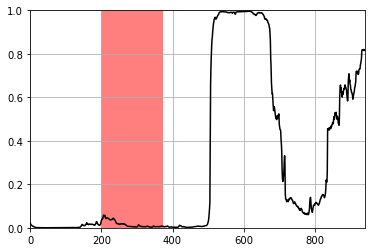

ENST00000524856
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_782102  :  {'start': 226, 'stop': 436, 'MS': 1, 'TE': 4, 'frame': 2}
IP_782098  :  {'start': 495, 'stop': 633, 'MS': 1, 'TE': 1, 'frame': 1}
IP_782101  :  {'start': 712, 'stop': 859, 'MS': 0, 'TE': 1, 'frame': 2}
IP_782103  :  {'start': 728, 'stop': 881, 'MS': 0, 'TE': 0, 'frame': 3}
IP_782099  :  {'start': 936, 'stop': 1050, 'MS': 0, 'TE': 0, 'frame': 1}
IP_782105  :  {'start': 1049, 'stop': 1415, 'MS': 0, 'TE': 0, 'frame': 3}
II_782097  :  {'start': 1626, 'stop': 2664, 'MS': 0, 'TE': 0, 'frame': 1}
IP_197784  :  {'start': 1675, 'stop': 1813, 'MS': 1, 'TE': 0, 'frame': 2}
IP_197783  :  {'start': 2209, 'stop': 2416, 'MS': 0, 'TE': 0, 'frame': 2}
II_782104  :  {'start': 2885, 'stop': 3659, 'MS': 0, 'TE': 0, 'frame': 3}
IP_782100  :  {'start': 3550, 'stop': 3679, 'MS': 0, 'TE': 0, 'frame': 2}


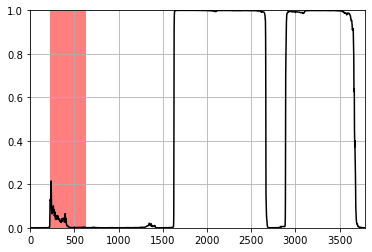

ENST00000529985
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_196054  :  {'start': 25, 'stop': 148, 'MS': 1, 'TE': 10, 'frame': 2}
IP_782816  :  {'start': 394, 'stop': 508, 'MS': 0, 'TE': 3, 'frame': 2}


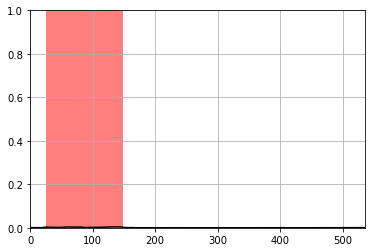

ENST00000422364
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_785058  :  {'start': 150, 'stop': 297, 'MS': 1, 'TE': 6, 'frame': 1}
II_785057  :  {'start': 378, 'stop': 1041, 'MS': 0, 'TE': 0, 'frame': 1}
IP_197233  :  {'start': 769, 'stop': 862, 'MS': 0, 'TE': 0, 'frame': 2}
II_785059  :  {'start': 1084, 'stop': 1225, 'MS': 0, 'TE': 0, 'frame': 2}
IP_785056  :  {'start': 1425, 'stop': 1653, 'MS': 0, 'TE': 0, 'frame': 1}
IP_785060  :  {'start': 1501, 'stop': 1678, 'MS': 0, 'TE': 0, 'frame': 2}


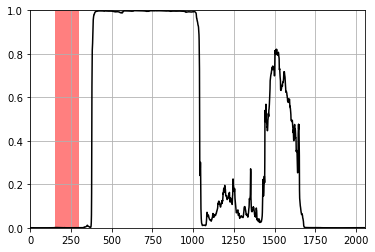

ENST00000606250
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_790389  :  {'start': 61, 'stop': 376, 'MS': 1, 'TE': 1, 'frame': 2}


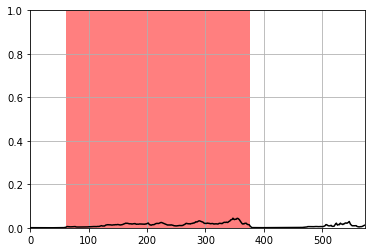

ENST00000639347
recall: 0.9924812316894531
iou: 0.9924812316894531
biotype: processed_transcript
IP_2257672  :  {'start': 121, 'stop': 520, 'MS': 39, 'TE': 1, 'frame': 2}
IP_2257675  :  {'start': 600, 'stop': 726, 'MS': 0, 'TE': 0, 'frame': 1}


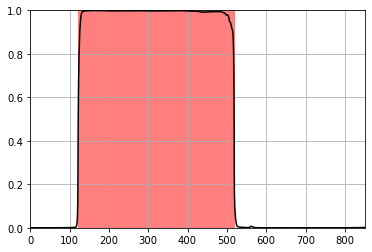

ENST00000640298
recall: 0.9924812316894531
iou: 0.9875311851501465
biotype: processed_transcript
IP_3435843  :  {'start': 77, 'stop': 170, 'MS': 0, 'TE': 0, 'frame': 3}
IP_3435840  :  {'start': 322, 'stop': 481, 'MS': 0, 'TE': 0, 'frame': 2}
IP_3435841  :  {'start': 598, 'stop': 754, 'MS': 1, 'TE': 0, 'frame': 2}
IP_3435842  :  {'start': 1099, 'stop': 1288, 'MS': 0, 'TE': 0, 'frame': 2}
IP_2257673  :  {'start': 1655, 'stop': 1745, 'MS': 0, 'TE': 0, 'frame': 3}
IP_2257672  :  {'start': 1939, 'stop': 2338, 'MS': 39, 'TE': 1, 'frame': 2}
IP_2257675  :  {'start': 2418, 'stop': 2544, 'MS': 0, 'TE': 0, 'frame': 1}


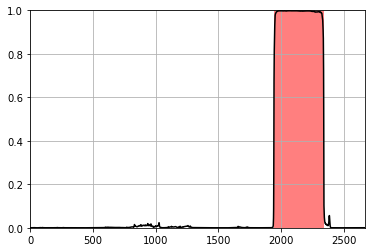

ENST00000442266
recall: 0.9812206625938416
iou: 0.9812206625938416
biotype: processed_transcript
IP_3422813  :  {'start': 0, 'stop': 213, 'MS': 2, 'TE': 1, 'frame': 1}
IP_581010  :  {'start': 373, 'stop': 526, 'MS': 3, 'TE': 0, 'frame': 2}
IP_581995  :  {'start': 792, 'stop': 918, 'MS': 0, 'TE': 0, 'frame': 1}
IP_581996  :  {'start': 868, 'stop': 997, 'MS': 0, 'TE': 0, 'frame': 2}
IP_581994  :  {'start': 1073, 'stop': 1184, 'MS': 1, 'TE': 0, 'frame': 3}


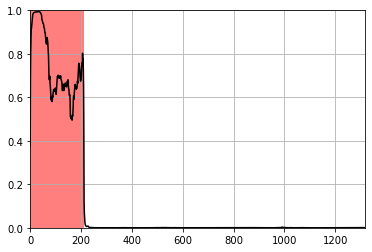

ENST00000647522
recall: 1.0
iou: 0.18266475200653076
biotype: processed_transcript
II_3426211  :  {'start': 216, 'stop': 1614, 'MS': 0, 'TE': 0, 'frame': 1}
IP_200917  :  {'start': 223, 'stop': 478, 'MS': 1, 'TE': 1, 'frame': 2}
IP_200916  :  {'start': 499, 'stop': 607, 'MS': 0, 'TE': 0, 'frame': 2}
IP_3426210  :  {'start': 2021, 'stop': 2114, 'MS': 0, 'TE': 0, 'frame': 3}
IP_3426212  :  {'start': 2293, 'stop': 2389, 'MS': 0, 'TE': 0, 'frame': 2}
IP_3426213  :  {'start': 2458, 'stop': 2557, 'MS': 0, 'TE': 0, 'frame': 2}
IP_3426214  :  {'start': 2797, 'stop': 2911, 'MS': 0, 'TE': 0, 'frame': 2}
IP_3426215  :  {'start': 3292, 'stop': 3424, 'MS': 0, 'TE': 0, 'frame': 2}


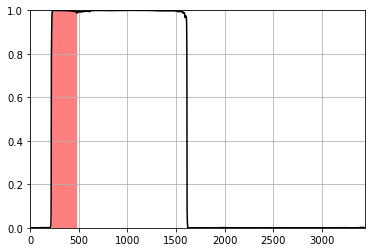

ENST00000644312
recall: 1.0
iou: 0.18240343034267426
biotype: processed_transcript
II_3426211  :  {'start': 1708, 'stop': 3106, 'MS': 0, 'TE': 0, 'frame': 2}
IP_200917  :  {'start': 1715, 'stop': 1970, 'MS': 1, 'TE': 1, 'frame': 3}
IP_200916  :  {'start': 1991, 'stop': 2099, 'MS': 0, 'TE': 0, 'frame': 3}
IP_3426210  :  {'start': 3513, 'stop': 3606, 'MS': 0, 'TE': 0, 'frame': 1}
IP_3426212  :  {'start': 3785, 'stop': 3881, 'MS': 0, 'TE': 0, 'frame': 3}
IP_3426213  :  {'start': 3950, 'stop': 4049, 'MS': 0, 'TE': 0, 'frame': 3}
IP_3426214  :  {'start': 4289, 'stop': 4403, 'MS': 0, 'TE': 0, 'frame': 3}
IP_3426215  :  {'start': 4784, 'stop': 4916, 'MS': 0, 'TE': 0, 'frame': 3}


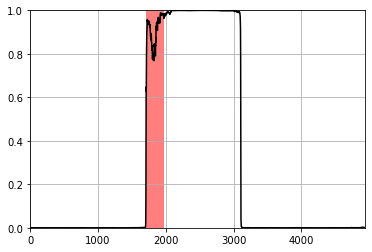

ENST00000472351
recall: 0.0
iou: 0.0
biotype: processed_transcript
II_684808  :  {'start': 11, 'stop': 140, 'MS': 0, 'TE': 0, 'frame': 3}
IP_059518  :  {'start': 509, 'stop': 635, 'MS': 0, 'TE': 7, 'frame': 3}
IP_059517  :  {'start': 541, 'stop': 715, 'MS': 1, 'TE': 7, 'frame': 2}


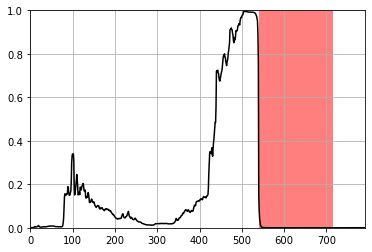

ENST00000495979
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_062322  :  {'start': 17, 'stop': 137, 'MS': 1, 'TE': 1, 'frame': 3}
IP_062319  :  {'start': 268, 'stop': 445, 'MS': 0, 'TE': 0, 'frame': 2}


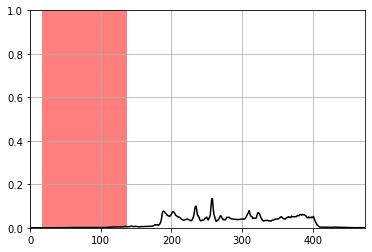

ENST00000493800
recall: 1.0
iou: 0.19607843458652496
biotype: processed_transcript
IP_073631  :  {'start': 334, 'stop': 574, 'MS': 1, 'TE': 3, 'frame': 2}
IP_073627  :  {'start': 583, 'stop': 937, 'MS': 0, 'TE': 0, 'frame': 2}
IP_073620  :  {'start': 681, 'stop': 1026, 'MS': 0, 'TE': 0, 'frame': 1}
IP_676538  :  {'start': 988, 'stop': 1267, 'MS': 1, 'TE': 0, 'frame': 2}


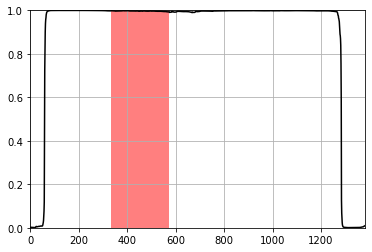

ENST00000473900
recall: 0.7763713002204895
iou: 0.6969696879386902
biotype: processed_transcript
II_674963  :  {'start': 296, 'stop': 509, 'MS': 0, 'TE': 1, 'frame': 3}
IP_077426  :  {'start': 324, 'stop': 561, 'MS': 2, 'TE': 2, 'frame': 1}
IP_077424  :  {'start': 626, 'stop': 719, 'MS': 0, 'TE': 0, 'frame': 3}


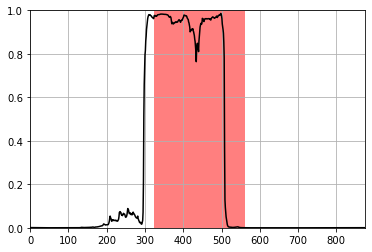

ENST00000480590
recall: 1.0
iou: 0.33607909083366394
biotype: processed_transcript
II_674370  :  {'start': 130, 'stop': 739, 'MS': 0, 'TE': 0, 'frame': 2}
IP_078468  :  {'start': 290, 'stop': 494, 'MS': 2, 'TE': 7, 'frame': 3}


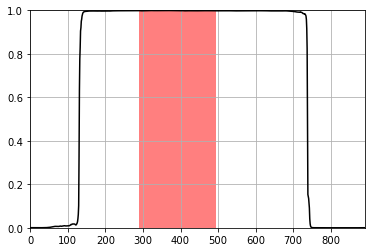

ENST00000469781
recall: 0.2659175992012024
iou: 0.11451613157987595
biotype: processed_transcript
IP_674346  :  {'start': 18, 'stop': 285, 'MS': 4, 'TE': 2, 'frame': 1}
IP_674347  :  {'start': 384, 'stop': 777, 'MS': 2, 'TE': 0, 'frame': 1}
IP_674349  :  {'start': 671, 'stop': 821, 'MS': 0, 'TE': 0, 'frame': 3}
IP_674350  :  {'start': 1286, 'stop': 1448, 'MS': 0, 'TE': 0, 'frame': 3}
IP_078524  :  {'start': 1744, 'stop': 1888, 'MS': 0, 'TE': 0, 'frame': 2}
IP_078521  :  {'start': 1850, 'stop': 1943, 'MS': 0, 'TE': 0, 'frame': 3}


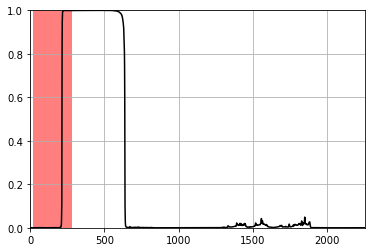

ENST00000607780
recall: 1.0
iou: 1.0
biotype: processed_transcript
IP_637777  :  {'start': 172, 'stop': 1072, 'MS': 1, 'TE': 4, 'frame': 2}
IP_087787  :  {'start': 512, 'stop': 638, 'MS': 0, 'TE': 0, 'frame': 3}
IP_637780  :  {'start': 765, 'stop': 1098, 'MS': 0, 'TE': 0, 'frame': 1}


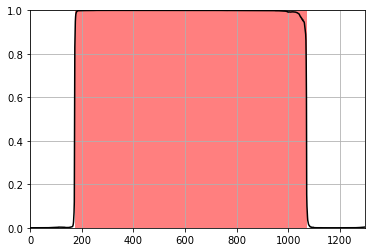

ENST00000490965
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_093930  :  {'start': 8, 'stop': 122, 'MS': 1, 'TE': 2, 'frame': 3}
IP_093927  :  {'start': 31, 'stop': 172, 'MS': 0, 'TE': 0, 'frame': 2}


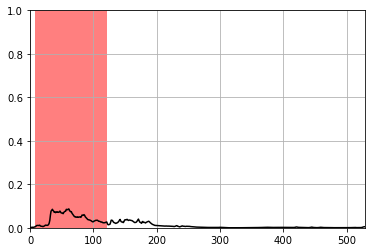

ENST00000453016
recall: 0.02857142873108387
iou: 0.02857142873108387
biotype: processed_transcript
IP_099347  :  {'start': 178, 'stop': 283, 'MS': 1, 'TE': 2, 'frame': 2}
IP_636019  :  {'start': 257, 'stop': 350, 'MS': 0, 'TE': 0, 'frame': 3}


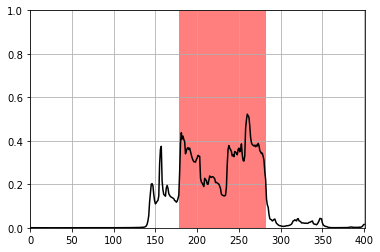

ENST00000418770
recall: 0.4095238149166107
iou: 0.4095238149166107
biotype: processed_transcript
IP_099347  :  {'start': 159, 'stop': 264, 'MS': 1, 'TE': 2, 'frame': 1}
IP_636018  :  {'start': 238, 'stop': 328, 'MS': 0, 'TE': 0, 'frame': 2}


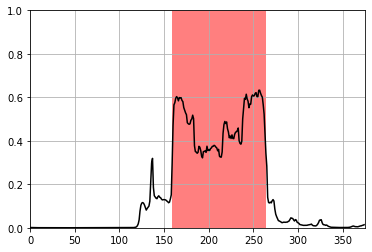

ENST00000493624
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_113444  :  {'start': 90, 'stop': 201, 'MS': 0, 'TE': 2, 'frame': 1}
IP_113445  :  {'start': 163, 'stop': 358, 'MS': 5, 'TE': 1, 'frame': 2}
IP_625046  :  {'start': 423, 'stop': 591, 'MS': 0, 'TE': 0, 'frame': 1}
IP_625045  :  {'start': 741, 'stop': 906, 'MS': 0, 'TE': 0, 'frame': 1}
IP_625049  :  {'start': 892, 'stop': 994, 'MS': 0, 'TE': 0, 'frame': 2}
IP_625048  :  {'start': 1159, 'stop': 1312, 'MS': 0, 'TE': 0, 'frame': 2}
IP_625051  :  {'start': 1433, 'stop': 1553, 'MS': 0, 'TE': 0, 'frame': 3}
IP_625050  :  {'start': 1988, 'stop': 2084, 'MS': 0, 'TE': 0, 'frame': 3}
IP_625047  :  {'start': 2025, 'stop': 2190, 'MS': 0, 'TE': 0, 'frame': 1}
IP_625052  :  {'start': 2132, 'stop': 2321, 'MS': 0, 'TE': 0, 'frame': 3}
IP_625044  :  {'start': 2661, 'stop': 2829, 'MS': 0, 'TE': 0, 'frame': 1}


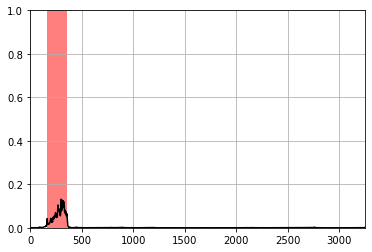

ENST00000494680
recall: 0.6547619104385376
iou: 0.6547619104385376
biotype: processed_transcript
IP_113547  :  {'start': 160, 'stop': 250, 'MS': 0, 'TE': 0, 'frame': 2}
IP_113543  :  {'start': 174, 'stop': 426, 'MS': 8, 'TE': 8, 'frame': 1}
IP_628092  :  {'start': 385, 'stop': 493, 'MS': 0, 'TE': 0, 'frame': 2}


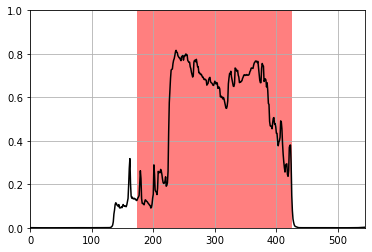

ENST00000489616
recall: 0.2936508059501648
iou: 0.2936508059501648
biotype: processed_transcript
IP_113547  :  {'start': 145, 'stop': 235, 'MS': 0, 'TE': 0, 'frame': 2}
IP_113543  :  {'start': 159, 'stop': 411, 'MS': 8, 'TE': 8, 'frame': 1}
IP_113548  :  {'start': 370, 'stop': 511, 'MS': 0, 'TE': 0, 'frame': 2}


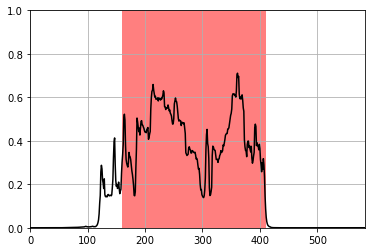

ENST00000481221
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_113547  :  {'start': 195, 'stop': 285, 'MS': 0, 'TE': 0, 'frame': 1}
IP_113543  :  {'start': 209, 'stop': 461, 'MS': 8, 'TE': 8, 'frame': 3}
IP_113548  :  {'start': 420, 'stop': 561, 'MS': 0, 'TE': 0, 'frame': 1}


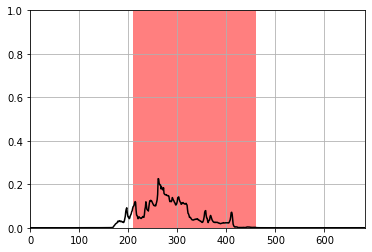

ENST00000464242
recall: 0.21474358439445496
iou: 0.21474358439445496
biotype: processed_transcript
IP_114469  :  {'start': 528, 'stop': 840, 'MS': 1, 'TE': 1, 'frame': 1}
IP_114471  :  {'start': 544, 'stop': 658, 'MS': 0, 'TE': 0, 'frame': 2}
IP_114470  :  {'start': 727, 'stop': 880, 'MS': 0, 'TE': 0, 'frame': 2}
IP_114465  :  {'start': 791, 'stop': 968, 'MS': 0, 'TE': 0, 'frame': 3}


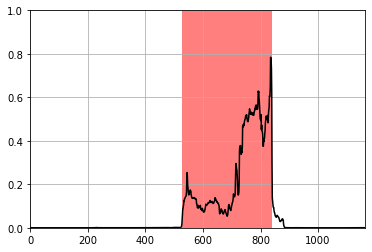

ENST00000513856
recall: 0.4236111044883728
iou: 0.27293065190315247
biotype: processed_transcript
IP_620990  :  {'start': 22, 'stop': 223, 'MS': 0, 'TE': 0, 'frame': 2}
IP_116273  :  {'start': 466, 'stop': 754, 'MS': 2, 'TE': 1, 'frame': 2}


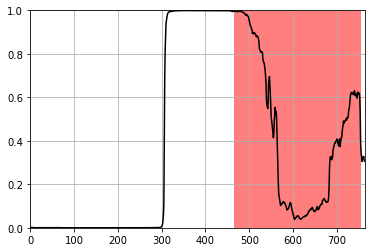

ENST00000432895
recall: 0.0
iou: 0.0
biotype: processed_transcript


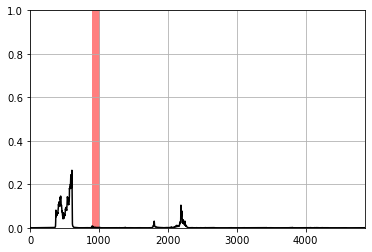

ENST00000440939
recall: 0.0
iou: 0.0
biotype: processed_transcript


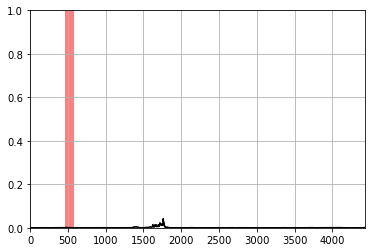

ENST00000447211
recall: 0.0
iou: 0.0
biotype: processed_transcript


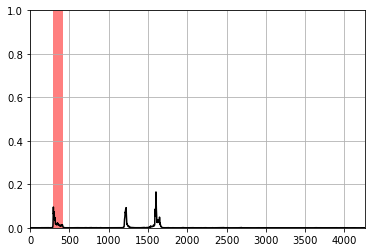

ENST00000451842
recall: 0.0
iou: 0.0
biotype: processed_transcript


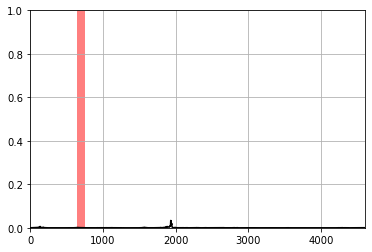

ENST00000517653
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_568336  :  {'start': 52, 'stop': 262, 'MS': 1, 'TE': 2, 'frame': 2}
IP_568334  :  {'start': 642, 'stop': 753, 'MS': 0, 'TE': 1, 'frame': 1}
IP_568332  :  {'start': 719, 'stop': 818, 'MS': 1, 'TE': 0, 'frame': 3}
IP_167810  :  {'start': 917, 'stop': 1169, 'MS': 0, 'TE': 0, 'frame': 3}
IP_167813  :  {'start': 1092, 'stop': 1245, 'MS': 0, 'TE': 0, 'frame': 1}
IP_167811  :  {'start': 1338, 'stop': 1497, 'MS': 0, 'TE': 0, 'frame': 1}


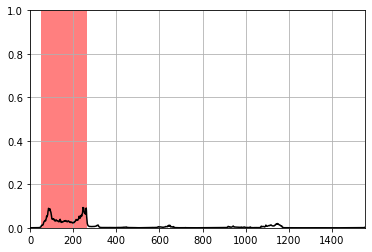

ENST00000376080
recall: 0.032258063554763794
iou: 0.004687500186264515
biotype: processed_transcript
IP_173169  :  {'start': 20, 'stop': 113, 'MS': 1, 'TE': 1, 'frame': 3}
II_567145  :  {'start': 109, 'stop': 676, 'MS': 0, 'TE': 0, 'frame': 2}


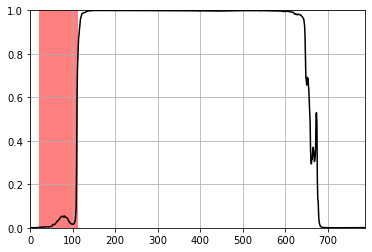

ENST00000491784
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_173169  :  {'start': 32, 'stop': 125, 'MS': 1, 'TE': 1, 'frame': 3}


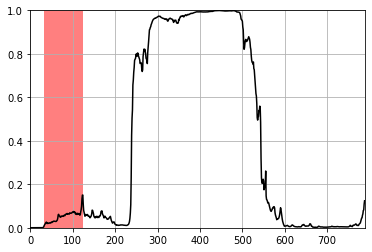

ENST00000492540
recall: 1.0
iou: 0.35013261437416077
biotype: processed_transcript
II_565617  :  {'start': 340, 'stop': 718, 'MS': 0, 'TE': 0, 'frame': 2}
IP_565619  :  {'start': 497, 'stop': 629, 'MS': 1, 'TE': 1, 'frame': 3}
IP_565615  :  {'start': 798, 'stop': 894, 'MS': 0, 'TE': 0, 'frame': 1}
IP_565618  :  {'start': 844, 'stop': 997, 'MS': 0, 'TE': 0, 'frame': 2}
II_565616  :  {'start': 993, 'stop': 1083, 'MS': 0, 'TE': 0, 'frame': 1}
IP_178644  :  {'start': 1052, 'stop': 1253, 'MS': 0, 'TE': 2, 'frame': 3}


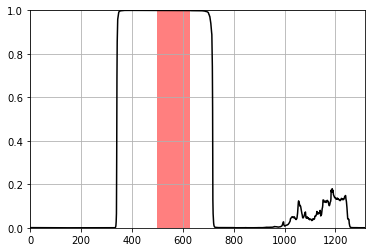

ENST00000481793
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_185788  :  {'start': 306, 'stop': 420, 'MS': 0, 'TE': 0, 'frame': 1}
IP_185786  :  {'start': 471, 'stop': 591, 'MS': 1, 'TE': 2, 'frame': 1}


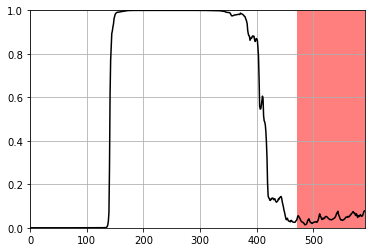

ENST00000466945
recall: 1.0
iou: 0.17910447716712952
biotype: processed_transcript
IP_185786  :  {'start': 563, 'stop': 683, 'MS': 1, 'TE': 2, 'frame': 3}


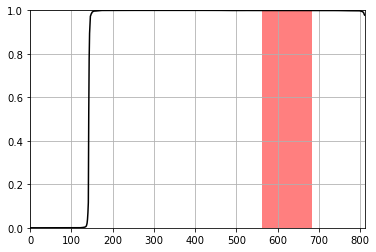

ENST00000474751
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_202740  :  {'start': 25, 'stop': 256, 'MS': 1, 'TE': 2, 'frame': 2}
II_202742  :  {'start': 378, 'stop': 480, 'MS': 0, 'TE': 1, 'frame': 1}
IP_202733  :  {'start': 504, 'stop': 627, 'MS': 0, 'TE': 0, 'frame': 1}


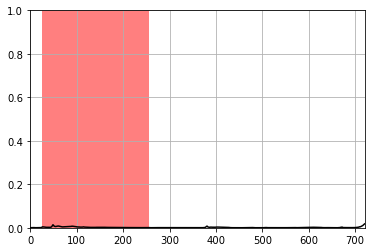

ENST00000551548
recall: 1.0
iou: 0.4397394061088562
biotype: processed_transcript
II_770082  :  {'start': 63, 'stop': 372, 'MS': 0, 'TE': 0, 'frame': 1}
IP_209128  :  {'start': 154, 'stop': 289, 'MS': 1, 'TE': 1, 'frame': 2}


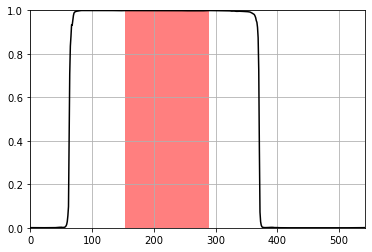

ENST00000542466
recall: 0.9856630563735962
iou: 0.6857855319976807
biotype: processed_transcript
IP_217877  :  {'start': 54, 'stop': 333, 'MS': 1, 'TE': 12, 'frame': 1}
IP_217879  :  {'start': 136, 'stop': 943, 'MS': 1, 'TE': 0, 'frame': 2}
IP_217878  :  {'start': 1018, 'stop': 1126, 'MS': 0, 'TE': 0, 'frame': 2}
IP_217876  :  {'start': 1245, 'stop': 1347, 'MS': 0, 'TE': 0, 'frame': 1}
IP_217880  :  {'start': 1306, 'stop': 1483, 'MS': 0, 'TE': 0, 'frame': 2}


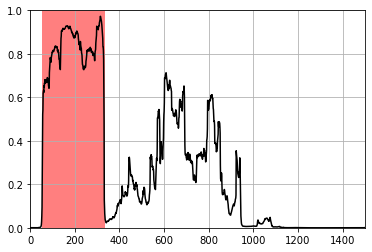

ENST00000565756
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_238655  :  {'start': 201, 'stop': 318, 'MS': 2, 'TE': 3, 'frame': 1}
IP_238653  :  {'start': 451, 'stop': 598, 'MS': 0, 'TE': 0, 'frame': 2}


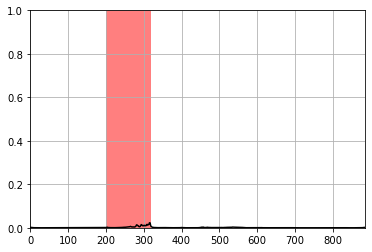

ENST00000561708
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_728040  :  {'start': 14, 'stop': 209, 'MS': 0, 'TE': 0, 'frame': 3}
IP_246151  :  {'start': 230, 'stop': 338, 'MS': 1, 'TE': 5, 'frame': 3}


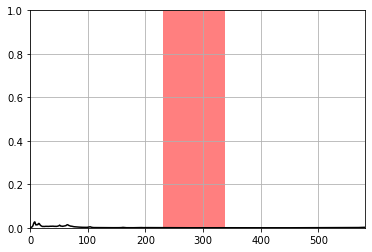

ENST00000590435
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_262961  :  {'start': 60, 'stop': 162, 'MS': 0, 'TE': 3, 'frame': 1}
IP_262964  :  {'start': 162, 'stop': 330, 'MS': 0, 'TE': 3, 'frame': 1}
IP_262965  :  {'start': 265, 'stop': 445, 'MS': 1, 'TE': 24, 'frame': 2}
IP_262963  :  {'start': 1265, 'stop': 1379, 'MS': 0, 'TE': 4, 'frame': 3}
IP_262962  :  {'start': 1802, 'stop': 1910, 'MS': 1, 'TE': 0, 'frame': 3}


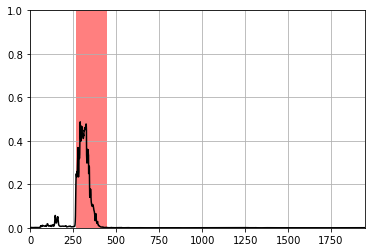

ENST00000493536
recall: 0.5909090638160706
iou: 0.5909090638160706
biotype: processed_transcript
IP_262966  :  {'start': 30, 'stop': 132, 'MS': 0, 'TE': 30, 'frame': 1}
IP_262968  :  {'start': 82, 'stop': 253, 'MS': 1, 'TE': 1, 'frame': 2}
IP_262965  :  {'start': 188, 'stop': 368, 'MS': 1, 'TE': 24, 'frame': 3}
IP_262963  :  {'start': 1678, 'stop': 1792, 'MS': 0, 'TE': 4, 'frame': 2}
IP_262962  :  {'start': 2215, 'stop': 2323, 'MS': 1, 'TE': 0, 'frame': 2}


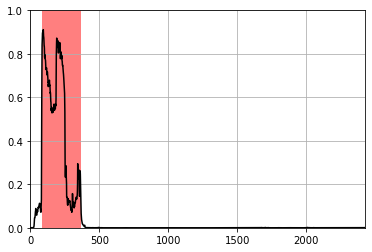

ENST00000591956
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_262966  :  {'start': 34, 'stop': 136, 'MS': 0, 'TE': 30, 'frame': 2}
IP_708252  :  {'start': 86, 'stop': 215, 'MS': 1, 'TE': 34, 'frame': 3}
IP_708251  :  {'start': 380, 'stop': 503, 'MS': 0, 'TE': 0, 'frame': 3}


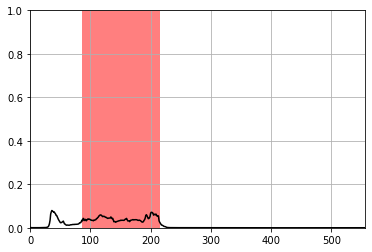

ENST00000494276
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_269899  :  {'start': 357, 'stop': 477, 'MS': 1, 'TE': 2, 'frame': 1}


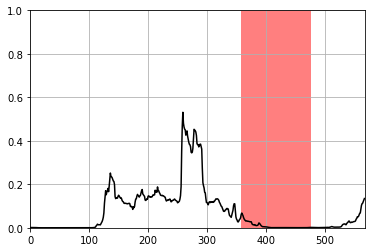

ENST00000472559
recall: 0.0
iou: 0.0
biotype: processed_transcript
II_666634  :  {'start': 213, 'stop': 552, 'MS': 0, 'TE': 1, 'frame': 1}
IP_284170  :  {'start': 551, 'stop': 647, 'MS': 0, 'TE': 0, 'frame': 3}
IP_284171  :  {'start': 989, 'stop': 1244, 'MS': 1, 'TE': 1, 'frame': 3}
IP_284165  :  {'start': 1171, 'stop': 1495, 'MS': 0, 'TE': 0, 'frame': 2}
IP_284169  :  {'start': 1325, 'stop': 1457, 'MS': 0, 'TE': 0, 'frame': 3}
IP_284168  :  {'start': 1622, 'stop': 1766, 'MS': 0, 'TE': 0, 'frame': 3}


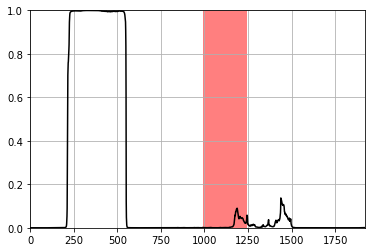

ENST00000427606
recall: 0.9985569715499878
iou: 0.8843450546264648
biotype: processed_transcript
IP_568199  :  {'start': 15, 'stop': 144, 'MS': 0, 'TE': 1, 'frame': 1}
IP_568198  :  {'start': 200, 'stop': 353, 'MS': 0, 'TE': 1, 'frame': 3}
IP_568205  :  {'start': 525, 'stop': 681, 'MS': 0, 'TE': 0, 'frame': 1}
IP_568213  :  {'start': 1031, 'stop': 1121, 'MS': 0, 'TE': 0, 'frame': 3}
IP_568212  :  {'start': 1142, 'stop': 1304, 'MS': 0, 'TE': 0, 'frame': 3}
IP_568207  :  {'start': 1164, 'stop': 1338, 'MS': 0, 'TE': 0, 'frame': 1}
IP_568209  :  {'start': 1231, 'stop': 1408, 'MS': 0, 'TE': 0, 'frame': 2}
IP_568204  :  {'start': 1533, 'stop': 1629, 'MS': 0, 'TE': 0, 'frame': 1}
IP_568206  :  {'start': 1713, 'stop': 3099, 'MS': 1, 'TE': 1, 'frame': 1}
IP_568202  :  {'start': 1939, 'stop': 2050, 'MS': 1, 'TE': 0, 'frame': 2}
IP_568210  :  {'start': 2281, 'stop': 2509, 'MS': 0, 'TE': 0, 'frame': 2}
IP_568208  :  {'start': 2701, 'stop': 2821, 'MS': 0, 'TE': 0, 'frame': 2}
IP_568211  :  {'start'

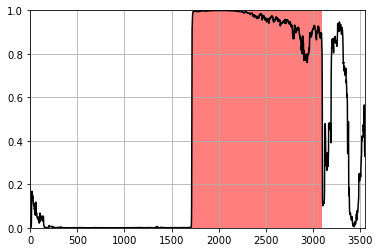

ENST00000520433
recall: 0.9961685538291931
iou: 0.9923664331436157
biotype: processed_transcript
IP_570929  :  {'start': 82, 'stop': 343, 'MS': 1, 'TE': 6, 'frame': 2}


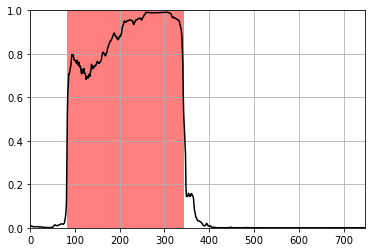

ENST00000455158
recall: 0.9887640476226807
iou: 0.9599999785423279
biotype: processed_transcript
IP_580759  :  {'start': 5, 'stop': 272, 'MS': 1, 'TE': 4, 'frame': 3}
IP_580753  :  {'start': 271, 'stop': 463, 'MS': 0, 'TE': 5, 'frame': 2}
IP_580750  :  {'start': 311, 'stop': 437, 'MS': 0, 'TE': 0, 'frame': 3}
IP_580749  :  {'start': 496, 'stop': 595, 'MS': 0, 'TE': 0, 'frame': 2}


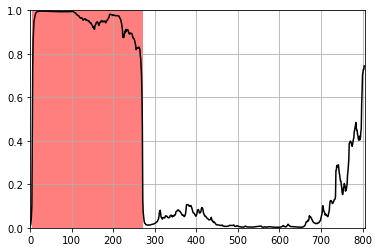

ENST00000473569
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_588217  :  {'start': 100, 'stop': 265, 'MS': 1, 'TE': 1, 'frame': 2}


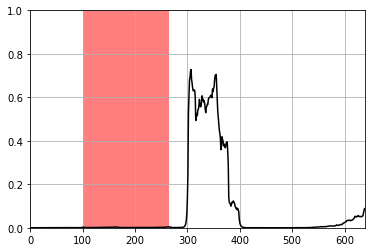

ENST00000623466
recall: 1.0
iou: 0.7544910311698914
biotype: processed_transcript
IP_602348  :  {'start': 0, 'stop': 1764, 'MS': 2, 'TE': 2, 'frame': 1}
IP_602350  :  {'start': 1336, 'stop': 1627, 'MS': 0, 'TE': 0, 'frame': 2}
IP_602349  :  {'start': 1944, 'stop': 2223, 'MS': 0, 'TE': 0, 'frame': 1}
IP_602351  :  {'start': 2573, 'stop': 2687, 'MS': 0, 'TE': 0, 'frame': 3}


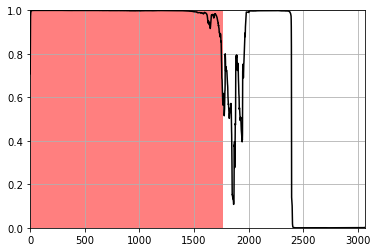

ENST00000502437
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_603349  :  {'start': 134, 'stop': 254, 'MS': 1, 'TE': 1, 'frame': 3}
IP_603348  :  {'start': 250, 'stop': 475, 'MS': 0, 'TE': 0, 'frame': 2}


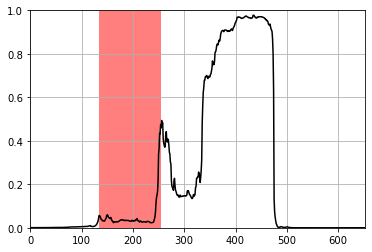

ENST00000512874
recall: 0.8888888955116272
iou: 0.8888888955116272
biotype: processed_transcript
IP_612479  :  {'start': 26, 'stop': 368, 'MS': 1, 'TE': 1, 'frame': 3}


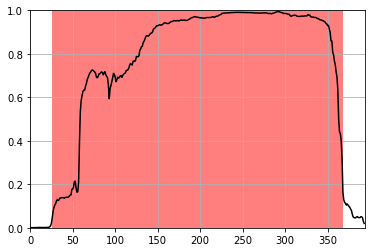

ENST00000489011
recall: 0.7241379022598267
iou: 0.7241379022598267
biotype: processed_transcript
IP_621717  :  {'start': 98, 'stop': 272, 'MS': 1, 'TE': 1, 'frame': 3}
IP_621716  :  {'start': 216, 'stop': 372, 'MS': 0, 'TE': 0, 'frame': 1}


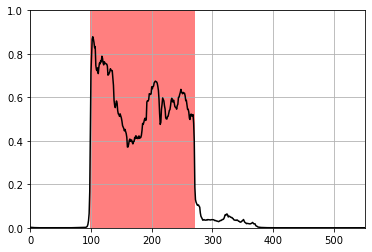

ENST00000486107
recall: 1.0
iou: 0.08593092113733292
biotype: processed_transcript
II_628951  :  {'start': 3, 'stop': 1191, 'MS': 0, 'TE': 0, 'frame': 1}
IP_104606  :  {'start': 139, 'stop': 241, 'MS': 1, 'TE': 2, 'frame': 2}
IP_628950  :  {'start': 1404, 'stop': 1698, 'MS': 0, 'TE': 0, 'frame': 1}
IP_628953  :  {'start': 1552, 'stop': 1780, 'MS': 0, 'TE': 0, 'frame': 2}
II_628952  :  {'start': 2175, 'stop': 2292, 'MS': 0, 'TE': 2, 'frame': 1}


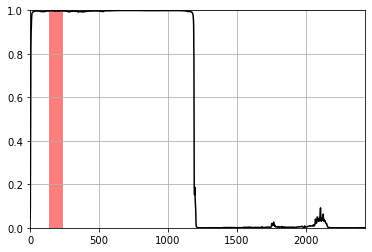

ENST00000467846
recall: 1.0
iou: 0.28484848141670227
biotype: processed_transcript
II_629878  :  {'start': 27, 'stop': 522, 'MS': 0, 'TE': 1, 'frame': 1}
IP_103283  :  {'start': 73, 'stop': 214, 'MS': 1, 'TE': 1, 'frame': 2}
IP_103282  :  {'start': 250, 'stop': 391, 'MS': 0, 'TE': 0, 'frame': 2}
IP_629879  :  {'start': 1008, 'stop': 1104, 'MS': 0, 'TE': 0, 'frame': 1}


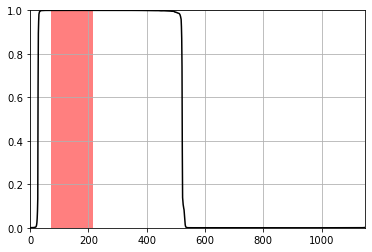

ENST00000484744
recall: 0.07207207381725311
iou: 0.012158054858446121
biotype: processed_transcript
IP_086851  :  {'start': 25, 'stop': 136, 'MS': 1, 'TE': 18, 'frame': 2}
II_646501  :  {'start': 413, 'stop': 800, 'MS': 0, 'TE': 0, 'frame': 3}
II_646500  :  {'start': 517, 'stop': 736, 'MS': 0, 'TE': 0, 'frame': 2}
IP_646492  :  {'start': 869, 'stop': 1016, 'MS': 0, 'TE': 0, 'frame': 3}
IP_086850  :  {'start': 1195, 'stop': 1483, 'MS': 0, 'TE': 0, 'frame': 2}


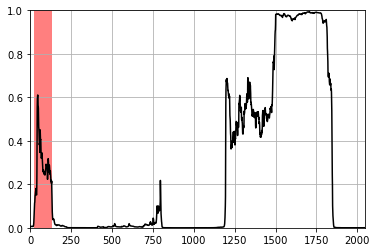

ENST00000382734
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_652669  :  {'start': 3, 'stop': 123, 'MS': 0, 'TE': 15, 'frame': 1}
IP_652665  :  {'start': 191, 'stop': 341, 'MS': 1, 'TE': 14, 'frame': 3}
IP_652660  :  {'start': 366, 'stop': 468, 'MS': 0, 'TE': 0, 'frame': 1}
IP_652670  :  {'start': 379, 'stop': 775, 'MS': 0, 'TE': 1, 'frame': 2}
IP_652652  :  {'start': 660, 'stop': 771, 'MS': 0, 'TE': 0, 'frame': 1}
IP_652655  :  {'start': 808, 'stop': 943, 'MS': 0, 'TE': 0, 'frame': 2}
IP_652657  :  {'start': 1169, 'stop': 1304, 'MS': 0, 'TE': 0, 'frame': 3}


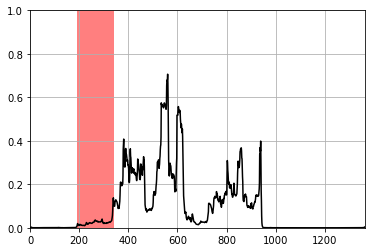

ENST00000648085
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_653430  :  {'start': 193, 'stop': 286, 'MS': 0, 'TE': 0, 'frame': 2}
IP_2295302  :  {'start': 357, 'stop': 501, 'MS': 0, 'TE': 19, 'frame': 1}
IP_747362  :  {'start': 484, 'stop': 613, 'MS': 0, 'TE': 0, 'frame': 2}
IP_653419  :  {'start': 531, 'stop': 675, 'MS': 0, 'TE': 3, 'frame': 1}
IP_653398  :  {'start': 829, 'stop': 943, 'MS': 1, 'TE': 4, 'frame': 2}


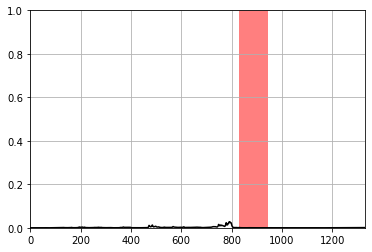

ENST00000419950
recall: 0.0
iou: 0.0
biotype: processed_transcript
IP_291526  :  {'start': 72, 'stop': 180, 'MS': 1, 'TE': 11, 'frame': 1}
IP_656370  :  {'start': 97, 'stop': 259, 'MS': 0, 'TE': 0, 'frame': 2}
IP_656488  :  {'start': 206, 'stop': 377, 'MS': 0, 'TE': 0, 'frame': 3}


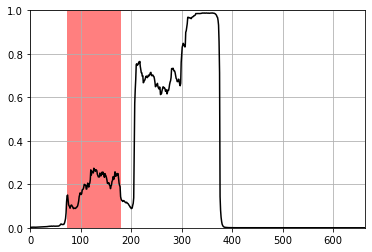

In [11]:
map_preds(report, trx_orfs, ensembl_trx, n_display=500)